In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from mplh import cluster_help

fig_utils from mplh


In [6]:
os.chdir(ROOT_DIR)

## Files setup

In [7]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_30"
num_reads = 200
min_reads = 10
min_cells= 10
topN = -1
flt3 = "CD34_Flt3L_mt_PolydT"
wt = "CD34_mt_PolydT"



flt3_indir = join(indir, flt3,"mapq_30")
wt_indir = join(indir, wt,"mapq_30")

# sc_coverage_flt3_f = join(flt3_indir,"scPileup_concat_200",flt3+"_200_all.coverage.txt.gz")
# sc_coverage_wt_f = join(wt_indir,"scPileup_concat_200",wt + "_200_all.coverage.txt.gz")

coverage_flt3_dir = join(flt3_indir,flt3+"_scPileup_200")
coverage_wt_dir = join(wt_indir,wt+"_scPileup_200")

concat_flt3_dir = join(flt3_indir,"scPileup_concat_200")
concat_wt_dir = join(wt_indir,"scPileup_concat_200")

In [8]:
outdir = join(indir, "lineage_trace/CD34_mt_polydT/reads10_cells10_n1")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/CD34_mt_polydT/reads10_cells10_n1'

### Get CD34 with and without Flt3L, first using polydT+mt
### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [9]:
print(ref_fa)
print(maxBP)
print(coverage_wt_dir)
print(concat_wt_dir)

/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta
16571
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/CD34_mt_PolydT_scPileup_200
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/scPileup_concat_200


In [10]:
wt_AF_by_cell, wt_af, wt_bq_df, wt_nt_df = calculate_af(coverage_wt_dir, concat_wt_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, 
                                                        min_reads=min_reads)

no alt count 5331
Number of positions to keep : 1758
Number of cells to keep : 887


0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]




0it [00:00, ?it/s]

0it [00:00, ?it/s]





0it [00:00, ?it/s]
0it [00:00, ?it/s]4it/s]

0it [00:00, ?it/s]



23it [00:00, 225.57it/s]
0it [00:00, ?it/s]2it/s]



0it [00:00, ?it/s]5it/s]
14it [00:00, 138.55it/s]
26it [00:00, 257.36it/s]

0it [00:00, ?it/s]

36it [00:00, 352.41it/s]


21it [00:00, 208.59it/s]


50it [00:00, 236.00it/s]
37it [00:00, 362.68it/s]
68it [00:00, 342.76it/s]
24it [00:00, 124.14it/s]
114it [00:00, 589.21it/s]
49it [00:00, 247.86it/s]

37it [00:00, 362.80it/s]
22it [00:00, 216.39it/s]


30it [00:00, 297.90it/s]



26it [00:00, 131.56it/s]
37it [00:00, 361.38it/s]
41it [00:00, 210.07it/s]
84it [00:00, 838.16it/s]

25it [00:00, 249.55it/s]
21it [00:00, 205.42it/s]
50it [00:00, 235.94it/s]
24it [00:00, 235.49it/s]



53it [00:00, 265.11it/s]




170it [00:00, 579.43it/s]
26it [00:00, 257

880it [00:01, 660.10it/s]


759it [00:01, 576.52it/s]]
788it [00:01, 603.90it/s]

1243it [00:01, 722.95it/s]



297it [00:01, 148.17it/s]
896it [00:01, 511.50it/s]]
361it [00:01, 211.64it/s]
1045it [00:01, 696.88it/s]
709it [00:01, 473.78it/s]

691it [00:01, 532.49it/s]
979it [00:01, 581.73it/s]
935it [00:01, 658.41it/s]

999it [00:01, 680.53it/s]

894it [00:01, 503.70it/s]

1087it [00:01, 626.74it/s]
920it [00:01, 610.83it/s]


899it [00:01, 624.09it/s]]



953it [00:01, 663.12it/s]
863it [00:01, 640.39it/s]
404it [00:01, 233.41it/s]]
1142it [00:01, 711.32it/s][A
1044it [00:01, 627.07it/s]

313it [00:01, 148.27it/s]



378it [00:01, 171.72it/s]


986it [00:01, 607.65it/s]]
1318it [00:01, 687.98it/s]
981it [00:01, 580.08it/s]



1120it [00:01, 688.14it/s]

1055it [00:01, 760.82it/s]
772it [00:01, 592.59it/s]]
767it [00:01, 490.78it/s]

562it [00:01, 403.76it/s]

386it [00:01, 201.57it/s]




408it [00:02, 180.87it/s]]
428it [00:02, 219.99it/s]

898it [00:02, 600.95it/s]]
1045it [00:01,

157it [00:00, 812.80it/s]

0it [00:00, ?it/s]
968it [00:03, 467.93it/s]

694it [00:03, 195.96it/s]]
511it [00:00, 624.73it/s]]
208it [00:00, 1081.25it/s][A
221it [00:00, 529.14it/s]]



212it [00:00, 669.14it/s]
1113it [00:03, 531.00it/s]

441it [00:00, 587.00it/s]

1709it [00:03, 469.25it/s]
176it [00:00, 913.10it/s] 
363it [00:00, 633.96it/s]

1340it [00:03, 538.80it/s]

974it [00:03, 466.27it/s]

474it [00:00, 536.75it/s]


1328it [00:03, 522.75it/s]

1it [00:03,  3.79s/it]
324it [00:00, 547.72it/s]

1it [00:03,  3.69s/it]
190it [00:00, 981.30it/s] [A
272it [00:00, 604.61it/s]


688it [00:03, 181.62it/s]


192it [00:00, 975.50it/s] 
1171it [00:03, 511.51it/s]
529it [00:00, 631.02it/s]

219it [00:00, 652.61it/s]


502it [00:00, 592.59it/s]
1401it [00:03, 552.83it/s][A
306it [00:00, 549.45it/s]
346it [00:00, 505.73it/s]


296it [00:00, 743.73it/s]][A
542it [00:00, 570.27it/s]
721it [00:03, 209.61it/s]
1391it [00:03, 550.23it/s]
1057it [00:03, 549.10it/s][A

0it [00:00, ?it/s]


1709it

327it [00:00, 646.16it/s]

1256it [00:02, 562.00it/s]




1622it [00:05, 431.53it/s]
1012it [00:01, 457.17it/s]

550it [00:00, 609.65it/s]
1299it [00:02, 620.39it/s]


1313it [00:02, 612.38it/s]
1247it [00:02, 568.61it/s]



1680it [00:05, 522.98it/s]
933it [00:01, 641.59it/s]
1129it [00:01, 678.19it/s]
1227it [00:01, 700.84it/s]
1408it [00:02, 582.59it/s]
1362it [00:02, 667.68it/s]

1709it [00:05, 315.63it/s]
1369it [00:02, 642.96it/s]

1it [00:05,  5.57s/it]/s]
649it [00:00, 501.84it/s]
1454it [00:02, 556.36it/s]

1599it [00:02, 585.19it/s]



1481it [00:02, 708.78it/s]


612it [00:01, 568.80it/s]
1308it [00:02, 578.31it/s]
1314it [00:02, 472.72it/s]

305it [00:00, 539.25it/s]]
1377it [00:02, 602.20it/s]




1382it [00:02, 473.89it/s]

385it [00:00, 632.47it/s]
1541it [00:02, 702.59it/s]
1002it [00:01, 600.72it/s]

1438it [00:02, 647.22it/s]
1it [00:05,  5.59s/it]




1659it [00:02, 545.80it/s]
1520it [00:02, 583.03it/s]

1600it [00:02, 572.83it/s]
1606it [00:02, 491.60it/s]
1145it [

710it [00:01, 593.47it/s]]
187it [00:00, 958.17it/s] [A

674it [00:00, 752.16it/s]
601it [00:00, 690.67it/s]
448it [00:00, 791.28it/s]
408it [00:00, 655.45it/s]

966it [00:01, 710.87it/s]
484it [00:00, 547.22it/s]
408it [00:00, 497.16it/s]



328it [00:00, 467.54it/s]


608it [00:00, 596.78it/s]
240it [00:00, 609.29it/s]


645it [00:01, 520.08it/s]

128it [00:00, 578.76it/s]
712it [00:00, 714.62it/s]
1275it [00:02, 539.55it/s][A


1422it [00:02, 448.05it/s]
1013it [00:01, 687.33it/s]
911it [00:01, 560.50it/s]
1455it [00:02, 599.11it/s][A


1206it [00:02, 487.68it/s]
756it [00:01, 770.99it/s]

532it [00:00, 803.91it/s]





470it [00:00, 644.14it/s]

1050it [00:01, 744.41it/s]




571it [00:00, 614.94it/s]
699it [00:01, 520.76it/s]]

684it [00:01, 513.90it/s]
1337it [00:02, 560.63it/s]


968it [00:01, 504.80it/s]]
727it [00:01, 563.29it/s]
1521it [00:02, 590.63it/s]
1257it [00:02, 478.17it/s]


828it [00:01, 545.01it/s]
789it [00:01, 503.03it/s]
597it [00:01, 465.00it/s]

613it [00:00, 

444it [00:00, 799.93it/s]]
1532it [00:02, 700.44it/s]




1663it [00:02, 505.66it/s]
1175it [00:01, 611.65it/s]

1709it [00:02, 641.32it/s]
621it [00:00, 605.20it/s]

116it [00:00, 1155.80it/s]

163it [00:00, 756.11it/s] 
97it [00:00, 966.69it/s]]]
411it [00:00, 616.01it/s]
1207it [00:02, 629.62it/s]
1615it [00:02, 695.25it/s]
1288it [00:02, 656.37it/s]
0it [00:00, ?it/s].57it/s]

741it [00:00, 764.06it/s]


1217it [00:01, 641.88it/s]
3it [00:08,  2.95s/it]

0it [00:00, ?it/s]
707it [00:01, 601.33it/s]]
1709it [00:02, 576.61it/s]




1243it [00:02, 630.33it/s]
2it [00:08,  4.91s/it]/s] 






691it [00:01, 612.69it/s]
491it [00:00, 660.71it/s]]

229it [00:00, 719.74it/s]]



646it [00:01, 528.34it/s]


1285it [00:01, 625.50it/s]

511it [00:00, 565.94it/s]]
86it [00:00, 856.86it/s]

1699it [00:02, 682.63it/s]
303it [00:00, 544.06it/s]



245it [00:00, 817.11it/s]

0it [00:00, ?it/s]

1609it [00:03, 515.58it/s]


1679it [00:02, 681.11it/s]

0it [00:00, ?it/s]
559it [00:00, 665.72it/s]]
0

763it [00:00, 950.97it/s]
1709it [00:02, 786.41it/s]

1144it [00:01, 884.94it/s]


1046it [00:01, 788.89it/s]
1452it [00:01, 991.01it/s]
426it [00:00, 821.95it/s]]

631it [00:00, 728.57it/s]

3it [00:10,  3.80s/it]t/s][A
597it [00:00, 762.08it/s]
1249it [00:01, 940.26it/s]

272it [00:00, 890.73it/s] 


1140it [00:01, 705.00it/s]

759it [00:01, 667.84it/s]]
0it [00:00, ?it/s].59it/s]


1529it [00:02, 744.41it/s]
1190it [00:01, 796.89it/s]




1214it [00:01, 791.09it/s]

1085it [00:01, 802.25it/s]

1250it [00:01, 930.29it/s]



1029it [00:01, 678.81it/s]
1553it [00:01, 965.10it/s][A
1282it [00:01, 797.42it/s][A
1637it [00:02, 738.83it/s][A


1345it [00:01, 934.65it/s]



0it [00:00, ?it/s]84it/s]
832it [00:01, 668.14it/s]
850it [00:01, 724.86it/s]

1682it [00:02, 888.32it/s]
1505it [00:02, 855.49it/s]
1212it [00:01, 692.98it/s]
1098it [00:01, 847.91it/s]

256it [00:00, 844.49it/s]
183it [00:00, 925.52it/s]


1176it [00:01, 830.07it/s]
1107it [00:01, 705.25it/s]

1306it [00:01, 824.39it/s

1295it [00:01, 828.24it/s]

1319it [00:01, 786.06it/s]



624it [00:00, 895.28it/s]]






1094it [00:01, 685.93it/s]


1387it [00:01, 906.39it/s][A

411it [00:00, 742.82it/s]
518it [00:00, 708.47it/s]
345it [00:00, 848.57it/s]

579it [00:00, 755.76it/s]]

927it [00:01, 769.80it/s]
539it [00:00, 727.03it/s]
328it [00:00, 819.57it/s]]


839it [00:01, 710.65it/s]
1408it [00:01, 812.60it/s]
5it [00:12,  2.43s/it]/s]
1245it [00:01, 749.07it/s]


1178it [00:01, 837.02it/s]

1239it [00:01, 824.42it/s]]
947it [00:01, 955.36it/s]



174it [00:00, 567.60it/s]

100it [00:00, 987.66it/s]]
1479it [00:01, 783.12it/s]
491it [00:00, 758.03it/s]
1014it [00:01, 997.66it/s]


829it [00:00, 770.93it/s]

100it [00:00, 878.35it/s]

0it [00:00, ?it/s].73it/s]


605it [00:00, 684.04it/s]
1233it [00:01, 670.54it/s]
414it [00:00, 830.87it/s]




1378it [00:01, 627.26it/s]
654it [00:00, 683.04it/s]
1322it [00:01, 822.87it/s]

790it [00:00, 813.77it/s]
1322it [00:01, 725.72it/s]
1041it [00:01, 946.03it/s]
933it 

100it [00:00, 999.32it/s]


742it [00:00, 788.24it/s]
120it [00:00, 1193.56it/s]

767it [00:00, 908.06it/s]]
1519it [00:01, 847.99it/s]



168it [00:00, 863.36it/s]
405it [00:00, 560.24it/s]]

0it [00:00, ?it/s]

582it [00:00, 924.32it/s]

137it [00:00, 679.50it/s]
1273it [00:01, 689.47it/s]
389it [00:00, 761.16it/s]


487it [00:00, 668.19it/s]]


365it [00:00, 692.78it/s]
106it [00:00, 1056.10it/s]
1643it [00:02, 819.02it/s]


100it [00:00, 993.25it/s]
1380it [00:01, 886.44it/s][A
682it [00:00, 796.68it/s]
862it [00:00, 922.35it/s]]


647it [00:00, 767.26it/s]
1505it [00:02, 792.46it/s]
1609it [00:02, 862.25it/s]


256it [00:00, 866.83it/s]
1344it [00:01, 690.14it/s]

189it [00:00, 621.76it/s]
688it [00:00, 958.28it/s]
1454it [00:01, 700.09it/s]


1546it [00:01, 966.03it/s]
1709it [00:02, 820.15it/s]


459it [00:00, 773.22it/s]

195it [00:00, 997.28it/s] 
1709it [00:02, 758.98it/s][A




265it [00:00, 853.94it/s]

1343it [00:01, 710.02it/s]

359it [00:00, 843.12it/s] 
5it [00:14,  2.7




150it [00:00, 770.11it/s]]


1151it [00:01, 960.93it/s]
184it [00:00, 933.03it/s] 


1001it [00:01, 668.19it/s]



1361it [00:01, 756.66it/s]
1709it [00:02, 740.81it/s]
5it [00:15,  3.17s/it]
816it [00:01, 732.41it/s]]
793it [00:01, 762.14it/s] 
1131it [00:01, 762.19it/s]
5it [00:15,  3.13s/it]

1648it [00:02, 822.69it/s]
1265it [00:01, 759.59it/s]




1451it [00:01, 826.21it/s]

129it [00:00, 1286.50it/s]

229it [00:00, 774.40it/s]

1064it [00:01, 803.48it/s]
822it [00:01, 763.14it/s]][A


525it [00:00, 1056.58it/s]


220it [00:00, 1134.78it/s]



1470it [00:01, 832.80it/s]
918it [00:00, 937.17it/s]]
1709it [00:02, 780.62it/s]

896it [00:01, 750.57it/s]

1212it [00:01, 774.91it/s]
705it [00:00, 963.43it/s] 
648it [00:00, 686.71it/s]

1709it [00:02, 836.62it/s]
6it [00:15,  2.49s/it]

1473it [00:01, 829.44it/s]

1558it [00:01, 886.66it/s]

1501it [00:02, 725.02it/s]
870it [00:01, 689.10it/s]

317it [00:00, 803.19it/s] 
5it [00:15,  3.14s/it]

1050it [00:01, 834.14it/s]
903it [00:01,

1205it [00:02, 528.16it/s]

1090it [00:02, 564.39it/s][A


854it [00:01, 522.88it/s]

266it [00:00, 491.39it/s]

738it [00:01, 562.44it/s]
1464it [00:02, 636.52it/s]
581it [00:01, 458.60it/s]
514it [00:00, 728.54it/s]

998it [00:01, 541.97it/s]


857it [00:01, 595.46it/s]]
321it [00:00, 578.06it/s]
461it [00:00, 662.84it/s]
206it [00:00, 1072.87it/s][A
748it [00:01, 511.68it/s]

1366it [00:02, 520.24it/s]

1596it [00:02, 514.44it/s]

981it [00:01, 651.39it/s]
1007it [00:01, 598.63it/s]
1259it [00:02, 521.34it/s]
784it [00:01, 486.38it/s]
432it [00:00, 705.67it/s]]
1082it [00:02, 521.67it/s]


1163it [00:02, 599.25it/s]
339it [00:00, 544.11it/s]
631it [00:01, 469.72it/s]
935it [00:01, 584.56it/s]
290it [00:00, 713.48it/s]]


583it [00:00, 716.47it/s]

347it [00:00, 675.30it/s]]


271it [00:00, 895.74it/s] 
447it [00:00, 521.03it/s]


374it [00:00, 562.47it/s]

919it [00:01, 546.45it/s]

524it [00:00, 586.10it/s]]
1059it [00:01, 684.77it/s]


1675it [00:02, 573.96it/s]
811it [00:01, 536.

694it [00:01, 575.26it/s]

157it [00:00, 768.88it/s] 


963it [00:01, 571.56it/s]


722it [00:01, 541.29it/s]]

666it [00:01, 577.74it/s]
1507it [00:02, 677.76it/s]

1212it [00:02, 491.17it/s]




527it [00:00, 490.87it/s]

874it [00:01, 546.11it/s]]
1198it [00:02, 594.42it/s]

1337it [00:02, 522.98it/s]
696it [00:01, 488.42it/s]
371it [00:00, 524.99it/s]
923it [00:01, 468.50it/s]
1232it [00:02, 527.28it/s]
1275it [00:02, 597.45it/s]


161it [00:00, 805.07it/s] [A
1039it [00:01, 616.97it/s]

226it [00:00, 741.65it/s]


1038it [00:01, 558.08it/s]
636it [00:01, 435.35it/s]]


1227it [00:02, 449.71it/s]
1690it [00:02, 645.17it/s]
741it [00:01, 618.13it/s]
1137it [00:01, 576.51it/s]
748it [00:01, 484.50it/s]

1268it [00:02, 621.84it/s]

595it [00:01, 535.44it/s]


946it [00:01, 586.87it/s]
1391it [00:02, 515.23it/s]
424it [00:00, 524.79it/s]


1709it [00:02, 670.07it/s]

1304it [00:02, 572.92it/s]

988it [00:01, 551.02it/s]
1338it [00:02, 547.52it/s]

497it [00:01, 418.77it/s]]
725it [00:0

285it [00:00, 695.35it/s]

257it [00:00, 572.48it/s]


550it [00:01, 448.01it/s]
920it [00:01, 455.06it/s]

542it [00:01, 359.59it/s]]
433it [00:00, 448.68it/s]
147it [00:00, 762.12it/s]
542it [00:00, 492.48it/s]
1575it [00:03, 443.51it/s]

1492it [00:02, 512.41it/s]

0it [00:00, ?it/s].62it/s]
1465it [00:02, 425.31it/s]
1219it [00:01, 573.53it/s][A


308it [00:00, 458.48it/s]



1460it [00:02, 438.86it/s][A
739it [00:01, 445.59it/s]]

245it [00:00, 583.92it/s]





336it [00:00, 604.90it/s]
1647it [00:03, 466.29it/s]
967it [00:01, 452.09it/s]


595it [00:01, 439.86it/s]
1624it [00:03, 427.00it/s]

478it [00:01, 435.76it/s]
590it [00:01, 485.89it/s]


1510it [00:03, 429.98it/s]


353it [00:00, 440.10it/s]]
338it [00:00, 624.75it/s]]


1524it [00:02, 484.27it/s]
1101it [00:02, 404.35it/s]
261it [00:00, 309.26it/s]



0it [00:00, ?it/s]60it/s]


395it [00:00, 599.45it/s]
289it [00:00, 509.06it/s]

258it [00:00, 345.31it/s]
1213it [00:01, 518.04it/s]
639it [00:01, 431.70it/s]]

376it [00:

1709it [00:03, 504.12it/s]

1183it [00:02, 506.90it/s]
509it [00:00, 485.47it/s]



562it [00:01, 421.14it/s]
998it [00:02, 467.85it/s]

576it [00:01, 543.08it/s]][A
9it [00:28,  3.29s/it]




865it [00:01, 531.02it/s]

315it [00:00, 416.54it/s]]


1238it [00:02, 601.37it/s]
1446it [00:02, 637.03it/s]

872it [00:01, 529.02it/s]

317it [00:00, 720.99it/s]





605it [00:01, 421.30it/s]]
1316it [00:02, 460.87it/s]
1237it [00:02, 494.66it/s]
511it [00:00, 631.21it/s]


1463it [00:03, 490.66it/s]

630it [00:01, 479.44it/s]



1413it [00:03, 415.85it/s]
370it [00:00, 648.73it/s]

1363it [00:02, 521.05it/s]
1047it [00:02, 411.54it/s]
1300it [00:02, 563.84it/s]
91it [00:00, 903.37it/s]
1522it [00:02, 485.41it/s][A


0it [00:00, ?it/s]




1068it [00:02, 484.95it/s]


1168it [00:02, 445.47it/s]
1220it [00:02, 566.15it/s]
1300it [00:02, 528.00it/s]
607it [00:01, 465.12it/s]
571it [00:00, 620.03it/s]][A
737it [00:01, 395.63it/s]]


679it [00:01, 476.67it/s]



430it [00:00, 632.69it/s]
1093it [0

80it [00:00, 670.73it/s]]
1709it [00:03, 496.36it/s]
427it [00:00, 549.24it/s]
498it [00:00, 647.59it/s]]


11it [00:29,  2.90s/it]

309it [00:00, 682.30it/s]
713it [00:01, 627.51it/s]


1452it [00:02, 551.82it/s]
1049it [00:01, 693.07it/s]
1327it [00:02, 567.32it/s]
10it [00:30,  3.30s/it]/s][A
1535it [00:02, 660.71it/s]


90it [00:00, 877.31it/s]s]
962it [00:01, 614.82it/s]
845it [00:01, 518.32it/s]
1400it [00:02, 664.96it/s]



605it [00:00, 723.19it/s]
1032it [00:01, 581.58it/s]



475it [00:00, 569.71it/s]

1273it [00:02, 546.58it/s]


1509it [00:03, 484.32it/s][A
381it [00:00, 674.57it/s]
560it [00:00, 664.82it/s]
775it [00:01, 610.64it/s]
1685it [00:03, 579.37it/s]
1385it [00:02, 567.35it/s]


1585it [00:03, 498.08it/s]
1471it [00:02, 556.67it/s]
1514it [00:02, 557.94it/s]


1602it [00:02, 642.27it/s]

900it [00:01, 490.68it/s]
1033it [00:01, 639.92it/s]

101it [00:00, 950.70it/s]]
401it [00:00, 678.20it/s]]



1709it [00:03, 490.74it/s]

194it [00:00, 611.30it/s]
604it [00:01, 

501it [00:00, 552.57it/s]

208it [00:00, 640.75it/s]]
1611it [00:02, 594.55it/s]
1110it [00:02, 515.89it/s]
1296it [00:02, 589.03it/s]

952it [00:01, 545.65it/s]]



1428it [00:02, 609.16it/s]
1709it [00:02, 688.30it/s][A
941it [00:01, 656.16it/s]
1031it [00:01, 514.98it/s]

635it [00:01, 578.85it/s]]
1709it [00:03, 524.92it/s][A

12it [00:31,  2.80s/it]
944it [00:01, 475.67it/s]
840it [00:01, 528.87it/s]
681it [00:01, 646.51it/s]

694it [00:01, 556.00it/s]

1390it [00:02, 493.93it/s]
1709it [00:03, 520.49it/s]



1084it [00:01, 652.96it/s]
168it [00:00, 869.87it/s]



585it [00:00, 615.06it/s]]

1179it [00:02, 557.81it/s]

187it [00:00, 968.49it/s] 

1445it [00:02, 487.48it/s]


950it [00:01, 675.38it/s]]

0it [00:00, ?it/s]
1083it [00:01, 507.12it/s][A


1007it [00:01, 616.44it/s]

1490it [00:02, 569.70it/s]
556it [00:00, 539.90it/s]
1452it [00:02, 525.23it/s]
1350it [00:02, 570.13it/s]
630it [00:01, 460.11it/s]][A
745it [00:01, 632.67it/s]

993it [00:01, 464.63it/s]



1679it [00:02

1633it [00:32, 200.34it/s]
1404it [00:31, 185.10it/s]
192it [00:01, 938.36it/s]
594it [00:01, 167.46it/s]
1709it [00:32, 53.07it/s] 
11it [01:03, 12.04s/it]

914it [00:01, 858.91it/s]
1476it [00:31, 124.15it/s]

183it [00:00, 1824.77it/s]
641it [00:01, 913.32it/s]


588it [00:01, 699.25it/s]]
688it [00:00, 841.43it/s]

453it [00:01, 720.75it/s]]
998it [00:02, 220.78it/s]

351it [00:01, 165.74it/s]]

213it [00:01, 723.55it/s]

1059it [00:31, 77.65it/s]




1107it [00:22, 189.11it/s]
1596it [00:32, 97.74it/s] [A

397it [00:01, 194.66it/s]
758it [00:02, 821.38it/s]

726it [00:01, 219.98it/s]
1608it [00:31, 170.46it/s]




925it [00:09, 270.67it/s] 
322it [00:01, 799.46it/s]

258it [00:01, 115.67it/s]

655it [00:01, 162.67it/s] 
320it [00:00, 1658.55it/s]
11it [01:03, 12.23s/it]s] 
768it [00:01, 189.26it/s]

429it [00:01, 162.02it/s]]


406it [00:01, 162.75it/s]
1194it [00:22, 129.25it/s]



1142it [00:31, 75.68it/s]
381it [00:01, 150.28it/s]]




814it [00:01, 294.52it/s]
1697it [00:32, 1

376it [00:00, 944.59it/s]

1709it [00:02, 585.14it/s]
1067it [00:01, 909.49it/s]

692it [00:00, 961.62it/s]
1410it [00:01, 868.42it/s]

132it [00:00, 1318.14it/s]

373it [00:00, 933.97it/s]
1709it [00:02, 570.92it/s]


136it [00:00, 1350.86it/s]
1676it [00:01, 952.38it/s]
119it [00:00, 1182.00it/s]

291it [00:00, 974.79it/s] 


453it [00:00, 1135.27it/s]
200it [00:00, 1001.67it/s]
132it [00:00, 1316.40it/s]

845it [00:00, 945.49it/s]
204it [00:00, 1038.99it/s]]
312it [00:00, 1033.97it/s]
453it [00:00, 883.81it/s]]

118it [00:00, 1171.12it/s]


1679it [00:02, 944.06it/s]
1709it [00:01, 1004.63it/s]
1698it [00:03, 895.07it/s]
658it [00:00, 887.52it/s]]
781it [00:00, 938.95it/s]


1504it [00:01, 888.29it/s]


1337it [00:01, 946.22it/s]
0it [00:00, ?it/s]

1281it [00:01, 899.99it/s]
12it [01:05,  9.20s/it]/s]
203it [00:00, 1045.78it/s]
234it [00:00, 1212.21it/s]
285it [00:00, 950.64it/s] 

542it [00:00, 1048.17it/s]


807it [00:00, 951.61it/s] 
12it [01:05,  9.32s/it]
1660it [00:03, 809.04


1531it [00:01, 808.39it/s]
1709it [00:02, 705.86it/s]

1178it [00:01, 723.80it/s]
1360it [00:01, 662.49it/s]
319it [00:00, 747.55it/s]



581it [00:00, 600.16it/s]]

1039it [00:01, 592.65it/s]
630it [00:00, 721.44it/s]

613it [00:00, 766.19it/s]]

1280it [00:01, 647.15it/s]
1278it [00:01, 737.17it/s]
418it [00:00, 612.27it/s]A

255it [00:00, 867.33it/s]

1352it [00:01, 752.86it/s]
233it [00:00, 737.93it/s]

1009it [00:01, 746.98it/s]


0it [00:00, ?it/s]79it/s]
1642it [00:02, 768.21it/s]
989it [00:01, 632.27it/s]]



1708it [00:02, 759.49it/s]

1479it [00:01, 821.62it/s]

1065it [00:01, 735.00it/s]
409it [00:00, 787.03it/s]
0it [00:00, ?it/s].11it/s]



473it [00:00, 587.31it/s]
279it [00:00, 619.55it/s]
1339it [00:02, 624.21it/s]

1251it [00:01, 655.50it/s][A
1357it [00:01, 740.87it/s]

1429it [00:01, 703.24it/s]


330it [00:00, 818.11it/s]]



0it [00:00, ?it/s]










87it [00:00, 864.49it/s]]]
1186it [00:01, 653.07it/s]

1493it [00:02, 611.57it/s]

12it [01:06,  7.99s/it]
1064i

13it [01:08,  7.19s/it]

1559it [00:02, 647.80it/s]


1471it [00:01, 771.70it/s]

982it [00:01, 603.72it/s]

1560it [00:02, 545.26it/s]



360it [00:00, 704.06it/s]

985it [00:01, 698.11it/s]

593it [00:00, 591.41it/s]]




1483it [00:02, 681.60it/s]
708it [00:00, 641.06it/s]

1221it [00:01, 854.90it/s][A


532it [00:00, 724.99it/s]]
860it [00:01, 798.19it/s]][A
603it [00:00, 781.88it/s]
596it [00:00, 702.61it/s]



952it [00:01, 657.11it/s]]
1104it [00:01, 806.01it/s]
1047it [00:01, 616.86it/s]


289it [00:00, 974.38it/s] 

1649it [00:02, 610.30it/s]
652it [00:00, 590.56it/s]

696it [00:00, 760.57it/s]


791it [00:01, 687.74it/s]
439it [00:00, 729.33it/s]

1709it [00:02, 598.23it/s]
945it [00:01, 799.80it/s]]

940it [00:01, 795.54it/s]]
370it [00:00, 675.21it/s]
13it [01:08,  7.32s/it]


666it [00:00, 670.82it/s]

1604it [00:02, 737.88it/s]

1309it [00:01, 848.24it/s]
681it [00:00, 654.78it/s]
1115it [00:01, 634.51it/s]
679it [00:00, 670.20it/s]]
1433it [00:02, 758.49it/s]

1627it [00

370it [00:00, 830.43it/s] 

1325it [00:02, 541.92it/s]

110it [00:00, 561.83it/s]
389it [00:00, 717.55it/s]


111it [00:00, 1107.82it/s]
110it [00:00, 1084.51it/s]

850it [00:01, 665.88it/s]
1359it [00:02, 619.08it/s]
741it [00:00, 776.26it/s]
1709it [00:02, 844.01it/s]


1621it [00:02, 509.87it/s]

1393it [00:02, 574.98it/s]


905it [00:01, 754.26it/s]
906it [00:01, 580.43it/s]
1557it [00:02, 524.64it/s]

514it [00:00, 837.02it/s]
156it [00:00, 463.68it/s]
808it [00:01, 434.56it/s]
435it [00:00, 765.99it/s]




0it [00:00, ?it/s]


455it [00:00, 664.10it/s]
1382it [00:02, 524.48it/s]



1709it [00:02, 660.00it/s]

841it [00:01, 831.94it/s]



1613it [00:02, 514.16it/s]
536it [00:00, 727.57it/s]



0it [00:00, ?it/s].00it/s]
1004it [00:01, 811.01it/s]
1456it [00:02, 524.99it/s]
922it [00:01, 606.93it/s]

1709it [00:02, 615.53it/s]

1455it [00:02, 603.54it/s]
386it [00:00, 920.01it/s] 


927it [00:01, 633.02it/s]][A

1643it [00:02, 670.10it/s]
1437it [00:02, 523.78it/s][A



0it [00:00,


498it [00:00, 787.99it/s]
1230it [00:01, 762.10it/s]
1235it [00:01, 527.36it/s]

597it [00:00, 601.07it/s]


924it [00:01, 544.54it/s]
930it [00:01, 522.86it/s]]

299it [00:00, 590.10it/s]]


733it [00:01, 507.42it/s]
536it [00:01, 424.34it/s]

249it [00:00, 531.91it/s]

1487it [00:02, 570.82it/s]

702it [00:01, 509.24it/s]]

317it [00:00, 523.35it/s]


460it [00:00, 629.00it/s]]

569it [00:01, 482.61it/s]]

83it [00:00, 821.67it/s]

631it [00:00, 547.99it/s]]

995it [00:01, 555.03it/s]
568it [00:00, 691.42it/s]




349it [00:00, 558.66it/s]]





1454it [00:02, 648.72it/s]
1563it [00:02, 616.70it/s]
1243it [00:02, 622.02it/s][A




337it [00:00, 603.32it/s]]
1058it [00:01, 567.63it/s]



321it [00:00, 760.32it/s]
637it [00:01, 528.08it/s]
792it [00:01, 469.68it/s]
1704it [00:02, 668.34it/s][A





653it [00:00, 731.37it/s]
1097it [00:01, 642.93it/s]
1351it [00:02, 530.28it/s]
1000it [00:01, 560.86it/s]


1709it [00:02, 759.50it/s]
1085it [00:01, 609.58it/s]
1309it [00:02, 628.96it/s]

1619it [00:02, 577.51it/s]
1190it [00:01, 838.09it/s]
1562it [00:03, 457.76it/s]


1705it [00:03, 556.42it/s]

1515it [00:02, 569.98it/s]

849it [00:01, 771.80it/s]]
740it [00:01, 641.79it/s]
940it [00:01, 389.00it/s]
1376it [00:02, 627.24it/s]
341it [00:00, 605.63it/s]

1709it [00:03, 546.40it/s]
1490it [00:02, 592.08it/s]
1676it [00:02, 811.04it/s]
1305it [00:01, 889.31it/s]
243it [00:00, 821.59it/s]


983it [00:01, 593.29it/s]

1614it [00:02, 636.13it/s]

505it [00:00, 796.92it/s]
629it [00:01, 553.95it/s]
1536it [00:01, 763.24it/s]

970it [00:01, 590.61it/s]]





1693it [00:02, 603.90it/s]
1606it [00:02, 641.02it/s]





594it [00:01, 585.03it/s]

1501it [00:02, 684.07it/s]



1709it [00:02, 598.62it/s]

1398it [00:01, 880.70it/s]
1444it [00:02, 630.38it/s]
455it [00:00, 588.15it/s]

90it [00:00, 899.69it/s]s]


1691it [00:02, 670.52it/s]
843it [00:01, 620.30it/s]
1706it [00:02, 811.53it/s]
1666it [00:03, 463.40it/s]

15it [01:14,  5.13s/it]s]]





17it [01:13,  3.97s/it]/s]

646

242it [00:00, 802.42it/s]

1397it [00:02, 636.53it/s]


781it [00:01, 707.27it/s]]
705it [00:01, 562.89it/s]
1621it [00:02, 575.21it/s]

1015it [00:01, 660.90it/s][A
1153it [00:01, 724.47it/s]



125it [00:00, 1242.60it/s]

0it [00:00, ?it/s]
599it [00:01, 572.19it/s]




1297it [00:02, 578.36it/s]
1506it [00:02, 484.76it/s]
891it [00:01, 595.61it/s]


851it [00:01, 547.75it/s]
294it [00:00, 689.86it/s]]
990it [00:01, 635.54it/s]


239it [00:00, 559.67it/s]
1546it [00:02, 603.68it/s]
1116it [00:01, 644.13it/s]

1709it [00:02, 616.24it/s]
1572it [00:02, 558.04it/s]

1492it [00:02, 631.98it/s]


217it [00:00, 1122.82it/s]
16it [01:15,  4.30s/it]
671it [00:01, 609.57it/s]
859it [00:01, 584.74it/s]
902it [00:01, 647.02it/s]


398it [00:00, 720.62it/s]]
244it [00:00, 595.76it/s]


952it [00:01, 589.36it/s]

909it [00:01, 528.56it/s]]

921it [00:01, 537.16it/s]
1702it [00:02, 498.45it/s]
935it [00:01, 722.63it/s]]
1557it [00:02, 630.02it/s]
1556it [00:02, 471.43it/s]
825it [00:01, 580.79it/s

97it [00:00, 962.28it/s]




1601it [00:01, 847.54it/s]
942it [00:01, 705.65it/s]

731it [00:01, 613.54it/s]



1491it [00:02, 683.29it/s][A
767it [00:01, 701.46it/s]

1009it [00:01, 649.94it/s]
86it [00:00, 853.99it/s]
611it [00:00, 858.19it/s]
906it [00:01, 645.97it/s]
140it [00:00, 712.68it/s]
298it [00:00, 994.19it/s] 

1058it [00:01, 789.22it/s]
223it [00:00, 727.27it/s]]



86it [00:00, 856.22it/s]s]
749it [00:01, 564.57it/s]


530it [00:00, 796.35it/s]

142it [00:00, 711.83it/s]
794it [00:01, 590.40it/s]]

1709it [00:02, 625.43it/s]

857it [00:01, 626.91it/s]

607it [00:00, 863.38it/s]

1689it [00:01, 806.48it/s]

626it [00:00, 721.60it/s]

210it [00:00, 707.86it/s]
16it [01:17,  4.44s/it]/s]



99it [00:00, 919.15it/s]]
165it [00:00, 813.23it/s]


169it [00:00, 847.79it/s]]
1709it [00:01, 859.81it/s]

842it [00:01, 639.99it/s]
783it [00:01, 638.89it/s]
220it [00:00, 745.88it/s]
1137it [00:01, 729.09it/s]

19it [01:17,  3.42s/it]s]



686it [00:00, 832.01it/s]
921it [00:01, 630.

1429it [00:02, 517.71it/s][AA


407it [00:00, 376.93it/s]
1700it [00:02, 502.20it/s]
1533it [00:02, 562.26it/s]


0it [00:00, ?it/s]
162it [00:00, 730.85it/s] 
1277it [00:01, 567.34it/s]
0it [00:00, ?it/s]35it/s]
109it [00:00, 1087.55it/s]
1180it [00:01, 538.82it/s]


413it [00:00, 532.93it/s]
711it [00:01, 441.35it/s]]

1609it [00:02, 515.14it/s]


501it [00:00, 454.83it/s]
280it [00:00, 439.94it/s]




1629it [00:02, 537.03it/s]
1450it [00:02, 442.25it/s]
276it [00:00, 579.33it/s] 

17it [01:19,  3.87s/it]s]]
200it [00:00, 563.64it/s]]

0it [00:00, ?it/s]
569it [00:00, 534.56it/s]]


1201it [00:02, 439.60it/s]
830it [00:01, 375.07it/s]



162it [00:00, 824.69it/s] 

554it [00:01, 474.47it/s]]
1592it [00:02, 524.04it/s]


907it [00:01, 570.25it/s]]
320it [00:00, 392.74it/s]

264it [00:00, 509.68it/s]]




332it [00:00, 572.61it/s]]
756it [00:01, 402.26it/s]
1175it [00:02, 402.91it/s]

1684it [00:03, 464.54it/s]

1393it [00:02, 546.19it/s]
624it [00:01, 537.55it/s]
869it [00:01, 368.68

177it [00:00, 544.04it/s]


653it [00:01, 470.54it/s]



1111it [00:02, 443.81it/s][A

1523it [00:02, 555.49it/s]


1227it [00:02, 442.99it/s]
0it [00:00, ?it/s].11it/s]

1515it [00:03, 456.30it/s][A


0it [00:00, ?it/s]
203it [00:00, 458.82it/s]]


764it [00:01, 425.35it/s]

1006it [00:02, 448.76it/s]
507it [00:00, 471.38it/s]

1066it [00:02, 513.63it/s]







1235it [00:02, 429.77it/s]
1100it [00:02, 483.46it/s]
1157it [00:02, 443.91it/s]

793it [00:01, 474.46it/s]
434it [00:00, 516.92it/s]
460it [00:01, 428.66it/s]
1279it [00:02, 470.04it/s]
1581it [00:02, 539.70it/s]
146it [00:00, 643.04it/s] [A
617it [00:01, 445.20it/s]]




90it [00:00, 899.43it/s]



661it [00:01, 383.83it/s]


809it [00:01, 419.43it/s]
252it [00:00, 466.95it/s]






246it [00:00, 391.75it/s]]
1291it [00:02, 461.48it/s]
497it [00:00, 545.63it/s]]
686it [00:01, 420.13it/s]]



1332it [00:03, 485.63it/s][A




1643it [00:03, 517.21it/s][A
1318it [00:03, 421.54it/s]
158it [00:00, 818.02it/s]


853it [00:01, 422.8



1401it [00:02, 484.14it/s]
367it [00:00, 699.70it/s]


301it [00:00, 455.04it/s]
129it [00:00, 1283.87it/s]
1527it [00:03, 515.75it/s]
1561it [00:03, 564.38it/s]


422it [00:00, 654.59it/s]]



1312it [00:02, 495.36it/s]
21it [01:22,  3.20s/it]s]]


1550it [00:02, 676.31it/s]
1053it [00:02, 547.67it/s]



342it [00:00, 601.22it/s]
1031it [00:01, 609.78it/s]
1060it [00:02, 510.75it/s]

524it [00:00, 692.49it/s]
300it [00:00, 752.01it/s]]
846it [00:01, 478.53it/s]

1458it [00:02, 506.23it/s][A
356it [00:00, 479.82it/s]


438it [00:00, 702.65it/s]
1368it [00:02, 570.93it/s]
736it [00:01, 452.23it/s]]


17it [01:23,  4.14s/it]

185it [00:00, 919.03it/s] 

1581it [00:03, 565.96it/s]
1147it [00:02, 569.56it/s]
443it [00:00, 583.22it/s]][A
281it [00:00, 526.10it/s]
1709it [00:03, 524.67it/s]
909it [00:01, 631.40it/s]]




1113it [00:02, 560.44it/s]
419it [00:00, 642.51it/s]



356it [00:00, 665.66it/s]
1095it [00:01, 588.51it/s]
1125it [00:02, 545.22it/s][A
247it [00:00, 589.21it/s]]
423it 

1354it [00:02, 688.59it/s]

1131it [00:01, 642.55it/s]



1256it [00:02, 589.27it/s]
1450it [00:02, 645.83it/s][A
1625it [00:02, 803.98it/s]
1095it [00:01, 646.56it/s]
243it [00:00, 758.28it/s]]

167it [00:00, 848.57it/s] 

1482it [00:02, 690.57it/s]

479it [00:00, 636.72it/s]


1568it [00:02, 711.89it/s]
197it [00:00, 564.81it/s]

787it [00:01, 565.94it/s]
159it [00:00, 798.67it/s] 
1410it [00:02, 719.65it/s]

657it [00:00, 623.02it/s]





1225it [00:02, 626.26it/s]
1317it [00:02, 580.85it/s]
1707it [00:02, 797.11it/s]
977it [00:01, 771.11it/s]]
56it [00:00, 553.40it/s]



294it [00:00, 661.62it/s]
1511it [00:02, 575.72it/s]

251it [00:00, 845.34it/s]

1706it [00:03, 603.27it/s]

753it [00:01, 626.56it/s] 

558it [00:00, 675.17it/s]]
847it [00:01, 574.30it/s]


1664it [00:02, 771.61it/s]
241it [00:00, 804.49it/s]]



734it [00:01, 626.70it/s]
75it [00:00, 351.05it/s]s][A
298it [00:00, 696.23it/s]
719it [00:01, 598.36it/s]



1305it [00:02, 668.95it/s]


844it [00:01, 664.83it/s]

402

474it [00:00, 736.78it/s]

658it [00:00, 657.88it/s]
752it [00:01, 590.83it/s]][A
0it [00:00, ?it/s]92it/s]
19it [01:26,  3.51s/it]




1045it [00:01, 780.35it/s]
1709it [00:02, 583.68it/s]
1307it [00:01, 698.30it/s]
1140it [00:02, 540.18it/s]




824it [00:01, 703.58it/s]
1410it [00:02, 623.83it/s]

973it [00:01, 757.21it/s]]
181it [00:00, 936.06it/s] 
556it [00:00, 687.47it/s]
0it [00:00, ?it/s]


609it [00:00, 630.10it/s]]
19it [01:26,  3.63s/it]/s]
1319it [00:02, 652.22it/s]


1076it [00:01, 615.62it/s]
0it [00:00, ?it/s]67it/s]]
738it [00:00, 775.01it/s]
538it [00:00, 621.51it/s]



353it [00:00, 670.11it/s]]
1348it [00:01, 838.83it/s]





1378it [00:02, 649.28it/s]

641it [00:00, 861.22it/s]]
165it [00:00, 857.73it/s]]
1426it [00:02, 643.87it/s]


1199it [00:02, 553.69it/s]
623it [00:00, 650.69it/s]


1140it [00:02, 620.85it/s]

1452it [00:02, 644.84it/s]



885it [00:01, 616.89it/s]

1674it [00:02, 788.17it/s][A



1432it [00:01, 829.42it/s]
421it [00:00, 671.99it/s]]
1073it [0




858it [00:01, 470.56it/s]
23it [01:28,  2.81s/it]

432it [00:00, 443.93it/s]
1177it [00:02, 503.01it/s]
518it [00:00, 570.30it/s]]

429it [00:00, 640.60it/s]]

237it [00:00, 781.56it/s]




1007it [00:01, 580.47it/s]
1054it [00:01, 608.01it/s]
1573it [00:02, 505.04it/s]
351it [00:00, 526.79it/s]
634it [00:01, 532.92it/s]

1315it [00:02, 511.68it/s]
939it [00:01, 564.71it/s]

504it [00:01, 408.77it/s]

1598it [00:02, 515.23it/s]
109it [00:00, 1082.46it/s]
1117it [00:01, 451.57it/s]

302it [00:00, 518.84it/s]]
498it [00:00, 492.14it/s]
0it [00:00, ?it/s]


1233it [00:02, 509.12it/s]


131it [00:00, 1308.55it/s][A
488it [00:00, 587.30it/s]]

20it [01:28,  3.54s/it]
285it [00:00, 634.23it/s]
574it [00:01, 504.84it/s]
1020it [00:01, 549.07it/s]


1625it [00:02, 504.88it/s]


997it [00:01, 556.79it/s]]


688it [00:01, 498.79it/s]]
1654it [00:02, 527.35it/s]
157it [00:00, 784.41it/s] 



1367it [00:02, 478.57it/s]
1606it [00:02, 507.99it/s]
678it [00:01, 472.16it/s] 


1289it [00:02, 522.8

1468it [00:02, 520.13it/s]
79it [00:00, 789.70it/s]] [A
1689it [00:03, 474.25it/s]


1388it [00:02, 507.82it/s]



566it [00:01, 458.27it/s]]

830it [00:01, 532.80it/s]
1358it [00:02, 551.02it/s]
171it [00:00, 385.45it/s]
229it [00:00, 694.64it/s]]



1068it [00:01, 587.28it/s]

1709it [00:03, 482.88it/s]
1607it [00:02, 625.28it/s][A
1415it [00:02, 499.03it/s]



865it [00:01, 423.91it/s]]

344it [00:00, 400.34it/s]A



1556it [00:02, 592.59it/s]

1160it [00:02, 624.10it/s]
122it [00:00, 630.36it/s]]
282it [00:00, 635.30it/s]]



1429it [00:02, 469.70it/s][A


894it [00:01, 560.41it/s]


116it [00:00, 1153.38it/s]
1529it [00:02, 610.05it/s]
1277it [00:01, 625.70it/s]
593it [00:01, 412.09it/s]]


618it [00:01, 419.95it/s]
1677it [00:02, 644.75it/s][A
115it [00:00, 1145.13it/s]

908it [00:01, 400.35it/s]]






1226it [00:02, 592.40it/s]

1599it [00:03, 560.51it/s]
382it [00:00, 387.60it/s]
953it [00:01, 567.96it/s]]


1503it [00:02, 540.86it/s]



354it [00:00, 657.87it/s]
168it [00:00,

222it [00:00, 570.98it/s]
1680it [00:03, 542.37it/s]
173it [00:00, 572.99it/s]
510it [00:00, 553.58it/s]

1384it [00:02, 469.18it/s]
928it [00:01, 509.83it/s]]
842it [00:01, 441.45it/s]
998it [00:02, 411.08it/s]
831it [00:01, 386.77it/s]
953it [00:02, 418.82it/s]
592it [00:01, 446.91it/s]
946it [00:01, 688.59it/s]


1709it [00:03, 468.22it/s]
114it [00:00, 508.14it/s]
626it [00:01, 463.88it/s]]
0it [00:00, ?it/s]


261it [00:00, 456.25it/s]
1301it [00:02, 519.47it/s]

1472it [00:03, 526.04it/s]
20it [01:31,  3.71s/it]


1384it [00:03, 415.95it/s]




891it [00:01, 445.26it/s]]


704it [00:01, 551.76it/s]]
556it [00:00, 534.12it/s]


1322it [00:02, 439.53it/s]


858it [00:01, 426.31it/s]][A
548it [00:01, 515.50it/s]




1015it [00:01, 625.13it/s]
1321it [00:02, 620.02it/s]

862it [00:01, 492.51it/s]
1542it [00:03, 567.47it/s]


995it [00:01, 485.29it/s]]
674it [00:01, 468.03it/s]
1355it [00:02, 506.51it/s]
278it [00:00, 421.50it/s]





255it [00:00, 450.88it/s]
0it [00:00, ?it/s].47it/

1604it [00:03, 373.97it/s]

618it [00:01, 340.88it/s]
1557it [00:02, 552.76it/s]
1011it [00:02, 402.26it/s]

298it [00:00, 338.92it/s]]
1252it [00:02, 448.50it/s]



354it [00:00, 424.97it/s]

872it [00:02, 379.86it/s]
283it [00:00, 310.92it/s]

133it [00:00, 1323.17it/s]


92it [00:00, 918.48it/s]]
1340it [00:02, 500.44it/s]
1496it [00:03, 471.13it/s]
532it [00:01, 480.83it/s]

1388it [00:03, 433.02it/s]
1051it [00:02, 403.10it/s]
1709it [00:03, 463.05it/s]


1641it [00:02, 615.65it/s]


1382it [00:02, 408.34it/s]
1694it [00:03, 401.57it/s]
1052it [00:02, 379.38it/s]


419it [00:00, 473.87it/s] 




655it [00:01, 348.94it/s]


317it [00:00, 318.85it/s]
1709it [00:03, 536.15it/s]



731it [00:01, 317.05it/s]

120it [00:00, 511.99it/s]]

688it [00:01, 454.81it/s]]
1094it [00:02, 384.66it/s]


1393it [00:02, 461.31it/s]
20it [01:33,  3.69s/it]
1091it [00:02, 377.23it/s]

582it [00:01, 427.96it/s]

1429it [00:03, 409.69it/s]

1706it [00:02, 610.57it/s]

1342it [00:02, 419.83it/s]
218it [0

524it [00:29, 24.93it/s]

651it [00:29, 25.31it/s]

399it [00:19, 61.37it/s]

1628it [00:31, 29.71it/s]


1285it [00:30, 32.19it/s]

630it [00:29, 40.60it/s]]



1366it [00:31, 31.36it/s]

743it [00:29, 35.53it/s]]
648it [00:29, 35.16it/s]

1346it [00:30, 27.19it/s]
1535it [00:31, 32.54it/s]
575it [00:29, 17.50it/s]]

511it [00:19, 80.61it/s]
703it [00:29, 39.74it/s]][A

1286it [00:30, 40.32it/s][A
662it [00:29, 37.66it/s]
430it [00:19, 80.70it/s]


930it [00:30, 29.70it/s]]
1121it [00:30, 53.42it/s]
1069it [00:30, 50.24it/s]
1654it [00:32, 24.89it/s]


465it [00:19, 86.31it/s]





799it [00:29, 43.70it/s]]
1399it [00:31, 34.31it/s]

1159it [00:30, 39.21it/s]
432it [00:29, 31.70it/s]][A

739it [00:30, 54.19it/s]



542it [00:19, 100.74it/s]
1379it [00:31, 27.17it/s]


917it [00:30, 54.68it/s]



960it [00:30, 40.14it/s]]





717it [00:29, 47.32it/s]
459it [00:28, 58.65it/s]



1159it [00:30, 71.28it/s]

1696it [00:32, 34.52it/s]

699it [00:29, 73.57it/s]
955it [00:30, 73.55it/s]]

16

902it [00:31, 255.41it/s]



592it [00:02, 332.28it/s]

101it [00:00, 1003.20it/s]
1594it [00:33, 225.80it/s]
487it [00:01, 328.31it/s]

989it [00:31, 274.48it/s]]

1347it [00:32, 347.38it/s]
1297it [00:32, 316.38it/s]


225it [00:00, 419.88it/s]
1318it [00:32, 382.56it/s]



970it [00:22, 288.48it/s]]
1391it [00:32, 342.26it/s]


275it [00:00, 392.05it/s]]

1111it [00:22, 302.55it/s]
507it [00:01, 329.42it/s]

132it [00:00, 577.79it/s] 






265it [00:00, 493.54it/s]]
1551it [00:32, 307.60it/s]
1623it [00:33, 210.52it/s][A

1402it [00:32, 390.48it/s]
631it [00:03, 334.68it/s]

259it [00:00, 337.91it/s]
1462it [00:32, 427.54it/s]
1430it [00:32, 354.76it/s]


1165it [00:32, 221.13it/s]
1363it [00:32, 333.87it/s]




1010it [00:22, 312.79it/s]


1144it [00:22, 272.90it/s][A


1039it [00:32, 352.11it/s]

1666it [00:33, 337.14it/s]
1582it [00:33, 99.19it/s] 
1452it [00:33, 417.38it/s]


1616it [00:33, 364.91it/s][A
313it [00:00, 506.66it/s]]

0it [00:00, ?it/s].74it/s]
1265it [00:32, 341.

435it [00:01, 339.92it/s]
861it [00:02, 335.51it/s]
347it [00:01, 317.94it/s]

483it [00:01, 319.75it/s]]
1038it [00:03, 382.77it/s]


323it [00:00, 355.89it/s]
1687it [00:34, 315.70it/s]

1709it [00:24, 69.78it/s] 



1568it [00:33, 350.34it/s]

263it [00:00, 417.97it/s]
1709it [00:34, 291.14it/s]

1241it [00:05, 325.89it/s]
1119it [00:03, 338.11it/s]


1629it [00:34, 242.12it/s]
262it [00:00, 473.79it/s]]
954it [00:02, 377.06it/s][A

1114it [00:03, 372.58it/s]

966it [00:02, 415.62it/s]

1709it [00:34, 49.54it/s] 
1088it [00:03, 411.16it/s]


1587it [00:34, 261.20it/s]
517it [00:01, 301.21it/s]
360it [00:00, 356.54it/s]
1549it [00:34, 358.40it/s][A



26it [02:08, 12.43s/it]s]]



781it [00:01, 542.06it/s]






1160it [00:03, 356.30it/s]
1155it [00:03, 371.39it/s]
129it [00:00, 617.78it/s]
833it [00:02, 386.07it/s]]
1667it [00:34, 271.03it/s]
556it [00:01, 405.76it/s]
329it [00:00, 540.40it/s]]



1588it [00:34, 346.60it/s][A
0it [00:00, ?it/s].57it/s]

1145it [00:03, 448.37it/s]
16

333it [00:01, 290.81it/s]


864it [00:02, 303.42it/s]
310it [00:01, 310.24it/s]
714it [00:01, 453.92it/s]




74it [00:00, 735.44it/s]
1013it [00:02, 380.98it/s]
1524it [00:04, 410.77it/s]

1606it [00:04, 381.65it/s]
523it [00:01, 381.60it/s]





500it [00:01, 278.92it/s]


931it [00:02, 276.41it/s]
1123it [00:03, 398.91it/s]

1062it [00:02, 414.49it/s]


617it [00:01, 455.31it/s]]



766it [00:01, 459.39it/s]


127it [00:00, 629.16it/s]

1583it [00:04, 362.52it/s][A
496it [00:01, 369.07it/s]
903it [00:03, 259.68it/s]]
345it [00:00, 331.26it/s]


1167it [00:03, 409.69it/s]

1659it [00:04, 358.06it/s]
53it [00:00, 491.90it/s]
730it [00:02, 357.61it/s]

968it [00:02, 298.74it/s]

374it [00:01, 302.45it/s]]

927it [00:02, 325.58it/s]
658it [00:01, 352.54it/s]]
1105it [00:02, 387.41it/s]

413it [00:01, 326.07it/s]

683it [00:01, 501.37it/s]




405it [00:01, 382.12it/s]
1576it [00:03, 369.71it/s][A


1097it [00:02, 379.77it/s]
1536it [00:04, 420.52it/s]

68it [00:00, 281.99it/s]
1622it [0

1479it [00:04, 278.56it/s]
394it [00:01, 303.37it/s]

557it [00:01, 429.30it/s]
1398it [00:03, 454.41it/s]
1375it [00:03, 276.95it/s]
23it [02:12, 10.31s/it]
1138it [00:03, 314.03it/s]


1057it [00:03, 324.60it/s]
427it [00:00, 409.27it/s]

1709it [00:04, 373.58it/s]
1555it [00:05, 279.15it/s]

1522it [00:03, 394.84it/s]

519it [00:01, 367.04it/s]


770it [00:01, 345.31it/s]]
1091it [00:02, 460.75it/s]


939it [00:02, 323.59it/s]
801it [00:01, 378.69it/s]]
1709it [00:04, 377.88it/s]


977it [00:02, 496.97it/s]]


1411it [00:03, 296.95it/s]


1637it [00:04, 340.70it/s]
814it [00:02, 354.32it/s]
1173it [00:03, 316.31it/s][A
23it [02:12, 10.32s/it]
1464it [00:03, 500.57it/s]

467it [00:01, 359.56it/s]]



425it [00:01, 260.94it/s]]
1566it [00:03, 381.10it/s][A
1090it [00:03, 290.58it/s]
527it [00:01, 433.09it/s]

1175it [00:02, 406.32it/s]



1378it [00:03, 339.07it/s]
1139it [00:02, 406.27it/s][A
648it [00:01, 402.97it/s]]


1204it [00:03, 353.76it/s]
1207it [00:03, 314.13it/s]


1455it 

27it [02:13, 10.27s/it]


0it [00:00, ?it/s]


27it [02:13,  4.95s/it]/s]



0it [00:00, ?it/s].28it/s]
252it [00:00, 307.52it/s]]

768it [00:01, 436.62it/s]
253it [00:00, 367.66it/s]]

139it [00:01, 105.78it/s]

807it [00:01, 508.85it/s]]




1129it [00:02, 502.59it/s]
1080it [00:02, 334.36it/s]

222it [00:00, 432.53it/s]][A
1494it [00:03, 448.89it/s]

1589it [00:04, 380.18it/s]

1709it [00:05, 332.11it/s]

562it [00:01, 382.04it/s]
1685it [00:04, 502.37it/s]

160it [00:01, 124.02it/s]
1411it [00:03, 571.91it/s]


24it [02:13,  8.48s/it]
1275it [00:03, 472.57it/s]
1196it [00:02, 432.61it/s]
540it [00:01, 508.86it/s]

369it [00:00, 462.09it/s]

337it [00:00, 380.08it/s]
1709it [00:04, 363.87it/s]
892it [00:01, 578.31it/s]
121it [00:00, 1206.48it/s]
182it [00:00, 939.28it/s] 



333it [00:00, 471.94it/s]]
1546it [00:03, 450.21it/s]A
1506it [00:03, 427.75it/s][A
349it [00:00, 559.59it/s]
669it [00:01, 448.97it/s]



1320it [00:03, 571.08it/s]

628it [00:01, 436.52it/s]]


1332it [00:03, 

899it [00:02, 626.45it/s]]
110it [00:00, 1093.65it/s]
1403it [00:01, 692.18it/s]
1305it [00:01, 938.72it/s]






27it [02:15,  8.13s/it]s]
27it [02:15,  5.02s/it]/s]
738it [00:00, 836.56it/s]
661it [00:00, 798.48it/s]
906it [00:01, 701.73it/s]





798it [00:01, 740.23it/s]
803it [00:01, 676.70it/s]

1444it [00:01, 805.92it/s]

1669it [00:02, 768.55it/s]
1517it [00:01, 877.63it/s]
203it [00:00, 1036.39it/s]

991it [00:02, 691.58it/s]

103it [00:00, 981.46it/s]
1487it [00:01, 730.32it/s]

456it [00:00, 905.85it/s]
1401it [00:01, 897.67it/s]

1709it [00:02, 694.80it/s]
940it [00:01, 889.75it/s]]



670it [00:00, 744.44it/s]

765it [00:00, 856.91it/s]
817it [00:00, 754.91it/s]
606it [00:00, 713.22it/s]]
889it [00:01, 783.54it/s]


861it [00:01, 816.10it/s]]


1551it [00:01, 868.78it/s]

1709it [00:02, 669.52it/s]
1103it [00:03, 780.49it/s]

320it [00:00, 1070.85it/s]
1361it [00:01, 759.38it/s]



193it [00:00, 1001.96it/s]

1709it [00:02, 699.39it/s]

1493it [00:01, 900.77it/s]


213it [

0it [00:00, ?it/s]
848it [00:00, 1038.33it/s]
1462it [00:01, 1017.50it/s]
238it [00:00, 1174.39it/s]]


699it [00:00, 1150.17it/s]

1263it [00:01, 1078.93it/s]

677it [00:00, 1150.70it/s]]
769it [00:00, 1101.87it/s]
642it [00:00, 1087.62it/s]

637it [00:00, 1048.88it/s]]




572it [00:00, 1114.91it/s]]
1577it [00:01, 969.09it/s] 
1212it [00:01, 912.08it/s]]
1709it [00:01, 969.97it/s] 



24it [02:17,  6.23s/it]t/s]A

1564it [00:01, 1010.87it/s][A

230it [00:00, 1182.37it/s]


1230it [00:01, 1114.39it/s]
1510it [00:01, 1038.74it/s]

116it [00:00, 1153.40it/s]]

896it [00:00, 1146.30it/s]
765it [00:00, 1125.18it/s]

1496it [00:01, 1061.65it/s]
0it [00:00, ?it/s].30it/s]


1563it [00:01, 1128.79it/s]
336it [00:00, 1141.24it/s]
690it [00:00, 1131.33it/s]
1709it [00:01, 965.82it/s] [A
24it [02:17,  6.34s/it]
650it [00:00, 1121.03it/s]

1709it [00:01, 913.08it/s]]

25it [02:17,  6.28s/it]/s]

216it [00:00, 1116.07it/s]]




355it [00:00, 1199.79it/s]]
1361it [00:01, 1165.41it/s]
225it [00:00

1709it [00:01, 1050.35it/s]
118it [00:00, 1179.47it/s]
26it [02:18,  4.94s/it]
945it [00:00, 1074.14it/s]
1180it [00:01, 1081.18it/s]
379it [00:00, 1256.99it/s]
807it [00:00, 1173.28it/s]
1270it [00:01, 1083.58it/s]

669it [00:00, 1088.10it/s]]


1461it [00:01, 1024.01it/s]
1141it [00:01, 1152.01it/s]

707it [00:00, 1152.89it/s]
1379it [00:01, 1124.35it/s]
477it [00:00, 1202.60it/s]

1169it [00:01, 1097.54it/s]
538it [00:00, 1064.97it/s]

1709it [00:01, 1051.50it/s][A
26it [02:18,  4.92s/it]
1311it [00:01, 1132.46it/s]
1709it [00:01, 1065.38it/s][A
26it [02:18,  4.90s/it]

1391it [00:01, 995.40it/s] 
1290it [00:01, 1086.21it/s]
497it [00:00, 1230.79it/s]
930it [00:00, 1187.67it/s]
1384it [00:01, 1095.91it/s]

1311it [00:01, 1120.13it/s]

279it [00:00, 1366.67it/s]]
1295it [00:01, 1245.55it/s]

1401it [00:01, 1091.14it/s]


648it [00:00, 1073.34it/s]]

568it [00:00, 1115.48it/s]


1492it [00:01, 1047.64it/s]
1494it [00:01, 1004.49it/s]
586it [00:00, 1110.58it/s]
0it [00:00, ?it/s]
1398i

599it [00:00, 1205.65it/s]
1315it [00:01, 1040.86it/s]
1161it [00:01, 1117.83it/s]
1225it [00:01, 1075.07it/s]

1129it [00:01, 1084.45it/s]
1072it [00:00, 1231.03it/s]

1280it [00:01, 1333.99it/s]
1494it [00:01, 1167.03it/s]


997it [00:00, 1306.70it/s]]

1462it [00:01, 1159.96it/s]
1218it [00:01, 1307.31it/s]

848it [00:00, 1233.24it/s]
612it [00:00, 1222.55it/s]
1201it [00:01, 1228.41it/s]
719it [00:00, 1202.17it/s]
1463it [00:01, 1140.45it/s]
1280it [00:01, 1137.04it/s]
1331it [00:01, 1062.83it/s]

391it [00:00, 1303.19it/s]]
115it [00:00, 1147.72it/s]
1620it [00:01, 1190.65it/s]

1196it [00:01, 1120.79it/s]
449it [00:00, 1095.24it/s]
1415it [00:01, 1201.50it/s]
1215it [00:01, 1083.40it/s]

717it [00:00, 1164.88it/s]
1579it [00:01, 1112.27it/s]
1128it [00:00, 1202.92it/s]
962it [00:00, 1154.71it/s]
826it [00:00, 1124.96it/s]
1322it [00:01, 1157.43it/s]
1392it [00:01, 1089.18it/s]
1455it [00:01, 1108.87it/s]
1580it [00:01, 1080.84it/s]


1709it [00:01, 1123.93it/s]

27it [02:20,  5.2

664it [00:00, 656.44it/s]
727it [00:00, 646.33it/s]
791it [00:01, 643.76it/s]
855it [00:01, 641.43it/s]
919it [00:01, 640.38it/s]
983it [00:01, 639.56it/s]
1047it [00:01, 639.09it/s]
1112it [00:01, 642.14it/s]
1176it [00:01, 600.45it/s]
1242it [00:01, 615.36it/s]
1309it [00:01, 629.84it/s]
1374it [00:01, 634.48it/s]
1438it [00:02, 599.91it/s]
1499it [00:02, 598.03it/s]
1563it [00:02, 609.15it/s]
1627it [00:02, 617.42it/s]
1709it [00:02, 660.88it/s]
13it [00:20,  1.78s/it]
0it [00:00, ?it/s]
129it [00:00, 1287.23it/s]
191it [00:00, 972.12it/s] 
255it [00:00, 839.37it/s]
321it [00:00, 775.10it/s]
387it [00:00, 736.50it/s]
457it [00:00, 724.68it/s]
527it [00:00, 716.61it/s]
598it [00:00, 714.17it/s]
682it [00:00, 747.67it/s]
754it [00:01, 736.21it/s]
834it [00:01, 752.83it/s]
913it [00:01, 763.38it/s]
990it [00:01, 764.86it/s]
1066it [00:01, 763.02it/s]
1144it [00:01, 767.98it/s]
1225it [00:01, 778.96it/s]
1304it [00:01, 781.39it/s]
1383it [00:01, 769.29it/s]
1463it [00:01, 777.87it/s]
15

In [11]:
print(((wt_bq_df>0).sum(axis=1)).where(lambda x: x>1).dropna().index)

Int64Index([   10,    17,    23,    39,    46,    48,    64,    73,    89,
              111,
            ...
            16382, 16383, 16386, 16387, 16456, 16457, 16459, 16460, 16496,
            16519],
           dtype='int64', length=11235)


In [12]:
print(f"Number of positions with heteroplasmy fraction above 0: {(wt_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 1709


In [13]:
f = plt.figure()
bq_vals = wt_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "wt_base_quality.png"))

plt.figure()
plt.hist(wt_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "wt_base_quality_altAllele.png"))


f = plt.figure()
af_vals = wt_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in wt (removing 0s)")
plt.savefig(join(outdir, "wt_heteroplasmy_values.png"))


## flt3

In [14]:
flt3_AF_by_cell, flt3_af, flt3_bq_df, flt3_nt_df = calculate_af(coverage_flt3_dir, concat_flt3_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, 
                                                                min_cells=min_cells, min_reads=min_reads)

no alt count 2142
Number of positions to keep : 4130
Number of cells to keep : 2777


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]t/s]
0it [00:00, ?it/s]t/s]
4it [00:00, 39.43it/s]

0it [00:00, ?it/s]t/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]t/s]
7it [00:00, 62.47it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]t/s]
5it [00:00, 42.94it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]t/s]]
11it [00:00, 50.77it/s]
8it [00:00, 38.05it/s]
4it [00:00, 38.90it/s]
0it [00:00, ?it/s]it/s]
93it [00:00, 80.32it/s]

4it [00:00, 34.02it/s]
0it [00:00, ?it/s]

4it [00:00, 38.15it/s]]


9it [00:00, 40.39it/s]

5it [00:00, 45.81it/s]

4it [00:00, 30.04it/s]
2it [00:00, 18.97it/s]

0it [00:00, ?it/s]

8it [00:00, 34.71it/s]]
16it [00:00, 48.06it/s]
0it [00:00, ?it/s]
171it [00:00, 109.88it/s]
0it [00:00, ?it/s]it/s]

4it [00:00, 29.63it/s]


4it [00:00, 37.70it/s]
7it [00:00, 32.20it/s]]

0it [00:00, ?it/s]it/s]

0i

79it [00:02, 34.89it/s]

1097it [00:01, 641.21it/s]




60it [00:01, 30.66it/s]s]A
56it [00:02, 25.85it/s]s]

68it [00:02, 30.96it/s]/s]


72it [00:01, 44.50it/s]




62it [00:01, 34.04it/s]]s][A






76it [00:02, 40.27it/s]]

1032it [00:01, 671.61it/s]A
83it [00:02, 35.88it/s]



62it [00:01, 39.72it/s]
778it [00:02, 485.63it/s]

59it [00:01, 37.14it/s]s]
1210it [00:01, 735.96it/s]

53it [00:01, 36.70it/s]]

60it [00:02, 27.65it/s]/s]


77it [00:01, 45.26it/s]
1517it [00:02, 844.19it/s]

391it [00:01, 157.76it/s]
127it [00:02, 44.02it/s]
479it [00:01, 252.49it/s]


72it [00:02, 29.96it/s]]
57it [00:01, 32.84it/s]
69it [00:02, 36.66it/s]
156it [00:02, 58.41it/s]


80it [00:02, 35.88it/s]
240it [00:02, 67.51it/s]s]


1217it [00:02, 698.79it/s]
87it [00:02, 36.66it/s]
70it [00:02, 37.51it/s]

452it [00:02, 233.88it/s]]
177it [00:02, 59.35it/s]]
168it [00:02, 59.67it/s]
67it [00:01, 40.83it/s]


89it [00:01, 44.10it/s]/s]
65it [00:02, 31.85it/s]
67it [00:02, 38.78it/s]


1607it [00:02, 8

986it [00:03, 567.46it/s]
1613it [00:03, 799.56it/s]
2429it [00:03, 807.92it/s]


740it [00:03, 368.21it/s]

1176it [00:03, 719.01it/s]
1402it [00:03, 702.59it/s]
2416it [00:03, 940.46it/s]

138it [00:03, 41.00it/s]

1495it [00:03, 816.38it/s][A


1648it [00:03, 747.95it/s]
2658it [00:03, 924.02it/s]

777it [00:03, 447.53it/s]
1830it [00:03, 827.34it/s]

146it [00:03, 43.92it/s]

136it [00:03, 45.22it/s]s]


1434it [00:03, 764.15it/s]
1398it [00:03, 715.11it/s]
1514it [00:03, 874.56it/s]
1579it [00:03, 769.13it/s]

845it [00:03, 456.86it/s]]
1283it [00:03, 796.29it/s]

2512it [00:03, 775.86it/s]


2459it [00:03, 757.27it/s]

1727it [00:03, 745.98it/s]


1599it [00:03, 871.52it/s]
137it [00:03, 51.05it/s]

2512it [00:03, 878.38it/s][A
886it [00:03, 429.30it/s]]


2753it [00:03, 893.58it/s]

2139it [00:03, 745.37it/s]
1916it [00:03, 770.84it/s]

1516it [00:03, 775.11it/s]

1472it [00:03, 789.26it/s]

1483it [00:03, 749.42it/s]




1582it [00:03, 706.58it/s]
2537it [00:03, 751.60it/s]
167

2840it [00:05, 861.70it/s]



2894it [00:05, 860.66it/s]

3474it [00:05, 796.53it/s]
3799it [00:04, 835.91it/s]
2583it [00:05, 806.07it/s]
2431it [00:05, 823.31it/s]
2168it [00:05, 870.55it/s]


2834it [00:05, 776.16it/s]

0it [00:00, ?it/s].92it/s]



2856it [00:05, 827.87it/s]
3033it [00:05, 663.06it/s]

2635it [00:04, 830.05it/s]



2909it [00:05, 783.50it/s]


219it [00:05, 42.38it/s]s]


2370it [00:05, 810.80it/s]

3904it [00:05, 886.50it/s]
3556it [00:05, 784.08it/s]

2316it [00:05, 940.70it/s]
2525it [00:05, 855.12it/s]


3006it [00:05, 813.00it/s]
228it [00:05, 48.80it/s]
3068it [00:05, 781.44it/s]
2942it [00:05, 846.93it/s]



3175it [00:05, 892.88it/s]
2960it [00:05, 880.39it/s]
3110it [00:05, 691.64it/s]
3905it [00:05, 853.35it/s]

2744it [00:05, 893.57it/s]

2997it [00:05, 809.57it/s]
3855it [00:05, 742.15it/s]A

2385it [00:05, 898.17it/s]

118it [00:00, 1176.94it/s]

2996it [00:05, 930.48it/s]A
3011it [00:05, 804.09it/s]
233it [00:05, 47.98it/s]s]
225it [00:05, 46.11it/s]


3547it [00:06, 814.59it/s]


3937it [00:06, 907.20it/s]
483it [00:00, 972.82it/s]][A




3617it [00:06, 881.62it/s]


159it [00:00, 762.04it/s]

108it [00:00, 1040.18it/s]

1501it [00:01, 975.96it/s]



116it [00:00, 1156.66it/s]

287it [00:06, 43.76it/s]
650it [00:00, 872.10it/s]
231it [00:00, 1190.66it/s]
74it [00:00, 736.93it/s]s][A




3648it [00:06, 863.51it/s]


408it [00:00, 1004.92it/s][A
3658it [00:06, 926.03it/s]


0it [00:00, ?it/s]



210it [00:00, 1066.01it/s]
3726it [00:07, 836.33it/s]
306it [00:07, 46.51it/s]]
1453it [00:01, 824.13it/s]

0it [00:00, ?it/s].71it/s]

1137it [00:01, 848.17it/s]
3614it [00:06, 826.71it/s]

1600it [00:01, 956.81it/s]
184it [00:00, 957.26it/s] 

4121it [00:07, 579.67it/s]


991it [00:01, 843.96it/s]]
1it [00:06,  6.82s/it]
4115it [00:07, 932.90it/s]



660it [00:00, 888.10it/s]]
4121it [00:07, 564.66it/s]
3736it [00:06, 841.62it/s]

1it [00:07,  7.39s/it]
314it [00:00, 1057.72it/s]


364it [00:00, 873.88it/s]]

306it [00:07, 50.06it/s]




249

653it [00:01, 441.30it/s]


1415it [00:01, 433.17it/s]

735it [00:01, 467.75it/s]
1414it [00:02, 388.57it/s]
371it [00:08, 25.78it/s]
669it [00:01, 458.34it/s]]

755it [00:01, 478.27it/s]]



1691it [00:02, 536.79it/s]


1337it [00:01, 438.70it/s]

1511it [00:02, 468.08it/s]


1935it [00:02, 442.79it/s]

358it [00:08, 23.04it/s]

1199it [00:02, 421.26it/s]

2837it [00:03, 412.71it/s]
1469it [00:02, 407.00it/s]

726it [00:01, 404.43it/s]
2432it [00:03, 503.47it/s]


2304it [00:03, 438.88it/s]
1414it [00:01, 460.28it/s]
1414it [00:02, 391.12it/s]
788it [00:01, 396.95it/s]]


374it [00:09, 22.48it/s]

1233it [00:01, 457.26it/s]
378it [00:09, 22.71it/s]s]

1106it [00:01, 399.00it/s]
1564it [00:02, 460.73it/s]
806it [00:01, 423.73it/s]
1399it [00:01, 411.18it/s]
716it [00:01, 373.77it/s]
1558it [00:02, 444.12it/s]
1244it [00:02, 402.80it/s]
744it [00:01, 413.06it/s]

2484it [00:03, 503.32it/s]

1505it [00:02, 362.29it/s][A




361it [00:09, 21.65it/s]

2885it [00:03, 380.11it/s]

1469it [00



411it [00:11, 17.17it/s]
1985it [00:04, 271.34it/s]
2762it [00:04, 391.95it/s]
1310it [00:03, 333.17it/s]




3455it [00:05, 352.92it/s]

1319it [00:03, 315.30it/s]


2097it [00:04, 390.69it/s]
3194it [00:05, 343.83it/s]





2361it [00:04, 331.68it/s]



2050it [00:03, 419.91it/s]
2637it [00:10, 424.50it/s]
391it [00:10, 16.32it/s]
1315it [00:03, 306.49it/s]
2983it [00:05, 340.25it/s]A

1345it [00:03, 329.39it/s]

3355it [00:05, 334.87it/s]



1353it [00:03, 314.41it/s]




3509it [00:05, 393.23it/s]
2045it [00:03, 291.21it/s]
1752it [00:03, 340.10it/s]
2001it [00:03, 288.24it/s]

2477it [00:04, 309.46it/s]



2139it [00:04, 372.86it/s]

1941it [00:04, 388.75it/s]
2749it [00:04, 346.68it/s]
2223it [00:04, 306.00it/s]

1546it [00:03, 332.84it/s]



2875it [00:05, 414.36it/s]

2045it [00:04, 319.96it/s]
3417it [00:05, 388.38it/s]


3019it [00:05, 315.96it/s]
3554it [00:05, 407.81it/s]




415it [00:11, 15.88it/s]s]
2096it [00:04, 332.05it/s]
415it [00:11, 18.28it/s]s]
2506it [00:04, 3

2244it [00:05, 297.59it/s]
1895it [00:04, 329.86it/s]

2893it [00:05, 321.69it/s]

2039it [00:04, 243.18it/s]
3011it [00:06, 274.67it/s]


2890it [00:05, 406.66it/s]

1861it [00:05, 242.99it/s]



2087it [00:04, 373.18it/s]
2803it [00:05, 311.44it/s]
2552it [00:05, 299.06it/s]

3453it [00:06, 284.24it/s]




3280it [00:12, 324.76it/s]
3728it [00:06, 291.59it/s]
2708it [00:05, 351.93it/s]





2508it [00:05, 306.85it/s]

2296it [00:05, 379.92it/s]
2927it [00:06, 326.01it/s]

2552it [00:05, 300.87it/s]
3044it [00:06, 272.92it/s]





2583it [00:05, 299.29it/s]



3309it [00:06, 327.03it/s]




3314it [00:12, 313.34it/s]



2760it [00:06, 296.06it/s]


2it [00:12,  5.97s/it]t/s]

2549it [00:05, 305.70it/s]

4073it [00:07, 404.98it/s]

3627it [00:07, 256.93it/s]A

435it [00:12, 19.47it/s]s]

1941it [00:05, 292.02it/s]
3076it [00:06, 271.18it/s]

2620it [00:05, 316.00it/s]
2971it [00:06, 362.92it/s]
2674it [00:05, 297.99it/s]
2782it [00:05, 342.81it/s]
456it [00:13, 20.29it/s]





2719it [

2915it [00:06, 314.86it/s]




3273it [00:07, 300.63it/s]
814it [00:14, 228.14it/s]


2765it [00:06, 341.61it/s]
3508it [00:07, 328.76it/s]

442it [00:01, 296.64it/s]]
165it [00:00, 545.14it/s]
2611it [00:06, 342.94it/s]
3202it [00:07, 312.17it/s]
3439it [00:07, 317.97it/s]



480it [00:01, 331.88it/s]]

3791it [00:14, 310.26it/s]
3873it [00:08, 282.48it/s]



2949it [00:06, 302.25it/s]
0it [00:00, ?it/s].34it/s]

3177it [00:07, 390.09it/s]
2517it [00:06, 329.90it/s]
2513it [00:07, 301.08it/s]


3149it [00:07, 260.42it/s]

3048it [00:07, 242.97it/s]
854it [00:14, 261.27it/s]


3188it [00:07, 292.38it/s]



2800it [00:06, 311.51it/s]

3010it [00:07, 428.13it/s]
494it [00:01, 340.37it/s]]
3833it [00:14, 335.64it/s]

3235it [00:07, 275.68it/s]
3913it [00:08, 309.42it/s]
3187it [00:07, 287.47it/s]


3635it [00:08, 349.54it/s]


2990it [00:07, 316.23it/s]

3575it [00:08, 325.79it/s]

2545it [00:07, 299.42it/s]

515it [00:01, 284.89it/s]

3432it [00:07, 311.50it/s]
4011it [00:08, 315.21it/s]

3034it [00:08, 259.92it/s]
1118it [00:03, 331.08it/s]
593it [00:01, 337.33it/s]]


3655it [00:09, 361.63it/s]



144it [00:00, 262.38it/s]]
3853it [00:09, 313.35it/s]
3780it [00:09, 306.59it/s]
494it [00:16, 16.23it/s]]

3609it [00:09, 373.74it/s]



0it [00:00, ?it/s].80it/s]
3688it [00:09, 312.56it/s]
4044it [00:09, 283.10it/s]
3695it [00:09, 313.46it/s]

4093it [00:09, 311.61it/s]

3755it [00:09, 276.33it/s]
363it [00:00, 382.02it/s]
3438it [00:08, 370.24it/s]

3061it [00:08, 258.84it/s]


830it [00:16, 230.25it/s]
3073it [00:08, 323.35it/s]
3270it [00:08, 375.79it/s]


357it [00:01, 254.67it/s]



3728it [00:09, 313.47it/s]

3903it [00:09, 350.84it/s]




4076it [00:09, 292.74it/s]



3647it [00:09, 317.73it/s]
2it [00:16,  7.71s/it]t/s]
3640it [00:08, 376.87it/s]

3786it [00:09, 267.35it/s]

402it [00:01, 362.85it/s]

52it [00:00, 517.43it/s]
64it [00:00, 583.97it/s]s]
3476it [00:08, 365.59it/s]


862it [00:16, 241.39it/s]




196it [00:00, 253.04it/s]
3943it [00:09, 363.75it/s]
8

3698it [00:10, 228.49it/s]
156it [00:00, 515.37it/s]



696it [00:02, 293.48it/s]

1082it [00:03, 206.97it/s][A




2029it [00:18, 246.69it/s]

243it [00:00, 233.29it/s]]
453it [00:01, 225.31it/s]]


870it [00:02, 247.08it/s]
320it [00:01, 166.32it/s]

155it [00:00, 246.04it/s]
4062it [00:10, 311.81it/s]






1104it [00:03, 200.17it/s]


188it [00:00, 418.60it/s]
518it [00:01, 242.23it/s]

0it [00:00, ?it/s]
3547it [00:10, 212.49it/s]

729it [00:02, 291.32it/s]

0it [00:00, ?it/s]
1565it [00:05, 242.59it/s]


93it [00:00, 922.86it/s]]
337it [00:01, 159.72it/s]
383it [00:01, 242.51it/s]

123it [00:00, 252.40it/s]]
420it [00:01, 198.77it/s]]



154it [00:00, 330.07it/s]
1369it [00:18, 235.22it/s]

1700it [00:05, 231.22it/s]
4095it [00:10, 282.00it/s]




3612it [00:11, 266.15it/s]

1129it [00:03, 203.59it/s]

533it [00:18, 16.66it/s]s]




1594it [00:05, 241.94it/s]
2102it [00:18, 268.91it/s]

144it [00:00, 220.14it/s]


219it [00:00, 366.23it/s]
202it [00:00, 233.12it/s]
3829it [00:10,

2072it [00:07, 229.37it/s]

547it [00:02, 239.21it/s]



3947it [00:12, 204.12it/s][A
1498it [00:05, 259.77it/s]
4104it [00:12, 230.53it/s]


686it [00:02, 248.04it/s]

1850it [00:05, 221.07it/s]
784it [00:03, 248.70it/s]
831it [00:03, 216.10it/s]
747it [00:03, 186.66it/s]
444it [00:01, 261.90it/s]


1747it [00:20, 206.39it/s]
557it [00:20, 14.61it/s]]

309it [00:01, 175.59it/s]
4038it [00:12, 257.84it/s][A
2490it [00:20, 234.42it/s]
621it [00:02, 210.04it/s]

647it [00:02, 165.52it/s]
1355it [00:04, 269.67it/s]
984it [00:03, 220.35it/s]
2096it [00:07, 231.20it/s]
573it [00:02, 236.49it/s]]
714it [00:02, 255.18it/s]]

503it [00:01, 224.98it/s]




2it [00:20,  8.99s/it]
472it [00:01, 262.63it/s]

804it [00:03, 266.16it/s]


49it [00:00, 480.68it/s]




643it [00:02, 205.04it/s]]

1876it [00:06, 213.77it/s]
537it [00:01, 250.33it/s]]
812it [00:03, 218.17it/s]]

2516it [00:20, 213.02it/s]

559it [00:20, 15.50it/s]


988it [00:03, 247.11it/s]][A
605it [00:02, 251.22it/s]]
2127it [00:07, 2

1019it [00:04, 220.90it/s]


919it [00:04, 259.77it/s]]
992it [00:04, 221.45it/s]



2918it [00:22, 211.09it/s]



429it [00:01, 240.34it/s]]

2412it [00:08, 196.09it/s]
785it [00:03, 259.19it/s]


1005it [00:04, 170.39it/s]
1897it [00:07, 238.39it/s]
1812it [00:06, 254.46it/s]
1505it [00:06, 217.64it/s]



2194it [00:22, 219.78it/s]



1032it [00:04, 243.64it/s]


277it [00:00, 239.17it/s]

1258it [00:05, 199.76it/s][A

1200it [00:05, 227.72it/s]
585it [00:22, 14.68it/s]s]

1016it [00:04, 209.86it/s]
2949it [00:22, 232.06it/s]


456it [00:02, 231.61it/s]]
1809it [00:06, 193.25it/s]


419it [00:01, 255.37it/s]]
1431it [00:05, 203.79it/s]

1922it [00:07, 230.57it/s][A
915it [00:03, 206.45it/s]
1215it [00:05, 226.46it/s]


1528it [00:06, 201.65it/s]



2537it [00:09, 174.46it/s]


1071it [00:04, 216.47it/s]
1059it [00:04, 232.42it/s]


2471it [00:09, 223.67it/s]
2266it [00:08, 172.27it/s]
1830it [00:06, 191.17it/s]
1279it [00:05, 183.53it/s]





481it [00:02, 223.27it/s]



1177it [00:0

1574it [00:07, 213.91it/s]
2847it [00:10, 229.93it/s]

849it [00:03, 282.90it/s]







1943it [00:08, 276.59it/s]


1675it [00:07, 227.90it/s]
2254it [00:08, 279.59it/s]
2230it [00:08, 198.67it/s]
1231it [00:05, 172.62it/s]

2533it [00:24, 174.62it/s]
1796it [00:07, 219.59it/s]

860it [00:03, 236.60it/s]
1626it [00:06, 209.64it/s]
1405it [00:06, 199.39it/s]

1780it [00:07, 198.46it/s]
1415it [00:06, 203.57it/s]
2351it [00:09, 251.03it/s]




613it [00:24, 12.30it/s]s]
1641it [00:06, 213.17it/s]


1377it [00:06, 207.72it/s]
1261it [00:05, 193.46it/s]

1587it [00:06, 206.68it/s]
1468it [00:06, 200.18it/s]

1220it [00:05, 204.01it/s]




2290it [00:08, 292.97it/s]

1426it [00:06, 195.53it/s]
707it [00:02, 191.81it/s]
1649it [00:06, 212.40it/s]

1801it [00:07, 195.27it/s]
1445it [00:06, 225.21it/s]
885it [00:03, 199.82it/s]]
1889it [00:07, 238.87it/s]







1609it [00:06, 200.51it/s]

1619it [00:07, 198.79it/s]
1288it [00:05, 211.22it/s]

2325it [00:08, 299.53it/s]
1400it [00:06, 201.77i

2019it [00:07, 213.48it/s]


2215it [00:09, 161.50it/s]
1819it [00:07, 209.48it/s]

1252it [00:05, 212.10it/s]
1896it [00:09, 143.74it/s]
1102it [00:04, 201.24it/s]
1989it [00:09, 229.68it/s]


3375it [00:12, 188.97it/s]
3062it [00:11, 180.81it/s]

1821it [00:07, 247.03it/s]
2355it [00:10, 185.12it/s]



2807it [00:11, 210.31it/s]


1723it [00:07, 159.61it/s]
1760it [00:08, 182.54it/s]
1772it [00:07, 221.26it/s]

637it [00:25, 11.31it/s]s]

2848it [00:26, 153.21it/s]

1116it [00:04, 188.57it/s]

1660it [00:07, 210.28it/s]


1911it [00:09, 145.04it/s]


1274it [00:05, 206.96it/s]


3426it [00:12, 232.73it/s]

2810it [00:10, 281.60it/s]
2033it [00:09, 267.12it/s]

1879it [00:07, 298.13it/s]


1803it [00:07, 209.94it/s]
2183it [00:09, 198.49it/s]
2084it [00:08, 252.57it/s]


1944it [00:08, 302.23it/s]

2314it [00:09, 220.73it/s]



1710it [00:07, 254.25it/s]
1327it [00:05, 268.31it/s]
2057it [00:08, 203.81it/s]



2153it [00:08, 359.29it/s]
3137it [00:11, 223.06it/s]

1331it [00:05, 255.5

0it [00:00, ?it/s]
3085it [00:11, 570.43it/s]
3076it [00:09, 572.49it/s]
536it [00:00, 639.08it/s]]

3707it [00:27, 527.64it/s]

3114it [00:09, 588.92it/s]
3832it [00:12, 641.76it/s]



3597it [00:12, 598.55it/s]

2612it [00:09, 593.87it/s]

2764it [00:09, 528.40it/s]
3437it [00:11, 661.85it/s]

120it [00:00, 1199.39it/s]




3088it [00:09, 704.04it/s]
2233it [00:07, 598.66it/s]
2858it [00:09, 641.25it/s]
3383it [00:10, 783.99it/s]


3158it [00:09, 628.65it/s]
2840it [00:09, 686.06it/s]
3153it [00:11, 596.52it/s]



2092it [00:06, 614.80it/s]
621it [00:00, 689.85it/s]
3187it [00:09, 624.33it/s]
3124it [00:10, 708.06it/s]
3659it [00:12, 598.28it/s]



109it [00:00, 1083.21it/s]


3505it [00:11, 651.44it/s]
2349it [00:07, 589.05it/s]
3162it [00:09, 713.12it/s]


2917it [00:09, 649.25it/s]

3131it [00:09, 750.17it/s]

2840it [00:10, 652.65it/s]
3198it [00:10, 768.78it/s]
3464it [00:11, 783.42it/s]
2296it [00:07, 577.21it/s]


2913it [00:09, 697.86it/s]




3214it [00:11, 587.82it/s]
3867i

3878it [00:11, 659.92it/s]

3it [00:29,  9.05s/it]


3895it [00:10, 709.43it/s][A
1633it [00:02, 631.38it/s]

3396it [00:08, 701.52it/s]

0it [00:00, ?it/s].09it/s]



782it [00:01, 695.61it/s]



106it [00:00, 1056.62it/s]

757it [00:29, 37.38it/s]s]
3920it [00:10, 714.99it/s]
3344it [00:09, 656.17it/s]
3894it [00:10, 575.97it/s]
635it [00:00, 745.68it/s]





1045it [00:01, 790.09it/s]
3947it [00:11, 657.39it/s]

1347it [00:01, 742.27it/s]

3968it [00:11, 692.12it/s]

1711it [00:02, 668.67it/s]
436it [00:00, 872.77it/s]

257it [00:00, 805.67it/s] 
874it [00:01, 750.15it/s]


162it [00:00, 801.91it/s] 
3468it [00:08, 687.41it/s]

610it [00:00, 786.55it/s]

3680it [00:10, 604.35it/s]






761it [00:29, 37.04it/s]]]
688it [00:01, 654.93it/s]

4053it [00:11, 702.76it/s]
3477it [00:08, 746.02it/s]

1442it [00:01, 793.61it/s]
976it [00:01, 721.54it/s]
4061it [00:11, 749.36it/s]




307it [00:00, 673.12it/s]]


1124it [00:01, 692.29it/s]
222it [00:00, 725.90it/s]

231it [00:00, 699.77it/s]

1094it [00:01, 611.86it/s]
856it [00:01, 707.89it/s]
1386it [00:02, 640.27it/s]
1813it [00:02, 731.96it/s]
948it [00:01, 690.25it/s]
265it [00:00, 890.67it/s] 

118it [00:00, 1170.89it/s]

1172it [00:01, 639.74it/s][A
2539it [00:03, 684.25it/s]

2307it [00:03, 703.16it/s]
1459it [00:02, 588.66it/s]
826it [00:31, 37.44it/s]s]


301it [00:00, 563.33it/s]
1182it [00:01, 624.84it/s]

2912it [00:04, 630.01it/s][A






1273it [00:01, 628.01it/s][A


1022it [00:01, 669.69it/s]
1525it [00:02, 641.11it/s]
1156it [00:01, 597.04it/s]


969it [00:01, 671.35it/s]
1467it [00:02, 682.19it/s]

917it [00:01, 551.59it/s]
353it [00:00, 652.11it/s]]
2379it [00:03, 700.26it/s]

1460it [00:02, 696.74it/s]

1523it [00:02, 602.26it/s]




901it [00:31, 52.36it/s]s]
1919it [00:02, 754.33it/s]
920it [00:01, 643.73it/s]]


2607it [00:03, 616.75it/s]
1342it [00:02, 637.04it/s]



2137it [00:03, 721.59it/s]

1593it [00:02, 651.20it/s]
1066it [00:01, 692.77it/s]


1222it [00:01, 614.31it/s]

1089it [00:01, 644.12i

1994it [00:02, 670.31it/s]

1947it [00:03, 602.68it/s]
2029it [00:02, 626.43it/s]





1171it [00:01, 515.56it/s]
2825it [00:04, 705.22it/s]
2345it [00:03, 647.55it/s]
2015it [00:03, 670.99it/s]



3078it [00:04, 634.89it/s]
4092it [00:06, 672.47it/s]
3114it [00:04, 739.88it/s]
2083it [00:03, 612.34it/s]
3036it [00:04, 634.29it/s]
3436it [00:04, 602.22it/s]



1964it [00:03, 618.72it/s]



1357it [00:02, 579.09it/s]
2064it [00:03, 677.96it/s]
2101it [00:03, 614.05it/s]
1523it [00:02, 698.60it/s]
2579it [00:04, 636.59it/s]




1516it [00:02, 661.75it/s]
1250it [00:01, 575.19it/s]

2897it [00:04, 696.40it/s]
2411it [00:03, 628.65it/s]

3151it [00:04, 660.32it/s]
3512it [00:04, 641.40it/s]


1993it [00:32, 639.99it/s]




2816it [00:04, 662.08it/s]
2735it [00:03, 671.60it/s]
3689it [00:05, 608.40it/s]
2491it [00:03, 549.74it/s]

2680it [00:03, 669.34it/s]


2133it [00:03, 658.47it/s]
2027it [00:03, 574.63it/s]


1416it [00:02, 504.23it/s]




1311it [00:02, 573.32it/s]
3221it [00:04, 671.

3226it [00:32, 64.73it/s]

3393it [00:32, 83.71it/s]
3475it [00:32, 87.94it/s]

481it [00:00, 514.88it/s]

3169it [00:32, 85.35it/s]
3663it [00:33, 93.66it/s]


4121it [00:33, 124.39it/s][A

2793it [00:31, 92.86it/s]


3165it [00:33, 105.53it/s]
1053it [00:28, 72.27it/s]
3071it [01:02, 114.65it/s][A
4121it [00:34, 119.15it/s][A
4it [01:03, 16.67s/it]
527it [00:01, 741.63it/s]






3220it [00:33, 104.69it/s]





4040it [00:32, 134.86it/s]
3291it [00:33, 86.91it/s]]

3233it [00:33, 86.83it/s] 

117it [00:01, 76.37it/s]
2857it [00:32, 77.26it/s]



2715it [00:32, 114.68it/s]
2381it [00:32, 68.60it/s]]
3142it [01:03, 90.79it/s] 
4008it [00:33, 92.22it/s] 




3641it [00:33, 99.91it/s] 


2539it [00:32, 111.17it/s]

3289it [00:33, 85.69it/s] 

4121it [00:33, 121.21it/s]


4it [01:03, 16.65s/it]

586it [00:01, 172.54it/s] 

2773it [00:32, 87.30it/s] 

553it [00:02, 562.82it/s] 


3357it [00:33, 90.07it/s] 
1220it [00:30, 97.06it/s]





2942it [00:32, 106.21it/s]
2465it [00:32, 94.67it/s] 

1164it [00:01, 940.91it/s]
430it [00:00, 673.39it/s]
1881it [00:03, 807.04it/s]
404it [00:00, 1015.70it/s]

3835it [00:33, 657.28it/s]
599it [00:00, 798.36it/s]
764it [00:00, 861.13it/s]
1767it [00:03, 770.94it/s]
1290it [00:01, 860.01it/s]
648it [00:00, 781.66it/s]]


281it [00:00, 959.01it/s]

571it [00:00, 665.85it/s]]

1813it [00:03, 751.29it/s]


252it [00:00, 849.68it/s]]


1755it [00:03, 803.91it/s]
2357it [00:31, 626.11it/s]
3456it [00:34, 628.30it/s]


1196it [00:01, 830.56it/s]

478it [00:00, 892.25it/s] 

455it [00:00, 710.15it/s]

1261it [00:01, 918.97it/s]


689it [00:00, 824.87it/s]]

1967it [00:03, 784.23it/s]
849it [00:01, 837.50it/s]]
1471it [00:02, 797.06it/s]

1849it [00:03, 783.84it/s]
644it [00:00, 681.49it/s]]

3881it [00:34, 658.36it/s]
357it [00:00, 887.43it/s]]


1531it [00:01, 936.27it/s]

3526it [00:34, 646.54it/s]
1857it [00:03, 857.83it/s]
303it [00:00, 749.57it/s]

3751it [00:33, 666.81it/s]
404it [00:00, 739.74it/s]
344it [00:00, 859.66it/s]

1286it [00:0

2063it [00:02, 1009.30it/s][A
3135it [00:04, 955.49it/s]
2203it [00:02, 1060.33it/s]

3110it [00:05, 914.67it/s]
2790it [00:03, 1040.32it/s][A

1732it [00:01, 1002.07it/s]
984it [00:01, 971.24it/s]
1522it [00:01, 887.17it/s]

3247it [00:05, 932.10it/s]
1399it [00:01, 966.99it/s]
2491it [00:03, 887.30it/s]
3163it [00:05, 912.25it/s]
777it [00:00, 955.47it/s]

670it [00:00, 972.81it/s]

1868it [00:02, 923.21it/s]

2036it [00:02, 922.49it/s]
2079it [00:02, 950.42it/s]
2704it [00:04, 897.27it/s]]


1746it [00:02, 963.11it/s]
1948it [00:02, 963.16it/s]

1664it [00:02, 822.35it/s]

1306it [00:01, 951.42it/s]


3815it [00:33, 944.34it/s]
2168it [00:02, 1018.09it/s]
2897it [00:03, 1042.69it/s]


2842it [00:04, 1010.05it/s]

1635it [00:02, 946.43it/s]]
3345it [00:05, 934.02it/s]
2596it [00:03, 929.37it/s]



1501it [00:01, 967.92it/s]

889it [00:00, 998.38it/s]]

1717it [00:02, 969.98it/s]
2143it [00:02, 961.84it/s]
2199it [00:02, 1012.96it/s]
2933it [00:03, 1043.87it/s]
2817it [00:04, 954.59it

116it [00:00, 1151.27it/s]
3150it [00:03, 982.30it/s]
3170it [00:03, 893.84it/s]
2945it [00:03, 1022.11it/s]
4121it [00:04, 920.88it/s] 
5it [01:08, 13.03s/it]

3337it [00:03, 934.18it/s]
3239it [00:03, 881.34it/s]]
4066it [00:04, 926.59it/s]
305it [00:00, 1001.66it/s]
120it [00:00, 1190.61it/s]


3126it [00:03, 1017.84it/s]
3164it [00:03, 1124.76it/s]

1832it [00:02, 896.68it/s]]
414it [00:00, 1041.38it/s]





4121it [00:05, 697.81it/s]


2437it [00:02, 1080.75it/s]
779it [00:00, 895.95it/s]
3263it [00:03, 1021.32it/s]
0it [00:00, ?it/s]
3500it [00:04, 1025.00it/s]

3905it [00:04, 1057.36it/s]

5it [01:08, 13.10s/it]it/s]
0it [00:00, ?it/s]6.07it/s]
3278it [00:03, 941.41it/s]
3049it [00:03, 1025.56it/s]

3437it [00:04, 941.23it/s]
3369it [00:03, 997.34it/s] 


4121it [00:04, 917.90it/s]]

3229it [00:03, 1007.60it/s]
2311it [00:02, 1045.29it/s]
1932it [00:02, 888.04it/s]


0it [00:00, ?it/s].15it/s]]

876it [00:01, 915.02it/s]

2824it [00:03, 972.23it/s] 
0it [00:00, ?it/s]

2970it [0

3125it [00:03, 1063.37it/s]
4121it [00:04, 891.27it/s] 
5it [01:09, 13.29s/it]/s]
2048it [00:02, 1036.54it/s]


520it [00:00, 1021.02it/s]


1640it [00:01, 970.12it/s]]
125it [00:00, 1239.16it/s]

3490it [00:03, 1014.89it/s]
194it [00:00, 962.88it/s]s]
1498it [00:01, 1118.13it/s]
375it [00:00, 883.37it/s]
324it [00:00, 1043.82it/s]
3739it [00:03, 1023.79it/s]
193it [00:00, 1001.15it/s]

3739it [00:03, 1024.05it/s]

394it [00:00, 993.86it/s]]
0it [00:00, ?it/s]
1494it [00:01, 999.91it/s] 
241it [00:00, 579.23it/s] 
313it [00:00, 1048.34it/s]

533it [00:00, 1017.66it/s]
497it [00:00, 1184.08it/s]
3861it [00:03, 1073.93it/s]
1204it [00:01, 952.60it/s]



1266it [00:01, 1069.30it/s]
3622it [00:03, 1090.43it/s]
286it [00:00, 681.22it/s] 
1225it [00:01, 1010.37it/s]


1001it [00:01, 1058.08it/s][A


3842it [00:03, 757.47it/s] 
1129it [00:01, 836.43it/s]
388it [00:00, 607.85it/s] 
471it [00:00, 673.65it/s]



635it [00:00, 1055.35it/s]]
1595it [00:01, 770.51it/s]

308it [00:00, 625.36it/s] [A

1974it [00:02, 864.56it/s]


1403it [00:01, 979.51it/s] [A

1410it [00:01, 820.32it/s]]
2327it [00:02, 911.98it/s] 
2837it [00:02, 896.43it/s]


2279it [00:02, 966.80it/s]][A
2335it [00:02, 991.23it/s] 


1580it [00:01, 1008.15it/s]
894it [00:00, 1090.62it/s]
1764it [00:01, 1009.91it/s]
2620it [00:02, 915.91it/s]

2434it [00:02, 926.43it/s]

2744it [00:02, 1009.87it/s]
1075it [00:01, 866.77it/s]]
1031it [00:01, 1065.26it/s]
585it [00:00, 941.75it/s]

1617it [00:01, 992.29it/s]
842it [00:00, 1021.68it/s]

1950it [00:02, 994.12it/s]]

1424it [00:01, 961.74it/s]
2072it [00:02, 895.86it/s]

1483it [00:01, 959.98it/s]
1506it [00:01, 992.48it/s]

2427it [00:02, 935.01it/s]
3337it [00:03, 1029.23it/s]

923it [00:00, 966.67it/s]s]


1618it [00:01, 1154.42it/s]
1686it [00:01, 1022.75it/s]
1021it [00:00, 1136.88it/s]
2487it [00:02, 1036.57it/s]
1867it [00:01, 988.56it/s] 

2537it [00:02, 954.68it/s]
226it [00:00, 1138.35it/s]
1906it [00:02, 1034.91it/s]
2863it [00:02, 1057.47it/s]
1168it [00:01,

3080it [00:03, 936.71it/s]
3648it [00:04, 953.03it/s]

2415it [00:02, 1054.98it/s]
204it [00:00, 1031.31it/s]

4025it [00:04, 869.62it/s]
1992it [00:02, 964.93it/s]
1257it [00:01, 822.66it/s]

1975it [00:02, 797.95it/s]
3138it [00:03, 984.98it/s]
3607it [00:04, 896.21it/s]
3019it [00:03, 917.74it/s]
3631it [00:04, 960.21it/s]
2946it [00:03, 863.51it/s]


3735it [00:04, 912.30it/s]
3932it [00:04, 954.03it/s]
4097it [00:04, 1007.41it/s]
2619it [00:03, 892.54it/s]
4121it [00:04, 860.98it/s]


6it [01:12, 10.68s/it]t/s]
2812it [00:03, 833.91it/s]
2639it [00:03, 828.65it/s]


2502it [00:02, 967.81it/s]
2875it [00:03, 881.55it/s] 

4121it [00:04, 870.03it/s]

6it [01:12, 10.58s/it]
306it [00:00, 1026.70it/s]
3753it [00:04, 967.50it/s]
2038it [00:02, 864.39it/s]

2099it [00:02, 992.58it/s]]
1370it [00:01, 894.55it/s]

2081it [00:02, 861.25it/s]
3243it [00:03, 1001.47it/s][A
3718it [00:04, 950.00it/s]
3126it [00:03, 958.44it/s]
0it [00:00, ?it/s]
3767it [00:04, 1051.85it/s]
0it [00:00, ?it/s]


188it [00:00, 942.47it/s]]
1164it [00:01, 680.66it/s]
1137it [00:01, 678.08it/s]

3849it [00:04, 766.55it/s]

4121it [00:05, 799.91it/s]


220it [00:00, 1103.10it/s]
2660it [00:03, 708.46it/s]

5it [01:13, 12.79s/it]
0it [00:00, ?it/s].04it/s]

941it [00:01, 833.48it/s]]

113it [00:00, 1125.85it/s]
767it [00:01, 687.32it/s]
4121it [00:04, 852.52it/s][A
4019it [00:05, 717.23it/s]


3970it [00:04, 800.54it/s]

6it [01:13, 10.66s/it]t/s]
920it [00:01, 815.33it/s]

3910it [00:04, 748.75it/s]

3281it [00:04, 736.51it/s]

1209it [00:01, 821.63it/s]

1275it [00:01, 765.74it/s]


3309it [00:03, 780.72it/s]
4121it [00:04, 825.02it/s]
6it [01:13, 10.68s/it]
310it [00:00, 1030.60it/s]
1235it [00:01, 731.91it/s]

2768it [00:03, 789.48it/s]
181it [00:00, 940.25it/s] 
3911it [00:04, 856.13it/s]


3826it [00:04, 786.37it/s]
1042it [00:01, 872.16it/s]



107it [00:00, 1061.47it/s]

867it [00:01, 757.34it/s]]


1650it [00:01, 806.18it/s][A
1014it [00:01, 842.78it/s]
3377it [00:04, 791.75it/s]

1307it [

2630it [00:02, 536.00it/s] [A



327it [00:00, 1098.10it/s]]
2588it [00:03, 478.65it/s]


1308it [00:01, 462.40it/s]
2541it [00:03, 469.90it/s]
1246it [00:01, 475.07it/s]
1633it [00:01, 493.91it/s]
2192it [00:02, 428.52it/s]
956it [00:01, 429.87it/s]


1107it [00:01, 454.94it/s]]
2181it [00:02, 614.60it/s]

2042it [00:02, 509.36it/s] 

4094it [00:05, 497.22it/s] 
2347it [00:02, 1029.71it/s]
377it [00:00, 369.36it/s] 

1211it [00:01, 598.12it/s]
1652it [00:02, 427.80it/s]

1116it [00:01, 489.44it/s] 

1541it [00:01, 470.50it/s]
398it [00:00, 391.11it/s] 
690it [00:01, 438.85it/s]

1425it [00:01, 454.45it/s]
4121it [00:05, 792.59it/s] 
6it [01:15, 10.99s/it]t/s]
1416it [00:01, 446.59it/s]
2692it [00:03, 570.93it/s]


2648it [00:03, 564.43it/s]


1717it [00:02, 562.40it/s]

2452it [00:02, 479.12it/s] 

1250it [00:01, 452.45it/s]
1048it [00:01, 511.13it/s]


2280it [00:02, 692.93it/s]
3005it [00:03, 490.61it/s] [A

485it [00:00, 458.99it/s]
1209it [00:01, 569.67it/s]
1291it [00:01, 636.92i

1977it [00:02, 888.56it/s]




3052it [00:03, 947.55it/s]

2772it [00:03, 937.74it/s]
3822it [00:04, 970.99it/s]



1755it [00:02, 803.30it/s]

4021it [00:04, 896.25it/s] 
1224it [00:01, 937.53it/s]




3866it [00:04, 977.16it/s]
2569it [00:03, 885.58it/s]



3613it [00:04, 907.07it/s]

2542it [00:03, 878.24it/s]
3407it [00:04, 862.54it/s]




2068it [00:02, 885.88it/s]
4031it [00:04, 963.82it/s]

2820it [00:03, 924.66it/s]
3156it [00:03, 971.76it/s]


3928it [00:04, 995.94it/s]
2506it [00:02, 902.33it/s]


1854it [00:02, 850.96it/s]
4113it [00:04, 890.54it/s]


4005it [00:04, 865.46it/s]
2776it [00:03, 933.62it/s]

3974it [00:04, 1004.26it/s]
3743it [00:04, 893.91it/s]

2439it [00:02, 924.39it/s]
3495it [00:04, 859.87it/s]
7it [01:16,  8.88s/it]



2632it [00:03, 832.79it/s]

2748it [00:02, 906.55it/s]
2158it [00:02, 870.24it/s]
2922it [00:03, 950.33it/s]
1832it [00:02, 821.01it/s]
7it [01:17,  9.48s/it]t/s]



4031it [00:04, 987.62it/s]
1960it [00:02, 902.76it/s]


2825it [00:03, 852

208it [00:00, 1081.84it/s]




1042it [00:01, 846.74it/s]
1521it [00:01, 829.57it/s]


3944it [00:04, 889.18it/s]

4121it [00:04, 826.99it/s]
527it [00:00, 853.68it/s]
7it [01:18,  9.06s/it]
1088it [00:01, 1030.89it/s]
345it [00:00, 1170.26it/s]

617it [00:00, 734.58it/s]]






6it [01:18, 10.47s/it]t/s]
3089it [00:04, 825.04it/s]



4007it [00:04, 856.08it/s]

1214it [00:01, 772.21it/s]
3503it [00:04, 858.58it/s]
3600it [00:04, 727.43it/s]
1613it [00:01, 853.65it/s]
207it [00:00, 1050.41it/s]
3078it [00:04, 615.73it/s]

899it [00:01, 878.33it/s]
3855it [00:04, 795.64it/s]

4035it [00:04, 865.84it/s]

1218it [00:01, 952.01it/s]


0it [00:00, ?it/s].80it/s]
447it [00:00, 1120.25it/s]
716it [00:00, 795.58it/s]

4121it [00:04, 871.12it/s]
277it [00:00, 922.72it/s]  
7it [01:19,  9.10s/it]
1574it [00:01, 921.24it/s]

4116it [00:04, 818.51it/s]

7it [01:18,  8.85s/it]t/s]


1636it [00:01, 970.51it/s]



3297it [00:04, 790.90it/s]


4110it [00:05, 722.74it/s]
1293it [00:01, 711.87it/s]


30

2185it [00:03, 584.35it/s]






946it [00:01, 576.17it/s]]

827it [00:01, 499.03it/s]
1738it [00:02, 620.92it/s]
802it [00:01, 517.13it/s]]
902it [00:01, 633.22it/s]
1765it [00:02, 575.53it/s]
4085it [00:05, 503.78it/s]

1326it [00:02, 593.39it/s]



884it [00:01, 570.86it/s]]

497it [00:00, 586.00it/s]

1344it [00:02, 561.81it/s]A
539it [00:00, 645.78it/s]
2781it [00:03, 576.26it/s]

2611it [00:03, 543.87it/s][A

451it [00:00, 569.80it/s]

4121it [00:06, 684.15it/s]
4121it [00:06, 686.20it/s]
2733it [00:03, 585.69it/s]
1617it [00:02, 631.49it/s]

1005it [00:01, 553.75it/s]
2428it [00:03, 599.77it/s]

881it [00:01, 509.54it/s]
3950it [00:05, 603.05it/s]
1801it [00:02, 592.34it/s]
7it [01:20,  9.40s/it]

967it [00:01, 633.81it/s]][A

986it [00:01, 648.02it/s]]

1827it [00:02, 587.08it/s]



145it [00:00, 733.83it/s]


1387it [00:02, 577.76it/s]
1110it [00:01, 600.59it/s]







2061it [00:03, 595.44it/s]
2499it [00:03, 628.07it/s]



2793it [00:03, 572.17it/s]
1709it [00:02, 696.01it/s

1700it [00:03, 355.69it/s]
1753it [00:03, 408.19it/s]
1986it [00:03, 501.72it/s]




3029it [00:05, 440.04it/s]



3622it [00:05, 498.94it/s]
3758it [00:05, 525.18it/s][A
1309it [00:02, 519.43it/s]
2506it [00:04, 398.00it/s]

760it [00:01, 483.69it/s]

2960it [00:04, 510.57it/s]

3422it [00:05, 554.09it/s]



2552it [00:04, 388.39it/s][A

862it [00:01, 509.41it/s]

1740it [00:03, 372.65it/s]


3565it [00:05, 482.45it/s]
2246it [00:04, 432.21it/s]
2371it [00:04, 497.08it/s]
3332it [00:05, 413.98it/s]


1711it [00:03, 387.84it/s]
3076it [00:05, 441.67it/s]


2557it [00:04, 426.07it/s]
1024it [00:02, 443.10it/s]
1785it [00:03, 433.13it/s]






1363it [00:02, 480.27it/s]
2760it [00:04, 465.56it/s]
2596it [00:04, 395.22it/s]


1780it [00:04, 361.21it/s]

810it [00:01, 470.75it/s]




3480it [00:05, 550.82it/s]
3013it [00:05, 491.81it/s]
916it [00:01, 483.82it/s]

1838it [00:03, 477.60it/s]
1834it [00:03, 376.25it/s]

3726it [00:05, 487.46it/s]


1069it [00:02, 435.31it/s]

1302it [00:02, 3

2371it [00:05, 363.56it/s]


2302it [00:05, 291.63it/s]

2081it [00:04, 308.20it/s]
1722it [00:03, 479.75it/s]

2509it [00:05, 375.50it/s]
4121it [00:07, 583.16it/s]
2720it [00:05, 328.13it/s]
2307it [00:05, 348.75it/s]

3229it [00:06, 360.36it/s]
3091it [00:06, 383.75it/s]

1542it [00:03, 418.62it/s]

1934it [00:04, 357.99it/s]
2926it [00:06, 388.87it/s]
2983it [00:06, 408.42it/s]

240it [00:00, 571.21it/s]]
0it [00:00, ?it/s]


3686it [00:06, 345.26it/s]
2413it [00:05, 378.41it/s]
2537it [00:05, 379.48it/s]


1771it [00:03, 464.33it/s]

2114it [00:04, 303.18it/s]

3956it [00:07, 280.82it/s]

3344it [00:06, 365.86it/s]
3268it [00:06, 351.95it/s]

2533it [00:05, 365.93it/s]



2133it [00:04, 365.74it/s]
2754it [00:05, 331.13it/s]
2969it [00:06, 382.39it/s]
3486it [00:06, 304.75it/s]
1711it [00:03, 398.00it/s]

283it [00:00, 502.24it/s]]


2453it [00:05, 383.90it/s]

4121it [00:07, 559.99it/s]
0it [00:00, ?it/s]
3025it [00:06, 367.08it/s]




2146it [00:04, 307.89it/s]
2363it [00:05, 29

3096it [00:07, 356.47it/s]

3133it [00:07, 339.36it/s][A
3451it [00:07, 277.38it/s]
0it [00:00, ?it/s]
3350it [00:07, 373.31it/s]




248it [00:00, 342.76it/s]]
2617it [00:06, 357.98it/s]
2545it [00:05, 401.37it/s]
843it [00:01, 460.48it/s]]


3871it [00:08, 306.12it/s]
116it [00:00, 1155.38it/s]

656it [00:01, 420.68it/s]]
2292it [00:05, 388.97it/s]

2439it [00:05, 428.24it/s]
3612it [00:08, 376.39it/s]
2428it [00:05, 350.69it/s]


415it [00:00, 437.29it/s]





2800it [00:06, 401.33it/s]

781it [00:01, 398.98it/s]

1027it [00:02, 477.80it/s]

3174it [00:07, 316.55it/s]

600it [00:01, 464.38it/s]]
3027it [00:07, 415.43it/s]
892it [00:01, 464.75it/s]


699it [00:01, 408.25it/s]

105it [00:00, 1042.60it/s]
2718it [00:06, 504.87it/s]

151it [00:00, 628.58it/s] 

1142it [00:02, 451.24it/s]
2350it [00:05, 431.20it/s]
2484it [00:05, 433.22it/s]

3208it [00:07, 320.19it/s]

3654it [00:08, 383.26it/s]

3206it [00:07, 299.45it/s]
3174it [00:07, 343.86it/s]


332it [00:00, 368.39it/s]
3512it [0

1788it [00:04, 424.59it/s]

606it [00:01, 286.60it/s]]
3156it [00:07, 367.37it/s]





3401it [00:08, 313.92it/s]
4087it [00:09, 428.59it/s]



3703it [00:09, 364.65it/s]
120it [00:00, 1197.20it/s]

4022it [00:09, 345.27it/s]
1556it [00:03, 345.64it/s]


729it [00:01, 343.76it/s]]
3363it [00:08, 370.43it/s]
3037it [00:07, 331.69it/s]
3738it [00:09, 338.84it/s]


1321it [00:03, 415.00it/s]
4121it [00:09, 432.11it/s]
3238it [00:08, 342.45it/s]
658it [00:01, 330.70it/s]]
1499it [00:03, 393.45it/s]
1836it [00:04, 418.19it/s]

552it [00:01, 370.12it/s]]






3649it [00:09, 365.81it/s]

7it [01:28, 10.24s/it]


259it [00:00, 515.35it/s]
156it [00:00, 603.73it/s] 
3860it [00:09, 399.00it/s]
929it [00:02, 384.72it/s]]


3421it [00:08, 414.88it/s]
766it [00:02, 343.27it/s]]
1391it [00:03, 472.24it/s]
3775it [00:09, 326.50it/s]






3248it [00:07, 404.39it/s]


1466it [00:03, 411.41it/s]
3755it [00:08, 395.68it/s]





299it [00:00, 449.04it/s]]

3784it [00:09, 370.65it/s]
0it [00:00, ?it/s].4

909it [00:02, 346.56it/s]
2019it [00:04, 325.82it/s]


276it [00:00, 357.91it/s]]
3772it [00:09, 447.35it/s]



0it [00:00, ?it/s].79it/s]

0it [00:00, ?it/s]
1419it [00:03, 337.02it/s]


2670it [00:05, 440.70it/s]


1880it [00:04, 412.15it/s][A
3908it [00:10, 312.43it/s]
3896it [00:09, 349.20it/s]
610it [00:01, 413.24it/s]
245it [00:00, 563.35it/s]]
671it [00:01, 387.33it/s]

1070it [00:02, 448.72it/s][A

2062it [00:04, 351.24it/s]

329it [00:00, 395.87it/s]

4035it [00:10, 360.11it/s]
1406it [00:03, 398.99it/s]
2261it [00:05, 402.91it/s]
894it [00:02, 365.98it/s]

2148it [00:05, 392.15it/s]
286it [00:00, 359.10it/s]]


3785it [00:09, 379.86it/s]



3948it [00:10, 334.34it/s]
1922it [00:04, 394.03it/s]

2619it [00:06, 394.56it/s]
3820it [00:09, 373.47it/s][A

1136it [00:02, 496.11it/s]

2718it [00:06, 429.73it/s][A





2308it [00:05, 420.45it/s]
414it [00:01, 373.87it/s]

2121it [00:04, 399.20it/s]

4075it [00:10, 365.58it/s]
932it [00:02, 355.28it/s]
1455it [00:03, 422.04it/s]
3832i

1028it [00:02, 483.83it/s]
3454it [00:07, 442.85it/s]
422it [00:01, 382.74it/s]]

1454it [00:03, 462.79it/s][A




899it [00:02, 369.51it/s]

479it [00:01, 428.60it/s]]
3111it [00:07, 435.79it/s]

865it [00:02, 364.94it/s]
1058it [00:02, 418.55it/s]

1583it [00:04, 346.75it/s]
1153it [00:02, 439.80it/s]

636it [00:01, 310.78it/s]]




2820it [00:06, 429.30it/s]
1128it [00:02, 429.42it/s]



3383it [00:08, 414.41it/s]
1335it [00:03, 366.51it/s]
1079it [00:02, 455.82it/s]

3513it [00:07, 474.92it/s]
1949it [00:05, 358.81it/s]
461it [00:01, 380.13it/s]
478it [00:01, 381.66it/s]]


1635it [00:03, 411.01it/s]


1038it [00:02, 443.86it/s]




410it [00:00, 445.81it/s]][A
3156it [00:07, 404.56it/s]
320it [00:00, 311.77it/s]][A


1140it [00:02, 429.19it/s]



2864it [00:06, 403.36it/s]

1993it [00:05, 379.42it/s]
3562it [00:07, 466.47it/s]

977it [00:02, 367.77it/s]]

2185it [00:05, 404.60it/s]
1678it [00:03, 396.93it/s]

2033it [00:04, 440.75it/s]


2944it [00:07, 375.29it/s]
1546it [00:03, 4

1012it [00:02, 353.49it/s]


1802it [00:04, 378.16it/s]

3090it [00:07, 442.97it/s]

1117it [00:02, 378.05it/s]
2625it [00:06, 366.86it/s]






943it [00:02, 431.58it/s]]
2122it [00:04, 474.95it/s]

1386it [00:03, 407.18it/s]


3893it [00:08, 427.19it/s]

2250it [00:05, 419.75it/s]

2458it [00:05, 386.59it/s]




3590it [00:08, 388.72it/s]

1598it [00:04, 387.39it/s]
1845it [00:04, 424.13it/s]
1156it [00:02, 357.34it/s]

2233it [00:05, 331.08it/s]
1822it [00:04, 420.22it/s]


1132it [00:02, 389.85it/s]

2172it [00:05, 480.48it/s]

2663it [00:06, 348.19it/s]

2962it [00:07, 391.12it/s]

3271it [00:08, 363.47it/s]
3959it [00:09, 477.59it/s]





2310it [00:05, 461.21it/s]
2888it [00:07, 373.57it/s]
1198it [00:02, 398.33it/s]



3721it [00:08, 499.53it/s]
1879it [00:04, 371.56it/s]
1193it [00:03, 346.89it/s]


2274it [00:05, 350.98it/s]
2699it [00:06, 349.03it/s]
1920it [00:04, 391.70it/s]



1092it [00:02, 349.66it/s]
207it [00:00, 692.25it/s]]
1891it [00:04, 384.52it/s]

1243it [00:03,

3526it [00:09, 460.29it/s]



2813it [00:06, 329.04it/s]



2530it [00:06, 412.45it/s]

1801it [00:04, 344.71it/s]
1946it [00:04, 384.65it/s]
3237it [00:07, 462.57it/s]
197it [00:00, 587.83it/s]]
2992it [00:07, 443.58it/s]
247it [00:00, 484.43it/s]




914it [00:01, 425.25it/s]]


3110it [00:06, 435.35it/s]
2642it [00:06, 357.51it/s]

1800it [00:04, 424.01it/s]



1846it [00:04, 369.94it/s]
2480it [00:06, 337.01it/s]








1890it [00:04, 449.67it/s]
2579it [00:06, 408.58it/s]

1986it [00:04, 373.72it/s]
3286it [00:07, 439.92it/s]
3038it [00:07, 427.72it/s]


2250it [00:05, 405.45it/s]

959it [00:02, 396.45it/s]


2679it [00:06, 351.45it/s]
3451it [00:08, 400.36it/s]

908it [00:01, 496.44it/s]]
2515it [00:06, 310.15it/s]

273it [00:00, 448.05it/s]]
3628it [00:09, 448.95it/s]



745it [00:01, 472.96it/s]




361it [00:00, 593.58it/s]
331it [00:00, 429.45it/s]]

2606it [00:06, 348.89it/s]
3082it [00:07, 426.47it/s]


2428it [00:06, 381.49it/s]


3332it [00:07, 442.73it/s]

2297it [00:05

2822it [00:33, 80.93it/s]


712it [00:01, 284.34it/s]
2935it [00:33, 111.27it/s]

3568it [00:34, 158.30it/s]

2934it [00:33, 148.82it/s]
169it [00:00, 858.52it/s] 
4121it [00:35, 114.85it/s]
3726it [00:35, 99.30it/s]
3714it [00:35, 122.92it/s]



3700it [00:35, 104.97it/s]
9it [02:04, 17.37s/it]


684it [00:01, 286.79it/s]]

3814it [00:35, 141.94it/s]
3222it [00:34, 167.31it/s]
205it [00:00, 1053.95it/s]
297it [00:00, 895.01it/s] 


2229it [00:31, 152.99it/s]
2996it [00:33, 147.36it/s][A

3594it [00:35, 147.61it/s]



192it [00:00, 991.83it/s] 
2218it [00:30, 126.70it/s]
1508it [00:29, 160.47it/s]
2918it [00:33, 111.56it/s]
4121it [00:36, 111.75it/s]
3666it [00:34, 211.44it/s]

0it [00:00, ?it/s]

789it [00:02, 336.70it/s]]

3804it [00:35, 134.46it/s]
2183it [00:30, 171.07it/s]


3799it [00:35, 143.37it/s]
7it [02:05, 19.87s/it]


814it [00:02, 405.35it/s] 

3901it [00:35, 189.44it/s]
3541it [00:34, 147.80it/s]
3669it [00:35, 194.45it/s]

3077it [00:33, 195.16it/s]
2342it [00:31, 206.5

695it [00:01, 425.48it/s]

9it [02:06, 17.52s/it]t/s][A




1290it [00:02, 492.16it/s]
790it [00:01, 404.86it/s]]


2512it [00:31, 327.07it/s]

474it [00:01, 333.33it/s]]
2267it [00:04, 511.42it/s][A
320it [00:00, 1065.50it/s]

172it [00:00, 803.07it/s] 
4097it [00:35, 416.39it/s][A


1612it [00:02, 547.91it/s]
3472it [00:32, 449.43it/s]



2137it [00:04, 567.81it/s]
1384it [00:02, 418.82it/s]


4121it [00:35, 114.50it/s]
874it [00:01, 478.93it/s]]
765it [00:01, 476.14it/s]]
1289it [00:02, 580.27it/s]


646it [00:01, 415.40it/s]

2580it [00:31, 368.45it/s]
1391it [00:02, 581.58it/s]


1226it [00:01, 619.70it/s]

970it [00:01, 652.99it/s]]
3718it [00:33, 648.48it/s]



283it [00:00, 874.25it/s] 
2073it [00:04, 526.95it/s]


436it [00:01, 327.87it/s]



459it [00:01, 366.82it/s]

2234it [00:04, 647.47it/s]
1043it [00:01, 619.57it/s]

216it [00:00, 1108.27it/s]
1371it [00:02, 630.19it/s][A
2688it [00:31, 636.85it/s][A





1314it [00:02, 670.31it/s]

1071it [00:01, 730.10it/s]
2645it [00:

2031it [00:03, 825.22it/s]

3618it [00:06, 812.39it/s]
3359it [00:05, 772.25it/s]
1245it [00:01, 716.49it/s]


2578it [00:03, 730.08it/s]
2455it [00:03, 892.08it/s]
1316it [00:01, 765.29it/s]
2066it [00:03, 680.61it/s]
213it [00:00, 1095.43it/s]



2799it [00:04, 741.37it/s]
1821it [00:03, 638.76it/s]

3356it [00:05, 473.05it/s]






1319it [00:01, 479.02it/s]

2810it [00:04, 851.50it/s]
1716it [00:02, 753.42it/s]
2158it [00:03, 921.82it/s]

1920it [00:03, 872.82it/s]
1783it [00:02, 564.87it/s]
2672it [00:04, 886.37it/s]

2136it [00:03, 450.85it/s]
2653it [00:04, 487.60it/s]
3466it [00:05, 842.23it/s]


940it [00:01, 515.27it/s]
1201it [00:01, 408.60it/s]
2556it [00:03, 918.05it/s][A
3658it [00:33, 366.50it/s]

1397it [00:01, 752.62it/s]
3428it [00:05, 526.89it/s]
1900it [00:03, 676.21it/s]

2032it [00:03, 473.90it/s]




1431it [00:01, 578.19it/s]


3467it [00:05, 849.33it/s]




3833it [00:06, 908.24it/s]
2256it [00:03, 912.24it/s]

365it [00:00, 585.05it/s]

1343it [00:01, 590.88it

2948it [00:04, 684.49it/s]



3293it [00:03, 985.24it/s]
382it [00:00, 888.64it/s]
2015it [00:02, 971.05it/s]
3046it [00:04, 701.15it/s]



3436it [00:04, 873.54it/s]

3269it [00:04, 743.33it/s]
439it [00:00, 899.57it/s]
3752it [00:04, 786.76it/s]



2419it [00:02, 953.05it/s]
3889it [00:05, 774.15it/s]
901it [00:01, 876.42it/s]
3799it [00:05, 817.11it/s]

3017it [00:04, 718.34it/s]
432it [00:00, 630.21it/s]
4026it [00:05, 722.78it/s]
3388it [00:04, 780.26it/s]




2579it [00:03, 711.18it/s]
3393it [00:03, 986.08it/s]

1679it [00:02, 826.53it/s]
4102it [00:05, 674.09it/s]


3539it [00:04, 915.02it/s]


3018it [00:04, 671.19it/s]
521it [00:00, 856.98it/s]


3845it [00:05, 824.51it/s]


2871it [00:04, 704.87it/s]
3117it [00:04, 784.20it/s]
3884it [00:05, 815.44it/s]

4121it [00:05, 706.74it/s]
1049it [00:01, 828.10it/s]
4015it [00:05, 714.75it/s]
2536it [00:02, 1007.75it/s]

9it [02:10, 14.37s/it]t/s]

2555it [00:03, 765.90it/s]



3468it [00:05, 780.29it/s]
1784it [00:02, 881.38it/s]

4

461it [00:00, 887.90it/s]]

10it [02:12, 14.10s/it]
825it [00:00, 844.36it/s]]


1631it [00:02, 644.86it/s]
588it [00:00, 936.55it/s] 




3652it [00:04, 766.90it/s]
3497it [00:04, 987.21it/s] [A


787it [00:01, 764.07it/s]


3667it [00:04, 673.83it/s]
92it [00:00, 919.97it/s]s]
973it [00:01, 751.43it/s]

3979it [00:04, 945.89it/s]

1099it [00:01, 821.87it/s]



3737it [00:04, 671.00it/s]
1117it [00:01, 836.04it/s]
3976it [00:06, 784.85it/s]
1017it [00:01, 765.92it/s]
3852it [00:05, 708.91it/s]


2210it [00:02, 799.71it/s]A

3732it [00:05, 770.81it/s]

1101it [00:01, 885.57it/s]
672it [00:00, 904.97it/s]



912it [00:01, 802.52it/s]]
1778it [00:02, 849.59it/s]


870it [00:01, 781.60it/s]]
3771it [00:05, 752.98it/s]
1057it [00:01, 774.76it/s]







1724it [00:02, 782.73it/s]

4062it [00:06, 805.46it/s]
1202it [00:01, 784.49it/s]
1216it [00:01, 902.04it/s]
1134it [00:01, 854.35it/s]

3954it [00:04, 939.30it/s]
645it [00:00, 854.01it/s]]



111it [00:00, 1108.62it/s]
993it [00:01, 774.69

3299it [00:04, 679.98it/s]

1303it [00:01, 788.01it/s]

2113it [00:02, 876.29it/s]
2445it [00:02, 841.58it/s][A
1649it [00:01, 902.99it/s]
1547it [00:02, 673.49it/s]


2091it [00:02, 948.90it/s]

580it [00:00, 586.35it/s]



783it [00:00, 811.49it/s]]
830it [00:01, 685.00it/s]
2143it [00:02, 747.56it/s]

1077it [00:01, 913.31it/s]
1880it [00:02, 754.61it/s]
3417it [00:04, 714.09it/s]

2972it [00:03, 707.94it/s]
3371it [00:04, 673.68it/s]




854it [00:01, 835.92it/s]
2192it [00:02, 742.29it/s]
2382it [00:02, 722.92it/s]
1114it [00:01, 748.68it/s]
874it [00:00, 958.79it/s]
2445it [00:03, 741.80it/s]
1745it [00:02, 918.54it/s]
2534it [00:03, 853.46it/s]
1616it [00:02, 660.53it/s]
1799it [00:02, 785.54it/s]]


1043it [00:01, 822.41it/s]



863it [00:01, 777.74it/s]
1403it [00:01, 768.46it/s]

1169it [00:01, 901.68it/s]






1958it [00:02, 705.86it/s]

1303it [00:01, 647.47it/s]

982it [00:01, 990.95it/s]]
2911it [00:03, 704.24it/s]


3007it [00:04, 611.50it/s]
3450it [00:04, 703.57it/s]


3733it [00:04, 748.10it/s]


2123it [00:03, 616.98it/s]
1968it [00:02, 665.97it/s]

2962it [00:04, 608.32it/s]

2876it [00:03, 816.66it/s]


2457it [00:03, 761.08it/s]
3503it [00:04, 763.17it/s]

11it [02:15, 11.62s/it]


2838it [00:04, 678.63it/s]

2040it [00:03, 581.12it/s]

2459it [00:03, 729.41it/s]
3657it [00:04, 728.43it/s]




2880it [00:04, 567.21it/s]


4121it [00:06, 672.37it/s]


2193it [00:03, 611.65it/s]
4121it [00:05, 709.53it/s]


2589it [00:03, 652.82it/s]
1901it [00:03, 705.13it/s]





0it [00:00, ?it/s].86it/s]



2556it [00:03, 817.75it/s]
2730it [00:03, 744.05it/s]
84it [00:00, 833.94it/s]s]

2430it [00:02, 907.87it/s]
3601it [00:04, 666.46it/s]
3735it [00:04, 716.34it/s]
2958it [00:04, 616.83it/s]
2459it [00:03, 755.97it/s]
636it [00:00, 885.54it/s]
1949it [00:02, 898.55it/s]


3695it [00:04, 829.35it/s]
3517it [00:04, 758.55it/s]
3898it [00:05, 736.54it/s]
3473it [00:04, 749.01it/s]


2120it [00:03, 673.88it/s]


2260it [00:03, 590.20it/s]




2658it [00:03, 630.

728it [00:01, 671.19it/s]]
11it [02:17, 11.61s/it]

3134it [00:04, 848.20it/s]
3791it [00:04, 729.58it/s]

11it [02:17, 11.64s/it]s]
3665it [00:04, 817.18it/s]
4027it [00:05, 646.49it/s]

921it [00:01, 574.29it/s]
3397it [00:04, 734.44it/s]
356it [00:00, 627.43it/s]

3293it [00:04, 691.97it/s]


3110it [00:04, 638.70it/s]
1244it [00:01, 635.31it/s]
745it [00:01, 651.20it/s]
3318it [00:04, 873.99it/s][A

3714it [00:05, 675.66it/s]
1010it [00:01, 652.36it/s]

0it [00:00, ?it/s]49it/s]


1831it [00:02, 693.44it/s]

320it [00:00, 756.43it/s]
836it [00:01, 756.49it/s]]

668it [00:00, 708.89it/s]



3458it [00:05, 711.19it/s]
1899it [00:02, 735.83it/s]
0it [00:00, ?it/s]48it/s]]




220it [00:00, 1137.97it/s][A
773it [00:01, 738.07it/s]
3370it [00:05, 682.72it/s]




1310it [00:01, 583.30it/s]
631it [00:00, 772.44it/s]]
4121it [00:05, 694.37it/s]
1909it [00:02, 716.76it/s]
3627it [00:05, 652.17it/s]
423it [00:00, 821.05it/s]

3698it [00:05, 660.84it/s]
106it [00:00, 1059.06it/s]


3411it [00

1890it [00:02, 575.18it/s]
1434it [00:02, 469.93it/s]
1930it [00:03, 505.12it/s]


1883it [00:03, 543.66it/s]


434it [00:01, 423.86it/s]]
2134it [00:03, 536.09it/s]



3043it [00:04, 580.75it/s]
215it [00:00, 508.53it/s]]


1022it [00:01, 667.26it/s]
465it [00:00, 931.38it/s]
1863it [00:02, 617.07it/s][A
2364it [00:03, 622.36it/s][A
1765it [00:02, 584.33it/s]
989it [00:01, 727.79it/s]]


520it [00:00, 544.51it/s]]







1960it [00:03, 627.49it/s]
1491it [00:02, 472.05it/s]

1972it [00:03, 614.25it/s]
180it [00:00, 596.95it/s]]
1245it [00:01, 616.06it/s]
129it [00:00, 1285.60it/s]

1103it [00:01, 704.44it/s]



1994it [00:03, 505.43it/s]

1077it [00:01, 607.50it/s]
764it [00:01, 521.65it/s]
507it [00:01, 484.31it/s]]


542it [00:00, 833.61it/s]]

2633it [00:03, 652.04it/s]
1162it [00:01, 583.73it/s]


2074it [00:02, 709.83it/s]
2980it [00:03, 702.54it/s]

2080it [00:03, 704.72it/s]


2032it [00:03, 649.39it/s]
2284it [00:03, 738.24it/s]
1532it [00:02, 585.68it/s]
205it [00:00, 1063.87

3381it [00:04, 471.42it/s]
3056it [00:04, 467.85it/s]
2319it [00:03, 422.08it/s]
4121it [00:06, 639.96it/s]

1809it [00:02, 673.63it/s]

3034it [00:05, 418.72it/s]
2452it [00:04, 386.85it/s]


1267it [00:02, 444.08it/s]
2206it [00:03, 407.21it/s]
2885it [00:04, 382.99it/s]
4104it [00:05, 645.76it/s]
1878it [00:02, 485.62it/s]



2378it [00:03, 654.54it/s]
2837it [00:03, 733.22it/s]



2253it [00:03, 415.57it/s]

3220it [00:04, 723.36it/s]

3996it [00:05, 745.51it/s]
3107it [00:05, 476.53it/s]

2372it [00:03, 422.61it/s]
1853it [00:03, 674.67it/s]


2549it [00:04, 380.04it/s]
1514it [00:02, 428.22it/s]
2939it [00:04, 416.86it/s]



133it [00:00, 372.13it/s]]



3134it [00:05, 470.57it/s]

12it [02:21,  9.91s/it]

1932it [00:02, 465.89it/s]
2065it [00:03, 370.66it/s]
3289it [00:05, 435.61it/s]
0it [00:00, ?it/s].89it/s]
1721it [00:03, 456.61it/s]







4075it [00:05, 632.43it/s]

1294it [00:02, 399.13it/s]
2594it [00:04, 375.67it/s]


3265it [00:04, 587.79it/s]




2987it [00:04, 403.60

4072it [00:07, 418.43it/s]

3833it [00:06, 421.39it/s]

3140it [00:06, 342.59it/s]

3850it [00:06, 397.54it/s]


2688it [00:04, 456.58it/s]
3099it [00:05, 499.49it/s]


3271it [00:05, 491.18it/s]
2932it [00:05, 429.73it/s]



654it [00:01, 408.43it/s]]


1994it [00:03, 377.83it/s]
767it [00:01, 471.59it/s]][A
2701it [00:04, 441.02it/s]



1825it [00:04, 380.44it/s]

2627it [00:04, 373.35it/s]
3625it [00:06, 411.61it/s]
108it [00:00, 1074.39it/s]
4118it [00:07, 416.82it/s]
3947it [00:07, 307.41it/s]





2801it [00:05, 406.62it/s]

916it [00:02, 370.40it/s]
3155it [00:05, 515.17it/s]
3784it [00:07, 366.76it/s]
717it [00:01, 456.29it/s]]

3062it [00:05, 364.09it/s]



12it [02:23, 11.77s/it]



1866it [00:04, 381.25it/s]
3386it [00:05, 453.17it/s]
3994it [00:06, 410.90it/s]
2044it [00:03, 407.26it/s]
2447it [00:05, 441.80it/s]


3323it [00:05, 431.86it/s]
818it [00:01, 476.34it/s]
3979it [00:07, 305.73it/s]
2110it [00:04, 469.29it/s]
3043it [00:05, 462.11it/s]
3212it [00:05, 530.35it/s]


535it [00:01, 321.87it/s]

2843it [00:05, 337.77it/s]

349it [00:00, 291.76it/s]





3805it [00:07, 356.74it/s]
3407it [00:06, 264.84it/s]


653it [00:01, 258.97it/s]]
4121it [00:08, 507.64it/s]

13it [02:25,  9.56s/it]/s]





3068it [00:07, 196.35it/s]

573it [00:01, 319.61it/s]]
136it [00:00, 614.28it/s] 
467it [00:01, 329.49it/s]


351it [00:00, 324.75it/s]
449it [00:01, 275.31it/s]

1475it [00:03, 261.60it/s]




2498it [00:06, 257.33it/s]

2730it [00:05, 274.14it/s]

1408it [00:03, 249.92it/s][A

1681it [00:04, 326.44it/s]

958it [00:02, 334.28it/s]




1446it [00:03, 365.57it/s]




3516it [00:06, 351.81it/s]
2689it [00:06, 346.09it/s]
0it [00:00, ?it/s]
533it [00:01, 387.41it/s]



168it [00:00, 456.57it/s]


495it [00:01, 312.81it/s]
420it [00:01, 299.99it/s]]



0it [00:00, ?it/s]91it/s]
2930it [00:06, 357.70it/s]

748it [00:01, 328.81it/s]]
2985it [00:06, 308.50it/s]
3575it [00:06, 418.49it/s]






1008it [00:02, 364.28it/s]
437it [00:01, 359.13it/s]


3881it [00:07, 405.2

628it [00:01, 290.31it/s]]
1359it [00:03, 296.69it/s]
2150it [00:05, 297.27it/s]



2035it [00:05, 259.33it/s]



2439it [00:06, 395.87it/s]
3692it [00:08, 349.62it/s]


0it [00:00, ?it/s]
325it [00:00, 320.24it/s]
1416it [00:03, 341.48it/s]

3349it [00:07, 202.09it/s]
1243it [00:03, 293.14it/s]
130it [00:00, 648.50it/s]

1350it [00:03, 352.01it/s]
0it [00:00, ?it/s]
1144it [00:03, 263.89it/s]

674it [00:01, 326.06it/s]]
239it [00:00, 753.25it/s]
496it [00:01, 370.55it/s]]



2206it [00:05, 342.51it/s]
1232it [00:03, 396.25it/s]



3660it [00:08, 280.60it/s]




3343it [00:08, 315.07it/s]
173it [00:00, 561.70it/s]


679it [00:01, 385.84it/s]]

279it [00:00, 447.82it/s]]
3385it [00:08, 227.96it/s]
1741it [00:04, 332.99it/s]
367it [00:01, 320.55it/s]]


1459it [00:03, 309.89it/s]
289it [00:00, 653.59it/s]]


3739it [00:08, 363.97it/s]
2148it [00:05, 356.50it/s]

770it [00:02, 334.66it/s]]A

553it [00:01, 413.56it/s]


3707it [00:08, 317.97it/s]

91it [00:00, 907.27it/s]
2270it [00:05, 40

1575it [00:03, 401.48it/s]


1831it [00:04, 383.26it/s]


1776it [00:03, 364.76it/s]

1615it [00:03, 402.04it/s]
3272it [00:08, 335.81it/s]

1363it [00:03, 349.27it/s]
1042it [00:02, 359.90it/s]
2198it [00:05, 327.74it/s]
2211it [00:05, 360.55it/s]
2114it [00:05, 388.17it/s]




2079it [00:05, 384.60it/s]

1307it [00:02, 431.32it/s]

3009it [00:07, 309.30it/s]




4121it [00:10, 403.25it/s]

3116it [00:07, 416.76it/s]
361it [00:00, 378.80it/s]]

2994it [00:07, 367.19it/s]
1845it [00:04, 424.81it/s]

897it [00:02, 422.68it/s]


1444it [00:03, 421.10it/s]
3318it [00:08, 365.26it/s]

402it [00:00, 481.43it/s]
2162it [00:05, 405.78it/s]


1876it [00:04, 383.03it/s]
1979it [00:05, 383.51it/s]
2144it [00:05, 437.43it/s]

1356it [00:02, 434.59it/s]

2758it [00:06, 485.82it/s]

79it [00:00, 785.76it/s]s]
2340it [00:05, 460.17it/s]




1668it [00:04, 459.78it/s]

424it [00:00, 430.19it/s]]
1335it [00:02, 396.06it/s]
128it [00:00, 1278.12it/s]

1909it [00:04, 471.96it/s]

1723it [00:03, 447.35it

3734it [00:08, 603.85it/s]

3843it [00:09, 263.56it/s]






2264it [00:04, 345.52it/s]
2724it [00:06, 522.05it/s]
2944it [00:07, 253.71it/s]
1273it [00:02, 332.68it/s]




3138it [00:07, 300.92it/s]

3147it [00:07, 439.70it/s]
3816it [00:09, 303.61it/s]



1818it [00:03, 345.52it/s]
2295it [00:04, 332.90it/s]
2384it [00:05, 378.16it/s]


3266it [00:07, 303.10it/s]
2557it [00:05, 357.14it/s]

3101it [00:07, 387.70it/s]

3907it [00:09, 319.98it/s]


2328it [00:04, 400.33it/s]


2988it [00:07, 290.61it/s]

2554it [00:05, 405.92it/s]
2698it [00:05, 395.43it/s]


1227it [00:02, 249.02it/s]

3207it [00:07, 477.34it/s]
3015it [00:07, 343.30it/s]
876it [00:01, 433.13it/s]]


1328it [00:02, 376.90it/s]

2442it [00:05, 421.62it/s]
3279it [00:07, 337.02it/s]
1889it [00:04, 407.97it/s]

2612it [00:05, 394.18it/s]
1121it [00:02, 449.19it/s]





3846it [00:08, 417.92it/s]
2376it [00:04, 419.43it/s]
2631it [00:06, 472.78it/s]
3038it [00:07, 331.88it/s]
1671it [00:04, 312.69it/s][A
2749it [00:05, 40

472it [00:00, 560.23it/s]]


3994it [00:09, 509.97it/s]

3538it [00:07, 465.80it/s]

802it [00:01, 429.90it/s]]

3374it [00:07, 517.66it/s]
1653it [00:03, 573.86it/s]



0it [00:00, ?it/s]08it/s]]


1633it [00:03, 482.92it/s]

3622it [00:07, 549.94it/s]



3935it [00:07, 557.22it/s]

3328it [00:06, 611.43it/s]
3231it [00:06, 519.53it/s]


3061it [00:05, 552.96it/s]
3586it [00:07, 460.61it/s]


3803it [00:09, 458.34it/s]
4022it [00:08, 506.46it/s]

524it [00:00, 529.67it/s]]
2214it [00:04, 493.13it/s][A


2559it [00:05, 498.85it/s]




3633it [00:08, 333.73it/s]

649it [00:01, 397.97it/s]]




3949it [00:09, 348.83it/s]

575it [00:01, 364.29it/s]]
2266it [00:04, 370.98it/s]
2062it [00:04, 593.52it/s]
3159it [00:06, 437.90it/s]
3811it [00:09, 511.64it/s]



3284it [00:06, 507.89it/s]
3549it [00:07, 471.68it/s]


3898it [00:09, 387.24it/s]

1770it [00:03, 391.37it/s]
3428it [00:07, 438.69it/s]




4092it [00:09, 322.66it/s]

889it [00:01, 258.37it/s]


2745it [00:06, 346.53it/s]
3119it [0


3366it [00:07, 467.84it/s]



2757it [00:05, 493.77it/s]
1613it [00:02, 583.22it/s]
159it [00:00, 825.15it/s]

3992it [00:08, 488.34it/s]
3765it [00:07, 520.13it/s]

3529it [00:07, 497.56it/s]




2381it [00:05, 456.25it/s]
694it [00:01, 486.24it/s]]
1648it [00:03, 522.82it/s]
1510it [00:02, 544.24it/s][A



467it [00:00, 484.82it/s]]


2581it [00:05, 505.90it/s]
497it [00:01, 433.20it/s]
499it [00:01, 402.21it/s]
467it [00:00, 548.51it/s]
3901it [00:07, 498.23it/s]

283it [00:00, 414.48it/s]

2824it [00:05, 535.15it/s]

238it [00:00, 805.69it/s]]
4121it [00:08, 473.49it/s]

4043it [00:08, 464.81it/s]




2428it [00:05, 436.81it/s]
3582it [00:07, 493.66it/s]
1117it [00:02, 560.08it/s]

744it [00:01, 488.59it/s]]
3929it [00:08, 402.77it/s]
13it [02:34, 10.19s/it]/s]


2925it [00:06, 471.53it/s]

817it [00:01, 516.37it/s]

540it [00:01, 422.61it/s]
3954it [00:08, 506.68it/s]
646it [00:01, 377.94it/s]]


535it [00:00, 530.26it/s]


324it [00:00, 412.41it/s]]
4103it [00:08, 497.59it/s]
17

332it [00:00, 836.23it/s]


1205it [00:02, 649.86it/s]

1473it [00:02, 677.96it/s]
651it [00:00, 802.44it/s]
904it [00:01, 744.38it/s]
1999it [00:02, 866.33it/s]
725it [00:00, 800.77it/s]]


2709it [00:04, 772.02it/s]



2253it [00:03, 742.14it/s]

1580it [00:02, 754.47it/s]

3781it [00:08, 574.82it/s]



2669it [00:04, 684.65it/s]



1809it [00:03, 703.02it/s]


1071it [00:01, 621.41it/s]
1560it [00:02, 725.33it/s]




2088it [00:02, 867.28it/s]
821it [00:01, 703.69it/s]
2801it [00:04, 806.77it/s]
821it [00:01, 841.14it/s]]
1946it [00:02, 781.46it/s]

0it [00:00, ?it/s]


2787it [00:04, 772.89it/s]
2341it [00:03, 778.03it/s]

1665it [00:02, 779.42it/s]
1479it [00:02, 795.63it/s]


2740it [00:04, 673.54it/s]


1709it [00:02, 816.75it/s]


3841it [00:08, 559.10it/s]

3514it [00:07, 766.51it/s]
487it [00:00, 792.97it/s]
1142it [00:01, 644.30it/s]
901it [00:01, 728.84it/s]

263it [00:00, 876.38it/s] 

2176it [00:03, 861.45it/s]

806it [00:01, 749.93it/s]

917it [00:01, 872.51it/s]]


1861

3412it [00:30, 16.07it/s]


3092it [00:30, 24.53it/s]
2093it [00:28, 13.74it/s]


822it [00:26, 20.64it/s]]
3655it [00:31, 13.18it/s]

2603it [00:29, 25.36it/s]
1649it [00:27, 21.21it/s]




4121it [00:32, 125.37it/s]


2918it [00:30, 14.95it/s]
2868it [00:30, 26.86it/s]
2289it [00:28, 18.10it/s]
4069it [00:32, 26.96it/s]
4062it [00:32, 25.68it/s]



3106it [00:30, 28.75it/s]
121it [00:00, 1201.85it/s]

429it [00:26,  9.72it/s][A
4092it [00:32, 17.13it/s]
2724it [00:29, 24.58it/s]
3162it [00:30, 34.52it/s]



3511it [00:30, 22.81it/s]

2329it [00:29, 24.31it/s]
1727it [00:27, 29.95it/s]
905it [00:26, 29.18it/s]]

4109it [00:32, 35.84it/s]


2970it [00:30, 21.08it/s]]
4121it [00:32, 127.38it/s]
1425it [00:27, 33.78it/s]
1600it [00:27, 31.09it/s]
2370it [00:28, 25.61it/s]


14it [03:04, 16.82s/it]
14it [03:04, 16.77s/it]s]



933it [00:26, 32.93it/s]
470it [00:26, 13.74it/s]]

2919it [00:30, 37.38it/s]]
2800it [00:30, 34.63it/s]
0it [00:00, ?it/s]00it/s]
3179it [00:30, 21.77it/s]]


3793

3261it [00:31, 517.49it/s]
0it [00:00, ?it/s]11it/s]
3825it [00:32, 467.59it/s]
3101it [00:31, 511.70it/s]
3006it [00:30, 542.42it/s]
926it [00:02, 532.49it/s]




174it [00:00, 903.27it/s] 

1211it [00:02, 591.66it/s]


3913it [00:33, 450.45it/s]


787it [00:00, 688.48it/s]]

2506it [00:30, 442.76it/s]

3275it [00:31, 372.23it/s]
2335it [00:30, 461.17it/s]
1808it [00:29, 394.87it/s]
1096it [00:02, 676.88it/s]

3282it [00:31, 485.59it/s]

362it [00:00, 740.46it/s]
3886it [00:32, 495.42it/s]
3973it [00:32, 552.40it/s]
1839it [00:30, 387.41it/s]


3169it [00:31, 552.00it/s]
106it [00:00, 1053.15it/s]





248it [00:00, 845.60it/s]]
3980it [00:33, 499.11it/s]




855it [00:01, 675.61it/s]]
128it [00:00, 1271.52it/s]

3329it [00:31, 393.13it/s]
3646it [00:31, 627.14it/s]
3343it [00:31, 509.74it/s]
383it [00:00, 746.32it/s]]

2587it [00:30, 511.08it/s]

2728it [00:30, 468.77it/s]


1181it [00:02, 660.27it/s]
1582it [00:29, 450.05it/s]
141it [00:00, 654.81it/s] 



4066it [00:33, 570.02it/s]

1052it [00:02, 647.07it/s]



2142it [00:03, 799.33it/s]
2748it [00:31, 583.31it/s]
827it [00:01, 626.42it/s]]

2446it [00:04, 624.42it/s][A
850it [00:02, 559.11it/s]




395it [00:00, 756.38it/s]

2211it [00:03, 892.57it/s]

3469it [00:32, 551.23it/s][A
2560it [00:31, 584.14it/s]
4057it [00:33, 438.77it/s]

577it [00:00, 623.43it/s]]


1707it [00:02, 845.98it/s]
153it [00:00, 792.47it/s]


1125it [00:02, 621.12it/s]

2111it [00:04, 664.44it/s]



924it [00:01, 700.14it/s]
2228it [00:03, 794.12it/s]


1950it [00:04, 577.51it/s]
4121it [00:33, 122.58it/s]

2831it [00:31, 640.28it/s]
0it [00:00, ?it/s].41it/s]

911it [00:02, 568.18it/s]
11it [03:09, 18.65s/it]s]

456it [00:00, 678.28it/s]]

2511it [00:04, 590.77it/s]


3113it [00:31, 674.60it/s][A
3942it [00:33, 697.98it/s]





1795it [00:02, 835.73it/s]
243it [00:00, 820.95it/s]
2312it [00:03, 806.78it/s]

874it [00:01, 652.34it/s]
438it [00:00, 695.78it/s]]



2826it [00:05, 847.49it/s]
515it [00:01, 594.05it/s]

2442it [00:05, 763.10

3621it [00:34, 556.09it/s]


623it [00:01, 542.73it/s]]
3626it [00:05, 821.92it/s]
2087it [00:04, 575.91it/s]
2498it [00:04, 650.12it/s]



2040it [00:03, 667.97it/s]
1175it [00:02, 691.92it/s]
206it [00:00, 672.34it/s]]
312it [00:00, 759.46it/s]

996it [00:01, 598.43it/s]



1608it [00:02, 764.35it/s]
2373it [00:04, 780.19it/s]






2579it [00:04, 738.88it/s]
3683it [00:34, 572.83it/s]
3893it [00:34, 639.59it/s]
2085it [00:03, 744.71it/s]



2147it [00:04, 567.47it/s]
678it [00:01, 536.74it/s]]

2091it [00:03, 728.25it/s]




2110it [00:03, 662.07it/s]

1486it [00:02, 573.49it/s]
1255it [00:02, 719.85it/s]
1072it [00:01, 638.90it/s]

1234it [00:02, 645.32it/s]


4101it [00:07, 743.78it/s]
3759it [00:34, 618.32it/s]


3320it [00:07, 654.70it/s]
3778it [00:33, 633.94it/s]


1690it [00:02, 699.46it/s]


3120it [00:04, 793.53it/s]



3809it [00:05, 837.07it/s]
4121it [00:07, 549.50it/s]


2167it [00:03, 711.97it/s]


475it [00:00, 770.97it/s]
3242it [00:07, 744.02it/s]
2205it [00:04, 533

2275it [00:04, 681.16it/s]


783it [00:00, 836.02it/s]]

1372it [00:02, 865.03it/s]
748it [00:01, 633.80it/s]

2385it [00:04, 693.81it/s]
113it [00:00, 1125.34it/s]

765it [00:00, 972.42it/s]]

875it [00:01, 792.65it/s]


495it [00:00, 781.73it/s]

3041it [00:06, 700.13it/s]


3629it [00:06, 710.95it/s]

646it [00:00, 824.88it/s]]
2851it [00:04, 846.53it/s]
2827it [00:04, 699.05it/s]








163it [00:00, 817.21it/s] 

107it [00:00, 942.64it/s]]
2372it [00:04, 747.28it/s]

1237it [00:01, 842.17it/s]
812it [00:01, 586.83it/s]

1683it [00:02, 754.20it/s]

880it [00:01, 884.83it/s]]


562it [00:00, 733.94it/s]]
583it [00:00, 797.36it/s]



3133it [00:06, 753.35it/s]
2900it [00:05, 707.05it/s]
733it [00:00, 807.43it/s]]
3702it [00:06, 651.02it/s]

3346it [00:05, 795.32it/s]





458it [00:00, 940.90it/s]]
198it [00:00, 931.89it/s]]


1819it [00:03, 634.24it/s]

3293it [00:05, 692.37it/s]
1324it [00:01, 779.12it/s]





673it [00:00, 816.32it/s]]

2649it [00:04, 706.98it/s]

2606it [00:04, 

638it [00:00, 833.11it/s]]
276it [00:00, 904.29it/s]
1574it [00:01, 688.34it/s]A
383it [00:00, 724.82it/s]

3729it [00:06, 686.28it/s]

1599it [00:01, 777.47it/s]


0it [00:00, ?it/s]79it/s]]

2438it [00:02, 895.89it/s]


2289it [00:02, 781.37it/s]

2068it [00:02, 821.02it/s]
1107it [00:01, 817.82it/s]
3027it [00:04, 835.74it/s]
2557it [00:03, 850.27it/s]

2419it [00:02, 855.96it/s]
1921it [00:02, 853.92it/s]



3111it [00:04, 881.68it/s]



3744it [00:06, 767.77it/s]


719it [00:00, 795.28it/s]]

93it [00:00, 911.12it/s]

119it [00:00, 1183.51it/s]

1692it [00:01, 817.53it/s]
325it [00:00, 823.40it/s]]


2529it [00:02, 875.71it/s]

1030it [00:01, 878.53it/s]


2172it [00:02, 874.56it/s]
2022it [00:02, 827.15it/s]
1633it [00:02, 841.31it/s]


1768it [00:01, 808.97it/s]
2534it [00:02, 926.72it/s]


4021it [00:06, 776.80it/s]

2485it [00:03, 809.39it/s]
1829it [00:02, 906.45it/s]

798it [00:01, 790.08it/s]
3418it [00:05, 754.10it/s]



193it [00:00, 1002.45it/s]

562it [00:00, 794.32it/s

1729it [00:02, 769.21it/s]

3579it [00:04, 892.96it/s]

15it [03:16, 13.91s/it]



1060it [00:01, 925.46it/s]]
1689it [00:01, 862.19it/s]
3679it [00:04, 888.91it/s]
3787it [00:04, 946.97it/s]
2395it [00:02, 902.40it/s]
478it [00:00, 950.10it/s]

306it [00:00, 982.72it/s] 




4047it [00:04, 1029.69it/s]
3980it [00:04, 893.12it/s]
305it [00:00, 1000.55it/s]
1427it [00:01, 848.78it/s]


3958it [00:05, 842.27it/s]

1832it [00:02, 831.58it/s] 

3194it [00:03, 851.17it/s]


1567it [00:01, 821.49it/s]
0it [00:00, ?it/s].88it/s]

4121it [00:04, 957.81it/s] 



3361it [00:03, 1098.96it/s][A



3773it [00:04, 892.98it/s]
1052it [00:01, 898.51it/s][A
2487it [00:02, 897.95it/s]
17it [03:16, 10.70s/it]s]]

2587it [00:02, 930.05it/s]

4097it [00:04, 960.20it/s][A

3056it [00:03, 941.45it/s]
1529it [00:01, 893.59it/s]
3601it [00:04, 911.13it/s]
4121it [00:04, 926.38it/s]

17it [03:17, 10.61s/it]
1517it [00:01, 917.82it/s]


4058it [00:05, 883.20it/s]
3771it [00:04, 922.33it/s]
3280it [00:03, 783.10i

896it [00:01, 705.00it/s]]
1841it [00:02, 716.92it/s]

1286it [00:01, 594.97it/s]
2683it [00:03, 590.99it/s]
2335it [00:03, 681.52it/s]
396it [00:00, 976.10it/s] 
430it [00:00, 1050.40it/s]


746it [00:01, 717.26it/s]
1369it [00:01, 661.76it/s]

379it [00:00, 940.36it/s]

811it [00:01, 554.51it/s]]

3754it [00:04, 607.79it/s][A



3106it [00:04, 608.82it/s]
2450it [00:03, 570.47it/s]

3075it [00:04, 558.06it/s]
1930it [00:02, 759.67it/s]
2712it [00:03, 601.25it/s]
594it [00:01, 552.45it/s]



1556it [00:01, 837.94it/s]

987it [00:01, 755.14it/s]
4056it [00:04, 762.37it/s]

1377it [00:02, 663.21it/s]

493it [00:00, 974.14it/s]]
2469it [00:03, 663.99it/s]

2806it [00:03, 711.84it/s]


3676it [00:04, 641.43it/s][A

889it [00:01, 588.84it/s]]

92it [00:00, 910.70it/s]]

3206it [00:04, 689.45it/s]
2541it [00:03, 641.19it/s]


1466it [00:01, 929.61it/s]
676it [00:01, 612.00it/s]
16it [03:19, 11.37s/it]




3836it [00:04, 611.26it/s]
2527it [00:03, 718.07it/s]
3333it [00:04, 759.16it/s]



14

3754it [00:04, 618.14it/s]
2294it [00:02, 695.21it/s]

1829it [00:02, 665.91it/s]






3348it [00:04, 688.28it/s]
2633it [00:03, 589.18it/s]
1829it [00:02, 666.82it/s]
327it [00:00, 494.67it/s]
2576it [00:03, 634.69it/s]
3535it [00:04, 592.07it/s]
2354it [00:03, 628.87it/s]

4067it [00:05, 618.77it/s]


837it [00:01, 547.71it/s]]


4078it [00:05, 620.69it/s]
2242it [00:02, 748.37it/s]
2963it [00:03, 684.73it/s]

1945it [00:02, 646.03it/s]
172it [00:00, 866.63it/s]
4060it [00:05, 607.40it/s]
2979it [00:03, 718.38it/s]

1942it [00:02, 758.35it/s]



3683it [00:04, 713.14it/s]

2198it [00:03, 689.09it/s]

3432it [00:04, 720.13it/s]
16it [03:20, 11.43s/it]/s]
2432it [00:03, 657.70it/s]
111it [00:00, 1100.45it/s]

4121it [00:05, 750.36it/s][A
3601it [00:04, 610.04it/s]

3191it [00:03, 696.98it/s]

1324it [00:01, 649.80it/s]
936it [00:01, 631.60it/s]]



16it [03:20, 11.55s/it]
2359it [00:02, 838.76it/s]

1815it [00:02, 689.81it/s]
271it [00:00, 900.28it/s]]
3170it [00:04, 684.80it/s]
3953i

356it [00:00, 356.25it/s]


2524it [00:03, 860.64it/s]
799it [00:00, 856.20it/s]]
247it [00:00, 357.65it/s]

3916it [00:05, 846.79it/s]
2217it [00:03, 860.62it/s]


310it [00:00, 1038.02it/s]

3689it [00:04, 866.14it/s]
1358it [00:02, 671.21it/s]

512it [00:00, 503.21it/s]

745it [00:01, 478.87it/s]]

1338it [00:01, 565.84it/s]

1351it [00:01, 528.81it/s]
860it [00:01, 806.74it/s]

1194it [00:01, 470.70it/s]
3171it [00:04, 537.11it/s]
4053it [00:05, 494.82it/s]

2168it [00:03, 515.60it/s]
3720it [00:04, 402.81it/s]



883it [00:01, 334.01it/s]]

3304it [00:04, 514.23it/s]
662it [00:01, 265.99it/s]

3778it [00:04, 344.08it/s]
4003it [00:05, 351.20it/s]

939it [00:01, 302.50it/s]]
3620it [00:05, 479.39it/s]
3899it [00:05, 534.40it/s]




628it [00:00, 604.82it/s]
830it [00:01, 550.94it/s]]




1738it [00:02, 577.19it/s]

959it [00:01, 521.10it/s]]

4121it [00:05, 747.97it/s]
3246it [00:04, 565.60it/s]

3213it [00:04, 384.73it/s]





2375it [00:03, 425.80it/s]
2845it [00:03, 612.51it/s]


1937it [00:03, 322.09it/s]

820it [00:01, 323.95it/s]
1503it [00:02, 346.68it/s]






3901it [00:05, 317.33it/s]


1878it [00:03, 362.20it/s]
2536it [00:04, 324.92it/s]
1936it [00:03, 357.06it/s]


2175it [00:03, 343.80it/s]
2391it [00:03, 300.57it/s]
2483it [00:03, 272.80it/s]
2716it [00:04, 496.08it/s]


3280it [00:05, 288.52it/s][A
3740it [00:05, 337.77it/s]
928it [00:01, 439.09it/s]]






2837it [00:04, 356.33it/s]
880it [00:01, 375.79it/s]]




2611it [00:04, 391.15it/s]
3519it [00:05, 413.92it/s]
830it [00:01, 374.96it/s]




1557it [00:02, 371.01it/s]
2250it [00:03, 410.20it/s]
2009it [00:03, 421.42it/s]
1932it [00:03, 391.40it/s]
264it [00:00, 371.00it/s]

2554it [00:03, 334.56it/s]
2439it [00:03, 327.04it/s]

2782it [00:04, 534.33it/s]
3348it [00:05, 348.59it/s]
644it [00:01, 409.81it/s]]


2107it [00:03, 348.97it/s]

2895it [00:04, 402.45it/s]


3249it [00:04, 499.90it/s]
357it [00:00, 386.36it/s]]







2087it [00:03, 488.59it/s]



923it [00:01, 456.57it/s]]
839it [00:01

3688it [00:06, 579.79it/s]
1678it [00:02, 650.61it/s]

1909it [00:03, 649.31it/s]
3931it [00:05, 681.27it/s]
3398it [00:05, 644.10it/s]
3971it [00:05, 677.34it/s]

1431it [00:02, 658.46it/s]



2016it [00:03, 575.27it/s]

1343it [00:01, 723.00it/s]
2786it [00:04, 676.85it/s]
894it [00:01, 623.20it/s]]

3685it [00:05, 648.16it/s]
3013it [00:04, 751.41it/s]
143it [00:00, 732.34it/s]]




2211it [00:03, 700.70it/s]
313it [00:00, 510.41it/s]]






3368it [00:04, 547.52it/s]
3468it [00:05, 659.00it/s]
2855it [00:04, 505.02it/s][A
3173it [00:05, 624.56it/s]


956it [00:01, 463.35it/s]
734it [00:01, 620.99it/s]]

179it [00:00, 365.57it/s]


3091it [00:05, 436.37it/s]

2105it [00:03, 642.40it/s]
1860it [00:03, 619.91it/s]
3090it [00:04, 550.24it/s]
2062it [00:03, 636.77it/s]
3184it [00:04, 479.69it/s]



3761it [00:05, 524.97it/s]
2283it [00:03, 561.27it/s]

2699it [00:04, 450.80it/s]

4121it [00:06, 659.60it/s]
3823it [00:06, 451.47it/s][A
1416it [00:02, 475.90it/s]

2004it [00:03, 492.68it/



273it [00:00, 886.59it/s] 

442it [00:00, 859.68it/s]

410it [00:00, 791.20it/s]]

169it [00:00, 874.09it/s] 




121it [00:00, 1208.76it/s]

0it [00:00, ?it/s].20it/s]


3797it [00:06, 725.32it/s]


1022it [00:01, 753.57it/s]


1950it [00:02, 779.35it/s]

3354it [00:04, 856.49it/s]
663it [00:00, 701.82it/s]
3104it [00:05, 693.07it/s]
1390it [00:01, 753.96it/s]
349it [00:00, 843.76it/s]][A

552it [00:00, 694.69it/s]

4110it [00:06, 687.03it/s]

2169it [00:03, 715.77it/s]

3250it [00:05, 713.20it/s]
491it [00:00, 796.16it/s]
2634it [00:04, 691.30it/s]



211it [00:00, 1095.05it/s]
3105it [00:04, 703.75it/s]

17it [03:28,  9.86s/it]s]]

1711it [00:02, 739.57it/s]


166it [00:00, 854.22it/s] 

1097it [00:01, 740.81it/s]





272it [00:00, 884.76it/s] 

3196it [00:05, 748.13it/s]
1699it [00:02, 737.34it/s]
2592it [00:04, 710.30it/s][A
732it [00:00, 687.46it/s]]

2822it [00:04, 690.64it/s]
2704it [00:04, 689.35it/s]
3872it [00:06, 708.61it/s][A
2244it [00:03, 724.34it/s]

842it [00:01, 76

1359it [00:02, 615.88it/s]







3104it [00:04, 614.63it/s]
1902it [00:02, 791.91it/s]
2288it [00:03, 640.15it/s]
2627it [00:04, 742.76it/s]






1407it [00:02, 721.14it/s]

0it [00:00, ?it/s].15it/s]
3283it [00:05, 576.73it/s]



2858it [00:04, 558.92it/s]
1476it [00:02, 701.20it/s]
1902it [00:03, 637.40it/s]
1623it [00:02, 717.75it/s]


2246it [00:03, 581.08it/s]




1422it [00:02, 578.53it/s]

2354it [00:03, 641.81it/s]
1982it [00:02, 778.92it/s]


3876it [00:06, 640.11it/s]



347it [00:00, 576.35it/s]]
1232it [00:02, 543.41it/s]
564it [00:00, 726.02it/s]


3342it [00:05, 560.34it/s]

1172it [00:01, 713.87it/s]
4085it [00:06, 626.29it/s]

1806it [00:02, 639.23it/s]
1914it [00:03, 601.14it/s]

2893it [00:04, 646.33it/s]
1548it [00:02, 669.34it/s]

463it [00:00, 548.88it/s]

1899it [00:02, 636.97it/s]
1697it [00:02, 632.25it/s]
1978it [00:03, 557.68it/s]
2306it [00:03, 537.59it/s]

399it [00:00, 557.12it/s]]



2777it [00:04, 635.41it/s]

1673it [00:02, 654.13it/s]
3892it [00:06, 6

2694it [00:04, 506.28it/s]


2964it [00:04, 617.37it/s]

2606it [00:04, 605.91it/s]
3782it [00:06, 473.15it/s]

2182it [00:03, 586.53it/s]



2491it [00:04, 553.53it/s]
1072it [00:01, 583.81it/s]

653it [00:01, 508.84it/s]]
2829it [00:04, 563.57it/s]


1468it [00:02, 564.42it/s]

911it [00:01, 565.20it/s]]









3915it [00:06, 527.48it/s]



2668it [00:04, 582.06it/s]
2717it [00:04, 563.16it/s]
2747it [00:04, 442.57it/s]
3027it [00:05, 575.01it/s]

3834it [00:06, 454.35it/s]
1754it [00:03, 548.37it/s]



1237it [00:02, 537.68it/s]

2243it [00:04, 547.78it/s][A
3322it [00:05, 480.53it/s]
2888it [00:04, 544.36it/s]
3804it [00:06, 491.21it/s]
3069it [00:04, 603.32it/s]

969it [00:01, 556.69it/s]]




2728it [00:04, 584.43it/s]
2809it [00:05, 483.86it/s]



755it [00:01, 494.30it/s]]


3969it [00:06, 488.43it/s]
1566it [00:02, 520.15it/s]

1294it [00:02, 527.86it/s]



2775it [00:04, 545.09it/s]






3883it [00:06, 450.14it/s]
3371it [00:05, 452.72it/s]
1186it [00:02, 514.47it/s]
3131i

2051it [00:04, 496.68it/s]

2506it [00:04, 592.37it/s]

3465it [00:06, 489.43it/s]
18it [03:34,  9.24s/it]/s]



1952it [00:03, 396.82it/s]

3700it [00:06, 560.22it/s]
3759it [00:06, 480.30it/s]
533it [00:01, 486.59it/s]
930it [00:01, 448.40it/s]
3347it [00:06, 462.87it/s]



554it [00:01, 434.03it/s]
3488it [00:06, 480.58it/s]



3695it [00:06, 520.39it/s]
1496it [00:03, 455.16it/s]

2319it [00:04, 507.87it/s]



3768it [00:06, 448.13it/s]

1922it [00:03, 533.40it/s]
3107it [00:06, 405.74it/s]
4091it [00:06, 602.96it/s]

1736it [00:03, 524.39it/s]



1082it [00:02, 496.83it/s]
1994it [00:03, 376.78it/s]





4121it [00:06, 615.75it/s]
3754it [00:06, 538.79it/s]
488it [00:00, 539.04it/s]]

4014it [00:07, 529.54it/s]


2669it [00:05, 450.69it/s]
583it [00:01, 451.19it/s]]
3745it [00:06, 450.72it/s]

2155it [00:04, 497.13it/s]

2254it [00:04, 505.07it/s]
3594it [00:06, 549.91it/s]

2628it [00:04, 567.84it/s]
1790it [00:03, 517.55it/s]
3818it [00:06, 572.55it/s]
2388it [00:04, 551.14it/s]

1355it [00:02, 545.72it/s]
1327it [00:02, 582.90it/s]
483it [00:00, 613.83it/s]][A

913it [00:01, 609.00it/s]]





3588it [00:06, 556.80it/s]




772it [00:01, 446.88it/s]
4000it [00:07, 487.81it/s]
1893it [00:03, 483.32it/s]





3028it [00:06, 501.98it/s]




3266it [00:06, 494.18it/s]
194it [00:00, 496.28it/s]][A
849it [00:01, 500.20it/s]]
444it [00:00, 600.72it/s]

322it [00:00, 478.48it/s]
3631it [00:07, 536.71it/s]
975it [00:01, 609.49it/s]
542it [00:00, 528.11it/s]][A


2583it [00:05, 535.11it/s]

3654it [00:06, 583.45it/s]
2409it [00:05, 518.98it/s]

2000it [00:04, 543.47it/s]


877it [00:01, 647.35it/s]
4059it [00:08, 513.57it/s]

1501it [00:03, 577.97it/s]



3080it [00:06, 492.45it/s]
388it [00:00, 450.33it/s]]
166it [00:00, 504.30it/s]
364it [00:00, 449.49it/s]


901it [00:01, 496.02it/s]


730it [00:01, 564.24it/s]
3652it [00:06, 541.28it/s]
762it [00:01, 530.53it/s]]
2783it [00:05, 405.50it/s]


608it [00:01, 561.34it/s]]


3726it [00:06, 618.23it/s]
477it [00:00, 548.83

1558it [00:03, 489.46it/s]
1250it [00:02, 490.01it/s]


1104it [00:02, 481.18it/s]
288it [00:00, 429.51it/s]]
18it [03:38,  9.57s/it]
1989it [00:03, 561.59it/s][A
2762it [00:05, 467.43it/s]




2337it [00:04, 537.26it/s]

983it [00:01, 556.73it/s]]

300it [00:00, 530.46it/s]



1453it [00:02, 521.24it/s]





1180it [00:02, 510.30it/s]


3832it [00:07, 584.14it/s]

949it [00:02, 550.32it/s]]
1201it [00:02, 522.41it/s]

1421it [00:02, 576.77it/s]


754it [00:01, 556.68it/s]
1157it [00:02, 437.62it/s]




2393it [00:05, 459.02it/s]


1234it [00:02, 493.93it/s]


1798it [00:03, 533.35it/s]
2901it [00:06, 446.99it/s]

3316it [00:07, 439.51it/s]


1259it [00:02, 484.89it/s]








3657it [00:07, 492.72it/s]
3470it [00:07, 412.52it/s]
3931it [00:08, 454.13it/s]

423it [00:00, 485.99it/s]]
1814it [00:03, 430.11it/s]
2103it [00:03, 541.73it/s]


1255it [00:02, 499.42it/s]
3703it [00:08, 515.33it/s]
103it [00:00, 1023.40it/s]
1110it [00:02, 571.95it/s]


426it [00:00, 568.37it/s]

1312it [00:0

2487it [00:04, 482.57it/s]


2168it [00:04, 459.09it/s]


2489it [00:05, 491.03it/s]

3694it [00:07, 494.24it/s]
2123it [00:04, 515.56it/s]
1880it [00:03, 466.16it/s]

323it [00:00, 539.59it/s]

4116it [00:08, 451.58it/s]
2005it [00:04, 469.65it/s]

2307it [00:04, 519.58it/s]
2422it [00:04, 593.37it/s]




4121it [00:08, 472.11it/s]
2216it [00:04, 460.92it/s][A


1269it [00:02, 485.03it/s]
2538it [00:04, 486.76it/s]

2086it [00:04, 447.38it/s]
1275it [00:02, 450.20it/s]

18it [03:39,  9.88s/it]/s]



2562it [00:05, 544.29it/s]
616it [00:01, 416.88it/s]
2150it [00:04, 530.03it/s]


3227it [00:06, 443.15it/s]
1928it [00:03, 447.23it/s]



99it [00:00, 982.53it/s]

2769it [00:05, 526.16it/s]
838it [00:01, 427.96it/s]]
2517it [00:05, 453.97it/s]
2290it [00:04, 519.20it/s]



3003it [00:05, 417.61it/s]
590it [00:01, 479.76it/s]]

658it [00:01, 417.24it/s]
2153it [00:04, 496.59it/s]

616it [00:01, 568.80it/s]
3792it [00:07, 530.00it/s]
0it [00:00, ?it/s]
1322it [00:02, 430.83it/s]

2641it [0

3965it [00:31, 77.65it/s] 

3970it [00:32, 91.83it/s] 


1786it [00:28, 100.66it/s]
3094it [00:32, 92.04it/s]
136it [00:00, 1350.75it/s]
3339it [00:32, 80.06it/s]


984it [00:27, 85.88it/s] 
3391it [00:31, 97.61it/s] 
3904it [00:33, 139.40it/s]




3516it [00:32, 124.75it/s]
3503it [00:32, 89.66it/s] 



1712it [00:28, 120.27it/s]
3871it [00:32, 155.59it/s]
1514it [00:28, 84.79it/s]
96it [00:00, 953.18it/s]]
3416it [00:31, 133.41it/s][A
2747it [00:30, 142.84it/s]


4075it [00:32, 126.43it/s]

2719it [00:31, 104.74it/s]

3756it [00:32, 96.71it/s] 

1050it [00:27, 116.17it/s]

3389it [00:32, 129.68it/s]
2564it [00:30, 110.26it/s]

3202it [00:32, 126.85it/s]
4121it [00:32, 125.49it/s]

4121it [00:33, 123.68it/s]
3761it [00:33, 125.99it/s]
21it [04:07, 15.33s/it]/s]


21it [04:07, 15.36s/it]/s]




2392it [00:30, 106.97it/s]
670it [00:01, 219.17it/s]
3978it [00:32, 209.15it/s]

176it [00:00, 901.13it/s]]


1546it [00:27, 155.20it/s][A
276it [00:00, 917.09it/s]




2644it [00:30, 148.69it/s

410it [00:01, 268.11it/s]

2751it [00:30, 441.31it/s]

1171it [00:01, 489.73it/s]
444it [00:01, 286.93it/s]

2171it [00:29, 311.90it/s]


930it [00:01, 524.98it/s]]
4121it [00:33, 122.40it/s]
1345it [00:02, 583.25it/s]

1706it [00:04, 307.42it/s]
1632it [00:03, 505.36it/s]
3148it [00:30, 565.72it/s]
3014it [00:31, 460.51it/s]


3012it [00:31, 426.78it/s]

1356it [00:02, 376.66it/s]



3910it [00:33, 404.16it/s]
104it [00:00, 1031.58it/s]
1208it [00:02, 365.59it/s]

1196it [00:02, 427.14it/s][A

968it [00:01, 374.10it/s]
2874it [00:30, 545.89it/s]

490it [00:01, 334.84it/s]
1283it [00:01, 589.20it/s]



2272it [00:29, 393.25it/s]
1042it [00:01, 623.86it/s]



3576it [00:32, 442.71it/s]
1741it [00:03, 602.06it/s]


2816it [00:30, 465.88it/s]
701it [00:01, 378.43it/s]]

4121it [00:32, 126.16it/s]
3347it [00:31, 533.20it/s]


1305it [00:02, 449.45it/s]
21it [04:10, 15.53s/it]
192it [00:00, 978.05it/s] 


631it [00:01, 535.83it/s]
1292it [00:02, 511.77it/s]
1059it [00:01, 454.06it/s]
539it 

1684it [00:03, 446.53it/s]


1263it [00:02, 548.79it/s]

0it [00:00, ?it/s]

1609it [00:02, 719.93it/s]
1970it [00:03, 576.00it/s][A
2213it [00:04, 522.04it/s]



2948it [00:05, 552.44it/s]
3758it [00:32, 747.98it/s]

1879it [00:03, 703.83it/s]
2786it [00:04, 650.00it/s]



0it [00:00, ?it/s].83it/s]


2699it [00:04, 652.19it/s]


1555it [00:02, 547.62it/s]

309it [00:00, 1014.68it/s]

300it [00:00, 997.26it/s] 

1341it [00:02, 600.75it/s]
449it [00:00, 865.60it/s]
1710it [00:02, 787.13it/s][A
2300it [00:04, 592.89it/s]

2088it [00:03, 679.99it/s]




1684it [00:02, 774.03it/s]
1759it [00:03, 574.65it/s]


2582it [00:04, 648.14it/s]
2873it [00:04, 703.17it/s]
3390it [00:06, 760.22it/s]




2781it [00:04, 693.20it/s]
3383it [00:06, 767.11it/s][A

2470it [00:04, 724.30it/s]
404it [00:00, 991.92it/s] 
3857it [00:32, 709.75it/s]
427it [00:00, 1081.23it/s]

1657it [00:02, 635.48it/s]
2385it [00:04, 651.97it/s]
246it [00:00, 733.62it/s]

1419it [00:02, 635.70it/s]

116it [00:00, 1153.32it/s]

2579it [00:04, 537.78it/s]
3694it [00:06, 718.08it/s]

2972it [00:05, 628.82it/s]

455it [00:00, 898.38it/s]
1720it [00:02, 676.57it/s]
1434it [00:02, 756.87it/s]
2844it [00:04, 611.51it/s]


1699it [00:02, 681.80it/s]
1628it [00:02, 794.22it/s]


2613it [00:04, 635.82it/s]


429it [00:00, 835.21it/s]
2188it [00:03, 664.43it/s]
3269it [00:06, 731.48it/s]
3972it [00:06, 753.02it/s]
979it [00:01, 721.83it/s]

3699it [00:06, 734.43it/s]

310it [00:00, 1024.02it/s]
3231it [00:05, 600.66it/s]
106it [00:00, 1055.99it/s]


1671it [00:02, 637.76it/s]
3050it [00:05, 657.44it/s]
1500it [00:02, 584.41it/s]
1815it [00:02, 739.88it/s]


0it [00:00, ?it/s].00it/s]
1525it [00:02, 778.07it/s]



3779it [00:06, 698.54it/s]

499it [00:00, 785.78it/s]


2274it [00:03, 712.08it/s]


4071it [00:06, 810.68it/s]
2444it [00:04, 755.78it/s]
3362it [00:06, 771.53it/s]



407it [00:00, 1005.35it/s]


204it [00:00, 1030.22it/s]
3172it [00:05, 669.75it/s]



1766it [00:02, 706.48it/s]
3111it [00:04, 737.65it/s]

4


0it [00:00, ?it/s]
1656it [00:02, 551.23it/s]
2915it [00:03, 807.36it/s]
2988it [00:04, 739.83it/s]

1383it [00:01, 752.43it/s]


2986it [00:04, 739.10it/s]
3046it [00:03, 825.78it/s]


921it [00:01, 756.93it/s]
2493it [00:03, 910.25it/s]
914it [00:01, 820.37it/s]

113it [00:00, 1119.13it/s]
1676it [00:01, 909.15it/s]
99it [00:00, 988.81it/s]
3921it [00:05, 854.37it/s]
387it [00:00, 927.49it/s]
1919it [00:02, 893.77it/s]


1707it [00:01, 790.24it/s]
536it [00:00, 940.20it/s]
4071it [00:06, 790.61it/s]
538it [00:00, 1071.24it/s]
3211it [00:04, 801.42it/s]
2927it [00:04, 780.08it/s]



3013it [00:03, 852.38it/s]

1770it [00:02, 651.91it/s]
1291it [00:01, 748.91it/s]
3171it [00:04, 811.33it/s]
3071it [00:04, 730.74it/s]


3070it [00:04, 724.66it/s]
3165it [00:04, 909.19it/s]


1023it [00:01, 819.08it/s]



1802it [00:01, 990.54it/s]


3475it [00:05, 632.09it/s]
185it [00:00, 945.95it/s]
1799it [00:02, 824.88it/s]



616it [00:00, 883.65it/s]

3312it [00:04, 854.18it/s]
378it [00:00, 932.

974it [00:01, 829.34it/s]] 





1898it [00:01, 892.45it/s] 
83it [00:00, 827.13it/s]

1690it [00:01, 819.78it/s][A

2730it [00:03, 915.11it/s]
97it [00:00, 962.12it/s]s]
3237it [00:03, 989.46it/s] [A


1834it [00:01, 919.79it/s]


3867it [00:04, 917.58it/s]
325it [00:00, 1089.22it/s]
1972it [00:02, 988.46it/s]


1993it [00:02, 907.49it/s]
3167it [00:03, 903.64it/s]


3219it [00:03, 878.49it/s]
180it [00:00, 864.34it/s]
2830it [00:03, 938.94it/s]
1775it [00:01, 821.01it/s]
2401it [00:02, 879.41it/s]
1562it [00:01, 832.95it/s]
210it [00:00, 1005.82it/s]
1822it [00:01, 912.79it/s]
105it [00:00, 1045.70it/s]
3311it [00:03, 1016.59it/s]



427it [00:00, 1064.85it/s]

1676it [00:01, 906.08it/s]


2107it [00:02, 965.88it/s]


2970it [00:03, 1051.66it/s]
543it [00:00, 1069.94it/s]
3363it [00:03, 774.13it/s] 

3359it [00:03, 988.31it/s]
369it [00:00, 892.01it/s] 

2934it [00:03, 957.65it/s]


1893it [00:02, 902.54it/s] 
333it [00:00, 1062.03it/s]
1923it [00:02, 938.27it/s]
3468it [00:03, 1057.

3888it [00:04, 909.35it/s]
1615it [00:01, 933.08it/s] 
3388it [00:03, 985.10it/s]
472it [00:00, 887.22it/s]] 


3244it [00:03, 918.78it/s]
3738it [00:04, 951.21it/s]

1948it [00:02, 910.92it/s] 
3130it [00:03, 986.29it/s] [A
3537it [00:03, 921.03it/s]
0it [00:00, ?it/s].47it/s]



189it [00:00, 926.03it/s]
1848it [00:01, 970.38it/s]
3092it [00:03, 889.17it/s]


478it [00:00, 936.76it/s]][A

3133it [00:03, 862.34it/s]
1858it [00:01, 1001.49it/s]


1580it [00:01, 929.41it/s]
2961it [00:03, 1016.58it/s]


738it [00:00, 958.94it/s]]]



3836it [00:04, 956.81it/s]]



3357it [00:03, 972.38it/s]

3642it [00:03, 954.43it/s]

1941it [00:02, 930.83it/s]]

2738it [00:03, 931.82it/s]

1850it [00:02, 902.65it/s]

2592it [00:02, 932.01it/s]

1946it [00:01, 942.67it/s]
577it [00:00, 950.98it/s]
698it [00:00, 995.14it/s]]

339it [00:00, 1069.45it/s]
1975it [00:01, 1045.82it/s]
1691it [00:01, 975.86it/s]


3195it [00:03, 941.73it/s]

4090it [00:04, 951.84it/s]
644it [00:00, 875.18it/s]
4090it [00:04, 

2501it [00:02, 884.85it/s]

735it [00:00, 835.84it/s]] 





3005it [00:03, 739.31it/s]


271it [00:00, 917.71it/s]
133it [00:00, 1329.07it/s]
1919it [00:02, 880.60it/s]
673it [00:00, 979.77it/s]]
3128it [00:03, 758.14it/s]


1849it [00:02, 814.93it/s]
3864it [00:04, 777.87it/s]

3165it [00:03, 897.38it/s] 

217it [00:00, 1118.79it/s]


531it [00:00, 1054.63it/s]
3356it [00:03, 874.88it/s] 
4121it [00:04, 910.57it/s]
1818it [00:01, 985.96it/s]
573it [00:00, 893.13it/s]]




1695it [00:01, 774.33it/s][A



2208it [00:02, 942.26it/s]
3042it [00:03, 927.24it/s]
245it [00:00, 1256.20it/s]

2591it [00:02, 788.39it/s]
1279it [00:01, 968.28it/s]
3217it [00:03, 793.39it/s]



348it [00:00, 866.23it/s]]
2243it [00:02, 923.58it/s]

1940it [00:02, 841.01it/s]
765it [00:00, 866.33it/s]
616it [00:00, 993.14it/s] 
3945it [00:04, 737.89it/s]


333it [00:00, 1128.44it/s]

3413it [00:03, 729.27it/s]
635it [00:00, 1047.87it/s]
3383it [00:03, 915.65it/s]

1775it [00:01, 774.94it/s]
1919it [00:01, 990.07i

3050it [00:03, 717.03it/s]

1459it [00:02, 740.16it/s]

2049it [00:02, 876.28it/s]

186it [00:00, 963.55it/s] 

975it [00:01, 587.47it/s]
3706it [00:04, 942.81it/s]



109it [00:00, 1082.12it/s]
3651it [00:04, 849.75it/s]
2234it [00:02, 801.84it/s]
3273it [00:04, 708.26it/s]

1520it [00:02, 675.67it/s]

1490it [00:02, 839.07it/s]
504it [00:00, 818.92it/s]]


263it [00:00, 876.61it/s] 
3009it [00:03, 693.47it/s]

2168it [00:03, 711.06it/s]

282it [00:00, 955.26it/s] 


3142it [00:03, 872.82it/s]
2161it [00:02, 937.42it/s]

3806it [00:04, 946.11it/s]





3130it [00:03, 739.31it/s][A
1711it [00:02, 725.79it/s]
3359it [00:04, 747.39it/s]
1864it [00:02, 702.53it/s]
2318it [00:02, 812.71it/s]
1679it [00:02, 638.35it/s]
3234it [00:04, 690.76it/s]

1539it [00:02, 656.40it/s]



1584it [00:02, 865.52it/s]
1598it [00:02, 676.54it/s][A

3083it [00:03, 697.78it/s]



2243it [00:03, 692.00it/s]



370it [00:00, 931.29it/s]]
1143it [00:01, 676.46it/s]


2028it [00:02, 819.06it/s]
184it [00:00, 946.

120it [00:00, 1195.86it/s]

2761it [00:04, 689.58it/s]
306it [00:00, 1040.99it/s]
0it [00:00, ?it/s]
2201it [00:03, 707.40it/s]


1537it [00:02, 659.25it/s]

863it [00:01, 636.75it/s]

1441it [00:02, 670.00it/s]
1692it [00:01, 900.56it/s]




3613it [00:04, 943.04it/s]
2647it [00:03, 663.78it/s]
1504it [00:02, 686.35it/s]

946it [00:01, 822.43it/s]

1009it [00:01, 878.85it/s]
2388it [00:03, 776.51it/s]


3006it [00:04, 685.03it/s]
2873it [00:04, 779.08it/s]
3747it [00:05, 742.24it/s]
1714it [00:02, 636.16it/s]
2299it [00:03, 770.94it/s]

2926it [00:04, 826.68it/s]
946it [00:01, 684.45it/s] 




1437it [00:01, 808.27it/s]

3647it [00:05, 632.31it/s]
120it [00:00, 1193.53it/s]



3174it [00:04, 603.14it/s]
1529it [00:02, 720.43it/s]
2718it [00:04, 639.48it/s]











1114it [00:01, 923.96it/s]
1670it [00:02, 850.93it/s]
264it [00:00, 847.73it/s] 
3094it [00:04, 765.63it/s]
1050it [00:01, 875.93it/s]



1703it [00:02, 736.15it/s]
2381it [00:03, 770.19it/s]
194it [00:00, 1006.24it/s]




254it [00:00, 843.28it/s]]
1839it [00:03, 444.82it/s][A
3469it [00:05, 525.07it/s]

2721it [00:04, 475.06it/s]


642it [00:01, 540.43it/s]


3882it [00:06, 470.47it/s]

1966it [00:03, 524.30it/s]

1027it [00:02, 441.02it/s]


1386it [00:02, 546.03it/s]


3606it [00:06, 422.94it/s]
1319it [00:02, 493.62it/s]

3955it [00:06, 379.35it/s]
3959it [00:06, 456.67it/s]






307it [00:00, 716.19it/s]]
2480it [00:04, 448.74it/s]
2444it [00:03, 475.56it/s]


1892it [00:03, 436.32it/s]

2776it [00:04, 471.60it/s]


4121it [00:06, 614.54it/s]
1076it [00:02, 442.23it/s]





503it [00:01, 396.01it/s]]


22it [04:26,  9.62s/it]
4019it [00:06, 491.61it/s]



359it [00:00, 632.43it/s]]
2708it [00:04, 426.97it/s]

442it [00:00, 507.25it/s]
1151it [00:02, 450.21it/s]



1176it [00:02, 446.07it/s]
164it [00:00, 729.57it/s] 



1125it [00:02, 453.25it/s]
2496it [00:04, 444.88it/s]

2831it [00:04, 491.66it/s]
451it [00:00, 416.91it/s]]

2112it [00:03, 612.31it/s]


3191it [00:05, 379.54it/s]

4063it [00:06

3365it [00:06, 373.50it/s]
1293it [00:03, 424.36it/s]
1547it [00:03, 504.95it/s]

3738it [00:07, 302.70it/s]




1216it [00:02, 420.65it/s][A
1662it [00:03, 419.63it/s]
489it [00:01, 344.93it/s]

3301it [00:06, 419.19it/s]



3168it [00:05, 335.07it/s]
3582it [00:06, 415.53it/s]
1895it [00:04, 426.11it/s]





1162it [00:02, 422.59it/s]



3415it [00:06, 404.05it/s][A
2286it [00:04, 415.90it/s]

385it [00:00, 394.00it/s]]

189it [00:00, 638.76it/s]]

1891it [00:04, 430.88it/s]

1627it [00:03, 567.74it/s]
1367it [00:03, 486.22it/s]
531it [00:01, 355.61it/s]][A


617it [00:01, 494.69it/s]

3181it [00:05, 399.69it/s]
3227it [00:05, 384.48it/s][A



3282it [00:06, 405.28it/s]


2952it [00:05, 509.67it/s]
3626it [00:06, 405.12it/s]
1974it [00:04, 494.14it/s]



3461it [00:06, 418.95it/s]
1173it [00:02, 391.11it/s]
2347it [00:04, 459.30it/s]
3843it [00:07, 382.09it/s]
950it [00:02, 513.61it/s]]





608it [00:01, 423.44it/s]][A


671it [00:01, 481.29it/s]]


3081it [00:05, 564.21it/s]

3393i

4116it [00:07, 500.52it/s]
4093it [00:07, 567.79it/s]
2472it [00:05, 548.92it/s]

1477it [00:03, 517.26it/s]
22it [04:30, 10.01s/it]

3869it [00:07, 565.10it/s]
1984it [00:04, 484.31it/s]


4121it [00:07, 518.74it/s]


235it [00:00, 740.78it/s]]



4121it [00:07, 538.08it/s]
259it [00:00, 501.86it/s]
1232it [00:02, 407.62it/s]
4011it [00:07, 442.67it/s]
2755it [00:06, 371.57it/s]
4016it [00:07, 593.58it/s]
1464it [00:03, 460.48it/s]
1995it [00:04, 421.54it/s]

2722it [00:06, 438.69it/s]




2533it [00:05, 534.70it/s]

2251it [00:04, 479.75it/s]


4117it [00:08, 375.22it/s]
1351it [00:02, 513.41it/s]
1519it [00:03, 466.33it/s]
3247it [00:06, 389.15it/s]
2042it [00:04, 509.42it/s]


297it [00:00, 698.47it/s]]

311it [00:00, 505.87it/s]]

479it [00:00, 437.42it/s]



4072it [00:07, 477.55it/s]
1665it [00:03, 489.19it/s]
2801it [00:06, 355.05it/s]

2044it [00:04, 433.80it/s]
0it [00:00, ?it/s]s/it]


2603it [00:05, 575.32it/s]

1991it [00:04, 522.87it/s]
2302it [00:04, 473.47it/s]
1417it [

608it [00:01, 387.32it/s]

904it [00:01, 419.14it/s]
3564it [00:07, 242.16it/s]
2431it [00:04, 588.69it/s]
3618it [00:08, 405.86it/s]


635it [00:01, 410.81it/s]]


3652it [00:07, 533.37it/s]
2197it [00:04, 415.18it/s]

875it [00:01, 426.25it/s]]
677it [00:01, 397.81it/s]
3669it [00:08, 309.36it/s]




2370it [00:05, 340.74it/s]

2259it [00:05, 245.31it/s]
2767it [00:06, 281.32it/s]
3564it [00:08, 360.14it/s]

2728it [00:05, 309.60it/s][A

2142it [00:04, 450.78it/s]
933it [00:01, 403.15it/s]]
938it [00:02, 340.45it/s]




3638it [00:07, 303.37it/s][A
785it [00:01, 278.82it/s]

3698it [00:08, 475.84it/s]
2248it [00:04, 439.69it/s][A

2499it [00:04, 597.70it/s]


2968it [00:06, 381.94it/s]

1103it [00:02, 380.39it/s]
2297it [00:05, 274.48it/s]
3532it [00:08, 330.90it/s]




2564it [00:05, 528.80it/s]
810it [00:02, 371.21it/s]]

3625it [00:08, 410.58it/s]

2431it [00:05, 387.98it/s]
1411it [00:03, 417.45it/s]

1006it [00:02, 400.37it/s]
1025it [00:02, 493.60it/s][A

3731it [00:07, 379.89i

1587it [00:03, 394.32it/s]
3815it [00:08, 451.01it/s]


531it [00:00, 630.93it/s]
203it [00:00, 1051.74it/s][A

1957it [00:03, 667.07it/s]


2225it [00:04, 578.02it/s]

3205it [00:06, 490.78it/s]



1997it [00:04, 563.12it/s]
500it [00:00, 451.25it/s]


2233it [00:04, 472.45it/s]
3388it [00:07, 337.98it/s]


1850it [00:03, 407.85it/s]



1635it [00:03, 403.95it/s]





1096it [00:01, 389.93it/s]

3240it [00:07, 428.63it/s]
507it [00:00, 511.06it/s]]
1682it [00:03, 494.39it/s]
2032it [00:03, 681.01it/s]


3039it [00:06, 384.46it/s]





4006it [00:08, 484.28it/s]
2306it [00:04, 528.25it/s]
3175it [00:07, 468.65it/s]
1849it [00:03, 492.98it/s]

2289it [00:04, 535.06it/s]




1166it [00:01, 449.43it/s]

566it [00:00, 532.26it/s]


1920it [00:03, 465.99it/s]
3469it [00:07, 574.77it/s]
668it [00:01, 557.30it/s]
3930it [00:08, 483.25it/s]




2026it [00:03, 661.07it/s]




3503it [00:06, 489.09it/s]
2106it [00:03, 678.06it/s]
3515it [00:07, 483.70it/s]
502it [00:00, 614.94it/s]]

110it [00:0

1330it [00:02, 278.60it/s]
3313it [00:06, 381.54it/s]




3207it [00:05, 622.04it/s]

1031it [00:01, 401.73it/s]
2791it [00:05, 288.30it/s]

160it [00:00, 244.14it/s] 

1742it [00:03, 539.31it/s]

2679it [00:05, 502.81it/s]

2794it [00:05, 437.99it/s]

1376it [00:02, 463.34it/s]




264it [00:00, 890.73it/s]

0it [00:00, ?it/s].77it/s]
66it [00:00, 659.67it/s]s]
3190it [00:06, 373.48it/s]



869it [00:01, 530.85it/s]]

3388it [00:06, 446.92it/s]


795it [00:01, 506.28it/s]]



2571it [00:05, 289.46it/s]
4121it [00:09, 446.81it/s]
235it [00:00, 306.02it/s]][A
1645it [00:02, 371.71it/s]
1779it [00:03, 607.97it/s]
2340it [00:03, 483.76it/s]
3273it [00:06, 596.71it/s]
23it [04:36,  9.61s/it]


1438it [00:02, 501.11it/s]


3241it [00:06, 403.47it/s]
3255it [00:06, 366.82it/s]
598it [00:01, 368.87it/s]



174it [00:00, 893.12it/s] 
934it [00:01, 553.42it/s]]
3444it [00:06, 469.84it/s]

2994it [00:05, 432.94it/s]
2908it [00:05, 387.08it/s]






857it [00:01, 531.81it/s]
3387it [00:05, 713.34

1363it [00:02, 423.77it/s]





3887it [00:07, 493.40it/s]
0it [00:00, ?it/s]

23it [04:38,  9.45s/it]
1237it [00:01, 494.44it/s]
966it [00:01, 468.19it/s]


238it [00:00, 379.98it/s]
999it [00:01, 455.87it/s]]
2752it [00:04, 661.32it/s]

1836it [00:03, 427.15it/s]
2517it [00:04, 516.87it/s]
3513it [00:05, 495.60it/s]



1696it [00:03, 481.02it/s]


3615it [00:07, 268.05it/s]

1344it [00:02, 407.93it/s]
3785it [00:07, 345.81it/s]
1426it [00:02, 468.96it/s]



951it [00:01, 334.08it/s]



3950it [00:07, 525.92it/s]
1304it [00:02, 536.42it/s]
3028it [00:04, 467.78it/s]
1066it [00:01, 504.09it/s]
319it [00:00, 451.41it/s]



0it [00:00, ?it/s]


1580it [00:02, 540.38it/s]

1761it [00:03, 520.82it/s]
2822it [00:04, 325.78it/s]
125it [00:00, 1246.52it/s]
2508it [00:04, 453.20it/s]

1884it [00:03, 415.73it/s]

3826it [00:07, 355.55it/s]
3950it [00:07, 430.58it/s]
1113it [00:02, 350.43it/s]

1004it [00:01, 362.92it/s]

3093it [00:05, 516.18it/s]
3090it [00:05, 504.50it/s]
1369it [00:02, 545.3

3634it [00:06, 491.54it/s]



1968it [00:03, 459.22it/s]
317it [00:00, 581.79it/s]]


978it [00:01, 503.34it/s]



2592it [00:04, 475.66it/s]
855it [00:01, 365.78it/s]
526it [00:01, 509.90it/s]

1780it [00:03, 438.76it/s]
2413it [00:04, 332.09it/s]
1892it [00:03, 441.54it/s]
537it [00:01, 467.04it/s]]
946it [00:01, 417.82it/s]]


802it [00:01, 269.01it/s]]
2677it [00:05, 360.24it/s]



2855it [00:05, 530.96it/s]

4121it [00:06, 590.79it/s]



503it [00:01, 340.11it/s]]

2641it [00:05, 305.25it/s]


1138it [00:02, 452.15it/s]
2017it [00:03, 316.80it/s]
26it [04:40,  8.04s/it]/s]
1827it [00:03, 309.09it/s]

3705it [00:06, 331.95it/s]
584it [00:01, 309.08it/s]


926it [00:01, 422.57it/s]]

660it [00:01, 343.42it/s]


2491it [00:04, 401.20it/s]

996it [00:01, 430.50it/s]
3360it [00:06, 377.16it/s]



1958it [00:03, 291.58it/s]
3759it [00:06, 402.88it/s]


26it [04:40,  8.06s/it]
2057it [00:03, 336.41it/s]

504it [00:01, 372.50it/s]
1203it [00:02, 497.54it/s]

560it [00:01, 386.60it/s]
636i

264it [00:00, 385.82it/s]
1394it [00:03, 427.34it/s]

2700it [00:05, 463.80it/s]

1618it [00:03, 355.34it/s]


3069it [00:06, 303.91it/s]

4121it [00:08, 510.61it/s]
3156it [00:06, 329.48it/s]
998it [00:02, 349.90it/s]


1611it [00:03, 365.28it/s]

1349it [00:02, 398.67it/s]

3715it [00:07, 436.99it/s]
775it [00:01, 425.88it/s]
2543it [00:05, 360.42it/s]



210it [00:00, 453.99it/s]

1778it [00:03, 402.60it/s]


3451it [00:07, 413.49it/s]


2790it [00:05, 373.13it/s]

2098it [00:04, 381.38it/s]


3011it [00:05, 348.77it/s]
2754it [00:05, 460.63it/s]





1391it [00:02, 391.27it/s]
2582it [00:05, 368.45it/s]
2758it [00:05, 373.94it/s]
3505it [00:07, 353.11it/s]

3760it [00:07, 425.47it/s]



3067it [00:06, 292.41it/s]
256it [00:00, 454.96it/s]

3101it [00:06, 291.27it/s]
1089it [00:02, 362.00it/s]
3494it [00:07, 438.79it/s][A

764it [00:01, 345.18it/s]]
2033it [00:03, 408.45it/s]
1291it [00:03, 308.63it/s]
1376it [00:03, 324.52it/s]

2139it [00:04, 341.17it/s]
1693it [00:03, 355.47it/s]

1148it [00:02, 313.02it/s]
2379it [00:29, 123.88it/s]

2518it [00:30, 116.65it/s]


2480it [00:30, 216.84it/s]


4039it [00:33, 186.99it/s]
3293it [00:31, 284.73it/s]


2025it [00:28, 156.56it/s]
608it [00:01, 294.72it/s]]
2825it [00:30, 187.36it/s]

1036it [00:26, 155.05it/s]



0it [00:00, ?it/s]


2235it [00:30, 101.67it/s]
2039it [00:29, 147.54it/s]
1820it [00:28, 147.55it/s]
3662it [00:31, 343.21it/s]

1212it [00:02, 357.37it/s]
240it [00:00, 694.69it/s]

1327it [00:27, 183.00it/s]



2465it [00:30, 166.65it/s]
3922it [00:33, 254.15it/s]
2537it [00:30, 256.88it/s]


481it [00:01, 230.61it/s]]
4112it [00:33, 240.66it/s]


2312it [00:30, 137.44it/s]

1113it [00:27, 203.89it/s][A
3386it [00:31, 354.89it/s]



3750it [00:31, 418.01it/s]
1182it [00:27, 151.41it/s]

4011it [00:32, 197.63it/s]
2576it [00:30, 281.65it/s]



1984it [00:29, 179.69it/s]

1388it [00:28, 231.61it/s]
312it [00:00, 659.57it/s]]
3734it [00:32, 279.70it/s]
3983it [00:33, 297.59it/s]
2610it [00:30, 318.69it/s]A


5

2204it [00:04, 439.78it/s]




4047it [00:33, 559.77it/s]
473it [00:00, 751.88it/s]



1385it [00:02, 585.11it/s]

2038it [00:29, 409.65it/s]
2887it [00:31, 510.05it/s]
654it [00:01, 452.90it/s]
3230it [00:31, 473.16it/s]
3568it [00:32, 533.84it/s]

855it [00:01, 570.84it/s]]



948it [00:02, 546.37it/s]

269it [00:00, 877.63it/s] 
3494it [00:32, 430.67it/s]


698it [00:01, 423.71it/s]]
3689it [00:32, 540.59it/s]





2337it [00:30, 443.10it/s]
4121it [00:33, 599.93it/s]

3147it [00:31, 599.53it/s]

2966it [00:32, 569.89it/s]


3807it [00:33, 543.89it/s]
4121it [00:33, 123.99it/s]
2098it [00:29, 435.54it/s]
3329it [00:31, 560.53it/s]

1091it [00:02, 523.00it/s]
930it [00:01, 612.71it/s]


3667it [00:32, 617.52it/s]
3580it [00:32, 506.37it/s]
3378it [00:32, 497.47it/s][A

25it [05:11, 16.53s/it]/s]
780it [00:01, 495.47it/s]]


2356it [00:05, 521.96it/s]


3124it [00:32, 476.54it/s]
871it [00:01, 512.51it/s]
1178it [00:02, 501.07it/s]


837it [00:01, 600.82it/s]


1435it [00:02, 542.86it

231it [00:00, 781.72it/s]
1693it [00:02, 690.29it/s]

2533it [00:06, 647.23it/s]


108it [00:00, 1037.79it/s]





0it [00:00, ?it/s].14it/s]

1767it [00:03, 680.27it/s]
3102it [00:32, 483.59it/s][A

1962it [00:04, 613.67it/s]
252it [00:00, 818.25it/s] 

2107it [00:04, 602.38it/s]




737it [00:01, 622.78it/s]]

2222it [00:04, 567.60it/s]
1938it [00:04, 610.73it/s]
282it [00:00, 672.18it/s]
3198it [00:31, 627.17it/s]
421it [00:00, 478.96it/s]]



2000it [00:04, 545.79it/s]




146it [00:00, 603.59it/s] 
60it [00:00, 594.99it/s]]]
1773it [00:03, 598.41it/s]
3362it [00:07, 545.06it/s]

4121it [00:34, 119.81it/s]
2605it [00:06, 588.91it/s]
803it [00:01, 628.22it/s]]
3268it [00:31, 634.70it/s]
3159it [00:32, 472.28it/s]


1998it [00:04, 383.34it/s]



839it [00:01, 730.17it/s]]




2291it [00:04, 597.61it/s]
24it [05:14, 17.22s/it]/s]
471it [00:00, 473.28it/s]]


229it [00:00, 657.28it/s]


2674it [00:06, 615.24it/s]
2107it [00:04, 654.04it/s]

2063it [00:04, 567.63it/s]
2840it [00:06, 637

2887it [00:05, 605.94it/s]

1757it [00:03, 632.31it/s]
2937it [00:06, 621.34it/s]
1292it [00:02, 530.91it/s]
3595it [00:07, 494.28it/s]
917it [00:01, 578.12it/s]
2004it [00:04, 666.54it/s]
4121it [00:34, 119.54it/s]
92it [00:00, 903.37it/s]
25it [05:16, 16.67s/it]
1296it [00:02, 704.92it/s]


1353it [00:02, 722.10it/s]
2106it [00:03, 748.56it/s]


214it [00:00, 627.70it/s]]


3372it [00:06, 577.72it/s]






138it [00:00, 648.51it/s]]

1834it [00:03, 668.02it/s]


2953it [00:05, 607.26it/s]
0it [00:00, ?it/s]
3655it [00:07, 501.84it/s]


2894it [00:05, 570.06it/s]



181it [00:00, 886.07it/s]]



3841it [00:08, 498.65it/s][A


1724it [00:03, 587.06it/s]


1760it [00:02, 731.36it/s]



296it [00:00, 674.98it/s]]


1816it [00:03, 563.41it/s]

1904it [00:03, 658.23it/s]
3454it [00:06, 633.24it/s]
1587it [00:02, 568.15it/s]
3124it [00:06, 610.42it/s]







3087it [00:06, 607.52it/s]
1052it [00:02, 579.44it/s]
3895it [00:09, 505.14it/s]
2938it [00:06, 499.03it/s]

99it [00:00, 963.25it/s]


2841it [00:05, 656.87it/s]

25it [05:18, 14.31s/it]
90it [00:00, 898.20it/s]s]

2884it [00:04, 642.65it/s]
325it [00:00, 777.99it/s]

3359it [00:05, 610.76it/s]

4121it [00:08, 480.48it/s]

3961it [00:07, 494.08it/s]
848it [00:01, 709.01it/s]]

2853it [00:04, 858.81it/s]


907it [00:02, 554.59it/s]]
1964it [00:04, 535.29it/s]

3945it [00:07, 641.40it/s]
506it [00:00, 575.56it/s]

25it [05:18, 14.20s/it]
3851it [00:08, 640.41it/s]



277it [00:00, 619.54it/s]
132it [00:00, 667.84it/s]


512it [00:00, 686.98it/s]]
2976it [00:04, 705.58it/s]
3241it [00:06, 765.53it/s]
2994it [00:05, 521.69it/s]
969it [00:02, 572.45it/s]

934it [00:01, 748.31it/s]

2430it [00:04, 566.77it/s]
4036it [00:07, 549.72it/s]

139it [00:00, 699.33it/s]]





2938it [00:05, 673.43it/s]
4042it [00:08, 772.92it/s]
193it [00:00, 649.04it/s]]



2942it [00:04, 803.81it/s]


1407it [00:02, 654.18it/s]
1377it [00:02, 589.66it/s]
3919it [00:08, 615.58it/s]
2829it [00:05, 711.64it/s]


759it [00:01, 609.58it/s]
3062it [00:

0it [00:00, ?it/s]
211it [00:00, 1091.79it/s][A


1960it [00:03, 699.50it/s]
3458it [00:06, 656.06it/s]
3736it [00:07, 654.68it/s]
1060it [00:01, 680.23it/s]
4090it [00:07, 676.32it/s]
1564it [00:02, 761.97it/s]
1706it [00:02, 817.29it/s]




1776it [00:02, 670.01it/s]

1166it [00:01, 597.60it/s]
2335it [00:04, 750.74it/s]
3959it [00:07, 576.82it/s]




2035it [00:03, 712.03it/s]
3819it [00:07, 541.22it/s]
870it [00:01, 780.36it/s]
3800it [00:06, 541.47it/s][A
4121it [00:06, 640.85it/s]

1288it [00:01, 767.19it/s]
1319it [00:02, 708.40it/s]

1127it [00:01, 798.45it/s]

114it [00:00, 1132.68it/s]
1793it [00:02, 811.55it/s]

294it [00:00, 996.90it/s] 
1146it [00:01, 724.78it/s]




1481it [00:01, 817.12it/s]
1608it [00:02, 675.85it/s]
3545it [00:06, 707.16it/s]



2133it [00:02, 736.27it/s]









365it [00:00, 889.05it/s]]
1373it [00:01, 788.63it/s]


542it [00:00, 770.22it/s]



0it [00:00, ?it/s]
2580it [00:04, 740.11it/s]
1181it [00:01, 723.44it/s]
1326it [00:02, 687.58it/s]

3885i

2689it [00:04, 668.10it/s]


903it [00:01, 676.71it/s]]

1441it [00:01, 645.24it/s]


2042it [00:02, 563.90it/s]

1945it [00:03, 538.89it/s]
2800it [00:03, 840.32it/s]

417it [00:00, 974.12it/s] 
25it [05:22, 14.40s/it]/s]
3277it [00:05, 543.75it/s]

1808it [00:02, 726.74it/s]
439it [00:00, 716.02it/s]]




2622it [00:03, 694.13it/s]


484it [00:00, 773.37it/s]]
2568it [00:03, 711.99it/s]
3282it [00:05, 747.28it/s]
3650it [00:05, 670.79it/s]
2704it [00:03, 588.24it/s]
1451it [00:01, 699.79it/s]




2758it [00:04, 626.65it/s][A
2482it [00:03, 598.59it/s]


1511it [00:02, 659.85it/s]

490it [00:00, 868.56it/s]]


2321it [00:03, 718.44it/s]
3543it [00:06, 697.84it/s]A







813it [00:01, 799.68it/s]]


825it [00:01, 604.35it/s]]
3491it [00:04, 744.49it/s]



2696it [00:04, 633.68it/s]


1045it [00:01, 684.65it/s]
2058it [00:03, 539.02it/s]

1578it [00:02, 662.33it/s]

2395it [00:03, 706.40it/s]
2545it [00:03, 573.29it/s]
562it [00:00, 790.95it/s]]


88it [00:00, 879.04it/s]

1353it [00:0

1918it [00:02, 722.18it/s]
3353it [00:04, 715.64it/s]
173it [00:00, 893.29it/s] 

0it [00:00, ?it/s]



1648it [00:02, 643.57it/s]
1683it [00:02, 720.79it/s]

0it [00:00, ?it/s]75it/s]
3638it [00:05, 680.72it/s]

1564it [00:02, 614.07it/s]

427it [00:00, 654.27it/s]

3593it [00:05, 648.90it/s]
1239it [00:01, 709.33it/s][A
2681it [00:03, 822.83it/s]
3227it [00:03, 822.27it/s]

238it [00:00, 801.14it/s]]

4022it [00:04, 849.68it/s]


4037it [00:05, 719.19it/s]
3796it [00:06, 556.41it/s]
1720it [00:02, 664.49it/s]




374it [00:00, 726.82it/s]]
3326it [00:04, 705.30it/s]

2100it [00:02, 776.41it/s]
3726it [00:05, 729.65it/s]

1640it [00:02, 651.01it/s]
2773it [00:03, 848.36it/s]


3215it [00:04, 779.67it/s][A


110it [00:00, 1099.49it/s]


3316it [00:04, 840.35it/s]

3890it [00:06, 633.41it/s]



119it [00:00, 1188.44it/s]

2074it [00:02, 744.64it/s]

4108it [00:05, 770.86it/s]
2059it [00:02, 776.15it/s]
3592it [00:05, 652.98it/s]
3399it [00:04, 712.11it/s]
4121it [00:05, 751.22it/s]

485

108it [00:00, 1077.71it/s]
3510it [00:05, 458.40it/s]


87it [00:00, 864.02it/s]

389it [00:00, 499.23it/s]
1828it [00:02, 475.67it/s]
3259it [00:04, 546.99it/s]



1261it [00:01, 545.08it/s]
3325it [00:04, 527.37it/s]
1949it [00:02, 663.09it/s]






1310it [00:01, 541.82it/s]

2836it [00:03, 654.17it/s]

3790it [00:05, 547.18it/s]


616it [00:01, 508.39it/s]]
1381it [00:01, 654.60it/s]
4121it [00:05, 798.24it/s]
305it [00:00, 483.78it/s]]

29it [05:25, 10.63s/it]
3601it [00:05, 538.10it/s]


182it [00:00, 886.62it/s]]

880it [00:01, 465.27it/s]]

460it [00:00, 547.39it/s]]
3348it [00:04, 617.84it/s]
1917it [00:02, 552.23it/s][A
3433it [00:04, 622.41it/s]
3258it [00:04, 583.52it/s]


2023it [00:02, 668.49it/s]


3865it [00:05, 594.72it/s][A
2918it [00:04, 666.07it/s]

360it [00:00, 501.43it/s]

1657it [00:02, 658.41it/s]



1233it [00:01, 661.33it/s]
2869it [00:04, 636.64it/s]
1677it [00:02, 506.80it/s]






258it [00:00, 842.85it/s]
898it [00:01, 467.60it/s]]

3237it [00:04, 532.11i

254it [00:00, 225.98it/s]

2586it [00:03, 609.14it/s]



1938it [00:03, 340.17it/s]



1380it [00:02, 395.90it/s]
750it [00:01, 371.46it/s]]

2180it [00:03, 382.19it/s]
3078it [00:04, 301.01it/s]

3546it [00:05, 367.63it/s]

2740it [00:04, 347.95it/s]
26it [05:27, 11.93s/it]/s]



0it [00:00, ?it/s]

2799it [00:04, 402.87it/s]
527it [00:01, 387.79it/s]
1300it [00:01, 485.48it/s]
319it [00:00, 280.74it/s]]



198it [00:00, 273.01it/s]

1429it [00:02, 410.03it/s]

3992it [00:06, 439.33it/s]

1482it [00:02, 403.88it/s]


802it [00:01, 405.94it/s]

1962it [00:03, 327.10it/s]
2791it [00:04, 384.05it/s]

2724it [00:03, 510.67it/s]

0it [00:00, ?it/s]



2160it [00:03, 443.08it/s]
1357it [00:01, 507.84it/s]

1777it [00:03, 390.57it/s]
3008it [00:04, 350.11it/s]
1466it [00:02, 368.66it/s]
388it [00:00, 341.32it/s]

2619it [00:03, 414.76it/s]





254it [00:00, 322.48it/s]]
2045it [00:03, 410.48it/s]
1572it [00:02, 384.47it/s]




2025it [00:03, 382.22it/s]
2565it [00:04, 337.55it/s]

2272it [0

2303it [00:04, 265.92it/s]
3757it [00:06, 239.09it/s]

2339it [00:04, 271.12it/s]
2966it [00:05, 270.03it/s]
637it [00:01, 321.93it/s]]

860it [00:02, 244.78it/s]


3463it [00:05, 213.27it/s]

3543it [00:06, 215.89it/s]


3642it [00:05, 334.77it/s]

2328it [00:04, 342.00it/s]
173it [00:00, 197.05it/s]]
2732it [00:05, 452.43it/s]

2454it [00:04, 438.74it/s][A





2936it [00:05, 290.76it/s]

3556it [00:06, 233.01it/s]
2623it [00:05, 297.69it/s]



3837it [00:06, 270.59it/s]
2387it [00:04, 303.23it/s]
2745it [00:04, 265.95it/s]
681it [00:01, 349.74it/s]]

3008it [00:05, 286.29it/s]
908it [00:02, 284.43it/s]]


3510it [00:06, 254.49it/s]

1030it [00:02, 417.17it/s]
3727it [00:06, 409.13it/s]

2376it [00:04, 373.80it/s]

3527it [00:06, 517.08it/s][A

2689it [00:05, 356.03it/s]








1460it [00:03, 335.03it/s]


3570it [00:06, 320.24it/s]

2442it [00:04, 349.54it/s]
3900it [00:06, 326.17it/s][A
2528it [00:05, 337.83it/s]
3847it [00:06, 311.48it/s]

3047it [00:05, 307.30it/s]
961it [00:02,

311it [00:00, 412.51it/s]]
149it [00:00, 343.75it/s] 


2316it [00:05, 416.04it/s][A
245it [00:00, 297.87it/s]
1832it [00:03, 369.27it/s]






3592it [00:07, 290.92it/s]
1062it [00:02, 305.27it/s]
3300it [00:06, 421.45it/s]
3493it [00:05, 514.05it/s]

427it [00:01, 346.79it/s]]
1814it [00:04, 320.77it/s]



3359it [00:06, 427.36it/s]
3927it [00:07, 389.28it/s]


1640it [00:03, 445.55it/s]


343it [00:00, 816.04it/s]]



3882it [00:07, 437.25it/s]

326it [00:00, 367.28it/s]


3522it [00:07, 326.34it/s]





473it [00:01, 374.24it/s]]
3640it [00:07, 329.77it/s]
389it [00:01, 298.67it/s]





3760it [00:07, 393.27it/s]

3972it [00:07, 389.94it/s]
1907it [00:04, 420.89it/s]



1707it [00:03, 495.17it/s]

2637it [00:05, 437.21it/s]
1737it [00:04, 369.38it/s][A
3235it [00:06, 367.57it/s]
3944it [00:07, 479.46it/s]


3576it [00:07, 430.36it/s]
656it [00:01, 536.74it/s]
1934it [00:04, 420.76it/s]
442it [00:01, 343.52it/s]]


3637it [00:06, 535.76it/s]


3684it [00:07, 356.01it/s]



1203it [0

480it [00:00, 699.10it/s]]


1981it [00:04, 360.03it/s]

309it [00:00, 320.62it/s]

541it [00:01, 382.58it/s]][A
2712it [00:05, 666.35it/s]
107it [00:00, 1067.92it/s]

1336it [00:02, 414.67it/s]


704it [00:01, 368.31it/s]]



1405it [00:02, 347.49it/s]
288it [00:00, 950.69it/s] 
3102it [00:06, 492.37it/s]
1406it [00:03, 342.24it/s]


1273it [00:02, 488.97it/s][A
2766it [00:06, 303.47it/s]
3627it [00:07, 335.93it/s]
737it [00:01, 460.78it/s]



2670it [00:06, 337.86it/s]

125it [00:00, 1231.07it/s]
2041it [00:04, 407.09it/s]

140it [00:00, 309.48it/s] [A


3407it [00:07, 424.01it/s]
613it [00:01, 443.21it/s]

1259it [00:02, 445.88it/s]
299it [00:00, 339.85it/s]
2927it [00:06, 419.98it/s]
2781it [00:05, 412.96it/s]
1501it [00:02, 484.15it/s]




367it [00:00, 895.26it/s]]
1484it [00:02, 417.48it/s]
1465it [00:03, 386.90it/s]




3681it [00:07, 378.29it/s]
2860it [00:06, 389.09it/s]
470it [00:00, 504.88it/s]

2837it [00:06, 365.90it/s]
821it [00:01, 520.53it/s]]
1244it [00:02, 497.01it/s

1338it [00:02, 598.32it/s]
2989it [00:04, 634.46it/s]
2461it [00:04, 559.30it/s]

3848it [00:07, 599.64it/s]
3780it [00:07, 582.95it/s]
1809it [00:03, 608.51it/s]
911it [00:01, 564.61it/s]
2221it [00:04, 616.33it/s]

2163it [00:04, 524.51it/s]
3725it [00:07, 509.65it/s]

3708it [00:07, 583.11it/s]





1399it [00:02, 394.47it/s]



2519it [00:04, 412.76it/s]

2332it [00:04, 391.74it/s]


1296it [00:02, 390.91it/s]


1349it [00:02, 412.37it/s]


3909it [00:07, 412.12it/s]




2490it [00:04, 425.95it/s]
1725it [00:03, 344.26it/s]
3770it [00:08, 386.86it/s]

1646it [00:02, 504.02it/s][A

4082it [00:08, 530.06it/s]
3117it [00:06, 442.29it/s]

3778it [00:08, 476.46it/s]

1100it [00:02, 313.17it/s]

2600it [00:05, 483.62it/s]
1484it [00:02, 469.70it/s]
2405it [00:04, 454.47it/s]

1288it [00:02, 481.75it/s]

1372it [00:02, 457.28it/s]

3964it [00:08, 445.25it/s]
1430it [00:02, 483.50it/s]


2585it [00:04, 323.32it/s]



2583it [00:04, 508.08it/s]
1733it [00:02, 511.55it/s]
4121it [00:09, 455.

3573it [00:06, 544.22it/s]



2414it [00:04, 593.52it/s]

2765it [00:04, 568.18it/s]
810it [00:01, 487.72it/s]
2257it [00:04, 598.63it/s]
610it [00:01, 538.92it/s]]

2967it [00:05, 577.75it/s]

3643it [00:06, 597.82it/s]

2780it [00:05, 587.14it/s]
2845it [00:04, 612.98it/s]

527it [00:00, 531.34it/s]][A


867it [00:01, 508.99it/s]
3542it [00:06, 538.82it/s][A
1158it [00:02, 575.98it/s]



123it [00:00, 1225.07it/s]


3026it [00:05, 570.72it/s]
2734it [00:04, 609.88it/s]



3629it [00:06, 506.11it/s]

3409it [00:06, 368.38it/s]
3283it [00:06, 478.46it/s][A
2843it [00:05, 419.37it/s]


815it [00:01, 566.77it/s]

686it [00:01, 589.93it/s]]
919it [00:01, 385.76it/s]]
3706it [00:06, 603.31it/s]

2028it [00:03, 457.22it/s]

720it [00:01, 367.87it/s]]
160it [00:00, 461.70it/s] 

2592it [00:04, 473.98it/s]

1217it [00:02, 424.33it/s]
4121it [00:08, 485.94it/s]
3597it [00:06, 404.69it/s]
3587it [00:06, 347.09it/s]


2162it [00:04, 518.81it/s]



2958it [00:05, 389.97it/s]
1659it [00:02, 368.27

1615it [00:02, 571.86it/s]
453it [00:00, 564.62it/s]

2894it [00:05, 527.58it/s]






1849it [00:03, 555.98it/s]




2093it [00:04, 563.31it/s]
3136it [00:05, 488.08it/s]
1638it [00:03, 489.01it/s]
3189it [00:06, 548.35it/s]
3319it [00:06, 522.22it/s]

3624it [00:06, 501.61it/s]
3375it [00:05, 527.37it/s]
3971it [00:06, 629.12it/s]
3091it [00:05, 514.03it/s]
28it [05:39,  9.82s/it]



231it [00:00, 413.66it/s]]



1558it [00:02, 495.68it/s][A




3867it [00:06, 561.26it/s]

821it [00:01, 452.76it/s]]


1688it [00:03, 480.34it/s]



2515it [00:04, 471.12it/s]
3685it [00:06, 529.74it/s]
3384it [00:06, 554.49it/s]


3433it [00:06, 540.77it/s]


3186it [00:06, 474.77it/s]
346it [00:00, 602.47it/s]]
3741it [00:07, 458.67it/s]
3157it [00:05, 549.63it/s]



571it [00:01, 565.26it/s]]
277it [00:00, 426.45it/s]
1609it [00:03, 474.58it/s]
3297it [00:06, 501.38it/s]





2564it [00:04, 461.66it/s]
251it [00:00, 531.00it/s]]

1741it [00:03, 493.42it/s]

3214it [00:06, 377.38it/s]
1691it [00:03, 3

1042it [00:01, 627.61it/s][A
765it [00:01, 576.56it/s]





1102it [00:02, 450.65it/s]
3517it [00:06, 527.36it/s]
3895it [00:07, 469.18it/s]
711it [00:01, 485.35it/s]]

1413it [00:02, 614.87it/s]
1565it [00:02, 577.00it/s]
2594it [00:04, 537.49it/s]
2489it [00:04, 484.16it/s]
171it [00:00, 887.77it/s]
0it [00:00, ?it/s]
2223it [00:03, 504.57it/s]

2819it [00:05, 577.10it/s]

3094it [00:06, 573.76it/s]

479it [00:00, 577.19it/s]
4096it [00:07, 551.95it/s]


356it [00:00, 462.84it/s]
1106it [00:01, 629.60it/s]
1157it [00:02, 475.67it/s]
383it [00:00, 574.62it/s]




1186it [00:02, 520.79it/s]
2853it [00:04, 619.70it/s]


1719it [00:03, 465.05it/s]
3584it [00:06, 561.83it/s]
3956it [00:07, 503.16it/s]

2656it [00:05, 559.60it/s]

1627it [00:02, 588.15it/s]
1677it [00:02, 572.63it/s]

4121it [00:08, 512.23it/s]




834it [00:01, 533.27it/s]]
960it [00:01, 496.26it/s]]




1221it [00:02, 344.10it/s]

3697it [00:06, 340.49it/s]
2701it [00:05, 469.84it/s]



793it [00:01, 288.02it/s]
1012it [

2488it [00:05, 488.84it/s]
2046it [00:04, 551.67it/s]
394it [00:00, 518.21it/s]
3684it [00:07, 489.38it/s]
2049it [00:04, 497.59it/s]
1849it [00:03, 585.05it/s]
2035it [00:04, 548.86it/s]
1827it [00:03, 467.58it/s]


1232it [00:02, 522.16it/s]

945it [00:02, 412.57it/s]]

3548it [00:07, 537.04it/s]





2290it [00:04, 511.88it/s]

1631it [00:03, 483.33it/s]
3390it [00:06, 421.53it/s]
752it [00:01, 460.00it/s]]
1077it [00:02, 437.17it/s]
1105it [00:02, 590.07it/s]
3557it [00:07, 494.24it/s]
2542it [00:05, 502.34it/s]
1657it [00:03, 445.57it/s][A


2665it [00:04, 635.70it/s]
1378it [00:02, 605.00it/s]
2122it [00:04, 549.29it/s]
1909it [00:03, 550.32it/s]
1888it [00:03, 494.27it/s]




1510it [00:03, 490.59it/s]






1287it [00:02, 501.03it/s]

3318it [00:06, 558.68it/s]

1125it [00:02, 448.35it/s][A




2598it [00:04, 525.02it/s]
1839it [00:03, 576.22it/s]

3791it [00:07, 508.76it/s]
835it [00:01, 530.49it/s]

1973it [00:03, 573.46it/s]


1561it [00:03, 468.21it/s]




1226it [00:02, 40

2501it [00:28, 50.80it/s]


3112it [00:29, 53.93it/s]
402it [00:00, 778.49it/s]
3601it [00:31, 55.90it/s]


3330it [00:30, 50.83it/s]
2669it [00:29, 41.80it/s]]

3360it [00:30, 83.51it/s]
0it [00:00, ?it/s]



297it [00:00, 706.17it/s]
2333it [00:27, 71.27it/s]
3302it [00:30, 70.45it/s]

2018it [00:28, 69.65it/s]
704it [00:24, 33.04it/s]
2164it [00:28, 51.92it/s]
3833it [00:30, 72.51it/s]

2871it [00:28, 75.90it/s]
3181it [00:29, 74.53it/s]



2583it [00:28, 70.69it/s]


1957it [00:27, 84.16it/s]
1497it [00:26, 62.80it/s]

3674it [00:31, 77.00it/s]

376it [00:00, 728.36it/s]
1997it [00:27, 86.39it/s]

2580it [00:28, 69.06it/s]

86it [00:00, 857.32it/s]

2408it [00:27, 97.57it/s] 



2438it [00:28, 65.48it/s]
3381it [00:30, 96.19it/s]

545it [00:00, 746.20it/s]
3756it [00:30, 96.57it/s]

1936it [00:27, 101.81it/s]
3921it [00:30, 100.03it/s]

2250it [00:28, 72.01it/s]
711it [00:21, 93.38it/s]
778it [00:25, 46.08it/s]]]

1570it [00:26, 86.51it/s]




3111it [00:29, 105.21it/s]

444it [00:

1766it [00:03, 745.78it/s]

3541it [00:30, 620.06it/s]
3596it [00:31, 706.11it/s]
1848it [00:03, 765.26it/s]

0it [00:00, ?it/s].73it/s]
181it [00:00, 934.30it/s] 
341it [00:01, 767.48it/s]

4013it [00:31, 664.09it/s]

1570it [00:03, 610.62it/s]
1775it [00:03, 803.94it/s]

572it [00:01, 688.51it/s]]

226it [00:00, 183.59it/s]]
3746it [00:31, 678.36it/s]

3378it [00:31, 677.28it/s]

398it [00:01, 200.02it/s]
3675it [00:31, 263.33it/s]


1639it [00:03, 224.60it/s]
1059it [00:03, 545.48it/s]
4088it [00:31, 256.60it/s]
2058it [00:28, 813.36it/s]
3065it [00:31, 223.76it/s]

638it [00:01, 209.05it/s]
955it [00:01, 709.91it/s]]
3297it [00:30, 273.27it/s]

4121it [00:31, 129.18it/s]

3828it [00:32, 253.24it/s]
107it [00:00, 1069.24it/s]
647it [00:01, 259.69it/s]]
1653it [00:03, 266.21it/s]

1126it [00:03, 201.68it/s]
4121it [00:31, 130.60it/s]
1746it [00:03, 739.88it/s]
370it [00:01, 762.08it/s]A
1883it [00:24, 629.40it/s]


4043it [00:32, 686.28it/s][A
2760it [00:29, 675.87it/s]


732it [00:0

1785it [00:03, 248.29it/s]
2346it [00:04, 333.83it/s]
668it [00:01, 244.68it/s]]
3504it [00:30, 421.39it/s]
2895it [00:06, 329.93it/s]
1235it [00:02, 291.03it/s]
1235it [00:02, 259.94it/s]
1674it [00:03, 287.97it/s]

0it [00:00, ?it/s].52it/s]




3352it [00:05, 421.26it/s]
2863it [00:06, 245.58it/s]
1424it [00:02, 357.28it/s]

798it [00:01, 246.23it/s]][A


345it [00:01, 254.63it/s]


2757it [00:06, 318.05it/s]



1692it [00:03, 371.23it/s]
1499it [00:03, 257.16it/s]
1917it [00:03, 256.06it/s]
1845it [00:03, 301.07it/s]
2418it [00:04, 396.65it/s]
3053it [00:06, 212.52it/s]
1539it [00:03, 308.93it/s]

722it [00:01, 292.62it/s]


2996it [00:06, 413.23it/s]
1301it [00:02, 346.45it/s]
1799it [00:03, 374.19it/s]

3438it [00:06, 497.19it/s]
317it [00:01, 233.68it/s]

4093it [00:32, 413.86it/s]

129it [00:00, 1282.21it/s]
1249it [00:02, 253.24it/s]





2973it [00:06, 320.19it/s]
900it [00:01, 317.85it/s]]
435it [00:01, 248.14it/s]]
1312it [00:03, 339.13it/s]
4121it [00:32, 128.29it/s]







2516it [00:04, 300.74it/s]



0it [00:00, ?it/s]
2587it [00:05, 276.63it/s]
2709it [00:04, 519.82it/s]
3994it [00:08, 437.60it/s]
0it [00:00, ?it/s]
3210it [00:05, 514.26it/s]
1089it [00:01, 487.68it/s]

2783it [00:05, 290.92it/s]
2572it [00:04, 407.04it/s]
1565it [00:03, 436.97it/s]
1532it [00:03, 353.25it/s]




1677it [00:03, 455.62it/s]

3707it [00:06, 408.35it/s]
0it [00:00, ?it/s]
2640it [00:05, 538.68it/s]

2831it [00:05, 488.19it/s]

1325it [00:02, 430.33it/s]



73it [00:00, 726.33it/s]



629it [00:01, 523.86it/s]][A
3621it [00:07, 470.43it/s]
4089it [00:08, 522.02it/s]
3311it [00:06, 602.88it/s]
110it [00:00, 1094.15it/s]

1623it [00:03, 432.44it/s]
2812it [00:04, 608.51it/s]

1161it [00:02, 506.31it/s]


2365it [00:04, 551.80it/s]



2729it [00:05, 610.99it/s]
3785it [00:06, 475.87it/s]

3211it [00:06, 447.66it/s]
2285it [00:04, 533.44it/s]
1411it [00:02, 505.96it/s]

4121it [00:08, 485.47it/s]
1458it [00:03, 409.09it/s]




2768it [00:05, 428.45it/s]
1605it [00:03, 427.13i

3956it [00:06, 638.67it/s]
2761it [00:05, 508.46it/s]



299it [00:00, 994.79it/s] 
1102it [00:02, 390.84it/s]

288it [00:00, 936.33it/s] 

4121it [00:07, 519.58it/s]


3733it [00:06, 554.61it/s]




1456it [00:02, 648.45it/s]
3983it [00:07, 632.40it/s]
1090it [00:02, 451.62it/s]

3820it [00:07, 495.27it/s]
305it [00:00, 1018.28it/s]


1151it [00:02, 498.40it/s]
2852it [00:05, 585.27it/s]




957it [00:01, 624.07it/s]]
4046it [00:06, 689.51it/s]

3656it [00:06, 564.72it/s]


364it [00:00, 762.23it/s]
364it [00:00, 875.24it/s]]
1160it [00:02, 431.78it/s]
3258it [00:06, 654.23it/s]

2523it [00:05, 530.13it/s]




2332it [00:04, 552.87it/s]

1184it [00:02, 603.11it/s]
0it [00:00, ?it/s]s/it]
1071it [00:02, 498.50it/s]


3410it [00:06, 543.49it/s]
4121it [00:06, 613.15it/s]



1260it [00:02, 594.83it/s]

2921it [00:05, 656.77it/s]
159it [00:00, 743.82it/s] 

2888it [00:05, 565.77it/s]
1219it [00:02, 469.02it/s]



2184it [00:03, 636.23it/s]
452it [00:00, 792.85it/s]]
30it [06:19, 14.00s/it

1182it [00:01, 713.69it/s]
1767it [00:03, 666.47it/s]
2259it [00:04, 527.94it/s]
954it [00:01, 547.25it/s]]



122it [00:00, 1213.81it/s][A

2502it [00:03, 766.02it/s]
1493it [00:02, 525.17it/s]

4097it [00:08, 698.50it/s]

349it [00:00, 717.10it/s]
30it [06:21, 14.04s/it]

4034it [00:07, 589.76it/s]
1497it [00:02, 524.40it/s]

1405it [00:01, 844.71it/s]





3537it [00:06, 670.59it/s]



1846it [00:03, 671.93it/s]
628it [00:01, 526.23it/s]]



3649it [00:07, 607.12it/s]
1025it [00:02, 533.73it/s]


222it [00:00, 1139.56it/s][A

30it [06:21, 14.16s/it]
2616it [00:03, 848.62it/s]

2405it [00:04, 618.88it/s]


4121it [00:08, 513.93it/s]
3150it [00:05, 636.34it/s]



3616it [00:06, 701.13it/s]
1570it [00:02, 579.85it/s]

29it [06:21, 14.11s/it]/s]
3618it [00:05, 771.66it/s]
2333it [00:04, 597.53it/s]



1949it [00:03, 749.33it/s]
2511it [00:04, 709.90it/s]

990it [00:01, 606.30it/s]

3858it [00:06, 596.72it/s]
1419it [00:02, 802.32it/s]

3747it [00:07, 685.13it/s]
1098it [00:02, 579.68it/



711it [00:00, 988.28it/s] 

2571it [00:04, 569.82it/s]

2666it [00:03, 547.64it/s]
2953it [00:05, 642.67it/s]



1135it [00:01, 821.44it/s]
1334it [00:01, 624.91it/s]

3127it [00:05, 421.75it/s]
3420it [00:06, 633.16it/s]
4028it [00:06, 807.82it/s]


177it [00:00, 863.67it/s]

1749it [00:03, 600.41it/s]
2276it [00:03, 837.35it/s][A
545it [00:00, 792.58it/s]]






802it [00:00, 935.53it/s]]
2557it [00:03, 775.16it/s]

2408it [00:03, 641.15it/s]


2533it [00:04, 492.24it/s]
2771it [00:03, 639.06it/s]

1275it [00:01, 759.97it/s]



4121it [00:05, 737.86it/s]

760it [00:01, 710.26it/s]]
1715it [00:02, 749.86it/s]
2644it [00:04, 524.58it/s]


1221it [00:01, 723.73it/s]
2376it [00:03, 880.16it/s]


275it [00:00, 895.20it/s]]
30it [06:23, 13.71s/it]/s]




2643it [00:03, 798.51it/s]
2367it [00:03, 832.16it/s]

1354it [00:01, 755.24it/s]

2518it [00:04, 732.62it/s]

2590it [00:04, 491.31it/s]
3251it [00:05, 490.89it/s]
2749it [00:03, 875.85it/s]

860it [00:01, 776.84it/s]
1612it [00:02, 614

629it [00:00, 787.54it/s]]

3425it [00:05, 739.62it/s]

2702it [00:03, 616.03it/s]
34it [06:24, 10.87s/it]/s]
2754it [00:03, 572.30it/s]
3541it [00:05, 579.31it/s]

415it [00:00, 613.56it/s]]

964it [00:01, 569.54it/s]]

3662it [00:05, 807.65it/s]

412it [00:00, 468.16it/s]
94it [00:00, 934.13it/s]
1435it [00:02, 591.59it/s]
3866it [00:05, 787.47it/s]
2394it [00:03, 468.60it/s]

3732it [00:06, 737.13it/s]

3283it [00:04, 487.78it/s]


0it [00:00, ?it/s].63it/s]
706it [00:00, 597.22it/s]



2765it [00:03, 484.44it/s]

2197it [00:02, 929.54it/s]
3189it [00:04, 857.32it/s]]A



1370it [00:01, 997.32it/s]





3550it [00:05, 483.61it/s]
3703it [00:06, 508.34it/s]
3825it [00:05, 617.47it/s]

2880it [00:04, 684.02it/s]

1534it [00:02, 671.89it/s]

820it [00:01, 614.61it/s]

4121it [00:07, 584.81it/s]


798it [00:01, 666.76it/s]


2481it [00:03, 543.70it/s]
554it [00:01, 503.87it/s]]

2302it [00:02, 926.23it/s]]
149it [00:00, 285.27it/s]


3637it [00:05, 557.14it/s]

1475it [00:01, 988.70it/s

3540it [00:04, 721.75it/s]





1256it [00:01, 733.47it/s]


4095it [00:04, 852.49it/s]


757it [00:00, 693.48it/s]]
1106it [00:01, 713.22it/s]
3747it [00:04, 818.39it/s]
4056it [00:05, 754.03it/s]
885it [00:01, 807.18it/s]


3478it [00:04, 747.21it/s]
2507it [00:03, 826.11it/s]


787it [00:00, 823.52it/s]]

4121it [00:04, 840.19it/s]

1584it [00:01, 772.55it/s]
2071it [00:02, 791.75it/s]


3723it [00:05, 787.71it/s]
3636it [00:04, 779.46it/s][A
1503it [00:02, 830.98it/s]

1855it [00:02, 834.78it/s]


2149it [00:02, 829.51it/s]

361it [00:00, 807.17it/s]


1181it [00:01, 722.35it/s]

1085it [00:01, 817.69it/s]

4103it [00:05, 793.18it/s]
4090it [00:04, 945.86it/s]

1603it [00:01, 914.23it/s]


4121it [00:05, 715.25it/s]



1677it [00:01, 813.80it/s]
2592it [00:03, 820.33it/s]
4121it [00:04, 933.19it/s]

31it [06:26, 11.61s/it]


3004it [00:03, 922.34it/s]
3718it [00:04, 789.88it/s]



897it [00:01, 774.38it/s]
1940it [00:02, 800.11it/s]



913it [00:01, 704.46it/s]
1277it [00:01, 779.8

1323it [00:01, 969.42it/s]


112it [00:00, 1118.73it/s]



1987it [00:02, 941.62it/s]
210it [00:00, 1056.67it/s]

958it [00:01, 895.09it/s]
1266it [00:01, 802.59it/s]
2222it [00:02, 905.50it/s]
239it [00:00, 1208.86it/s]

1057it [00:01, 904.13it/s]


3773it [00:04, 701.07it/s]

3085it [00:03, 963.66it/s]
3530it [00:04, 962.48it/s]
1245it [00:01, 828.96it/s]

2526it [00:02, 884.29it/s]]

2354it [00:02, 927.57it/s]

2272it [00:02, 959.60it/s]



202it [00:00, 1040.16it/s]
2232it [00:02, 903.19it/s]
2189it [00:02, 828.71it/s]


1325it [00:01, 814.44it/s]
298it [00:00, 993.48it/s] 

2097it [00:02, 983.26it/s]
2883it [00:03, 654.80it/s]



1351it [00:01, 816.05it/s]
1046it [00:01, 857.03it/s]
1147it [00:01, 901.10it/s]


3224it [00:03, 988.97it/s]
3183it [00:03, 948.03it/s]






2459it [00:02, 960.03it/s]
1954it [00:02, 924.32it/s]
1339it [00:01, 857.60it/s]
830it [00:00, 874.54it/s]]
2370it [00:02, 955.27it/s]]
2600it [00:03, 774.81it/s]
2324it [00:02, 902.45it/s]
2284it [00:02, 853.57it/

3184it [00:04, 640.76it/s]

141it [00:00, 733.55it/s]]
749it [00:00, 697.03it/s]


229it [00:00, 738.75it/s]
1958it [00:02, 617.06it/s]
2618it [00:03, 725.48it/s]
3419it [00:04, 637.29it/s]
1959it [00:02, 639.22it/s]
308it [00:00, 746.99it/s]
3460it [00:04, 605.17it/s]
1449it [00:02, 624.06it/s]

3995it [00:05, 588.51it/s][A
2434it [00:03, 680.15it/s]


2219it [00:03, 632.78it/s]






3380it [00:04, 680.90it/s]
3914it [00:05, 595.16it/s]




2126it [00:03, 619.64it/s]
3251it [00:04, 598.56it/s]

3394it [00:04, 610.16it/s]

3843it [00:04, 640.34it/s]

362it [00:00, 636.09it/s]


2025it [00:02, 638.52it/s]

2692it [00:03, 663.36it/s]
3766it [00:04, 724.65it/s]
30it [06:30, 10.55s/it]
495it [00:00, 640.93it/s]
2505it [00:03, 672.80it/s]


2285it [00:03, 617.55it/s]

2473it [00:03, 607.09it/s]

244it [00:00, 602.86it/s]

3451it [00:04, 675.04it/s]

3317it [00:04, 614.68it/s]
3976it [00:05, 567.82it/s]




3589it [00:04, 620.64it/s][A
3856it [00:05, 610.27it/s]

2765it [00:03, 681.72it/s]


469it [00:00, 933.63it/s]




426it [00:00, 853.64it/s]]



1933it [00:03, 787.40it/s]

1728it [00:02, 898.64it/s]
4045it [00:05, 829.77it/s]
2735it [00:04, 738.55it/s]


3287it [00:04, 865.21it/s][A

1601it [00:02, 898.88it/s]


36it [06:32,  8.04s/it]s]
1759it [00:02, 842.04it/s]


3862it [00:05, 852.72it/s]
489it [00:00, 970.09it/s] 
522it [00:00, 848.34it/s]
1244it [00:01, 866.70it/s]

1722it [00:02, 811.90it/s]


545it [00:00, 859.63it/s]]

1259it [00:01, 841.62it/s]
3848it [00:05, 924.55it/s][A
2859it [00:04, 873.72it/s]


2021it [00:03, 811.97it/s]
32it [06:32,  9.83s/it]

2826it [00:04, 782.74it/s]
667it [00:00, 934.32it/s]]


0it [00:00, ?it/s].60it/s]

703it [00:00, 827.02it/s]]
3420it [00:05, 784.41it/s]

3378it [00:04, 826.55it/s]



568it [00:00, 879.19it/s]]
1846it [00:02, 810.09it/s]
911it [00:01, 915.04it/s]

1805it [00:02, 797.05it/s]
3949it [00:05, 813.81it/s]
1822it [00:02, 818.18it/s]

1347it [00:01, 842.74it/s]
1033it [00:01, 877.25it/s]
969it [00:01, 848.67it/s]
0



1635it [00:02, 791.06it/s][A

1314it [00:01, 847.09it/s]


558it [00:00, 834.21it/s]]
1085it [00:01, 810.46it/s]
1461it [00:01, 853.72it/s]




1769it [00:02, 844.14it/s]
1818it [00:02, 721.58it/s]
1132it [00:01, 875.90it/s]


2287it [00:03, 688.81it/s]

108it [00:00, 1077.86it/s]




2408it [00:03, 874.92it/s]

1943it [00:02, 772.87it/s]


887it [00:01, 840.27it/s]]
2778it [00:03, 781.31it/s]


3097it [00:04, 847.97it/s]
959it [00:01, 883.01it/s]
1404it [00:02, 849.43it/s]
3270it [00:04, 780.57it/s]




1861it [00:02, 863.80it/s]
1549it [00:01, 847.39it/s]

1895it [00:02, 720.01it/s][A

3478it [00:05, 761.28it/s]



206it [00:00, 1071.96it/s]
195it [00:00, 1002.68it/s]

2565it [00:04, 730.67it/s]
2001it [00:02, 733.94it/s]
3175it [00:04, 847.22it/s]
2497it [00:03, 873.66it/s]


2101it [00:02, 846.67it/s]
2858it [00:03, 765.35it/s]
971it [00:01, 839.19it/s]

3184it [00:04, 820.95it/s]



726it [00:00, 837.45it/s]
3166it [00:04, 830.73it/s]
1262it [00:01, 830.35it/s]


317it [00:00, 6

2371it [00:03, 811.56it/s]
2002it [00:02, 825.49it/s]
2129it [00:02, 863.37it/s]


1826it [00:02, 868.18it/s]
3700it [00:04, 808.35it/s]


2807it [00:03, 827.92it/s]
3896it [00:05, 863.73it/s]

1775it [00:02, 861.12it/s]

308it [00:00, 1048.26it/s]
295it [00:00, 991.10it/s] 

3366it [00:04, 823.98it/s]

1442it [00:01, 827.82it/s]
2517it [00:03, 833.53it/s]




3125it [00:04, 776.95it/s]

2454it [00:03, 803.05it/s]

2994it [00:04, 729.69it/s]
3261it [00:04, 784.76it/s]


1403it [00:01, 791.71it/s]

2894it [00:03, 838.66it/s]





3869it [00:04, 793.95it/s]
3390it [00:04, 846.13it/s]
2922it [00:03, 910.40it/s]

3415it [00:04, 794.58it/s]


3217it [00:04, 749.34it/s]
3688it [00:05, 796.80it/s]

2602it [00:03, 812.70it/s]
2334it [00:02, 793.21it/s]



3341it [00:04, 786.27it/s]

452it [00:00, 856.66it/s]]

105it [00:00, 1038.26it/s]
1695it [00:02, 843.43it/s]
1527it [00:02, 787.62it/s]
2536it [00:03, 796.06it/s]
3205it [00:04, 769.31it/s]
1485it [00:02, 750.19it/s]
2002it [00:02, 838.89it/

1555it [00:02, 597.04it/s]
1556it [00:02, 723.16it/s]

565it [00:00, 586.07it/s]]

273it [00:00, 926.07it/s]]
3885it [00:05, 550.55it/s]
1573it [00:02, 701.04it/s]





3359it [00:04, 762.20it/s]

4059it [00:06, 652.24it/s]
0it [00:00, ?it/s].73it/s]


317it [00:00, 530.73it/s]]

3343it [00:04, 580.48it/s]


2890it [00:04, 716.91it/s]
3485it [00:05, 562.52it/s]
4121it [00:06, 648.44it/s]

1560it [00:02, 599.06it/s]
0it [00:00, ?it/s]
1618it [00:02, 603.06it/s]

1489it [00:02, 586.19it/s]

120it [00:00, 1198.02it/s][A
347it [00:00, 851.07it/s]
688it [00:01, 486.74it/s]

3070it [00:04, 586.42it/s]

4121it [00:06, 650.15it/s]

1379it [00:02, 586.64it/s]


2673it [00:03, 709.31it/s]
33it [06:38,  9.07s/it]s]


3438it [00:04, 637.43it/s]
3032it [00:04, 654.48it/s]


306it [00:00, 576.19it/s]]





645it [00:01, 541.40it/s]

724it [00:01, 668.87it/s]
179it [00:00, 912.74it/s] 


1622it [00:02, 574.34it/s]
153it [00:00, 715.22it/s] 
3135it [00:04, 601.73it/s]




0it [00:00, ?it/s]18it/s]
172

3692it [00:05, 642.18it/s]
111it [00:00, 1103.77it/s]
2223it [00:03, 620.92it/s]




1149it [00:01, 634.78it/s]

3574it [00:05, 653.00it/s]
1233it [00:02, 469.09it/s]
466it [00:00, 600.81it/s]

1763it [00:02, 644.02it/s]



425it [00:00, 691.42it/s]
1036it [00:01, 501.07it/s]
4087it [00:06, 709.31it/s]




2455it [00:04, 615.40it/s]
1595it [00:02, 610.22it/s][A

4121it [00:06, 655.32it/s]


1414it [00:02, 624.29it/s]



1477it [00:02, 722.59it/s]
2871it [00:04, 742.05it/s]
2310it [00:03, 678.63it/s]
1753it [00:03, 633.32it/s]
33it [06:40,  8.95s/it]/s]
3651it [00:05, 683.94it/s]
404it [00:00, 800.75it/s]
2661it [00:04, 576.57it/s]
541it [00:00, 637.96it/s]]
1312it [00:02, 533.83it/s]


36it [06:40,  7.61s/it]s]]


1200it [00:02, 652.27it/s]

1097it [00:02, 528.35it/s]
935it [00:01, 681.87it/s]



2521it [00:04, 611.62it/s]
259it [00:00, 884.55it/s]
2532it [00:04, 658.53it/s]

1852it [00:03, 575.04it/s]
1654it [00:02, 686.73it/s]

2383it [00:03, 688.46it/s]



1100it [00:01, 664.80it/s]

1934it [00:03, 486.71it/s]
1807it [00:03, 503.20it/s]
1382it [00:02, 524.15it/s]
2675it [00:04, 468.97it/s]

3438it [00:05, 609.21it/s]
2251it [00:03, 574.33it/s]
1269it [00:02, 490.77it/s]

496it [00:00, 563.46it/s]]







2135it [00:03, 513.26it/s]
2445it [00:04, 521.16it/s]
1374it [00:02, 450.98it/s]





3351it [00:06, 450.92it/s]




971it [00:01, 568.25it/s]]
4033it [00:06, 568.88it/s]
3675it [00:06, 521.48it/s]
1862it [00:03, 480.27it/s]

2329it [00:04, 576.86it/s][A

2312it [00:03, 566.29it/s]



3431it [00:06, 502.40it/s][A








3846it [00:06, 550.85it/s]


853it [00:01, 485.49it/s]
1422it [00:02, 454.97it/s]




4105it [00:06, 606.35it/s]
940it [00:01, 547.97it/s]]
2799it [00:05, 536.19it/s]
2495it [00:04, 424.28it/s]
1938it [00:03, 499.73it/s]


1231it [00:02, 543.73it/s]
1490it [00:02, 492.81it/s]
3511it [00:06, 504.58it/s]

975it [00:02, 489.95it/s]]


2071it [00:03, 404.77it/s]
2318it [00:04, 495.12it/s]
37it [06:42,  7.68s/it]

918it [00:01, 524.58it/s]]






2261it

2245it [00:04, 483.36it/s]



3714it [00:07, 511.68it/s]
1673it [00:03, 350.22it/s]
2102it [00:04, 415.17it/s]
1642it [00:03, 458.09it/s]




1950it [00:03, 576.45it/s]
3069it [00:05, 459.70it/s][A
428it [00:00, 642.66it/s]
2157it [00:04, 401.09it/s]




2044it [00:04, 391.40it/s]

1635it [00:02, 562.30it/s]
0it [00:00, ?it/s]

820it [00:01, 509.44it/s]

3222it [00:06, 494.16it/s]



3048it [00:05, 430.32it/s]
3297it [00:06, 451.32it/s]
3771it [00:07, 487.57it/s]
1714it [00:03, 351.92it/s]
3301it [00:06, 452.92it/s]




3645it [00:06, 494.12it/s]


1709it [00:03, 505.97it/s]
113it [00:00, 452.94it/s]]
426it [00:00, 414.30it/s]]



3297it [00:06, 549.72it/s]


2792it [00:05, 410.60it/s]



1526it [00:02, 439.58it/s]


1693it [00:02, 552.79it/s]


2375it [00:04, 551.08it/s]
3348it [00:06, 453.83it/s]



2900it [00:05, 521.83it/s]
238it [00:00, 696.34it/s]]
3699it [00:07, 494.74it/s]

3826it [00:07, 504.43it/s]


3390it [00:06, 530.68it/s]


179it [00:00, 498.30it/s]]

493it [00:00, 467.1

4098it [00:08, 461.40it/s]



3167it [00:06, 428.55it/s]

275it [00:00, 582.32it/s]

1224it [00:02, 424.16it/s]


4040it [00:08, 381.95it/s]
2515it [00:05, 429.98it/s]
1335it [00:02, 444.16it/s]

3065it [00:05, 579.15it/s]
293it [00:00, 703.49it/s]]
3643it [00:07, 401.96it/s]
4121it [00:08, 490.21it/s]





1045it [00:02, 468.02it/s]
387it [00:00, 599.61it/s]]


1817it [00:03, 473.48it/s]

3060it [00:06, 452.70it/s]

0it [00:00, ?it/s]

901it [00:02, 445.40it/s]]


3905it [00:08, 398.80it/s]

2649it [00:06, 429.32it/s]


3651it [00:07, 404.83it/s]


2886it [00:06, 432.22it/s]

2403it [00:04, 468.91it/s]
1410it [00:02, 505.59it/s]
2562it [00:05, 410.88it/s]

360it [00:00, 692.16it/s]


789it [00:01, 553.09it/s]]
3705it [00:07, 430.24it/s]
1877it [00:03, 505.15it/s]
4081it [00:08, 433.02it/s]
4121it [00:08, 474.49it/s]

442it [00:00, 560.63it/s]





3949it [00:08, 391.39it/s]


3271it [00:06, 448.24it/s]



34it [06:46,  8.67s/it]
2460it [00:05, 495.21it/s]

2933it [00:06, 431.08it/s]



1529it [00:26, 128.76it/s][A
949it [00:25, 72.02it/s]


3568it [00:30, 149.26it/s]


3155it [00:29, 135.10it/s]
3473it [00:31, 87.07it/s]
2279it [00:28, 106.94it/s]
527it [00:01, 208.79it/s]
972it [00:25, 74.88it/s]s]
2051it [00:28, 145.41it/s]


2526it [00:28, 83.56it/s]]

1704it [00:26, 183.08it/s]

33it [07:11, 16.02s/it]




695it [00:02, 256.42it/s]]
653it [00:01, 222.71it/s]]

0it [00:00, ?it/s].52it/s]
4072it [00:32, 193.56it/s]
2431it [00:28, 147.43it/s]
1051it [00:02, 334.32it/s]


279it [00:00, 931.47it/s] 

755it [00:01, 338.85it/s]

1027it [00:25, 98.95it/s]

3546it [00:31, 118.32it/s]
2383it [00:28, 146.29it/s]
3256it [00:29, 182.53it/s]
1428it [00:25, 192.27it/s]




4121it [00:32, 128.41it/s]



723it [00:02, 279.93it/s]]

2221it [00:28, 190.18it/s]
3081it [00:29, 272.95it/s]


1319it [00:25, 195.12it/s]
34it [07:12, 15.88s/it]/s]

0it [00:00, ?it/s]
1767it [00:26, 224.89it/s]

1105it [00:25, 134.04it/s][A

128it [00:00, 1273.54it/s]
1135it [00:02, 397.31it/s]
3851it [00

3002it [00:28, 579.89it/s][A
932it [00:02, 393.80it/s]]



339it [00:00, 767.92it/s]
2030it [00:04, 601.04it/s]

2518it [00:28, 570.91it/s]
2416it [00:04, 540.28it/s]

1948it [00:04, 604.17it/s]
693it [00:01, 529.82it/s]




1939it [00:04, 550.73it/s]

2231it [00:18, 427.38it/s]


2943it [00:28, 553.33it/s]

1935it [00:04, 642.36it/s]

3089it [00:28, 759.61it/s]



3388it [00:30, 594.94it/s]

3761it [00:30, 663.55it/s]
3078it [00:29, 611.43it/s]
423it [00:00, 786.37it/s]

2264it [00:28, 585.24it/s]
2501it [00:04, 605.65it/s]

4121it [00:31, 131.74it/s]

2600it [00:28, 610.75it/s]
1279it [00:02, 628.41it/s]
1305it [00:02, 618.04it/s]

1605it [00:02, 581.51it/s]
2037it [00:04, 634.01it/s]
796it [00:01, 591.08it/s]

3028it [00:28, 617.52it/s]
831it [00:01, 482.45it/s]
349it [00:00, 1189.26it/s]
2328it [00:18, 512.92it/s][A





953it [00:01, 687.10it/s]

3847it [00:30, 672.95it/s]




2409it [00:28, 582.26it/s]

3466it [00:30, 626.69it/s]
1634it [00:02, 756.39it/s]
2365it [00:28, 669.40it

218it [00:00, 1107.05it/s][A

1877it [00:04, 631.57it/s]
2728it [00:04, 708.79it/s]


1512it [00:02, 626.42it/s]



184it [00:00, 954.66it/s] 
3745it [00:30, 568.08it/s]
3467it [00:30, 603.59it/s]

2224it [00:04, 701.89it/s]
1765it [00:02, 681.56it/s]
2933it [00:04, 602.39it/s]
509it [00:00, 621.28it/s]

2470it [00:04, 605.40it/s]

1765it [00:03, 556.94it/s]

3739it [00:06, 626.32it/s]


4022it [00:31, 595.37it/s]
765it [00:01, 545.02it/s]]
2349it [00:04, 602.71it/s]
3961it [00:31, 436.51it/s]


3424it [00:30, 548.92it/s]
376it [00:00, 702.06it/s]
3362it [00:06, 668.92it/s]

261it [00:00, 888.88it/s]]
901it [00:01, 624.26it/s]
3674it [00:07, 685.35it/s]

2277it [00:04, 597.10it/s]


3465it [00:21, 525.78it/s]

3063it [00:06, 450.64it/s]
3229it [00:06, 674.10it/s]
1845it [00:02, 702.35it/s]
1959it [00:04, 588.86it/s]




244it [00:00, 833.51it/s]]
2084it [00:03, 753.07it/s]


1306it [00:02, 698.17it/s]
401it [00:00, 987.26it/s]
3488it [00:30, 564.79it/s]

860it [00:01, 624.90it/s]


242

3347it [00:06, 638.60it/s]
355it [00:00, 888.37it/s]
1626it [00:02, 747.45it/s]
3097it [00:04, 809.33it/s]
104it [00:00, 1033.10it/s]
1618it [00:02, 738.75it/s]





665it [00:00, 796.76it/s]
580it [00:00, 775.85it/s]
3145it [00:06, 628.35it/s]


177it [00:00, 920.59it/s] 
347it [00:00, 867.48it/s]]

2156it [00:03, 669.29it/s]
3003it [00:05, 676.34it/s]
3194it [00:06, 800.86it/s]
669it [00:00, 834.60it/s]

1960it [00:03, 643.86it/s][A





1548it [00:02, 722.64it/s]
2388it [00:04, 729.99it/s]
188it [00:00, 964.09it/s] 
533it [00:00, 731.23it/s]






3223it [00:06, 667.02it/s]
771it [00:01, 664.68it/s]
152it [00:00, 743.54it/s]]
1714it [00:03, 681.28it/s]
93it [00:00, 926.80it/s]
3452it [00:06, 728.72it/s]
1697it [00:02, 711.92it/s]

247it [00:00, 839.46it/s]]

412it [00:00, 775.90it/s]

3829it [00:06, 727.56it/s]
3420it [00:06, 542.34it/s]

755it [00:00, 841.68it/s]]


1634it [00:02, 758.78it/s]
3281it [00:05, 861.24it/s]
257it [00:00, 860.74it/s]



3566it [00:06, 697.87it/s]
507it [

104it [00:00, 1033.76it/s]
2010it [00:03, 878.10it/s]
350it [00:00, 871.47it/s]][A



1845it [00:03, 781.18it/s]
518it [00:00, 690.76it/s]]

1786it [00:02, 778.72it/s]


3710it [00:06, 847.74it/s]



1945it [00:03, 693.33it/s]
1702it [00:02, 752.38it/s]
1494it [00:02, 642.69it/s]
2943it [00:04, 715.16it/s]

940it [00:01, 726.51it/s]]


554it [00:00, 888.65it/s]
2229it [00:04, 669.92it/s]
1319it [00:02, 765.03it/s]



429it [00:00, 843.73it/s] 
451it [00:00, 905.16it/s]]
2691it [00:04, 740.62it/s]


315it [00:00, 727.19it/s]

609it [00:00, 743.22it/s]]

1262it [00:02, 744.27it/s]





1807it [00:02, 821.22it/s]
2046it [00:03, 814.34it/s]
3179it [00:06, 647.22it/s]
1910it [00:02, 810.31it/s]
1563it [00:02, 655.82it/s]






3056it [00:04, 861.14it/s]
4121it [00:07, 577.40it/s]
39it [07:22, 12.79s/it]
3468it [00:06, 687.31it/s]


393it [00:01, 741.19it/s]]

1370it [00:02, 819.61it/s]
3143it [00:05, 726.69it/s]
1957it [00:03, 800.77it/s]
300it [00:00, 1026.39it/s]


2120it [00:04, 776.73it

3171it [00:05, 788.55it/s]



3263it [00:05, 697.79it/s]

2603it [00:04, 752.48it/s]
3215it [00:05, 731.91it/s]

1834it [00:03, 936.91it/s]

3374it [00:06, 714.63it/s]
4075it [00:07, 867.48it/s]

1713it [00:03, 805.15it/s]

1500it [00:03, 755.74it/s]
2697it [00:04, 690.23it/s]

141it [00:00, 149.83it/s]

208it [00:00, 1049.62it/s]

0it [00:00, ?it/s].90it/s]



4121it [00:07, 547.72it/s]
2812it [00:05, 758.15it/s]



166it [00:00, 144.98it/s]
1290it [00:02, 317.33it/s]

2680it [00:05, 280.08it/s]

3448it [00:06, 283.30it/s]
598it [00:01, 1000.39it/s]
3146it [00:05, 291.09it/s]

1933it [00:03, 366.34it/s]
870it [00:01, 906.63it/s]]

261it [00:00, 220.77it/s] 

3054it [00:05, 310.79it/s]

1789it [00:03, 331.42it/s]

2536it [00:04, 329.98it/s]

3344it [00:05, 320.45it/s]
3282it [00:05, 281.71it/s]

2827it [00:05, 272.77it/s]
2891it [00:05, 290.33it/s]


3338it [00:06, 689.56it/s]
3622it [00:07, 314.95it/s]


219it [00:00, 173.64it/s]]

1380it [00:02, 393.67it/s]


686it [00:01, 321.36it/s

4102it [00:06, 773.68it/s]
1167it [00:01, 740.49it/s]
3314it [00:05, 691.29it/s]


89it [00:00, 879.72it/s]


3996it [00:06, 748.82it/s]
188it [00:00, 954.34it/s]]
3567it [00:05, 658.96it/s]
2855it [00:04, 593.07it/s]

491it [00:00, 658.06it/s]]

36it [07:25, 11.55s/it]s]

4056it [00:06, 855.69it/s]

346it [00:00, 836.16it/s]

2689it [00:03, 808.06it/s]



3703it [00:05, 652.12it/s]
1495it [00:02, 732.27it/s]
164it [00:00, 836.20it/s]
4035it [00:06, 898.67it/s]
2727it [00:04, 605.42it/s][A



1412it [00:02, 743.01it/s]
3153it [00:04, 746.74it/s]

1927it [00:02, 693.51it/s]

243it [00:00, 779.50it/s]]

3117it [00:05, 733.37it/s]
551it [00:00, 621.45it/s]
3387it [00:05, 695.53it/s]
1666it [00:02, 807.74it/s]

4121it [00:06, 599.39it/s]

418it [00:00, 795.48it/s]]
487it [00:00, 985.33it/s]]
36it [07:26, 11.74s/it]



4121it [00:06, 609.82it/s]


2347it [00:03, 757.35it/s]


1319it [00:01, 742.72it/s]
452it [00:00, 754.83it/s]
36it [07:25, 11.47s/it]s]]
1573it [00:02, 688.40it/s]


36it [0

539it [00:00, 697.51it/s]

1518it [00:02, 682.33it/s]
3045it [00:04, 756.44it/s]


1619it [00:02, 872.30it/s]

2513it [00:03, 852.46it/s]
1805it [00:02, 778.92it/s]

0it [00:00, ?it/s].82it/s]


1623it [00:01, 850.42it/s]



1085it [00:01, 797.82it/s]
0it [00:00, ?it/s].80it/s]

900it [00:01, 882.33it/s]

2540it [00:03, 728.54it/s]
2886it [00:04, 776.88it/s]
1040it [00:01, 772.27it/s]
1577it [00:02, 809.91it/s]
79it [00:00, 782.76it/s]
1639it [00:02, 806.53it/s]


1977it [00:02, 843.34it/s]

521it [00:00, 1004.90it/s]
3130it [00:04, 777.13it/s]
3700it [00:05, 952.63it/s]

2601it [00:03, 859.99it/s]

4028it [00:06, 640.84it/s]
2891it [00:04, 846.97it/s][A
1908it [00:02, 839.07it/s]



2986it [00:04, 832.56it/s]
1288it [00:01, 787.35it/s]



1187it [00:01, 852.84it/s]
1749it [00:02, 806.55it/s]




2926it [00:04, 909.10it/s]
114it [00:00, 1133.90it/s]

1743it [00:02, 863.18it/s]
989it [00:01, 857.01it/s]
2064it [00:02, 821.35it/s]
703it [00:00, 726.83it/s]
1674it [00:02, 705.36it/s]


60

2580it [00:03, 875.29it/s]

4121it [00:05, 702.94it/s]

37it [07:28, 10.71s/it]/s]
2119it [00:02, 815.25it/s]

1403it [00:01, 810.56it/s]
4121it [00:05, 699.42it/s]

1192it [00:01, 780.61it/s]



3040it [00:03, 893.53it/s]
1707it [00:02, 867.12it/s]


1055it [00:01, 893.48it/s]
2323it [00:02, 845.92it/s]


2268it [00:03, 773.10it/s]


41it [07:29, 10.27s/it]/s]


0it [00:00, ?it/s].41it/s]

2797it [00:03, 684.71it/s]


2669it [00:03, 835.41it/s]

1480it [00:01, 765.42it/s]
1487it [00:01, 813.04it/s]
2205it [00:02, 806.39it/s]
3131it [00:03, 875.90it/s]


1838it [00:02, 750.90it/s]
4121it [00:06, 683.90it/s]



36it [07:29, 11.14s/it]/s]
1148it [00:01, 872.52it/s]
2412it [00:03, 856.56it/s]
2532it [00:03, 727.59it/s]


1340it [00:01, 741.74it/s]

2987it [00:04, 765.48it/s]



4019it [00:05, 777.80it/s]
2348it [00:03, 719.79it/s]
2876it [00:04, 712.24it/s]
230it [00:00, 772.87it/s]]



3277it [00:04, 806.92it/s]

1576it [00:02, 833.92it/s]

0it [00:00, ?it/s]s/it]
1892it [00:02, 849.60it

3979it [00:04, 859.82it/s]





1387it [00:01, 791.41it/s]

3633it [00:04, 721.24it/s] 
3567it [00:04, 802.90it/s]
3559it [00:04, 838.87it/s][A


3231it [00:03, 934.82it/s]

117it [00:00, 1167.96it/s]



1307it [00:01, 817.18it/s]
2770it [00:03, 809.42it/s]


0it [00:00, ?it/s]


238it [00:00, 784.07it/s]

1275it [00:01, 811.06it/s]
356it [00:00, 864.06it/s]

3799it [00:04, 819.27it/s]



4014it [00:05, 728.38it/s]
3649it [00:04, 740.74it/s]
3707it [00:04, 686.46it/s]




103it [00:00, 1021.39it/s]
3645it [00:04, 772.20it/s]

257it [00:00, 604.38it/s]
183it [00:00, 948.86it/s] 

3686it [00:04, 789.08it/s]

2857it [00:03, 825.36it/s]
4121it [00:05, 812.30it/s]
1417it [00:01, 734.00it/s]
3176it [00:04, 778.65it/s]

1357it [00:01, 812.93it/s]

320it [00:00, 765.55it/s]
440it [00:00, 855.84it/s]

1392it [00:01, 775.35it/s]


1550it [00:01, 754.15it/s]
156it [00:00, 800.77it/s]





3884it [00:04, 754.67it/s]

1265it [00:01, 727.25it/s]
3777it [00:04, 652.19it/s]

2428it [00:03, 734.06it/s]

2576it [00:03, 564.94it/s]
2500it [00:03, 599.94it/s]

2514it [00:03, 581.59it/s]



1225it [00:02, 504.59it/s]
3499it [00:04, 548.02it/s]




1154it [00:01, 553.77it/s]
3963it [00:05, 601.57it/s]
2208it [00:03, 567.44it/s]
908it [00:01, 518.76it/s]
1328it [00:02, 516.88it/s]
491it [00:00, 501.92it/s]


1235it [00:02, 526.96it/s]
3270it [00:04, 436.15it/s]



531it [00:01, 419.91it/s]
2649it [00:03, 605.55it/s]
3826it [00:05, 525.48it/s]


1044it [00:02, 460.37it/s]

2599it [00:03, 594.62it/s]

0it [00:00, ?it/s]

1298it [00:02, 555.72it/s]






3563it [00:04, 571.73it/s]

954it [00:01, 533.10it/s]]
2283it [00:03, 611.83it/s]

567it [00:01, 558.30it/s]

4030it [00:05, 619.73it/s]
1638it [00:02, 632.28it/s][A


3856it [00:05, 485.92it/s]



589it [00:01, 498.34it/s]][A





2387it [00:03, 634.54it/s]

1364it [00:02, 576.68it/s]


1447it [00:02, 553.45it/s]
2638it [00:03, 547.95it/s]

3896it [00:05, 543.73it/s]
1246it [00:02, 565.51it/s]

2627it [00:03, 537.55it/s]

112it [00:00, 1118.3

1465it [00:03, 466.97it/s]
2088it [00:04, 372.73it/s][A






1887it [00:03, 432.58it/s]
1229it [00:02, 363.83it/s]
2167it [00:03, 426.31it/s]
1153it [00:02, 376.54it/s]

565it [00:01, 435.77it/s]]

982it [00:01, 449.30it/s]]






2200it [00:04, 414.28it/s]
358it [00:00, 456.02it/s]
0it [00:00, ?it/s].28it/s]
1584it [00:02, 566.48it/s]
1672it [00:03, 324.64it/s]
1416it [00:03, 405.02it/s]

564it [00:01, 465.21it/s]


1518it [00:03, 446.89it/s]

2546it [00:04, 454.80it/s]
3630it [00:05, 450.24it/s]


616it [00:01, 454.82it/s]]
2226it [00:04, 464.63it/s]


3224it [00:05, 441.18it/s]
1196it [00:02, 381.35it/s]
3381it [00:05, 363.47it/s]








405it [00:00, 450.80it/s]]
1474it [00:03, 444.78it/s]
637it [00:01, 523.96it/s]]



632it [00:01, 513.05it/s]

2213it [00:04, 469.35it/s]

1664it [00:03, 620.61it/s]

2309it [00:04, 428.87it/s]
483it [00:00, 550.45it/s]]


3257it [00:05, 452.23it/s]


3435it [00:05, 402.88it/s]
680it [00:01, 497.45it/s]]
1257it [00:02, 429.23it/s]


2001it [00:04,

2355it [00:05, 377.47it/s]


1971it [00:04, 457.68it/s]



2891it [00:06, 502.78it/s]

2531it [00:05, 408.89it/s]
2780it [00:05, 406.93it/s]
37it [07:37, 10.10s/it]


2729it [00:05, 413.90it/s]



3112it [00:06, 366.74it/s]


311it [00:00, 665.58it/s]



4108it [00:07, 435.13it/s]
3067it [00:06, 434.99it/s]
3188it [00:06, 481.82it/s]
1544it [00:02, 539.25it/s]
1732it [00:03, 546.32it/s]
4121it [00:07, 545.66it/s]




2030it [00:04, 490.64it/s]

3622it [00:06, 496.56it/s]

34it [07:37, 10.01s/it]
1481it [00:03, 420.67it/s]


2838it [00:05, 446.53it/s]

2583it [00:05, 413.51it/s]


3167it [00:06, 407.47it/s]


2788it [00:05, 454.25it/s]
1775it [00:03, 447.37it/s]

373it [00:00, 650.06it/s]
3134it [00:06, 403.08it/s]
1612it [00:03, 574.35it/s]
3253it [00:06, 521.97it/s]
1656it [00:03, 506.18it/s]
510it [00:00, 635.89it/s]
3119it [00:06, 433.50it/s]
2085it [00:04, 505.97it/s]
630it [00:01, 512.12it/s]
2498it [00:05, 426.07it/s]

3687it [00:06, 533.94it/s]

2483it [00:05, 446.62it/s]
1534it



2693it [00:05, 514.89it/s]

3573it [00:07, 462.41it/s]


3100it [00:07, 460.69it/s]
3323it [00:07, 456.73it/s]

2635it [00:04, 584.49it/s]

2847it [00:05, 601.12it/s]


38it [07:38,  9.34s/it]/s]
2924it [00:06, 553.97it/s]

641it [00:01, 603.62it/s]
976it [00:01, 492.94it/s]
2548it [00:05, 576.34it/s]
967it [00:01, 582.63it/s]]
3953it [00:08, 472.79it/s]
211it [00:00, 653.57it/s]]

3078it [00:06, 477.61it/s]
2399it [00:04, 526.19it/s]


3632it [00:07, 476.56it/s]
4027it [00:08, 436.37it/s]

3379it [00:07, 450.09it/s]
4008it [00:08, 490.78it/s]


1390it [00:02, 497.48it/s]
2702it [00:04, 581.21it/s]
1499it [00:02, 482.60it/s]
3485it [00:07, 432.53it/s]



1515it [00:03, 480.30it/s]
2755it [00:05, 480.05it/s][A
706it [00:01, 609.34it/s]]
1821it [00:03, 572.19it/s]A





4014it [00:08, 506.48it/s]
287it [00:00, 681.56it/s]

1034it [00:01, 604.48it/s]
3156it [00:06, 539.72it/s]
3600it [00:06, 546.03it/s]
3817it [00:07, 470.47it/s]




3707it [00:07, 534.51it/s]



1457it [00:02, 538.81it

2458it [00:04, 458.56it/s]


796it [00:01, 545.37it/s]

3810it [00:07, 530.29it/s]
38it [07:40,  9.58s/it]/s]
3540it [00:07, 470.92it/s]

543it [00:00, 620.08it/s]]



1899it [00:02, 629.18it/s]

167it [00:00, 869.29it/s]]
548it [00:01, 490.95it/s]



477it [00:00, 546.65it/s]]
356it [00:00, 856.82it/s]

3862it [00:06, 600.29it/s]


2998it [00:05, 573.11it/s]

883it [00:01, 575.11it/s]

3498it [00:06, 562.58it/s]
1044it [00:01, 563.87it/s]


1392it [00:02, 577.59it/s]
3658it [00:07, 579.74it/s]


1166it [00:01, 574.96it/s]A

637it [00:00, 690.44it/s]
2047it [00:03, 507.83it/s]



1970it [00:03, 650.83it/s]
3193it [00:06, 493.62it/s]


591it [00:01, 530.47it/s]
4085it [00:07, 686.92it/s]
979it [00:01, 586.10it/s]
0it [00:00, ?it/s].00it/s]

430it [00:00, 816.06it/s]
1174it [00:02, 608.80it/s]
3930it [00:06, 622.16it/s][A
3559it [00:07, 575.82it/s]





3060it [00:05, 553.52it/s]
1458it [00:02, 598.85it/s]
3657it [00:07, 521.46it/s]
4121it [00:07, 552.65it/s]
3734it [00:07, 622.81it/s]
4

108it [00:00, 1071.28it/s]

1513it [00:02, 317.38it/s]
0it [00:00, ?it/s].60it/s]




2989it [00:05, 413.31it/s]


2119it [00:03, 592.61it/s]
439it [00:00, 402.29it/s]]
2244it [00:03, 605.37it/s]
1575it [00:02, 443.71it/s]


2038it [00:03, 453.50it/s]
456it [00:00, 406.33it/s]

2025it [00:03, 544.85it/s]


945it [00:01, 611.22it/s]]
862it [00:01, 571.41it/s]]


3079it [00:05, 487.15it/s]
3608it [00:06, 365.19it/s]
1168it [00:01, 571.52it/s]
3482it [00:06, 371.12it/s]
3486it [00:06, 403.01it/s]
1668it [00:02, 516.19it/s]




1211it [00:01, 666.85it/s]

3060it [00:05, 471.91it/s]
2193it [00:03, 629.35it/s]

1639it [00:02, 487.77it/s]
2318it [00:03, 640.15it/s]


96it [00:00, 952.56it/s]s]
522it [00:01, 459.19it/s]]

2103it [00:03, 598.43it/s]


3319it [00:05, 611.36it/s]
1366it [00:02, 485.33it/s]
1981it [00:02, 669.20it/s]




1047it [00:01, 694.45it/s]
3555it [00:06, 434.82it/s]
1326it [00:01, 715.49it/s]
2701it [00:04, 585.63it/s]
2297it [00:03, 544.74it/s]
1737it [00:03, 545.49it/s]


1671it [00:02, 450.97it/s]
2745it [00:03, 666.94it/s]


1501it [00:02, 476.98it/s]

3484it [00:05, 481.97it/s]


1832it [00:02, 546.64it/s]

3403it [00:05, 477.81it/s]
3312it [00:04, 506.01it/s]
3369it [00:05, 463.26it/s]
2131it [00:03, 481.87it/s]
2452it [00:03, 424.04it/s]


193it [00:00, 998.61it/s] 
3248it [00:05, 530.97it/s]
2105it [00:03, 423.11it/s]

3737it [00:05, 568.20it/s]

1865it [00:03, 547.16it/s]
1749it [00:02, 516.26it/s]




3536it [00:05, 523.82it/s]
3956it [00:06, 523.35it/s]

3483it [00:05, 543.35it/s]
101it [00:00, 1003.11it/s]


731it [00:01, 527.94it/s]]




2887it [00:04, 461.21it/s]



2203it [00:03, 518.84it/s]

3029it [00:05, 562.08it/s]


3328it [00:05, 590.53it/s]
2177it [00:03, 482.41it/s]
674it [00:01, 542.57it/s]
900it [00:01, 606.62it/s]

1949it [00:03, 610.64it/s]

1832it [00:02, 581.75it/s]



3104it [00:05, 699.41it/s]
4056it [00:06, 609.91it/s]
2693it [00:04, 535.54it/s]


489it [00:00, 536.18it/s]]

1651it [00:02, 581.53it/s]


3585it [00:05, 631.6

3805it [00:06, 342.57it/s]





3392it [00:04, 680.15it/s][A
125it [00:00, 1233.40it/s]
651it [00:01, 349.50it/s]
2112it [00:03, 375.81it/s]
2239it [00:03, 651.26it/s]
3789it [00:05, 378.54it/s]
3176it [00:04, 705.50it/s]

381it [00:00, 342.88it/s]


827it [00:01, 416.87it/s]




103it [00:00, 1026.17it/s]

1556it [00:02, 437.27it/s]
541it [00:01, 376.21it/s]]
273it [00:00, 907.87it/s] 
3444it [00:05, 444.47it/s]

3867it [00:06, 395.59it/s]






729it [00:01, 418.58it/s]]


3860it [00:05, 439.66it/s]
3904it [00:05, 459.08it/s]


3205it [00:04, 566.12it/s]




3260it [00:04, 716.75it/s]

590it [00:01, 390.25it/s]]




1998it [00:03, 494.34it/s]
1781it [00:02, 553.58it/s]

3824it [00:06, 446.55it/s][A
561it [00:01, 378.04it/s]
3509it [00:05, 491.01it/s]
3549it [00:05, 479.27it/s]


792it [00:01, 465.22it/s]

3934it [00:05, 499.98it/s]

1191it [00:01, 450.70it/s]

3971it [00:06, 506.52it/s]

954it [00:01, 633.07it/s]]

1001it [00:01, 669.25it/s]




510it [00:01, 447.14it/s]
2003it [00:0

778it [00:24, 10.11it/s]
1141it [00:24, 16.88it/s]
39it [08:11, 15.54s/it]]]


1443it [00:25, 12.79it/s]
1340it [00:24, 17.17it/s]
3419it [00:27, 21.37it/s]
366it [00:20, 15.80it/s]]
3858it [00:28, 21.57it/s]
1502it [00:25, 12.19it/s]
2753it [00:26, 26.20it/s]




1643it [00:25, 15.57it/s]


3184it [00:27, 31.06it/s]


2099it [00:25, 33.28it/s]]
838it [00:24, 22.88it/s]

293it [00:00, 994.08it/s] [A
1202it [00:24, 23.84it/s]


556it [00:23, 13.89it/s]]
581it [00:17, 37.02it/s]
3406it [00:28, 33.11it/s]

2131it [00:26, 37.23it/s]
1552it [00:25, 17.24it/s]

1892it [00:25, 31.25it/s]
415it [00:20, 22.26it/s]]


2518it [00:26, 20.50it/s]
3471it [00:27, 29.94it/s]

2061it [00:25, 31.37it/s]
2837it [00:26, 36.93it/s]

0it [00:00, ?it/s]

835it [00:24, 33.76it/s]] 
3112it [00:27, 31.79it/s]


2094it [00:25, 32.43it/s]
3260it [00:27, 43.57it/s]
916it [00:24, 32.28it/s]

381it [00:00, 956.40it/s]


3491it [00:28, 46.52it/s]
1430it [00:25, 30.16it/s]
2559it [00:26, 28.67it/s][A
646it [00:17, 51.

2346it [00:27, 436.63it/s]
3509it [00:29, 473.89it/s]

39it [08:14, 15.71s/it]/s]
4077it [00:30, 511.96it/s]



311it [00:00, 772.55it/s]]



1505it [00:23, 529.99it/s]

4121it [00:30, 136.45it/s]

879it [00:02, 500.41it/s]

2241it [00:26, 573.49it/s]

111it [00:00, 1105.66it/s]
3027it [00:28, 472.10it/s]
246it [00:00, 814.27it/s]

1334it [00:03, 449.88it/s]

1942it [00:03, 769.83it/s]



2534it [00:28, 431.34it/s]
0it [00:00, ?it/s]s/it]/s]
1928it [00:27, 463.87it/s]


3469it [00:28, 704.96it/s]
1525it [00:26, 497.41it/s]
1826it [00:20, 674.75it/s]

2089it [00:26, 590.00it/s][A


3579it [00:29, 520.53it/s]


2438it [00:27, 553.42it/s]

3101it [00:28, 447.23it/s]


1226it [00:02, 614.90it/s]
3092it [00:28, 513.57it/s]
1407it [00:03, 507.88it/s]



296it [00:00, 681.17it/s]

0it [00:00, ?it/s]

2027it [00:03, 743.80it/s]


3377it [00:28, 615.15it/s]



2738it [00:28, 568.69it/s]
3648it [00:29, 526.13it/s]

2395it [00:27, 516.77it/s]
2513it [00:27, 600.02it/s]
40it [08:14, 15.45s/it]/s]


1336it [00:02, 729.90it/s]
845it [00:01, 638.18it/s]]

1474it [00:02, 601.38it/s]

4022it [00:29, 736.83it/s]

2004it [00:04, 633.49it/s]

276it [00:00, 908.14it/s] 

1177it [00:02, 613.00it/s]
3778it [00:30, 717.28it/s]
395it [00:01, 710.40it/s]
3349it [00:30, 563.63it/s]
4121it [00:31, 130.58it/s]

3323it [00:06, 725.26it/s]
2970it [00:30, 232.89it/s]
2976it [00:29, 210.45it/s]

4076it [00:32, 575.27it/s]


3867it [00:31, 247.40it/s]


1412it [00:02, 678.47it/s]
3533it [00:30, 634.58it/s]

2328it [00:06, 614.22it/s]
2672it [00:26, 250.04it/s]
3599it [00:29, 786.57it/s]
3622it [00:30, 611.72it/s]


333it [00:01, 225.27it/s]
453it [00:01, 241.64it/s]]

2988it [00:29, 195.03it/s]

3824it [00:31, 261.16it/s]

0it [00:00, ?it/s].74it/s]


2072it [00:05, 240.93it/s]



4121it [00:32, 127.97it/s]

4106it [00:30, 279.61it/s]
404it [00:01, 185.32it/s]

2396it [00:06, 238.83it/s]

3682it [00:29, 278.89it/s]


40it [08:17, 15.95s/it]

3189it [00:23, 731.93it/s]
520it [00:01, 298.99it/s]]
3950it

922it [00:01, 297.93it/s]
3663it [00:28, 280.79it/s]

224it [00:00, 1159.10it/s]











4121it [00:32, 128.44it/s]

1933it [00:04, 377.02it/s]

3000it [00:07, 291.02it/s]


633it [00:01, 304.40it/s]
40it [08:19, 15.84s/it]/s]


449it [00:01, 288.48it/s]
2348it [00:05, 378.48it/s]
716it [00:01, 207.47it/s]
299it [00:00, 994.33it/s] 
1537it [00:03, 323.26it/s]
3465it [00:07, 168.95it/s]

39it [08:19, 16.30s/it]


4084it [00:32, 242.68it/s][A



3631it [00:31, 420.30it/s]

3070it [00:07, 352.60it/s]


2473it [00:05, 452.05it/s]

2029it [00:04, 460.75it/s]
249it [00:01, 132.45it/s]]
1141it [00:02, 383.31it/s]
1596it [00:03, 491.36it/s]
1658it [00:03, 463.80it/s]
75it [00:00, 747.33it/s]s][A



695it [00:01, 347.22it/s]
1604it [00:03, 375.55it/s]


516it [00:01, 340.50it/s]

3525it [00:08, 215.20it/s]

3792it [00:28, 369.37it/s]


314it [00:01, 173.82it/s]]
3725it [00:31, 503.82it/s]



984it [00:01, 432.80it/s]]

4121it [00:32, 127.63it/s]

952it [00:02, 204.72it/s]]
1135it [00:02, 389

1278it [00:03, 432.65it/s]

4121it [00:07, 547.44it/s]

1258it [00:03, 341.48it/s]



1633it [00:03, 525.61it/s]


1580it [00:02, 499.58it/s]


556it [00:01, 384.75it/s]
1597it [00:03, 399.61it/s]
3029it [00:06, 370.54it/s]
2296it [00:05, 437.90it/s]

2499it [00:05, 330.56it/s]



40it [08:22, 13.81s/it]


3459it [00:07, 512.52it/s]
2129it [00:04, 481.39it/s]


816it [00:01, 421.55it/s]]
1389it [00:03, 529.53it/s]
1789it [00:03, 434.44it/s]
273it [00:00, 601.62it/s]]


1714it [00:03, 560.17it/s]

2223it [00:04, 529.63it/s]



1334it [00:03, 409.04it/s]

1697it [00:03, 486.92it/s]

966it [00:02, 359.21it/s]]
3134it [00:06, 459.71it/s]


2371it [00:05, 500.35it/s]
3641it [00:08, 427.09it/s][A




562it [00:01, 406.35it/s]

1859it [00:03, 489.29it/s]
3560it [00:07, 600.56it/s]



2199it [00:04, 477.71it/s]

873it [00:01, 457.01it/s]
1198it [00:02, 558.99it/s]


1955it [00:03, 510.11it/s]

120it [00:00, 1196.08it/s]
2934it [00:05, 564.23it/s]





3240it [00:06, 553.46it/s]
731it [00:01, 5

1855it [00:03, 530.92it/s]
1634it [00:02, 585.02it/s]

2220it [00:04, 511.87it/s]

2975it [00:05, 454.92it/s]
346it [00:00, 814.31it/s]
334it [00:00, 818.91it/s]
2129it [00:04, 556.86it/s]


2291it [00:04, 549.35it/s]
2623it [00:05, 532.74it/s]
2657it [00:05, 685.63it/s]
3924it [00:07, 597.83it/s]

1758it [00:03, 590.10it/s]


3281it [00:06, 529.88it/s]
603it [00:01, 501.99it/s]
3152it [00:05, 669.56it/s]
3072it [00:06, 378.02it/s]



3559it [00:07, 413.27it/s]
1418it [00:02, 554.72it/s]


409it [00:00, 745.81it/s]
1707it [00:02, 605.40it/s]

422it [00:00, 835.44it/s]




2383it [00:04, 624.65it/s]



1295it [00:02, 600.00it/s]
2723it [00:05, 616.19it/s]


3352it [00:06, 561.40it/s]
3141it [00:06, 699.67it/s]
680it [00:01, 560.10it/s]


3241it [00:05, 687.94it/s]


3154it [00:06, 450.83it/s]


3645it [00:07, 489.31it/s]

2052it [00:03, 695.71it/s]
1498it [00:02, 609.54it/s]
524it [00:00, 833.18it/s]]




3169it [00:06, 617.20it/s]
123it [00:00, 1224.13it/s]
543it [00:00, 920.73it/s]
23

3686it [00:06, 730.94it/s]
286it [00:00, 892.47it/s]
0it [00:00, ?it/s]68it/s] 
881it [00:01, 693.38it/s]

822it [00:01, 569.83it/s]
262it [00:00, 891.41it/s]






2536it [00:04, 608.53it/s]
1725it [00:02, 644.28it/s]

1871it [00:02, 822.36it/s]
3417it [00:06, 580.20it/s][A
2810it [00:04, 730.57it/s]
3068it [00:05, 665.75it/s]


2574it [00:04, 686.25it/s]
3712it [00:06, 703.83it/s]
1775it [00:02, 727.81it/s]
1965it [00:03, 745.11it/s]

686it [00:00, 969.50it/s]


3999it [00:07, 674.54it/s]
3548it [00:06, 743.68it/s]
183it [00:00, 879.93it/s]]
3772it [00:06, 730.93it/s]
251it [00:00, 804.98it/s]
440it [00:00, 765.64it/s]]
928it [00:01, 660.90it/s]


355it [00:00, 900.71it/s]]





4115it [00:08, 742.54it/s]

1805it [00:02, 673.67it/s]
707it [00:00, 850.88it/s]
1962it [00:02, 844.72it/s]
3518it [00:06, 664.30it/s]

4121it [00:08, 506.98it/s]


3173it [00:05, 746.98it/s]

2664it [00:04, 737.77it/s]


264it [00:00, 856.08it/s]
449it [00:00, 841.00it/s]
3635it [00:06, 720.71it/s]

3692it [

1066it [00:02, 667.85it/s]
3038it [00:05, 651.77it/s]
1431it [00:02, 726.64it/s]
98it [00:00, 975.98it/s]

463it [00:00, 871.17it/s]]
2893it [00:04, 696.84it/s]

609it [00:00, 978.93it/s]]
743it [00:00, 981.67it/s] 
2795it [00:04, 785.30it/s]
2165it [00:03, 723.43it/s]




186it [00:00, 943.54it/s]
3256it [00:04, 865.65it/s]
2093it [00:02, 928.97it/s]



608it [00:00, 930.71it/s] 
1496it [00:02, 802.13it/s]


0it [00:00, ?it/s].51it/s]

3184it [00:04, 858.11it/s]

1683it [00:02, 915.16it/s]
3145it [00:05, 737.54it/s]

2383it [00:03, 902.14it/s]
2216it [00:02, 854.61it/s]

573it [00:00, 927.88it/s]]

205it [00:00, 953.65it/s]]
711it [00:00, 989.09it/s]
4121it [00:06, 635.68it/s]

841it [00:00, 980.49it/s]


2902it [00:04, 852.28it/s]
1819it [00:02, 892.51it/s]



697it [00:00, 916.37it/s]]


280it [00:00, 941.62it/s]

1363it [00:01, 894.34it/s]
1876it [00:02, 775.81it/s]
185it [00:00, 950.34it/s] 



1268it [00:02, 808.30it/s]
2195it [00:02, 889.96it/s]

2483it [00:03, 929.06it/s]

1629

3289it [00:04, 652.67it/s]
2887it [00:04, 533.64it/s]
370it [00:00, 1238.48it/s]
954it [00:01, 519.81it/s]

1601it [00:01, 840.00it/s]



1288it [00:01, 881.66it/s]
3590it [00:05, 626.52it/s]
1939it [00:02, 806.50it/s]
3433it [00:05, 750.78it/s]


3110it [00:03, 768.50it/s]
2763it [00:03, 918.10it/s]


129it [00:00, 1288.01it/s][A
1392it [00:01, 802.61it/s]

2547it [00:03, 858.73it/s]



2119it [00:02, 695.03it/s]
2856it [00:04, 690.66it/s]
1667it [00:01, 792.31it/s]


3309it [00:04, 812.67it/s]
1836it [00:02, 624.00it/s]

2743it [00:03, 758.99it/s]
2047it [00:02, 715.05it/s]





1704it [00:01, 887.74it/s]
1398it [00:01, 936.59it/s]


334it [00:00, 1097.64it/s]
3135it [00:03, 876.45it/s]
2871it [00:03, 959.69it/s]
3707it [00:05, 727.04it/s][A
245it [00:00, 1244.79it/s]

3522it [00:04, 938.38it/s]


3847it [00:05, 780.89it/s]
2955it [00:04, 758.66it/s]

1776it [00:01, 862.45it/s]


3395it [00:04, 819.90it/s]


2830it [00:03, 783.82it/s]

1935it [00:02, 701.07it/s]
551it [00:00, 1009.43

237it [00:00, 508.07it/s]
3314it [00:03, 644.71it/s]



379it [00:00, 527.77it/s] 

4121it [00:05, 779.45it/s]
41it [08:32, 11.21s/it]
699it [00:00, 605.03it/s] 
3043it [00:03, 730.59it/s]

204it [00:00, 1017.78it/s]
1796it [00:02, 572.81it/s]


4070it [00:05, 650.66it/s]
3109it [00:03, 639.67it/s] 
733it [00:00, 665.25it/s]
190it [00:00, 972.75it/s] 
116it [00:00, 1155.82it/s]
2721it [00:03, 578.48it/s]

3495it [00:04, 566.62it/s]


2457it [00:03, 663.40it/s]

1151it [00:01, 706.09it/s]

3176it [00:04, 602.55it/s]





4112it [00:05, 688.78it/s]


1803it [00:01, 830.45it/s]
462it [00:00, 575.26it/s]
4121it [00:05, 817.54it/s]
3144it [00:03, 796.35it/s]

274it [00:00, 892.32it/s] 
808it [00:01, 685.62it/s]
4121it [00:05, 767.21it/s]
1869it [00:02, 612.34it/s]

960it [00:01, 613.46it/s]]


268it [00:00, 903.72it/s]]


42it [08:31, 11.04s/it]
3128it [00:03, 678.69it/s]
1252it [00:01, 775.36it/s]



408it [00:00, 638.79it/s]]
3273it [00:04, 679.12it/s]



771it [00:01, 557.45it/s]

3483it

3892it [00:05, 595.07it/s]


2808it [00:03, 586.75it/s]


1184it [00:01, 629.20it/s]
116it [00:00, 1150.19it/s]
2066it [00:02, 676.14it/s]
1806it [00:02, 555.70it/s]
3045it [00:03, 648.35it/s]


1958it [00:02, 588.79it/s]
616it [00:00, 613.59it/s]
1045it [00:01, 594.55it/s]
1122it [00:01, 645.90it/s]
437it [00:00, 591.07it/s]]


4005it [00:05, 596.15it/s]



1960it [00:02, 658.34it/s]

2663it [00:03, 789.30it/s]
238it [00:00, 549.77it/s]
496it [00:00, 628.33it/s]]
3147it [00:04, 673.45it/s]
1473it [00:01, 615.85it/s]
154it [00:00, 713.50it/s] 



1076it [00:01, 588.52it/s]

3113it [00:03, 656.14it/s]
676it [00:00, 607.59it/s]]


2018it [00:02, 554.61it/s]
2136it [00:03, 681.51it/s]


3698it [00:05, 609.23it/s]

2275it [00:02, 713.15it/s]
4067it [00:05, 594.42it/s][A
3262it [00:03, 651.34it/s]



1105it [00:01, 538.69it/s]
155it [00:00, 781.50it/s] 

1535it [00:02, 649.75it/s]
407it [00:00, 769.87it/s]]
1427it [00:01, 563.13it/s]
1672it [00:02, 667.54it/s]
3217it [00:04, 671.91it/s]
143

901it [00:01, 555.26it/s]]





2251it [00:03, 518.19it/s]
3148it [00:04, 660.75it/s]

248it [00:00, 733.02it/s] 
3131it [00:04, 529.28it/s]

3865it [00:05, 519.95it/s]
1159it [00:01, 641.57it/s]
42it [08:35,  9.75s/it]/s]
4121it [00:05, 751.25it/s]
821it [00:01, 586.87it/s]]


2953it [00:04, 601.43it/s]


2212it [00:03, 609.11it/s]


1629it [00:02, 516.93it/s]


958it [00:01, 559.07it/s]]

2586it [00:03, 545.04it/s]

594it [00:00, 551.10it/s]


3919it [00:05, 514.22it/s]
4035it [00:04, 707.24it/s]

3201it [00:04, 570.68it/s]
2893it [00:04, 549.30it/s]
3215it [00:04, 629.50it/s]



3015it [00:04, 519.75it/s]


2644it [00:03, 520.79it/s]
649it [00:01, 511.86it/s]]
0it [00:00, ?it/s].34it/s]
1247it [00:02, 527.98it/s]

3279it [00:04, 388.25it/s]



167it [00:00, 531.42it/s] 
3071it [00:04, 368.06it/s]

2714it [00:04, 591.78it/s]
2304it [00:03, 488.33it/s]
3527it [00:04, 603.54it/s]
1302it [00:02, 331.04it/s]

1612it [00:02, 635.86it/s]


880it [00:01, 538.68it/s]]
2275it [00:03, 600.30it

3836it [00:06, 410.44it/s]


3299it [00:05, 434.36it/s]


3964it [00:06, 341.71it/s]
2503it [00:04, 428.08it/s]
3050it [00:05, 423.81it/s]


1512it [00:03, 464.79it/s]


937it [00:01, 373.65it/s]]
848it [00:01, 440.74it/s]]
3782it [00:06, 403.05it/s]

2744it [00:05, 348.18it/s]
1928it [00:04, 375.33it/s]

356it [00:00, 346.89it/s]

3182it [00:05, 377.89it/s]

1917it [00:03, 401.20it/s]


3501it [00:06, 323.45it/s]
73it [00:00, 290.70it/s]


3432it [00:05, 384.04it/s]
2182it [00:04, 374.20it/s]
2922it [00:05, 327.11it/s]
3345it [00:05, 398.89it/s][A


3879it [00:06, 386.68it/s]
3904it [00:06, 327.27it/s]
2549it [00:04, 436.77it/s]
3094it [00:05, 414.88it/s]


1560it [00:03, 459.15it/s][A

3719it [00:06, 473.56it/s][A
2996it [00:05, 376.75it/s]
2801it [00:05, 393.66it/s]






3550it [00:06, 359.67it/s]
1970it [00:04, 432.34it/s]

111it [00:00, 312.73it/s]]
2957it [00:05, 314.66it/s]
991it [00:02, 368.08it/s]



2595it [00:04, 428.90it/s]
3223it [00:06, 348.67it/s]


1613it [00:03, 350.0

3217it [00:06, 409.34it/s]
4088it [00:07, 443.73it/s]
1642it [00:03, 408.04it/s][A


2338it [00:05, 482.01it/s]

1426it [00:03, 448.68it/s]

3205it [00:06, 394.22it/s]
3900it [00:07, 343.97it/s]
3653it [00:07, 461.13it/s]

2717it [00:05, 430.12it/s]

366it [00:00, 671.49it/s]]


3047it [00:06, 406.61it/s]


3110it [00:06, 413.63it/s]
384it [00:00, 416.23it/s]
2333it [00:04, 403.39it/s]
1786it [00:03, 497.12it/s]
2760it [00:05, 459.83it/s]

126it [00:00, 1253.03it/s]
1890it [00:04, 516.48it/s]

43it [08:39, 10.20s/it]/s]

3939it [00:07, 469.29it/s]
2389it [00:05, 487.64it/s]
832it [00:02, 432.40it/s]
3275it [00:06, 450.43it/s]
1674it [00:03, 433.15it/s]

1385it [00:03, 390.89it/s]

3956it [00:07, 388.71it/s]

3094it [00:06, 408.20it/s]

636it [00:01, 496.86it/s]


3153it [00:06, 409.83it/s]
420it [00:00, 557.00it/s]

2762it [00:05, 388.98it/s]


1837it [00:03, 476.16it/s]

3726it [00:07, 459.43it/s][A


2670it [00:05, 354.38it/s]



171it [00:00, 599.23it/s] 
1721it [00:04, 442.78it/s]


3849it [00:08, 406.52it/s]
508it [00:01, 408.45it/s]
1251it [00:02, 466.64it/s]




2760it [00:06, 516.05it/s][A
3124it [00:07, 480.34it/s]


1794it [00:04, 363.21it/s]
1468it [00:03, 513.49it/s]
525it [00:01, 419.79it/s]
261it [00:00, 602.60it/s]]

2369it [00:05, 564.78it/s][A
1191it [00:02, 463.58it/s]

3900it [00:08, 507.38it/s]
3511it [00:07, 406.70it/s]


1001it [00:02, 502.73it/s]







3030it [00:06, 398.31it/s]
655it [00:01, 527.59it/s]


1299it [00:03, 468.93it/s]

2814it [00:06, 522.02it/s]
570it [00:01, 427.61it/s]]
2462it [00:06, 437.06it/s]



1524it [00:03, 506.40it/s]

2536it [00:05, 422.92it/s]
237it [00:00, 449.18it/s]

305it [00:00, 483.84it/s]]


2201it [00:05, 487.85it/s]




1053it [00:02, 492.07it/s]
3557it [00:08, 420.79it/s]

3957it [00:08, 484.87it/s]
3502it [00:08, 353.17it/s]

3382it [00:07, 452.08it/s]
1347it [00:03, 467.96it/s]
3948it [00:08, 431.40it/s]
1255it [00:02, 433.92it/s]
710it [00:01, 526.10it/s]]
1894it [00:04, 419.74it/s]
1480it [00:03, 421.86i

3323it [00:07, 608.16it/s][A
2519it [00:05, 649.40it/s]

1742it [00:03, 560.87it/s]


1467it [00:02, 548.49it/s]

3805it [00:08, 637.69it/s]

2233it [00:04, 613.92it/s]

2190it [00:04, 585.84it/s]

1854it [00:04, 530.77it/s]


3897it [00:08, 536.89it/s]

397it [00:00, 645.11it/s]]



205it [00:00, 666.83it/s]]
2078it [00:04, 518.95it/s]

2769it [00:06, 627.53it/s]


1014it [00:01, 605.80it/s]
3569it [00:07, 589.42it/s][A
3157it [00:07, 589.17it/s]
2586it [00:05, 636.68it/s]
1521it [00:03, 576.27it/s]

3307it [00:08, 528.89it/s]
3387it [00:07, 617.10it/s]
747it [00:01, 604.52it/s]]

3875it [00:08, 654.63it/s]
2296it [00:04, 598.18it/s]
2259it [00:04, 612.50it/s]

1910it [00:04, 538.33it/s]


2029it [00:04, 531.15it/s]



1312it [00:02, 600.91it/s]
3549it [00:07, 585.50it/s]
2134it [00:04, 530.24it/s]
2834it [00:06, 632.19it/s]



3635it [00:07, 608.45it/s][A
1076it [00:01, 609.69it/s]



3450it [00:07, 613.79it/s]
3362it [00:08, 492.86it/s]
741it [00:01, 525.49it/s]
1733it [00:03, 541.4

2288it [00:03, 697.79it/s]


2467it [00:04, 584.48it/s]
3882it [00:07, 661.34it/s][A


644it [00:01, 638.59it/s]
4088it [00:09, 573.80it/s]



2007it [00:03, 604.99it/s]

1250it [00:02, 569.31it/s]
2441it [00:04, 565.87it/s]


3792it [00:08, 623.49it/s]


3108it [00:06, 692.50it/s]



785it [00:01, 720.65it/s]]





2360it [00:03, 679.90it/s]
1257it [00:02, 584.11it/s]


2857it [00:05, 604.11it/s][A

1816it [00:03, 627.06it/s]
3553it [00:07, 424.88it/s]


85it [00:00, 847.00it/s]s]



1310it [00:02, 558.55it/s]




2500it [00:04, 524.85it/s]

1134it [00:02, 594.35it/s]

954it [00:01, 625.24it/s]]
2026it [00:03, 575.02it/s]
3245it [00:06, 624.14it/s]
3181it [00:06, 672.52it/s]

358it [00:00, 469.39it/s]

2430it [00:03, 682.99it/s]
3437it [00:06, 649.32it/s]

2611it [00:05, 631.88it/s]


376it [00:00, 672.91it/s]
4013it [00:08, 593.01it/s]

2919it [00:05, 569.92it/s]



1882it [00:03, 610.93it/s]
1374it [00:02, 580.56it/s]


2558it [00:05, 540.19it/s]
3462it [00:07, 593.78it/s]
1717it [0

1397it [00:02, 639.67it/s]

175it [00:00, 781.33it/s] 
3516it [00:06, 691.42it/s]

1233it [00:02, 667.78it/s][A

2166it [00:03, 619.27it/s]




3919it [00:07, 618.61it/s]
3048it [00:05, 640.94it/s]

2990it [00:05, 608.55it/s]

1928it [00:03, 597.18it/s]
0it [00:00, ?it/s]56it/s]
3267it [00:05, 654.24it/s]

821it [00:01, 555.63it/s]]


3410it [00:05, 640.08it/s]

2277it [00:04, 664.04it/s]
2139it [00:03, 606.07it/s]
822it [00:01, 672.92it/s]]
3642it [00:06, 681.10it/s]


3833it [00:07, 655.53it/s]

1471it [00:02, 666.34it/s]

1304it [00:02, 652.90it/s]

3816it [00:06, 624.79it/s]
993it [00:01, 557.49it/s]
2231it [00:04, 615.38it/s]
631it [00:01, 608.03it/s]

3115it [00:05, 636.75it/s]
1990it [00:03, 592.23it/s]


3336it [00:05, 663.81it/s][A
1378it [00:02, 670.62it/s]
1913it [00:02, 668.27it/s]

902it [00:01, 612.43it/s]
893it [00:01, 682.38it/s]]
3488it [00:05, 675.26it/s]






3114it [00:06, 592.30it/s]

93it [00:00, 905.59it/s]s]
1733it [00:03, 586.94it/s]

296it [00:00, 667.56it/s]

2231it [00:04, 531.46it/s]
1933it [00:03, 563.86it/s]
1594it [00:02, 581.42it/s]
771it [00:01, 659.68it/s]]

2601it [00:04, 533.40it/s]

1155it [00:01, 659.01it/s][A


905it [00:01, 674.31it/s]]

4121it [00:08, 514.63it/s]


0it [00:00, ?it/s]
1644it [00:02, 649.90it/s]




1304it [00:02, 686.43it/s]
45it [08:48,  9.54s/it]


2032it [00:03, 722.96it/s]


3092it [00:04, 700.89it/s]
463it [00:00, 745.10it/s]
1656it [00:03, 581.51it/s]
2556it [00:04, 575.58it/s]



841it [00:01, 641.88it/s]]


2928it [00:05, 577.77it/s]


1713it [00:02, 652.11it/s]
977it [00:01, 679.59it/s]



3336it [00:05, 650.98it/s]
1224it [00:02, 659.36it/s]



3386it [00:06, 681.27it/s]
1128it [00:02, 602.57it/s]
1299it [00:02, 615.17it/s][A
555it [00:00, 623.47it/s]
1378it [00:02, 691.83it/s]

98it [00:00, 973.90it/s]s]
2351it [00:04, 549.16it/s]

531it [00:00, 723.89it/s]

4121it [00:07, 617.76it/s]
945it [00:01, 608.65it/s]
3165it [00:05, 630.77it/s]


2064it [00:04, 578.13it/s]
909it [00:01, 617.42it/s]]


1048i

2240it [00:26, 52.07it/s]
649it [00:13, 81.21it/s]s]
1665it [00:24, 80.57it/s]


1114it [00:24, 58.46it/s]



2289it [00:25, 111.91it/s][A



2948it [00:27, 85.44it/s]


970it [00:23, 95.74it/s]

3904it [00:29, 82.24it/s]
3257it [00:28, 89.83it/s]]
3264it [00:27, 138.79it/s][A
2368it [00:26, 66.66it/s]


3884it [00:28, 89.61it/s]

0it [00:00, ?it/s]

3788it [00:28, 118.73it/s]

3656it [00:27, 140.09it/s]


695it [00:00, 810.45it/s]][A
395it [00:00, 730.08it/s]]
1744it [00:25, 110.25it/s][A
2253it [00:25, 119.03it/s]
1189it [00:24, 80.60it/s]]
275it [00:00, 926.01it/s]

1169it [00:24, 88.04it/s]

2395it [00:25, 152.95it/s]


2648it [00:26, 139.16it/s]
3350it [00:28, 123.20it/s]
1890it [00:25, 117.70it/s]
3984it [00:29, 112.02it/s]



2706it [00:27, 150.31it/s]
3758it [00:28, 188.96it/s]
3351it [00:29, 132.98it/s]
1678it [00:25, 156.13it/s]

790it [00:15, 147.41it/s]]
1239it [00:25, 119.29it/s]
772it [00:01, 780.80it/s]
4090it [00:30, 169.62it/s]
2208it [00:26, 145.35it/s]


377it [00:01

3314it [00:29, 837.21it/s]

2624it [00:27, 295.38it/s]

2196it [00:17, 321.16it/s]
368it [00:01, 913.89it/s]

2357it [00:26, 787.25it/s]
3425it [00:29, 716.92it/s]

3168it [00:28, 849.23it/s]
2021it [00:04, 938.65it/s]
1732it [00:03, 911.76it/s]

912it [00:01, 275.56it/s]]
2290it [00:27, 769.91it/s]

3624it [00:28, 880.21it/s]

3638it [00:29, 276.82it/s]

3415it [00:29, 305.13it/s]

3925it [00:30, 818.52it/s]

2959it [00:28, 258.06it/s] 
1918it [00:03, 340.41it/s] 


2454it [00:27, 263.80it/s]

1567it [00:03, 253.09it/s]

2732it [00:27, 377.38it/s]
3704it [00:29, 877.57it/s]
290it [00:01, 185.67it/s]]
3266it [00:28, 281.64it/s]
1410it [00:02, 413.84it/s]
3518it [00:29, 251.12it/s]
1830it [00:03, 287.19it/s]

4121it [00:30, 137.34it/s]


1038it [00:01, 287.70it/s]
1018it [00:01, 354.08it/s]
3724it [00:28, 288.63it/s]

3546it [00:29, 237.91it/s]



1110it [00:01, 398.29it/s]
3518it [00:29, 386.71it/s]
524it [00:01, 221.73it/s]]


3587it [00:29, 227.74it/s]




3151it [00:28, 343.25it/s]


998it [00:01, 488.85it/s]
2694it [00:04, 330.13it/s]
3653it [00:29, 257.99it/s]
104it [00:00, 1034.31it/s]


3134it [00:05, 358.70it/s]

467it [00:01, 324.01it/s]]





3541it [00:06, 453.84it/s]
3694it [00:29, 410.15it/s]
665it [00:01, 463.94it/s]
3554it [00:05, 488.65it/s]

748it [00:01, 406.47it/s]
707it [00:01, 435.25it/s]

4121it [00:30, 136.98it/s]




237it [00:00, 754.65it/s]

2816it [00:04, 449.39it/s]


2453it [00:05, 398.07it/s]
1955it [00:03, 419.33it/s]


822it [00:01, 336.44it/s]]
554it [00:01, 399.07it/s]]
3787it [00:28, 391.32it/s]
3216it [00:06, 423.25it/s]

746it [00:01, 421.85it/s]


3833it [00:29, 436.50it/s]
3619it [00:06, 499.03it/s]

2558it [00:04, 488.47it/s]
831it [00:01, 479.45it/s]]
3766it [00:29, 470.59it/s]

898it [00:01, 431.11it/s]]
743it [00:01, 508.12it/s]
329it [00:00, 797.29it/s]

2012it [00:03, 565.36it/s]



2987it [00:06, 373.24it/s]
899it [00:01, 397.72it/s]

254it [00:00, 862.69it/s]]
1414it [00:02, 485.75it/s]
1179it [00:01, 621.12it/s]

2960it 

851it [00:01, 605.19it/s]


3646it [00:06, 374.99it/s]
1999it [00:04, 390.83it/s]
2022it [00:03, 572.57it/s]
2571it [00:04, 470.65it/s]
101it [00:00, 1009.05it/s]
764it [00:01, 521.47it/s]]


3845it [00:06, 436.51it/s]
3808it [00:06, 578.54it/s]



3105it [00:05, 494.20it/s]
929it [00:01, 498.90it/s]]
2987it [00:05, 363.25it/s]
2115it [00:03, 593.78it/s]

2766it [00:05, 558.66it/s]
531it [00:01, 359.98it/s]
0it [00:00, ?it/s]

2579it [00:03, 662.83it/s]
1884it [00:03, 432.45it/s]

2646it [00:04, 524.08it/s]
826it [00:01, 541.63it/s] 

0it [00:00, ?it/s]

1209it [00:02, 517.06it/s]


3887it [00:06, 602.88it/s]



1791it [00:03, 498.45it/s]
996it [00:01, 527.14it/s]

989it [00:01, 574.92it/s]

3058it [00:05, 425.27it/s]


3750it [00:07, 500.39it/s]

599it [00:01, 513.12it/s]]
289it [00:00, 983.24it/s] 

618it [00:01, 436.30it/s]]
2200it [00:03, 626.08it/s]

2683it [00:04, 743.53it/s]


119it [00:00, 1183.49it/s]



921it [00:01, 617.66it/s]]

1991it [00:03, 526.01it/s]



260it [00:00, 8


2992it [00:06, 576.52it/s]
98it [00:00, 973.10it/s]]
3139it [00:06, 538.93it/s]

2969it [00:05, 549.72it/s]



4021it [00:07, 640.50it/s]
4086it [00:06, 719.54it/s]

1883it [00:03, 654.42it/s]
3085it [00:06, 498.49it/s]



1800it [00:03, 585.78it/s]

3589it [00:06, 754.06it/s]



2463it [00:04, 638.43it/s]
4121it [00:06, 647.38it/s]
886it [00:01, 624.47it/s]]
200it [00:00, 986.63it/s]
1885it [00:02, 788.80it/s]


3961it [00:06, 722.86it/s]



3092it [00:06, 660.08it/s]
3171it [00:06, 553.19it/s]
119it [00:00, 1185.71it/s]
587it [00:00, 741.95it/s]
635it [00:00, 732.81it/s]
3044it [00:05, 571.08it/s]
3160it [00:06, 553.45it/s]

4102it [00:07, 654.66it/s]


1247it [00:02, 749.55it/s]



2390it [00:03, 786.59it/s]
4121it [00:08, 513.70it/s]


1978it [00:02, 826.29it/s]





1545it [00:02, 685.74it/s]
3698it [00:06, 830.02it/s]

286it [00:00, 943.74it/s]]

3088it [00:05, 751.52it/s]
4053it [00:06, 770.86it/s]


3174it [00:06, 655.56it/s]
3290it [00:06, 590.73it/s]

3244it [00:06, 596.48it

1187it [00:02, 600.86it/s]

1267it [00:02, 516.14it/s]


3467it [00:06, 678.77it/s]
3974it [00:08, 476.56it/s]



1908it [00:02, 788.85it/s]
1817it [00:03, 728.47it/s]
3543it [00:06, 626.07it/s]


456it [00:00, 615.98it/s]]
2511it [00:04, 830.31it/s]
438it [00:00, 854.47it/s]]


3391it [00:04, 781.72it/s]
110it [00:00, 1098.51it/s]
2392it [00:04, 579.34it/s]
343it [00:00, 742.30it/s]]


3738it [00:06, 791.90it/s]
1257it [00:02, 606.54it/s]


106it [00:00, 1051.31it/s]




3418it [00:06, 719.14it/s]
3549it [00:06, 702.35it/s]
2573it [00:04, 570.12it/s]
529it [00:00, 645.80it/s]





3089it [00:04, 860.33it/s]
197it [00:00, 943.27it/s]]

3479it [00:04, 773.59it/s]
3839it [00:07, 648.06it/s]
108it [00:00, 1079.64it/s]
192it [00:00, 994.72it/s] 
2600it [00:04, 726.46it/s]



180it [00:00, 933.27it/s] 



184it [00:00, 949.06it/s] 

3217it [00:06, 668.56it/s]







2520it [00:04, 605.36it/s]
3629it [00:06, 678.52it/s]
1531it [00:02, 774.87it/s]
1213it [00:02, 605.66it/s]

3238it [00:06, 70

695it [00:00, 702.12it/s]
2191it [00:04, 670.77it/s]
573it [00:00, 740.13it/s]
1496it [00:02, 635.70it/s]
1228it [00:02, 616.32it/s]




124it [00:00, 1232.58it/s]

1207it [00:02, 581.12it/s]
0it [00:00, ?it/s]67it/s]]


1105it [00:01, 765.19it/s]
1316it [00:02, 722.06it/s]
3602it [00:07, 649.73it/s]

2217it [00:04, 676.04it/s]
220it [00:00, 1129.41it/s]
3173it [00:05, 721.66it/s]

449it [00:00, 672.84it/s]


490it [00:00, 809.18it/s]]

1146it [00:02, 643.11it/s]

2500it [00:04, 719.17it/s]
4121it [00:06, 652.38it/s]
763it [00:01, 645.26it/s]]
2423it [00:04, 681.78it/s]
2267it [00:04, 653.14it/s]

3103it [00:04, 872.25it/s]

595it [00:00, 854.82it/s]]
3688it [00:07, 700.89it/s]



96it [00:00, 950.77it/s]
1564it [00:02, 576.07it/s]
3409it [00:06, 686.19it/s]



920it [00:01, 712.25it/s]]




276it [00:00, 700.04it/s] 
1188it [00:02, 655.12it/s][A


1216it [00:02, 637.37it/s]
1271it [00:02, 634.52it/s]

3617it [00:06, 649.34it/s]



1367it [00:02, 642.15it/s]


3121it [00:05, 613.78it/s

46it [09:30, 12.09s/it]
1025it [00:01, 758.40it/s]
2342it [00:04, 709.16it/s]

1239it [00:02, 843.88it/s]
1697it [00:02, 766.92it/s]
2457it [00:04, 776.50it/s]
3455it [00:06, 646.94it/s]
2393it [00:03, 912.75it/s][A


1473it [00:02, 861.26it/s]
172it [00:00, 876.26it/s]]


1944it [00:03, 596.50it/s]

2812it [00:04, 669.87it/s]

2017it [00:03, 786.49it/s]
2279it [00:02, 993.09it/s]

3478it [00:06, 803.88it/s]






1115it [00:01, 795.14it/s]
3152it [00:05, 765.23it/s]

511it [00:00, 825.37it/s]]
2336it [00:04, 623.59it/s]


2418it [00:04, 712.24it/s]
3523it [00:06, 648.98it/s]

2544it [00:04, 799.82it/s]
243it [00:00, 814.93it/s]]





3399it [00:05, 711.02it/s]
3231it [00:05, 715.06it/s]
1935it [00:03, 686.62it/s]
1809it [00:03, 605.15it/s]

87it [00:00, 867.83it/s]]
652it [00:01, 667.86it/s]
2493it [00:05, 618.94it/s]
114it [00:00, 182.37it/s]
2630it [00:05, 750.32it/s]

3506it [00:07, 275.89it/s]

3663it [00:07, 334.90it/s]



3475it [00:05, 354.56it/s]
2010it [00:03, 338.32it/s]

25

3542it [00:06, 572.73it/s]
324it [00:00, 649.90it/s]


296it [00:00, 640.87it/s]

2424it [00:04, 737.10it/s]

3678it [00:06, 639.42it/s]
3024it [00:05, 624.75it/s]
1615it [00:02, 720.64it/s]




3175it [00:05, 657.82it/s]

3176it [00:05, 701.12it/s]
633it [00:00, 750.02it/s]]

3625it [00:06, 615.02it/s]
2932it [00:05, 611.35it/s]

4060it [00:07, 560.92it/s]

388it [00:00, 646.32it/s]
3024it [00:05, 586.99it/s]
3174it [00:05, 667.88it/s]
3607it [00:06, 593.66it/s]
1249it [00:02, 650.98it/s]


1346it [00:02, 595.80it/s]
3734it [00:05, 712.81it/s]
3134it [00:04, 760.48it/s]
3090it [00:05, 621.45it/s]
2718it [00:04, 674.44it/s]
1692it [00:02, 730.84it/s][A


3679it [00:05, 759.85it/s]
1989it [00:03, 729.15it/s]

4121it [00:07, 573.42it/s]

3743it [00:06, 620.76it/s]


1012it [00:01, 797.34it/s]
703it [00:00, 719.51it/s]
47it [09:33, 11.58s/it]/s]


3276it [00:05, 770.14it/s]
2189it [00:04, 508.29it/s]
1319it [00:02, 664.84it/s]


619it [00:00, 646.48it/s]

1797it [00:02, 597.58it/s]

3086i

915it [00:01, 847.92it/s]




3245it [00:06, 695.43it/s]
1667it [00:02, 627.45it/s]
3722it [00:06, 757.24it/s]
128it [00:00, 1274.78it/s]

103it [00:00, 1029.69it/s]
683it [00:01, 633.82it/s]]
1368it [00:02, 555.64it/s]
2920it [00:04, 600.62it/s]


3280it [00:05, 588.51it/s]
490it [00:00, 638.94it/s]

2396it [00:04, 669.87it/s]

594it [00:00, 737.24it/s]]

1022it [00:01, 735.78it/s]


1539it [00:02, 638.01it/s]
2075it [00:03, 653.05it/s]

108it [00:00, 1075.81it/s]
203it [00:00, 1051.45it/s]
738it [00:00, 810.19it/s]



1784it [00:02, 718.21it/s]
134it [00:00, 600.90it/s] 
3928it [00:06, 740.32it/s]

3317it [00:06, 657.66it/s]

2936it [00:04, 673.07it/s]

4121it [00:07, 572.15it/s]
3179it [00:04, 795.35it/s]

678it [00:00, 764.32it/s]]


3346it [00:05, 583.46it/s]
215it [00:00, 1110.61it/s][A
3978it [00:07, 506.63it/s]
47it [09:34, 11.52s/it]
1425it [00:02, 491.22it/s]



1054it [00:01, 868.87it/s]
596it [00:00, 717.02it/s]

1869it [00:02, 792.66it/s]


191it [00:00, 987.31it/s] 
171it

499it [00:00, 466.43it/s]
684it [00:01, 418.74it/s]]

4121it [00:06, 651.57it/s]

1324it [00:02, 450.03it/s]

1288it [00:02, 317.49it/s]



1589it [00:02, 366.99it/s]



2445it [00:04, 421.28it/s]
542it [00:01, 412.19it/s]]
3662it [00:06, 379.28it/s]

52it [09:36,  9.15s/it]s]
524it [00:01, 385.28it/s]



1252it [00:02, 559.40it/s]
0it [00:00, ?it/s].26it/s][A
1393it [00:02, 408.06it/s][A
1997it [00:03, 458.52it/s]


1590it [00:02, 410.36it/s]



2709it [00:04, 361.51it/s]


727it [00:01, 388.85it/s]
2165it [00:04, 362.71it/s]
980it [00:02, 442.11it/s]]
548it [00:01, 441.89it/s]]

3806it [00:06, 409.75it/s]

992it [00:02, 459.19it/s]

1632it [00:02, 381.01it/s]



1326it [00:02, 602.80it/s]
585it [00:01, 403.28it/s]


0it [00:00, ?it/s].24it/s]
1435it [00:02, 363.59it/s]
4021it [00:06, 386.99it/s]


2120it [00:03, 582.31it/s]

1418it [00:02, 449.43it/s]


115it [00:00, 1147.45it/s]
1029it [00:02, 454.89it/s]

594it [00:01, 415.46it/s]


3758it [00:06, 420.31it/s]

107it [00:00, 1067.33

1671it [00:03, 377.46it/s]
1417it [00:03, 464.87it/s]
2827it [00:05, 511.32it/s]

1465it [00:03, 446.98it/s]

1617it [00:03, 326.69it/s]
248it [00:00, 519.98it/s]]
802it [00:01, 433.24it/s]]

3236it [00:06, 341.12it/s]
2315it [00:04, 409.24it/s]





824it [00:01, 496.45it/s]
2648it [00:05, 363.31it/s]
464it [00:01, 393.88it/s]
2036it [00:04, 449.03it/s]
2340it [00:04, 407.34it/s]



1268it [00:02, 433.96it/s]


2772it [00:04, 360.89it/s]

1514it [00:03, 425.23it/s]

3628it [00:06, 438.26it/s]
2844it [00:04, 505.74it/s]


3309it [00:06, 300.05it/s]

2882it [00:06, 486.49it/s]

3272it [00:06, 324.85it/s]

2072it [00:04, 352.74it/s]


846it [00:01, 384.32it/s]

2686it [00:05, 352.47it/s]

2382it [00:04, 380.21it/s][A
2175it [00:03, 499.79it/s]


2084it [00:04, 433.94it/s]


2144it [00:04, 419.47it/s]

506it [00:01, 373.48it/s]
1241it [00:02, 337.79it/s]
2822it [00:04, 393.25it/s]




349it [00:00, 509.04it/s]]



1358it [00:03, 427.09it/s]
887it [00:01, 415.30it/s]]
3848it [00:08, 406.99

3414it [00:06, 407.65it/s]






1872it [00:04, 430.36it/s]

3825it [00:08, 249.89it/s]
1076it [00:02, 426.56it/s]

3839it [00:08, 271.57it/s]


2715it [00:06, 367.99it/s]
1469it [00:03, 302.33it/s]
3380it [00:07, 396.25it/s]
2874it [00:05, 443.74it/s]
176it [00:00, 837.84it/s] 
3539it [00:06, 396.90it/s]
3535it [00:07, 390.65it/s]


3851it [00:08, 232.76it/s]

1115it [00:03, 432.24it/s]







3026it [00:06, 396.24it/s]
3467it [00:06, 437.86it/s]
1926it [00:04, 457.75it/s]

2754it [00:06, 362.90it/s]
2481it [00:05, 443.15it/s]

1122it [00:02, 435.00it/s]


3902it [00:08, 393.88it/s]
4006it [00:08, 345.81it/s]
3424it [00:07, 400.23it/s]
3582it [00:06, 403.40it/s]
2933it [00:05, 479.11it/s]

412it [00:00, 503.82it/s]]
2326it [00:05, 300.14it/s]
2257it [00:05, 376.32it/s]
777it [00:01, 409.08it/s]



2391it [00:05, 354.99it/s]
3576it [00:08, 356.95it/s]
3070it [00:06, 398.12it/s]
1162it [00:03, 400.20it/s]


3913it [00:08, 286.37it/s]
1979it [00:04, 476.61it/s]
1541it [00:03, 396.06it/s]

1659it [00:04, 361.84it/s]
2705it [00:06, 463.78it/s]
3000it [00:07, 356.84it/s]





1058it [00:02, 339.06it/s]
2556it [00:06, 330.44it/s]



2298it [00:05, 504.27it/s]

2917it [00:07, 417.91it/s]
2301it [00:05, 380.62it/s]
1411it [00:03, 433.15it/s]
0it [00:00, ?it/s]53it/s]]
3732it [00:08, 456.96it/s]


537it [00:01, 382.28it/s]

113it [00:00, 1123.97it/s]

2709it [00:06, 456.23it/s]




2753it [00:06, 437.10it/s]


1831it [00:04, 435.28it/s]
458it [00:01, 454.61it/s]]
4121it [00:09, 453.33it/s]

1093it [00:02, 341.28it/s]

1888it [00:04, 429.58it/s]
3786it [00:08, 413.27it/s]
2367it [00:05, 547.95it/s]


468it [00:00, 536.92it/s]
2380it [00:05, 450.44it/s]
2612it [00:06, 376.76it/s]
961it [00:02, 461.25it/s]
48it [09:42, 10.88s/it]
3104it [00:07, 460.06it/s]




3506it [00:08, 362.95it/s]
282it [00:00, 683.89it/s]



3517it [00:08, 400.76it/s]

508it [00:01, 466.84it/s]

2756it [00:06, 435.51it/s]
2936it [00:07, 404.30it/s]
1771it [00:04, 407.92it/s]



1159it [00:02, 398.92it/s]
5

2925it [00:07, 373.57it/s]

212it [00:00, 628.49it/s]


405it [00:01, 344.49it/s]]
3846it [00:09, 398.93it/s]

1171it [00:02, 472.03it/s]

3293it [00:08, 326.33it/s]


1287it [00:03, 460.28it/s]
870it [00:02, 396.19it/s]
2160it [00:05, 354.50it/s]
3549it [00:08, 401.67it/s]
4085it [00:09, 455.93it/s]
436it [00:00, 645.47it/s]]
520it [00:00, 640.96it/s]
0it [00:00, ?it/s]



1564it [00:02, 564.33it/s]



1053it [00:02, 606.64it/s]
3679it [00:09, 445.75it/s]
2513it [00:06, 336.04it/s]
1982it [00:04, 398.62it/s]
2975it [00:07, 380.49it/s][A
4121it [00:09, 425.35it/s]
449it [00:01, 367.16it/s]


1232it [00:02, 506.03it/s]

2588it [00:06, 402.67it/s]



3896it [00:09, 405.92it/s]

932it [00:02, 444.02it/s]

1860it [00:04, 465.44it/s]
48it [09:44, 11.15s/it]
493it [00:00, 580.04it/s]]
3309it [00:07, 514.30it/s]

3731it [00:08, 518.72it/s]


580it [00:00, 621.63it/s] 

1122it [00:02, 622.83it/s]


1442it [00:03, 536.62it/s]
3022it [00:07, 399.76it/s]
702it [00:01, 553.86it/s]]
297it [00:00, 5

755it [00:01, 582.90it/s]

876it [00:01, 438.85it/s]]
1259it [00:03, 471.04it/s]



239it [00:00, 750.64it/s]

2185it [00:04, 448.16it/s][A
2743it [00:06, 338.40it/s]
1393it [00:02, 481.05it/s][A
3428it [00:08, 421.31it/s]
2417it [00:04, 450.12it/s]
108it [00:00, 1073.40it/s]
733it [00:01, 380.14it/s]
2247it [00:04, 528.40it/s]
952it [00:01, 371.73it/s]]

477it [00:00, 479.00it/s]
1827it [00:04, 484.90it/s]


1681it [00:03, 540.50it/s]
1112it [00:02, 481.96it/s]


2333it [00:05, 441.95it/s]
939it [00:01, 482.26it/s]
3224it [00:08, 416.09it/s]
655it [00:01, 600.34it/s]]



552it [00:01, 463.10it/s]
1309it [00:03, 473.68it/s]
303it [00:00, 712.50it/s]



3333it [00:08, 432.59it/s]
813it [00:01, 529.75it/s]

1456it [00:02, 584.55it/s]
2466it [00:04, 451.48it/s]

2787it [00:06, 349.84it/s]
776it [00:01, 383.92it/s]]
1861it [00:03, 447.29it/s]


1880it [00:04, 496.38it/s]


407it [00:00, 613.37it/s]
1176it [00:02, 519.80it/s]
49it [09:45, 11.46s/it]


2382it [00:05, 450.41it/s]
3274it [00:0

1649it [00:03, 437.11it/s][A
905it [00:01, 391.72it/s]








4057it [00:09, 405.56it/s]
3690it [00:07, 382.71it/s]
1800it [00:03, 343.33it/s]
3785it [00:08, 616.74it/s]
4098it [00:09, 502.41it/s]


2647it [00:04, 431.10it/s]
2318it [00:04, 428.80it/s]

2954it [00:06, 304.55it/s]


2731it [00:05, 396.77it/s]


1482it [00:02, 387.09it/s]


3153it [00:07, 397.37it/s]
975it [00:02, 451.16it/s]]
3114it [00:06, 436.50it/s]

3527it [00:06, 758.55it/s]

2205it [00:04, 369.53it/s]
963it [00:01, 625.65it/s]


4103it [00:10, 411.72it/s]
1855it [00:03, 386.88it/s]
3018it [00:05, 460.76it/s]
3273it [00:06, 388.87it/s]

1290it [00:02, 412.20it/s]

1971it [00:04, 369.23it/s]




1536it [00:02, 397.06it/s]
2375it [00:04, 436.69it/s]
4121it [00:10, 406.23it/s]

2788it [00:05, 435.95it/s]




3204it [00:07, 398.61it/s]

48it [09:47, 10.44s/it]
3164it [00:06, 439.29it/s]

1784it [00:03, 532.29it/s]
1193it [00:02, 388.64it/s]
579it [00:01, 438.75it/s]
175it [00:00, 906.75it/s] 

3090it [00:05, 516.16it/

2668it [00:05, 511.85it/s]
3940it [00:08, 519.36it/s]






2545it [00:05, 415.24it/s]
2397it [00:03, 655.69it/s]
3728it [00:08, 462.81it/s]
747it [00:01, 481.90it/s]


2384it [00:04, 505.90it/s]

2883it [00:05, 497.45it/s]



2477it [00:04, 546.14it/s]

2433it [00:04, 509.52it/s]
437it [00:00, 548.81it/s]

2049it [00:04, 545.14it/s]
939it [00:01, 436.28it/s]]
3568it [00:07, 511.24it/s]
4099it [00:07, 611.11it/s]
3547it [00:07, 493.24it/s]

2234it [00:04, 537.37it/s]

3994it [00:08, 482.84it/s]
3130it [00:06, 388.58it/s]



3116it [00:06, 414.13it/s]


796it [00:01, 480.84it/s]]
493it [00:00, 571.38it/s]]
3789it [00:08, 498.34it/s]

2503it [00:04, 554.17it/s]



4121it [00:08, 463.34it/s]
2948it [00:05, 530.44it/s]
2109it [00:04, 559.89it/s]


1978it [00:03, 548.36it/s]


3255it [00:06, 458.84it/s]
2535it [00:04, 524.33it/s][A
493it [00:00, 542.90it/s]]
1505it [00:02, 450.85it/s]
2292it [00:04, 537.41it/s]
2810it [00:05, 499.46it/s]
168it [00:00, 849.00it/s] 

3853it [00:06, 642.31it/s

2754it [00:05, 498.80it/s][A

240it [00:00, 523.87it/s]



940it [00:01, 479.06it/s]





744it [00:01, 497.52it/s]
3815it [00:07, 533.69it/s]

4080it [00:08, 503.52it/s]
3704it [00:07, 508.57it/s]

794it [00:01, 348.18it/s]]



4121it [00:08, 505.68it/s]
3513it [00:06, 424.68it/s]

4025it [00:08, 538.37it/s]
465it [00:01, 508.90it/s]]
3070it [00:06, 435.67it/s][A
350it [00:00, 585.38it/s]]
1743it [00:03, 482.92it/s]
48it [09:51, 10.25s/it]/s]

3428it [00:07, 415.90it/s]



1075it [00:01, 405.37it/s]
2319it [00:04, 430.72it/s]
3655it [00:07, 503.59it/s]








2119it [00:04, 265.64it/s]

1515it [00:02, 306.34it/s]
4081it [00:08, 274.79it/s]




2806it [00:05, 241.15it/s]
897it [00:01, 264.45it/s]]
2942it [00:06, 507.96it/s]


1793it [00:03, 250.19it/s]
3491it [00:06, 279.34it/s]

3818it [00:07, 377.02it/s]

3554it [00:06, 267.14it/s]
2363it [00:04, 211.76it/s]


3707it [00:07, 260.14it/s]




1146it [00:01, 464.64it/s]


1740it [00:03, 276.23it/s]

1112it [00:02, 389.92it/s]
2161it [0

1974it [00:26, 118.21it/s]

441it [00:01, 232.75it/s]]

930it [00:24, 79.45it/s]]]
721it [00:02, 185.53it/s]

1170it [00:24, 178.08it/s]
3386it [00:28, 159.62it/s]

4077it [00:30, 127.86it/s]

2947it [00:28, 133.75it/s]
644it [00:01, 220.32it/s]]


940it [00:24, 106.08it/s]
3370it [00:29, 88.36it/s] 
725it [00:02, 190.22it/s]]

537it [00:01, 272.55it/s]]
3860it [00:30, 117.27it/s]



1559it [00:25, 103.40it/s]
1639it [00:25, 176.10it/s]

4066it [00:31, 141.08it/s]

526it [00:01, 297.42it/s]
419it [00:01, 242.31it/s]
2081it [00:26, 161.19it/s][A



498it [00:01, 209.14it/s]

49it [10:16, 17.25s/it]/s]

781it [00:02, 232.03it/s]]
776it [00:02, 233.79it/s]]
721it [00:02, 280.30it/s]]



1005it [00:24, 141.63it/s]
3465it [00:29, 121.38it/s]
2938it [00:28, 202.36it/s]



1619it [00:26, 135.26it/s]
2849it [00:27, 172.20it/s]

4121it [00:31, 132.48it/s]
573it [00:01, 266.74it/s]
391it [00:01, 228.96it/s]
486it [00:01, 295.96it/s]




611it [00:01, 369.34it/s]
2176it [00:26, 214.65it/s]
1717it

1363it [00:03, 391.24it/s]
1976it [00:26, 391.65it/s]
1971it [00:04, 420.19it/s]

1958it [00:26, 404.90it/s]


947it [00:01, 413.08it/s]]


851it [00:01, 503.74it/s]]
3134it [00:28, 475.05it/s]
3181it [00:28, 423.67it/s]

1233it [00:02, 647.45it/s]
4121it [00:30, 133.07it/s]
1952it [00:04, 524.82it/s]






459it [00:00, 875.84it/s]]
1961it [00:04, 453.23it/s]

4078it [00:30, 564.20it/s]
3329it [00:28, 593.72it/s]
2019it [00:03, 725.82it/s]
1787it [00:03, 620.79it/s]
2060it [00:26, 466.14it/s]

2063it [00:04, 500.92it/s]



2039it [00:26, 476.20it/s]
2921it [00:28, 686.03it/s]


4016it [00:30, 499.21it/s]
2430it [00:26, 502.95it/s]



3367it [00:30, 414.86it/s][A
3275it [00:28, 506.78it/s]
2039it [00:04, 595.39it/s]
112it [00:00, 1114.45it/s]



557it [00:00, 903.34it/s]]
2075it [00:04, 552.73it/s]

4056it [00:29, 733.19it/s]


0it [00:00, ?it/s].36it/s]
3467it [00:29, 427.18it/s]
2134it [00:04, 815.71it/s]
2855it [00:28, 525.14it/s]
2144it [00:04, 557.83it/s]

2159it [00:27, 553.74it/

2857it [00:05, 724.44it/s]
293it [00:00, 997.70it/s] 
1271it [00:01, 720.24it/s]


3674it [00:06, 795.72it/s]

861it [00:01, 647.78it/s]

2873it [00:06, 582.64it/s]

2899it [00:04, 723.17it/s][A
1168it [00:02, 638.14it/s]

2601it [00:04, 601.80it/s]




1004it [00:01, 587.45it/s]
4070it [00:30, 643.31it/s]
1318it [00:02, 727.60it/s]


2577it [00:06, 532.62it/s]




3470it [00:29, 764.71it/s]
3176it [00:06, 703.54it/s]
400it [00:00, 1011.16it/s]
374it [00:00, 932.59it/s]]
4121it [00:30, 136.26it/s]



2950it [00:06, 626.04it/s]
3776it [00:06, 850.15it/s][A
960it [00:01, 722.23it/s]

3658it [00:06, 838.46it/s]

2674it [00:04, 627.20it/s]
3555it [00:29, 590.59it/s]
4121it [00:30, 135.98it/s]



1085it [00:01, 610.33it/s]

1408it [00:02, 771.42it/s]



3271it [00:06, 762.82it/s]

2663it [00:06, 600.48it/s]
1573it [00:02, 704.79it/s]
612it [00:00, 907.81it/s] 
3564it [00:29, 792.29it/s]

1468it [00:02, 833.91it/s]

3028it [00:06, 665.13it/s]
1774it [00:02, 815.98it/s]
0it [00:00, ?it/s].62i

402it [00:00, 705.26it/s]
2474it [00:04, 698.24it/s]
4121it [00:08, 502.41it/s]

50it [10:23, 14.42s/it]/s]
1628it [00:02, 642.43it/s]



2643it [00:04, 733.76it/s]
48it [10:23, 14.59s/it]
106it [00:00, 1054.78it/s]

1587it [00:02, 807.58it/s]
2948it [00:04, 765.73it/s]





2929it [00:05, 654.65it/s]
1071it [00:02, 797.17it/s]
831it [00:00, 994.50it/s] 
176it [00:00, 883.31it/s]]

2730it [00:04, 555.77it/s]


3634it [00:08, 627.21it/s]



2057it [00:03, 588.72it/s]
0it [00:00, ?it/s]
319it [00:00, 1078.71it/s]
2178it [00:04, 569.52it/s]
205it [00:00, 1053.78it/s]


0it [00:00, ?it/s].66it/s]
618it [00:00, 835.27it/s]]
2757it [00:04, 821.18it/s]


1688it [00:02, 859.10it/s]
222it [00:00, 686.69it/s]



1888it [00:02, 754.16it/s]


2817it [00:04, 617.65it/s]
1680it [00:02, 730.41it/s]
926it [00:00, 918.06it/s]


2637it [00:04, 744.24it/s]


1066it [00:01, 847.55it/s]

4063it [00:06, 725.86it/s]

2087it [00:02, 941.11it/s]
2241it [00:04, 557.96it/s]



2669it [00:04, 805.66it/s]
2866it [

2394it [00:04, 685.63it/s]
3326it [00:06, 641.62it/s]


1622it [00:02, 793.89it/s]
3988it [00:07, 720.34it/s]
3174it [00:04, 732.20it/s]


3867it [00:06, 733.63it/s]
2379it [00:03, 862.47it/s]

193it [00:00, 994.32it/s] 
801it [00:00, 855.70it/s]
637it [00:00, 770.60it/s]


1567it [00:02, 764.44it/s]





3525it [00:06, 880.80it/s]

1256it [00:02, 770.37it/s]


2855it [00:04, 813.10it/s]
2468it [00:04, 700.79it/s]
1678it [00:02, 823.64it/s]

1757it [00:02, 661.25it/s]
1707it [00:02, 809.36it/s]
3526it [00:05, 855.08it/s]



2468it [00:03, 845.41it/s]
1727it [00:02, 642.63it/s]
3944it [00:06, 723.63it/s]


3255it [00:05, 737.71it/s]
278it [00:00, 846.31it/s] 

2706it [00:03, 922.09it/s]
1792it [00:03, 734.10it/s]
1648it [00:03, 763.24it/s]
333it [00:01, 216.91it/s]
2912it [00:05, 252.19it/s]


2802it [00:04, 324.12it/s]
1408it [00:03, 735.85it/s]
1905it [00:03, 343.32it/s]
711it [00:00, 746.82it/s]]

2570it [00:03, 890.54it/s]
267it [00:00, 899.61it/s]]
1728it [00:03, 258.80it/s]

4121i

2876it [00:05, 266.44it/s]

3807it [00:07, 305.08it/s]
2235it [00:04, 666.89it/s]


2558it [00:05, 745.85it/s]

3052it [00:05, 859.31it/s]
4060it [00:07, 324.55it/s]

1454it [00:03, 732.06it/s]


3060it [00:05, 335.66it/s]
4107it [00:07, 734.34it/s]
2500it [00:05, 812.34it/s]




3760it [00:07, 291.66it/s]
1940it [00:03, 323.61it/s]


56it [10:28, 11.14s/it]/s]

2247it [00:04, 319.50it/s]
1588it [00:02, 881.54it/s]
170it [00:00, 825.12it/s] 

781it [00:01, 328.39it/s]]


2670it [00:05, 797.53it/s]
2306it [00:04, 263.85it/s]
3142it [00:05, 317.04it/s]



1758it [00:03, 335.30it/s]
2587it [00:05, 292.86it/s][A

50it [10:28, 14.29s/it]s]




916it [00:01, 374.86it/s]]
1149it [00:02, 284.48it/s]
3170it [00:05, 423.87it/s]


0it [00:00, ?it/s].05it/s]



3806it [00:07, 338.74it/s]


3853it [00:07, 367.09it/s]
3270it [00:05, 371.22it/s]
2333it [00:05, 393.58it/s][A
2701it [00:05, 336.50it/s]


127it [00:00, 1269.25it/s]
3214it [00:05, 379.78it/s]

2665it [00:05, 360.25it/s]


0it [00:00, ?it

3984it [00:07, 720.20it/s]
2992it [00:05, 370.40it/s]

51it [10:30, 14.00s/it]



1508it [00:02, 350.16it/s]

1027it [00:02, 685.95it/s]

664it [00:01, 289.53it/s]

2190it [00:03, 349.55it/s]
2190it [00:03, 450.14it/s]A
2252it [00:03, 458.36it/s]

3005it [00:05, 395.60it/s]

3385it [00:06, 353.99it/s]

3963it [00:07, 373.62it/s]



3971it [00:07, 436.30it/s]
3902it [00:07, 422.71it/s]
843it [00:01, 263.06it/s]
3786it [00:07, 287.78it/s]
2761it [00:05, 400.71it/s]

1377it [00:02, 461.69it/s]

0it [00:00, ?it/s].39it/s]
3092it [00:05, 456.46it/s]



3399it [00:06, 282.84it/s]
2266it [00:03, 503.74it/s]

1574it [00:02, 404.73it/s]
1246it [00:02, 487.96it/s]

2359it [00:03, 552.84it/s]
3553it [00:07, 491.35it/s][A



2513it [00:04, 480.74it/s]

3490it [00:06, 441.70it/s]
4121it [00:08, 510.09it/s]
1658it [00:03, 530.06it/s][A
3121it [00:06, 327.19it/s]


3883it [00:07, 364.65it/s]

943it [00:01, 337.52it/s]]

4054it [00:07, 495.54it/s]


3983it [00:07, 475.52it/s]


50it [10:30, 13.96s/it]

382it [00:01, 264.23it/s]

2651it [00:04, 472.13it/s]
3647it [00:05, 451.65it/s]
3778it [00:05, 399.91it/s]

2340it [00:04, 446.69it/s]

966it [00:01, 365.88it/s]
1075it [00:01, 431.64it/s]

3246it [00:05, 435.06it/s]


2291it [00:04, 332.01it/s]
1508it [00:02, 462.69it/s]
1950it [00:03, 351.18it/s][A


1114it [00:01, 462.14it/s]
2159it [00:03, 549.29it/s]
1952it [00:02, 619.49it/s]

963it [00:01, 456.86it/s]
2992it [00:04, 452.87it/s]
116it [00:00, 1154.86it/s]


1356it [00:02, 579.81it/s]

1233it [00:02, 326.03it/s]
475it [00:01, 336.21it/s]]

3622it [00:06, 414.44it/s]
1246it [00:01, 532.69it/s]

3873it [00:05, 483.93it/s]


2415it [00:04, 507.72it/s]
1046it [00:01, 436.82it/s]
3333it [00:05, 511.76it/s]
2692it [00:04, 406.56it/s]


2379it [00:04, 408.10it/s]

2255it [00:03, 517.88it/s]
1221it [00:01, 556.80it/s]


1042it [00:01, 522.35it/s]


3094it [00:04, 543.12it/s]

2263it [00:03, 638.88it/s]

3865it [00:06, 527.26it/s]
1442it [00:02, 627.98it/s]
3703it [00:06, 485.39it/s]


13

4121it [00:06, 665.42it/s]
3973it [00:06, 632.17it/s]
1855it [00:03, 575.01it/s]

1531it [00:02, 662.56it/s]

751it [00:01, 547.00it/s]]


2077it [00:02, 701.03it/s]
2207it [00:03, 357.40it/s]
3826it [00:06, 643.46it/s]


3584it [00:05, 628.31it/s]
990it [00:01, 621.24it/s]


205it [00:00, 1040.17it/s]
577it [00:01, 505.09it/s]]


3759it [00:06, 629.44it/s]
2811it [00:04, 477.52it/s]

1662it [00:02, 682.62it/s]
2660it [00:04, 600.43it/s]
2893it [00:04, 515.58it/s]

2478it [00:04, 478.33it/s]


856it [00:01, 637.87it/s]

4069it [00:06, 703.69it/s]
1622it [00:02, 717.48it/s]

1947it [00:03, 643.85it/s]



1497it [00:02, 544.86it/s]
3929it [00:06, 724.40it/s]
3387it [00:05, 572.41it/s]

307it [00:00, 1031.83it/s]


2278it [00:03, 403.80it/s]
2457it [00:03, 580.82it/s]

3846it [00:06, 681.71it/s]

3730it [00:06, 627.95it/s]

1767it [00:02, 762.03it/s]
660it [00:01, 561.80it/s]]


2894it [00:04, 530.72it/s]
2840it [00:04, 718.63it/s]


1410it [00:01, 718.70it/s]

2011it [00:03, 611.46it/s]


0it [00:00, ?it/s]75it/s]
432it [00:00, 585.49it/s]]
4023it [00:05, 420.21it/s]
3706it [00:05, 556.04it/s]

0it [00:00, ?it/s].79it/s]



453it [00:00, 366.83it/s]


3742it [00:05, 496.04it/s]
3305it [00:04, 573.61it/s]

3162it [00:05, 452.03it/s]
1067it [00:01, 732.29it/s]




1042it [00:01, 644.37it/s]
2896it [00:03, 567.71it/s]
3964it [00:05, 479.20it/s]

3341it [00:05, 537.04it/s]
1885it [00:02, 700.09it/s]

954it [00:01, 464.94it/s]
1487it [00:01, 709.79it/s]
503it [00:00, 616.85it/s]
3117it [00:05, 460.27it/s]
2737it [00:04, 530.18it/s]
4094it [00:05, 465.73it/s]

3782it [00:05, 602.92it/s]

2256it [00:03, 564.78it/s]
3826it [00:05, 564.33it/s]

2534it [00:03, 532.39it/s]
522it [00:01, 426.40it/s]



3384it [00:04, 620.73it/s]
3234it [00:05, 508.71it/s]
126it [00:00, 1255.16it/s]
4111it [00:06, 559.67it/s]
1665it [00:02, 480.87it/s]
2975it [00:03, 619.31it/s]
3034it [00:04, 513.25it/s]
51it [10:36, 11.63s/it]
4045it [00:06, 545.89it/s]


1040it [00:01, 538.81it/s]
1571it [00:01, 




3977it [00:05, 449.02it/s]

2116it [00:03, 620.78it/s]
3340it [00:05, 453.69it/s]

3684it [00:05, 626.08it/s]

1545it [00:02, 632.62it/s]





0it [00:00, ?it/s].75it/s]
1572it [00:02, 642.10it/s]

766it [00:01, 420.97it/s]



969it [00:01, 370.25it/s]

946it [00:01, 495.78it/s]
2160it [00:03, 420.00it/s]


368it [00:00, 895.88it/s]
4106it [00:07, 405.13it/s]
2453it [00:03, 665.16it/s]
1935it [00:03, 431.38it/s]


2180it [00:03, 463.89it/s][A
2038it [00:02, 583.94it/s]
4067it [00:05, 528.07it/s]

3439it [00:05, 541.54it/s]

4121it [00:07, 575.71it/s]



761it [00:01, 523.23it/s]
0it [00:00, ?it/s].64it/s]


3362it [00:05, 524.21it/s]
3035it [00:04, 533.47it/s]

849it [00:01, 493.97it/s]
49it [10:39, 10.78s/it]s]


131it [00:00, 1306.58it/s]


3150it [00:04, 443.44it/s]
954it [00:01, 358.22it/s]


298it [00:00, 418.60it/s]]
849it [00:01, 502.15it/s]

2098it [00:03, 310.00it/s]

52it [10:39, 10.76s/it]/s]






3108it [00:04, 579.35it/s]
3422it [00:05, 529.85it/s]




3776it [00:05, 5

2003it [00:03, 640.91it/s]
2980it [00:04, 605.09it/s]
4121it [00:05, 743.88it/s]





3088it [00:04, 588.53it/s]

2266it [00:03, 644.81it/s]
961it [00:01, 663.41it/s]]

1203it [00:02, 575.72it/s]
2093it [00:03, 651.13it/s]
559it [00:00, 641.66it/s]



1315it [00:01, 689.07it/s]


3572it [00:05, 570.68it/s]
1120it [00:01, 635.69it/s]

2080it [00:03, 674.21it/s]


1591it [00:02, 660.63it/s]


1934it [00:03, 634.30it/s]
1979it [00:03, 664.42it/s]
514it [00:00, 557.39it/s]]

2024it [00:02, 645.16it/s]


3151it [00:05, 599.24it/s]




204it [00:00, 687.26it/s]
1030it [00:01, 670.83it/s]
4121it [00:05, 711.39it/s]
2765it [00:04, 641.19it/s]




2752it [00:04, 575.14it/s]
1184it [00:01, 615.15it/s]



3631it [00:05, 546.02it/s]
2149it [00:03, 674.05it/s]

4044it [00:05, 555.67it/s]



1659it [00:02, 612.54it/s]
3427it [00:04, 599.36it/s]
2090it [00:03, 629.48it/s]


3212it [00:05, 572.41it/s]
2422it [00:03, 695.79it/s]


567it [00:00, 535.25it/s]]
1722it [00:02, 480.75it/s]
53it [10:40,  9.89

3134it [00:04, 624.18it/s]



3218it [00:05, 635.21it/s]

2052it [00:03, 580.68it/s]
3012it [00:05, 598.79it/s]
2785it [00:04, 684.75it/s]
1611it [00:02, 618.91it/s]






964it [00:01, 658.98it/s]]
297it [00:00, 666.01it/s]
0it [00:00, ?it/s].12it/s]

620it [00:00, 663.52it/s]]
2859it [00:04, 647.57it/s]


100it [00:00, 997.48it/s]
2582it [00:03, 775.42it/s]

1236it [00:02, 624.75it/s]
828it [00:01, 633.60it/s]]
3210it [00:04, 659.26it/s]
2855it [00:04, 646.33it/s]





3440it [00:05, 616.88it/s]
3076it [00:05, 597.75it/s]

2340it [00:04, 629.48it/s]
2210it [00:03, 638.66it/s]

2855it [00:04, 671.53it/s][A
1674it [00:02, 553.30it/s]
1033it [00:01, 666.52it/s]


357it [00:00, 644.35it/s]

3845it [00:06, 610.22it/s]

688it [00:01, 667.40it/s]]

3887it [00:06, 619.95it/s]
2925it [00:04, 616.58it/s]
1284it [00:02, 626.02it/s]
2661it [00:03, 768.62it/s]

174it [00:00, 900.01it/s]
893it [00:01, 615.10it/s]
2096it [00:03, 615.66it/s]
1301it [00:02, 624.34it/s]
1482it [00:02, 658.31it/s]
3286

3945it [00:06, 697.58it/s]

2527it [00:03, 686.24it/s]



52it [10:43, 10.27s/it]/s]
1821it [00:03, 634.19it/s]
4104it [00:07, 649.85it/s][A


83it [00:00, 826.92it/s]
264it [00:00, 886.82it/s]

3434it [00:05, 651.64it/s]
553it [00:00, 600.21it/s]


2406it [00:04, 650.77it/s]

1453it [00:02, 678.83it/s]
3210it [00:05, 677.19it/s]
4121it [00:07, 570.20it/s]
1077it [00:01, 577.05it/s]




4104it [00:06, 777.92it/s]
2334it [00:03, 659.82it/s]
3123it [00:05, 674.93it/s]
4103it [00:06, 673.59it/s]
4019it [00:06, 708.81it/s]




910it [00:01, 651.84it/s]]


4121it [00:06, 678.01it/s]
53it [10:44,  9.51s/it]
4121it [00:07, 587.17it/s]
157it [00:00, 798.41it/s]]






1756it [00:02, 748.22it/s][A

1522it [00:02, 677.30it/s]


53it [10:44,  9.81s/it]

331it [00:00, 811.39it/s]
3867it [00:05, 802.28it/s]



806it [00:01, 610.71it/s]



2712it [00:04, 604.35it/s]
0it [00:00, ?it/s].67it/s]
1958it [00:03, 649.26it/s]

975it [00:01, 644.33it/s]
206it [00:00, 669.40it/s]]






680it [00:01, 592.35i




769it [00:01, 612.98it/s]]
1411it [00:02, 663.68it/s]


881it [00:01, 696.69it/s]
645it [00:00, 696.49it/s]




2120it [00:03, 624.30it/s]
3726it [00:06, 654.39it/s]
1064it [00:01, 671.91it/s]
1315it [00:02, 661.49it/s]
3110it [00:05, 587.65it/s]


3290it [00:05, 599.77it/s]






2753it [00:04, 551.56it/s]
974it [00:01, 655.13it/s]

2131it [00:03, 553.31it/s]



832it [00:01, 606.50it/s]]
4121it [00:06, 594.26it/s]
3025it [00:04, 736.85it/s]
1482it [00:02, 676.13it/s]



287it [00:00, 701.99it/s]

3689it [00:06, 616.53it/s]
2198it [00:03, 662.71it/s]



3806it [00:06, 690.82it/s]
3196it [00:05, 713.45it/s]
1382it [00:02, 642.24it/s]


1498it [00:02, 718.82it/s]
2824it [00:05, 590.06it/s]




1130it [00:01, 770.77it/s]
127it [00:00, 1261.83it/s]




894it [00:01, 607.34it/s]]

1217it [00:01, 633.05it/s]







777it [00:01, 654.35it/s]
1970it [00:03, 636.28it/s]


0it [00:00, ?it/s]
1016it [00:01, 644.30it/s]
1225it [00:02, 696.01it/s]

3877it [00:06, 645.49it/s]

3440it [00:05, 669

1875it [00:03, 595.23it/s]
1012it [00:02, 601.92it/s]


59it [10:48,  8.09s/it]
2327it [00:04, 644.65it/s][A






1759it [00:03, 570.60it/s]

1994it [00:03, 656.54it/s]
1861it [00:03, 603.76it/s]
681it [00:00, 809.19it/s]
1780it [00:03, 676.52it/s]
3692it [00:06, 589.11it/s]

2498it [00:04, 589.94it/s]
3339it [00:05, 654.43it/s]
3291it [00:05, 734.93it/s]
2805it [00:05, 579.74it/s]





127it [00:00, 1264.82it/s]
1279it [00:02, 584.61it/s]
3873it [00:06, 743.35it/s]
1083it [00:02, 630.63it/s]
2167it [00:03, 608.95it/s]


2401it [00:04, 669.55it/s][A


706it [00:01, 607.12it/s]


387it [00:00, 721.19it/s]


1928it [00:03, 592.74it/s]
3828it [00:07, 659.64it/s]
758it [00:00, 790.13it/s]
2490it [00:04, 506.48it/s]

2065it [00:03, 671.60it/s]

3408it [00:05, 656.75it/s]

1851it [00:03, 638.34it/s]

2866it [00:05, 577.81it/s]
2846it [00:04, 805.34it/s]

2179it [00:04, 644.31it/s]

194it [00:00, 996.32it/s] 

3952it [00:06, 731.18it/s]



971it [00:02, 584.56it/s]]
2476it [00:04, 690.94it/s

2964it [00:05, 592.24it/s]
1156it [00:01, 696.87it/s]
1454it [00:02, 590.89it/s]

3517it [00:06, 570.32it/s]


2919it [00:05, 558.03it/s]



2881it [00:05, 481.25it/s]

3930it [00:06, 618.34it/s]



4027it [00:06, 625.89it/s]
171it [00:00, 509.10it/s]
3285it [00:05, 607.60it/s]
1127it [00:01, 571.95it/s]
701it [00:01, 541.01it/s]]
192it [00:00, 999.07it/s] 



3139it [00:05, 525.51it/s]


3059it [00:05, 575.93it/s]
552it [00:00, 547.24it/s]]
3581it [00:06, 586.05it/s]

1515it [00:02, 551.97it/s]

3525it [00:06, 590.91it/s]
2275it [00:04, 547.35it/s]
2977it [00:05, 541.42it/s]
1228it [00:01, 624.03it/s]
3996it [00:06, 617.87it/s]

2886it [00:05, 520.67it/s]
2891it [00:05, 547.34it/s]




2009it [00:02, 697.28it/s]

2065it [00:03, 614.07it/s]

238it [00:00, 548.20it/s]
1692it [00:02, 583.91it/s]
256it [00:00, 853.98it/s]]
3520it [00:06, 598.32it/s]

3349it [00:05, 545.01it/s]
3193it [00:06, 503.98it/s]
605it [00:00, 539.93it/s]



3094it [00:05, 596.32it/s]


1502it [00:02, 531.43it/s]
1

2996it [00:04, 624.68it/s]
2382it [00:04, 565.14it/s]
328it [00:00, 548.09it/s]]


201it [00:00, 630.08it/s]
3968it [00:06, 687.19it/s]

981it [00:02, 489.38it/s]

2889it [00:04, 624.69it/s]


4089it [00:07, 459.36it/s]
3788it [00:07, 465.50it/s]


2062it [00:03, 462.12it/s]
1465it [00:02, 530.82it/s]
2106it [00:03, 579.92it/s][A








3816it [00:07, 583.74it/s]

4121it [00:07, 548.05it/s]

2451it [00:04, 596.57it/s]
3915it [00:07, 468.44it/s]
1039it [00:02, 513.01it/s]

991it [00:01, 709.44it/s]

275it [00:00, 658.78it/s]
2361it [00:03, 619.64it/s]

4042it [00:06, 684.51it/s]


2129it [00:03, 508.85it/s]


3176it [00:05, 507.45it/s]
1522it [00:02, 531.72it/s]
230it [00:00, 518.11it/s]
3258it [00:06, 548.86it/s]








3940it [00:07, 599.20it/s]
2556it [00:04, 536.83it/s]
3144it [00:04, 654.15it/s]
2168it [00:03, 537.83it/s]
3208it [00:06, 566.93it/s]

1219it [00:02, 514.90it/s]

1105it [00:02, 549.04it/s]
2464it [00:04, 503.69it/s][A
426it [00:00, 492.59it/s]

0it [00:00, ?it/s]
41

1885it [00:03, 491.22it/s]
1028it [00:02, 482.76it/s]
1893it [00:03, 445.92it/s][A
3377it [00:05, 497.56it/s]





619it [00:01, 520.98it/s]

4070it [00:07, 518.92it/s]
443it [00:00, 486.88it/s]]
3396it [00:06, 488.82it/s][A

1439it [00:02, 520.26it/s]
2041it [00:03, 557.31it/s]
2867it [00:05, 373.22it/s]
2510it [00:04, 453.14it/s]


3840it [00:07, 564.50it/s]
620it [00:01, 530.27it/s]

3343it [00:05, 543.09it/s]
570it [00:01, 431.56it/s]


3998it [00:07, 410.60it/s]






4121it [00:07, 531.48it/s]
676it [00:01, 518.22it/s]

1838it [00:03, 513.34it/s]
2922it [00:05, 412.72it/s]


55it [10:53,  9.15s/it]
1250it [00:02, 540.63it/s]

2557it [00:05, 457.30it/s]


2326it [00:04, 437.47it/s]
1263it [00:02, 458.45it/s]
673it [00:01, 511.66it/s]
3899it [00:07, 555.41it/s]



3401it [00:05, 488.95it/s]



3906it [00:06, 431.81it/s]
613it [00:01, 429.24it/s]
4041it [00:08, 398.85it/s]



1130it [00:02, 441.66it/s]
3500it [00:06, 514.97it/s][A


2371it [00:04, 431.93it/s]
0it [00:00, ?it/s].25it

3846it [00:29, 260.45it/s]
2579it [00:26, 231.46it/s]

1978it [00:25, 262.53it/s]



2403it [00:26, 173.04it/s]

3321it [00:28, 130.99it/s]

818it [00:02, 305.27it/s]
3156it [00:28, 233.43it/s]

1540it [00:24, 292.41it/s]
2676it [00:26, 221.70it/s]






2329it [00:25, 330.59it/s]
1700it [00:25, 157.96it/s]
3926it [00:29, 270.56it/s]
1383it [00:02, 487.67it/s]
100it [00:00, 988.97it/s]

512it [00:01, 299.60it/s]]


903it [00:02, 425.32it/s]
2834it [00:27, 255.65it/s]
2479it [00:26, 225.13it/s]

2037it [00:26, 182.28it/s]


1826it [00:25, 202.53it/s]

888it [00:02, 362.13it/s]

1107it [00:24, 204.35it/s]
4121it [00:30, 136.94it/s]
614it [00:01, 326.72it/s]]
769it [00:01, 423.75it/s]
3263it [00:28, 304.78it/s]


55it [11:17, 15.46s/it]


2756it [00:26, 282.55it/s]


4010it [00:29, 337.71it/s]


1996it [00:25, 338.53it/s]

4006it [00:29, 391.30it/s]
155it [00:00, 797.60it/s]
1470it [00:02, 534.08it/s]
2044it [00:26, 211.81it/s]


3441it [00:28, 342.26it/s]

2767it [00:26, 372.67it/s]

190

3053it [00:28, 505.36it/s]

3796it [00:29, 468.18it/s]
2505it [00:26, 688.95it/s]



3616it [00:28, 611.58it/s]



2827it [00:27, 477.74it/s]
109it [00:00, 1083.88it/s]
3359it [00:28, 550.87it/s]
1103it [00:02, 577.69it/s]

3038it [00:27, 441.42it/s]
2669it [00:04, 628.07it/s]

3709it [00:28, 602.40it/s]



118it [00:00, 1171.55it/s]


0it [00:00, ?it/s].89it/s]
416it [00:00, 765.35it/s]
2776it [00:27, 573.19it/s]
1958it [00:04, 649.68it/s]

3283it [00:27, 725.70it/s]



3121it [00:26, 705.05it/s]

2584it [00:17, 688.28it/s]


218it [00:00, 1084.14it/s]
1756it [00:04, 572.07it/s]
2923it [00:27, 561.93it/s]

2027it [00:04, 570.65it/s]
1191it [00:02, 643.26it/s]
215it [00:00, 1101.14it/s]

782it [00:00, 909.87it/s]



3153it [00:28, 541.04it/s]
3785it [00:29, 595.80it/s]
2478it [00:04, 903.07it/s]


3170it [00:28, 619.83it/s]

1030it [00:02, 548.72it/s]

2700it [00:26, 810.69it/s]


660it [00:00, 931.03it/s]]
92it [00:00, 905.90it/s]s]



1834it [00:04, 621.72it/s]
1884it [00:04, 656.53i

3947it [00:07, 721.94it/s]


1592it [00:02, 711.46it/s]

685it [00:00, 764.00it/s]

3929it [00:19, 776.72it/s]

2595it [00:04, 703.22it/s]


2303it [00:04, 745.38it/s]
4079it [00:30, 784.06it/s]

58it [00:00, 569.27it/s]s]

754it [00:01, 532.72it/s]
2408it [00:04, 728.73it/s]
1770it [00:03, 663.50it/s]



2363it [00:03, 912.41it/s]

1101it [00:02, 571.09it/s]
902it [00:00, 914.90it/s]

4032it [00:07, 731.56it/s]

3366it [00:06, 767.54it/s]

654it [00:00, 848.51it/s]
2698it [00:04, 776.63it/s]



160it [00:00, 809.92it/s]
324it [00:00, 1103.84it/s]

3044it [00:06, 715.42it/s]
125it [00:00, 1242.12it/s]

53it [11:22, 15.51s/it]

4015it [00:19, 798.41it/s]
1687it [00:03, 769.32it/s]
981it [00:01, 685.30it/s]
1499it [00:02, 754.88it/s]




189it [00:00, 976.61it/s] 
0it [00:00, ?it/s]
4121it [00:07, 559.13it/s]
1009it [00:01, 956.23it/s]

2488it [00:04, 710.33it/s]
3856it [00:29, 655.51it/s]


737it [00:00, 789.05it/s]




402it [00:00, 980.48it/s] 
831it [00:01, 723.75it/s]
242it [00:00, 

999it [00:01, 1025.39it/s]



2046it [00:02, 830.39it/s]
2534it [00:04, 749.46it/s][A

3492it [00:06, 770.40it/s]
3151it [00:05, 857.58it/s]
3144it [00:04, 929.13it/s]


1786it [00:02, 690.83it/s]
292it [00:00, 994.77it/s] 



2265it [00:04, 750.90it/s]
1855it [00:02, 848.84it/s]
3913it [00:07, 721.41it/s]

1402it [00:02, 841.80it/s]
49it [00:00, 489.81it/s]




4121it [00:05, 741.11it/s]
62it [11:25, 11.86s/it]
3739it [00:07, 705.13it/s]

1222it [00:02, 747.31it/s]
3243it [00:06, 782.94it/s]
1943it [00:03, 798.08it/s]
1408it [00:03, 694.97it/s]
1616it [00:02, 842.57it/s]
81it [00:00, 804.52it/s]

2559it [00:03, 338.38it/s]

1299it [00:02, 289.14it/s]
3812it [00:07, 278.82it/s]
2422it [00:04, 294.04it/s]
106it [00:00, 109.18it/s]

2026it [00:03, 324.68it/s]

3327it [00:06, 310.48it/s]

1490it [00:03, 294.03it/s]
379it [00:01, 893.00it/s] 

826it [00:00, 748.44it/s]]
3733it [00:07, 725.60it/s]
1308it [00:02, 694.06it/s]

1468it [00:03, 737.81it/s]
2616it [00:05, 716.55it/s]
1494it [00:0

2531it [00:05, 248.69it/s]
1316it [00:02, 317.22it/s]
867it [00:01, 293.05it/s]

1985it [00:03, 852.64it/s]
3145it [00:05, 699.20it/s]
229it [00:01, 745.92it/s]


3364it [00:05, 928.72it/s]
594it [00:01, 747.11it/s]]



1215it [00:02, 791.28it/s]

461it [00:01, 822.01it/s]


809it [00:01, 856.61it/s]]
1187it [00:02, 778.65it/s]
2313it [00:04, 209.53it/s]

279it [00:01, 181.42it/s]]


3020it [00:05, 320.08it/s]
3639it [00:07, 274.17it/s]

664it [00:01, 238.95it/s]





1590it [00:03, 838.54it/s]
1372it [00:03, 223.38it/s]
2552it [00:05, 229.08it/s]


2382it [00:05, 240.66it/s]
2075it [00:03, 292.52it/s]
1301it [00:02, 267.81it/s]


1002it [00:01, 382.79it/s]
3461it [00:05, 314.53it/s]
3844it [00:07, 289.54it/s]
4111it [00:06, 412.36it/s]

1281it [00:03, 290.20it/s]
3835it [00:07, 408.93it/s]

2719it [00:05, 250.01it/s]
4121it [00:06, 665.87it/s]

63it [11:27, 12.09s/it]/s]
398it [00:01, 243.24it/s]


3103it [00:05, 392.14it/s]
1682it [00:03, 280.02it/s]
3756it [00:07, 355.73it/s][A


19

1791it [00:03, 322.98it/s]
410it [00:01, 269.28it/s]]
1346it [00:02, 403.13it/s]
2617it [00:05, 359.52it/s]


738it [00:01, 415.94it/s]

2515it [00:05, 390.36it/s]

3880it [00:07, 435.38it/s]
2700it [00:04, 347.61it/s]
3086it [00:05, 312.27it/s]
3557it [00:06, 301.75it/s]


3493it [00:06, 423.71it/s]


4092it [00:07, 381.76it/s]


3426it [00:06, 440.93it/s]

979it [00:01, 509.21it/s]
412it [00:01, 337.28it/s]]
871it [00:01, 426.74it/s]]
176it [00:00, 849.08it/s] 
427it [00:01, 298.20it/s]
2934it [00:05, 400.75it/s]


3906it [00:07, 379.93it/s]
1894it [00:03, 406.47it/s]
1465it [00:02, 502.15it/s]
4121it [00:07, 548.27it/s]
56it [11:30, 13.11s/it]/s]
844it [00:01, 507.73it/s]




2585it [00:05, 440.19it/s]

1776it [00:03, 519.86it/s]
3165it [00:05, 381.27it/s]
3647it [00:06, 376.90it/s]

3578it [00:06, 498.55it/s]
489it [00:01, 405.57it/s]

3505it [00:06, 507.69it/s]

1059it [00:01, 568.04it/s]
3702it [00:07, 362.62it/s]
258it [00:00, 839.65it/s]]
942it [00:01, 471.98it/s]


174it [00:0

1804it [00:03, 503.95it/s]

2242it [00:04, 442.74it/s]

838it [00:01, 607.39it/s]]
4121it [00:06, 633.07it/s]
505it [00:01, 397.56it/s]





3404it [00:05, 590.34it/s]
3143it [00:05, 548.70it/s]
1112it [00:01, 417.32it/s]
584it [00:01, 424.10it/s]]
63it [11:32, 10.28s/it]

3637it [00:07, 389.98it/s]
1131it [00:01, 552.15it/s]



3680it [00:06, 438.18it/s]


1441it [00:02, 546.14it/s]


3100it [00:05, 463.19it/s]
2032it [00:03, 467.94it/s]
2138it [00:03, 704.51it/s]

4011it [00:07, 602.03it/s]
2357it [00:04, 542.65it/s]

1890it [00:03, 567.08it/s]
1981it [00:03, 585.90it/s]


3240it [00:05, 628.78it/s]

3980it [00:07, 545.98it/s]


1202it [00:02, 496.79it/s][A
0it [00:00, ?it/s]
2224it [00:03, 607.34it/s][A


3198it [00:05, 580.08it/s]

3785it [00:06, 530.63it/s]
1275it [00:02, 618.47it/s]

2864it [00:04, 603.61it/s]

1761it [00:02, 665.82it/s]
2128it [00:04, 552.77it/s]
3205it [00:05, 556.08it/s]

1856it [00:03, 647.00it/s]


2235it [00:03, 766.02it/s]

2463it [00:04, 635.08it/s]
186it

3798it [00:06, 583.36it/s]

1208it [00:01, 594.64it/s]
794it [00:01, 473.16it/s]]

2775it [00:04, 542.35it/s]
2974it [00:04, 515.44it/s]
3509it [00:05, 439.83it/s]

662it [00:01, 440.32it/s]]


1212it [00:02, 473.29it/s]
981it [00:01, 468.07it/s]

4121it [00:06, 644.24it/s]

1957it [00:03, 526.47it/s]
437it [00:00, 403.43it/s]
3702it [00:05, 693.92it/s]
1370it [00:01, 519.76it/s]

3239it [00:05, 508.02it/s]
1877it [00:03, 491.46it/s]
200it [00:00, 1033.26it/s]
3571it [00:05, 471.77it/s]


2546it [00:04, 597.47it/s]
855it [00:01, 732.14it/s]]
3395it [00:05, 576.84it/s]
3891it [00:06, 655.50it/s]
1659it [00:02, 642.26it/s]

1178it [00:01, 763.66it/s]

3080it [00:04, 609.01it/s]
890it [00:01, 549.81it/s]

759it [00:01, 526.40it/s]
2739it [00:03, 642.86it/s]

1076it [00:01, 552.04it/s]


3279it [00:05, 705.45it/s]


2586it [00:03, 680.05it/s]

534it [00:01, 489.13it/s]]

3813it [00:05, 781.78it/s]
3380it [00:05, 703.81it/s]
1986it [00:03, 588.19it/s]

305it [00:00, 1035.13it/s]




371it [

93it [00:00, 923.34it/s]
1634it [00:03, 332.28it/s]
2845it [00:03, 606.50it/s]

2513it [00:03, 446.07it/s]
190it [00:00, 969.67it/s] 

261it [00:00, 843.54it/s]]

693it [00:01, 515.45it/s]
731it [00:01, 458.27it/s]


3765it [00:05, 503.54it/s]
4081it [00:05, 588.39it/s]
1294it [00:02, 532.90it/s]
2671it [00:04, 658.34it/s]
3016it [00:04, 507.17it/s]



0it [00:00, ?it/s]

277it [00:00, 857.66it/s] 

2101it [00:03, 567.91it/s]

2212it [00:03, 554.00it/s]
1508it [00:02, 473.63it/s]
2944it [00:04, 686.01it/s]
4015it [00:06, 511.76it/s]

1109it [00:01, 619.77it/s]
1719it [00:03, 406.49it/s]
4121it [00:05, 688.76it/s]

2597it [00:03, 499.14it/s]


3365it [00:05, 375.53it/s]

3608it [00:05, 616.78it/s]



3765it [00:06, 451.89it/s]
3289it [00:05, 557.84it/s][A







2772it [00:04, 734.20it/s]

967it [00:01, 623.64it/s]]
2184it [00:03, 626.52it/s]

4094it [00:06, 556.28it/s]



3051it [00:04, 768.48it/s][A
2289it [00:03, 604.36it/s]
118it [00:00, 1165.56it/s]

3925it [00:06, 524.18it/s]
431i



1650it [00:02, 592.40it/s]
253it [00:00, 841.72it/s]]

3188it [00:05, 485.39it/s]
1525it [00:02, 515.33it/s]


1439it [00:02, 531.13it/s]

672it [00:01, 508.22it/s]
1091it [00:01, 527.85it/s]


3444it [00:05, 506.59it/s]

243it [00:00, 818.83it/s]

2337it [00:03, 665.62it/s]


2851it [00:04, 622.72it/s]




3726it [00:05, 580.61it/s]

1550it [00:02, 569.53it/s]
2204it [00:03, 563.86it/s]
2166it [00:03, 577.43it/s]

1501it [00:02, 625.42it/s]
3883it [00:06, 536.79it/s]





1517it [00:02, 571.38it/s]




1769it [00:02, 567.53it/s]
528it [00:00, 780.05it/s]]


1292it [00:01, 689.77it/s]


2747it [00:04, 455.16it/s]
2414it [00:03, 680.39it/s]

3796it [00:06, 606.21it/s]

1627it [00:02, 616.80it/s]


1795it [00:02, 624.29it/s]



2241it [00:03, 602.03it/s]
3335it [00:05, 550.34it/s]

2733it [00:04, 634.20it/s]




3569it [00:05, 535.39it/s]
811it [00:01, 549.88it/s]]
2843it [00:04, 626.79it/s]

58it [11:38,  9.77s/it]

597it [00:00, 703.96it/s]
1848it [00:02, 581.88it/s]
4121it [00:06, 6

1287it [00:02, 482.33it/s]
2520it [00:04, 462.77it/s]
1555it [00:03, 386.92it/s]

2552it [00:04, 501.20it/s][A
3660it [00:05, 501.34it/s][A





3057it [00:05, 373.33it/s]





2083it [00:03, 465.12it/s]

3206it [00:05, 509.47it/s]


3661it [00:06, 464.72it/s]
2747it [00:04, 510.79it/s]
430it [00:01, 370.27it/s]]

1072it [00:02, 478.37it/s]

253it [00:00, 585.45it/s]
2600it [00:04, 529.03it/s]
2055it [00:04, 471.66it/s]
629it [00:01, 433.82it/s]

2619it [00:04, 541.88it/s]
2195it [00:03, 529.17it/s]




2197it [00:03, 446.66it/s]

889it [00:01, 496.77it/s]

3263it [00:05, 520.57it/s]
2132it [00:03, 467.08it/s]
1293it [00:02, 553.20it/s]


3104it [00:05, 386.40it/s]


472it [00:01, 381.40it/s]]

2807it [00:04, 534.42it/s]

207it [00:00, 542.09it/s]]
1135it [00:02, 515.31it/s]
1409it [00:02, 402.10it/s]


2250it [00:03, 518.66it/s]


677it [00:01, 412.30it/s]
3779it [00:06, 526.57it/s]
2247it [00:03, 454.79it/s]


2661it [00:04, 526.82it/s]
3321it [00:05, 536.16it/s]

3149it [00:05, 385.

361it [00:00, 339.98it/s]


2136it [00:03, 367.27it/s]
3401it [00:06, 345.47it/s]

2828it [00:05, 352.90it/s]



178it [00:00, 233.78it/s]]

1862it [00:03, 288.48it/s][A








1045it [00:02, 362.24it/s]



2892it [00:05, 282.22it/s]
1231it [00:02, 404.72it/s]
2340it [00:05, 265.66it/s]
409it [00:00, 372.42it/s]]
2860it [00:05, 324.78it/s]
3343it [00:06, 346.42it/s]
352it [00:00, 431.74it/s]


2161it [00:04, 353.57it/s]



2872it [00:05, 351.51it/s]

767it [00:01, 291.16it/s]]
1447it [00:03, 308.61it/s]

226it [00:00, 276.00it/s]







3496it [00:06, 380.66it/s]


0it [00:00, ?it/s]
1148it [00:02, 361.58it/s]
2925it [00:05, 286.91it/s]
3382it [00:06, 358.30it/s]


465it [00:01, 413.98it/s]
2186it [00:05, 381.64it/s]
556it [00:01, 329.29it/s]]
2197it [00:04, 379.24it/s]


2204it [00:04, 368.10it/s]

1943it [00:04, 338.65it/s]
3481it [00:06, 353.85it/s]


1706it [00:03, 368.17it/s]
2913it [00:06, 345.84it/s]
1192it [00:02, 380.94it/s]
820it [00:01, 336.53it/s]



3538it [00:06, 374.29i

3594it [00:07, 386.56it/s]
1793it [00:03, 406.18it/s]
740it [00:01, 367.86it/s]]
3537it [00:07, 305.16it/s]
2784it [00:06, 306.84it/s]


172it [00:00, 462.76it/s]
1297it [00:02, 400.82it/s]


1012it [00:02, 451.26it/s]


4121it [00:07, 522.64it/s]

734it [00:01, 466.56it/s]
4092it [00:08, 388.32it/s]
2948it [00:06, 435.10it/s]
2398it [00:05, 349.54it/s]


2586it [00:06, 299.55it/s]


57it [11:44, 10.29s/it]
777it [00:01, 357.69it/s]


3639it [00:07, 403.38it/s]



1350it [00:03, 432.04it/s]
1222it [00:02, 460.22it/s]

527it [00:01, 345.01it/s]
4121it [00:08, 499.00it/s]
1837it [00:04, 384.20it/s]
2681it [00:05, 410.47it/s]


1060it [00:02, 435.97it/s]

3702it [00:07, 491.96it/s]


1996it [00:04, 417.44it/s]
203it [00:00, 337.70it/s]]
2244it [00:05, 317.20it/s]

59it [11:44, 10.13s/it]
2435it [00:05, 332.65it/s]

1938it [00:04, 453.38it/s]

3681it [00:07, 399.40it/s]

3620it [00:07, 352.49it/s]
783it [00:01, 409.37it/s]]


821it [00:02, 361.66it/s]]




0it [00:00, ?it/s]89it/s]]

4109i

741it [00:01, 339.09it/s]]


3686it [00:07, 374.88it/s]


2103it [00:04, 405.07it/s]
3136it [00:07, 393.46it/s]
3337it [00:07, 358.54it/s]


615it [00:01, 370.27it/s]]
2625it [00:06, 371.92it/s]






835it [00:01, 430.00it/s]]
2927it [00:07, 377.76it/s]
776it [00:01, 340.10it/s]
3266it [00:07, 314.76it/s]

749it [00:01, 431.24it/s]

3177it [00:07, 397.40it/s]

2181it [00:04, 473.03it/s]


3404it [00:07, 416.17it/s]
3564it [00:08, 482.52it/s]

876it [00:02, 355.67it/s]
2037it [00:04, 442.08it/s]
2607it [00:06, 322.66it/s]
2150it [00:05, 318.70it/s]
1529it [00:03, 370.59it/s]

662it [00:01, 377.17it/s]
1600it [00:03, 438.50it/s]
2705it [00:06, 442.66it/s]

808it [00:01, 468.88it/s]]
3782it [00:08, 421.48it/s]
232it [00:00, 279.49it/s]]


839it [00:01, 386.05it/s]
2274it [00:04, 417.49it/s]
122it [00:00, 1141.59it/s]
3227it [00:07, 422.96it/s]





913it [00:02, 255.44it/s]
3468it [00:07, 464.76it/s]
2183it [00:05, 216.62it/s]


3617it [00:09, 478.21it/s]

1681it [00:03, 508.17it/s]






2374it [00:06, 272.08it/s]

2711it [00:06, 346.88it/s]

936it [00:02, 355.11it/s]

404it [00:00, 475.49it/s]]

2014it [00:04, 451.71it/s]
822it [00:02, 321.23it/s]]

59it [11:47,  9.91s/it]/s]

2786it [00:07, 329.25it/s]
830it [00:02, 373.82it/s]
1536it [00:04, 319.93it/s]

3441it [00:07, 384.76it/s]

128it [00:00, 1276.73it/s]
3509it [00:08, 350.61it/s]
1556it [00:03, 375.86it/s]

1622it [00:03, 366.14it/s]




178it [00:00, 466.94it/s]]
857it [00:02, 325.15it/s]]

465it [00:01, 331.97it/s]
1855it [00:03, 451.15it/s]
3255it [00:07, 422.63it/s]
1494it [00:03, 267.14it/s]


4084it [00:09, 372.97it/s]




973it [00:02, 334.85it/s]]
3417it [00:08, 343.90it/s]
2822it [00:07, 318.69it/s]
1570it [00:04, 298.76it/s]
3547it [00:09, 341.93it/s]





1690it [00:03, 427.06it/s]
869it [00:02, 376.26it/s]
3014it [00:06, 333.10it/s]



1595it [00:03, 364.49it/s]
2800it [00:06, 381.99it/s]


4121it [00:10, 410.22it/s]
1545it [00:03, 311.62it/s]

2107it [00:05, 402.97it/s]
2415it [00:05, 435.74it/s]
3

1466it [00:03, 469.44it/s]

3262it [00:07, 490.11it/s]




2821it [00:06, 436.53it/s]
2187it [00:05, 335.86it/s]

608it [00:01, 381.87it/s]
2424it [00:05, 447.83it/s]
1093it [00:02, 388.75it/s]
0it [00:00, ?it/s].91it/s]
3527it [00:08, 344.98it/s]

1495it [00:04, 265.24it/s]

664it [00:01, 400.99it/s]


255it [00:00, 537.98it/s]]
1525it [00:03, 500.09it/s]


4121it [00:10, 392.85it/s]
2867it [00:07, 432.41it/s]
4121it [00:09, 428.52it/s]




2557it [00:05, 380.20it/s]
2315it [00:05, 394.15it/s]

906it [00:02, 187.86it/s]
913it [00:02, 325.20it/s]]
58it [11:50, 10.15s/it]s]
1522it [00:04, 130.35it/s]







3115it [00:08, 339.62it/s]
1577it [00:03, 257.47it/s]
369it [00:01, 463.36it/s]

3313it [00:07, 492.17it/s]
1170it [00:03, 180.84it/s]
2103it [00:06, 316.26it/s]


2405it [00:05, 430.13it/s]
2357it [00:05, 202.66it/s][A


104it [00:00, 1034.74it/s]
1133it [00:03, 367.40it/s]
2292it [00:05, 193.68it/s]


3787it [00:08, 200.42it/s]

2471it [00:05, 423.09it/s]
3548it [00:09, 238.80it/s]

1777it [00:04, 485.90it/s]
2977it [00:07, 412.53it/s]
811it [00:01, 481.72it/s]
2324it [00:05, 430.42it/s]



1013it [00:02, 380.88it/s]



2236it [00:06, 460.95it/s]
1613it [00:04, 386.04it/s][A

1552it [00:03, 309.15it/s]
1763it [00:04, 362.47it/s]

757it [00:01, 473.66it/s]]



2269it [00:06, 387.75it/s]







4121it [00:11, 362.89it/s]
656it [00:01, 408.80it/s]


2820it [00:08, 362.17it/s]


1584it [00:04, 310.30it/s]


3871it [00:09, 367.97it/s]
1057it [00:02, 395.42it/s]

3022it [00:07, 422.40it/s]


1664it [00:04, 416.04it/s]
811it [00:01, 490.88it/s]
1074it [00:02, 405.28it/s]
1164it [00:02, 466.35it/s]
1324it [00:03, 369.34it/s]
2276it [00:06, 378.29it/s]
65it [11:52,  9.38s/it]

3222it [00:07, 378.41it/s]
3510it [00:09, 338.08it/s]
3195it [00:07, 506.71it/s]
432it [00:00, 489.95it/s]]

2310it [00:06, 359.68it/s]
914it [00:01, 488.71it/s]


2426it [00:05, 468.36it/s]
314it [00:00, 494.46it/s]]


3892it [00:10, 413.97it/s]



3910it [00:09, 364.83it/s]



0it [00:00, ?it/s]
13

1439it [00:03, 374.98it/s]

352it [00:00, 476.40it/s]]

2115it [00:05, 375.57it/s]
3808it [00:09, 425.92it/s]



1000it [00:02, 418.73it/s]


4033it [00:09, 454.37it/s]
3618it [00:09, 481.03it/s]
3990it [00:09, 403.27it/s]












938it [00:02, 416.75it/s]
1648it [00:03, 412.77it/s]
2588it [00:06, 385.95it/s]
464it [00:00, 552.76it/s]]
1850it [00:04, 414.06it/s]



3087it [00:08, 363.77it/s]
3854it [00:09, 410.97it/s]
1402it [00:03, 446.53it/s]
4121it [00:10, 379.49it/s]


4032it [00:09, 390.22it/s]
2818it [00:08, 322.71it/s]


798it [00:02, 377.79it/s]]

868it [00:01, 494.03it/s]
1974it [00:04, 439.10it/s]




3255it [00:07, 430.01it/s]
518it [00:00, 538.84it/s]





1312it [00:03, 344.46it/s]
3776it [00:09, 404.27it/s]
0it [00:00, ?it/s].14it/s]
437it [00:00, 439.90it/s]]
1695it [00:03, 403.14it/s]

3125it [00:08, 346.63it/s]
2628it [00:06, 366.85it/s]

2285it [00:06, 359.44it/s]
1448it [00:03, 446.62it/s]


921it [00:01, 474.54it/s]
2851it [00:08, 323.53it/s]



839it [00:02, 37

3699it [00:09, 343.89it/s]
1173it [00:02, 375.54it/s]

252it [00:00, 404.78it/s]]



3248it [00:08, 436.14it/s]


1957it [00:05, 388.95it/s]

1491it [00:03, 414.00it/s]
3105it [00:06, 474.99it/s]



4016it [00:08, 430.04it/s]

2562it [00:06, 395.51it/s]




168it [00:00, 434.99it/s]]

3736it [00:09, 322.43it/s]
1337it [00:02, 392.68it/s]


1364it [00:03, 350.21it/s]

1212it [00:02, 360.25it/s]



2941it [00:07, 303.77it/s]


3776it [00:09, 397.71it/s]

1921it [00:04, 404.12it/s][A
3048it [00:07, 287.68it/s]

1535it [00:03, 410.82it/s]

349it [00:00, 361.49it/s]][A


4121it [00:27, 150.58it/s][A

1311it [00:23,  6.26it/s]
836it [00:22,  4.49it/s]
3274it [00:29,  4.48it/s]
2403it [00:26,  6.32it/s]

1329it [00:23,  6.35it/s]
2478it [00:26,  4.00it/s]
3021it [00:28,  6.22it/s]
2421it [00:26,  6.39it/s]
1461it [00:24,  6.03it/s]
2015it [00:25,  4.96it/s]
3408it [00:29,  7.04it/s]
2166it [00:26,  4.00it/s]
1478it [00:24,  6.08it/s]

0it [00:00, ?it/s]16it/s]
3428it [00:29,  7.07it/s]
828it 

3697it [00:29, 201.79it/s]
2097it [00:25, 212.63it/s]


4121it [00:31, 132.73it/s]


3384it [00:28, 207.23it/s]
2869it [00:27, 280.98it/s]
60it [12:19, 16.32s/it]
2630it [00:26, 316.52it/s]
1416it [00:23, 180.65it/s]

59it [12:19, 17.24s/it]
653it [00:01, 345.78it/s]]



2614it [00:26, 297.09it/s]

2864it [00:27, 249.26it/s]
2806it [00:26, 319.05it/s]
1786it [00:25, 194.25it/s]


4061it [00:30, 174.55it/s]

2022it [00:25, 285.62it/s]

498it [00:00, 919.98it/s] 
1282it [00:24, 173.62it/s]
3879it [00:29, 267.58it/s]

2948it [00:27, 235.06it/s]
2177it [00:25, 270.19it/s]


0it [00:00, ?it/s].76it/s]
585it [00:01, 299.10it/s]

0it [00:00, ?it/s]
3482it [00:28, 271.34it/s]
1510it [00:24, 238.38it/s]
133it [00:00, 1325.15it/s]
1631it [00:24, 347.55it/s]


2220it [00:25, 364.61it/s]
737it [00:01, 414.79it/s]

1760it [00:24, 276.58it/s]
4121it [00:31, 132.77it/s]


56it [12:19, 17.03s/it]/s]
3824it [00:29, 404.85it/s][A

3357it [00:29, 354.45it/s]


1368it [00:24, 228.19it/s]
3531it [00:28, 39

792it [00:01, 555.87it/s]]



301it [00:00, 940.19it/s] 
3470it [00:27, 629.56it/s]



1871it [00:03, 649.23it/s]
4075it [00:29, 583.50it/s]
2068it [00:04, 629.50it/s]
1452it [00:02, 655.72it/s]


2740it [00:04, 748.69it/s]
1100it [00:01, 751.16it/s]

88it [00:00, 878.01it/s]

3938it [00:28, 631.37it/s]
4121it [00:29, 139.46it/s]

3570it [00:27, 743.29it/s]

1367it [00:02, 704.60it/s]
1826it [00:02, 721.22it/s]

1192it [00:02, 696.13it/s]

3429it [00:27, 723.61it/s]
59it [12:21, 16.48s/it]s]


3557it [00:27, 685.48it/s]
897it [00:01, 646.96it/s]
880it [00:01, 625.79it/s]
1952it [00:04, 671.24it/s]
3242it [00:27, 676.67it/s]



1330it [00:02, 629.67it/s]

1544it [00:02, 717.03it/s]
2854it [00:26, 706.59it/s]
1890it [00:02, 687.35it/s]
122it [00:00, 1219.18it/s]
1200it [00:02, 810.51it/s]

4121it [00:28, 143.10it/s]

598it [00:00, 901.89it/s]]

4027it [00:28, 669.69it/s]

1466it [00:02, 771.15it/s]



60it [12:21, 15.81s/it]/s]
1294it [00:02, 768.41it/s]
0it [00:00, ?it/s].80it/s]
507it 

2431it [00:04, 825.04it/s]
0it [00:00, ?it/s]

1964it [00:03, 649.87it/s]




847it [00:00, 942.32it/s]]

2870it [00:04, 829.06it/s]
739it [00:00, 1054.58it/s]
1404it [00:02, 779.44it/s]


1822it [00:02, 822.82it/s]

115it [00:00, 1142.75it/s]

3019it [00:04, 947.22it/s]

4062it [00:28, 745.15it/s]
3041it [00:05, 686.63it/s]


573it [00:00, 886.21it/s]
4121it [00:07, 579.75it/s]
2462it [00:04, 757.67it/s]

3299it [00:05, 896.04it/s]

67it [12:24, 12.82s/it]
2527it [00:04, 846.11it/s]



1236it [00:02, 816.13it/s]
1928it [00:02, 865.95it/s]


2985it [00:04, 903.49it/s]


1576it [00:02, 918.56it/s]


1946it [00:02, 913.82it/s]
210it [00:00, 1075.31it/s]
4121it [00:28, 143.64it/s]
2649it [00:04, 769.31it/s]


3118it [00:05, 705.56it/s]
4004it [00:28, 736.60it/s]




1180it [00:02, 659.40it/s]
1211it [00:02, 825.86it/s]
653it [00:00, 782.71it/s]
2550it [00:04, 766.27it/s]
1330it [00:02, 846.50it/s]



2176it [00:03, 878.70it/s]

2023it [00:02, 873.71it/s]

1063it [00:01, 1007.15it/s]



30

2308it [00:04, 671.66it/s]



2270it [00:04, 628.54it/s]
731it [00:00, 914.54it/s]

3269it [00:05, 844.35it/s]

2212it [00:03, 886.35it/s]

194it [00:00, 996.15it/s] 


3795it [00:06, 800.17it/s]
107it [00:00, 1065.04it/s]

2726it [00:04, 668.05it/s]


222it [00:00, 718.13it/s]
3211it [00:05, 661.89it/s]



3715it [00:06, 696.16it/s]
346it [00:00, 778.51it/s]
3292it [00:05, 705.98it/s]

685it [00:00, 783.72it/s]]

2117it [00:03, 711.91it/s]

2339it [00:04, 633.86it/s]


1053it [00:01, 808.17it/s]
818it [00:00, 885.82it/s]]
2308it [00:03, 892.53it/s]

263it [00:00, 867.14it/s] 

3960it [00:07, 735.87it/s]


3389it [00:05, 925.84it/s]
174it [00:00, 904.37it/s] 
2464it [00:05, 675.37it/s]


404it [00:01, 656.15it/s]]
3008it [00:04, 830.42it/s]
350it [00:01, 226.84it/s]

2535it [00:05, 298.51it/s]
459it [00:01, 227.43it/s]
1414it [00:02, 742.80it/s][A





1528it [00:03, 627.18it/s]
1459it [00:03, 717.10it/s]
3545it [00:07, 802.03it/s]
3095it [00:05, 308.22it/s]
2405it [00:03, 912.92it/s]


3531it [00:07, 264.63it/s]
4121it [00:07, 544.76it/s]
60it [12:29, 13.61s/it]s]
413it [00:01, 738.70it/s]
856it [00:01, 788.18it/s]
2214it [00:04, 712.51it/s]

632it [00:01, 247.28it/s]
3799it [00:07, 270.04it/s]

2589it [00:05, 760.07it/s]

790it [00:01, 266.33it/s]]

3060it [00:05, 746.05it/s]
1619it [00:03, 774.35it/s]
2110it [00:03, 274.49it/s]
2775it [00:05, 691.24it/s]


2965it [00:05, 913.31it/s]
3222it [00:06, 785.24it/s]
950it [00:01, 774.88it/s]

1949it [00:03, 849.60it/s]
1321it [00:03, 701.39it/s][A





0it [00:00, ?it/s]07it/s]]
134it [00:00, 117.29it/s] 

935it [00:01, 279.12it/s]]
517it [00:01, 914.79it/s] 
1389it [00:03, 693.98it/s]


3637it [00:07, 341.18it/s]
4121it [00:07, 534.53it/s]



3900it [00:07, 346.10it/s]

60it [12:29, 13.61s/it]s]
3305it [00:06, 266.17it/s]

3137it [00:05, 254.66it/s]


2725it [00:05, 313.76it/s]

441it [00:01, 334.58it/s]
3060it [00:05, 312.03it/s]
1762it [00:03, 270.53it/s]
594it [00:01, 260.47it/s]][A





1464it [00:03, 231.51it/s]
284

3026it [00:05, 288.73it/s]
1448it [00:03, 423.18it/s] 

1264it [00:02, 458.96it/s]

653it [00:01, 239.41it/s]]


2373it [00:04, 382.21it/s]


959it [00:01, 418.58it/s]]




3520it [00:05, 420.17it/s]
4052it [00:07, 470.36it/s]

116it [00:00, 1159.09it/s]

3651it [00:06, 426.41it/s]
1701it [00:03, 302.16it/s]

2815it [00:05, 556.02it/s]

3126it [00:05, 366.80it/s]

1892it [00:03, 365.48it/s]
2162it [00:03, 542.80it/s]

1346it [00:02, 527.47it/s]
1530it [00:03, 484.27it/s]


888it [00:01, 503.16it/s]]
62it [12:31, 13.42s/it]
264it [00:00, 903.98it/s]


2297it [00:04, 421.73it/s]

3161it [00:05, 523.11it/s]
264it [00:00, 848.16it/s]]





4057it [00:07, 422.08it/s]
3729it [00:06, 490.50it/s]
4121it [00:07, 521.46it/s]
217it [00:00, 1107.05it/s]

2287it [00:04, 391.21it/s]
1779it [00:03, 370.00it/s]

1492it [00:03, 394.21it/s]
2908it [00:05, 631.12it/s]

3239it [00:05, 459.55it/s]


821it [00:01, 375.06it/s]]
523it [00:01, 422.69it/s]
1391it [00:02, 481.53it/s]
3303it [00:06, 373.01it/s]
1

1823it [00:03, 386.45it/s]

2504it [00:04, 443.59it/s]

2601it [00:05, 453.88it/s]
3110it [00:05, 500.93it/s]

896it [00:01, 369.70it/s]]



3523it [00:06, 418.71it/s]

1641it [00:02, 561.77it/s]
3881it [00:06, 658.07it/s]
3529it [00:06, 442.75it/s]

1342it [00:02, 455.87it/s]

569it [00:01, 443.49it/s]]

3241it [00:05, 612.34it/s]

2310it [00:03, 589.04it/s]

2201it [00:03, 566.12it/s]


1745it [00:03, 490.24it/s]
3064it [00:05, 469.72it/s]

2657it [00:04, 486.98it/s]
1120it [00:02, 521.38it/s]



4121it [00:07, 543.63it/s]

3221it [00:05, 599.55it/s]

3339it [00:06, 440.08it/s]


378it [00:00, 941.93it/s]]

2347it [00:04, 554.79it/s]

3619it [00:06, 522.34it/s]
1454it [00:02, 526.80it/s]

3640it [00:06, 518.49it/s]

1441it [00:02, 543.46it/s]
3321it [00:05, 656.73it/s][A
4121it [00:07, 546.43it/s]

61it [12:34, 12.18s/it]


363it [00:00, 895.94it/s]
287it [00:00, 980.55it/s]

1827it [00:03, 550.17it/s]
2733it [00:04, 543.02it/s]

1227it [00:02, 615.87it/s]
0it [00:00, ?it/s]
2796it [

1824it [00:03, 616.16it/s]

2071it [00:03, 416.06it/s]






1588it [00:02, 518.43it/s]
2988it [00:04, 462.47it/s]

3989it [00:07, 621.27it/s]

324it [00:00, 1103.80it/s]

4032it [00:07, 597.22it/s]



3860it [00:06, 568.12it/s]

2986it [00:05, 538.07it/s]

1617it [00:02, 632.34it/s]

3416it [00:05, 511.32it/s]


705it [00:01, 565.62it/s]]

1958it [00:03, 439.48it/s]
1908it [00:03, 661.21it/s][A







1703it [00:02, 620.17it/s]

3707it [00:06, 736.18it/s]


2146it [00:04, 464.11it/s]
2854it [00:04, 721.69it/s]
1778it [00:02, 756.67it/s]
3948it [00:06, 611.39it/s]





3076it [00:05, 611.19it/s]
1665it [00:02, 582.43it/s]
3614it [00:06, 496.29it/s]

1716it [00:02, 708.61it/s]

791it [00:01, 629.35it/s]]
188it [00:00, 972.06it/s] 

358it [00:00, 910.60it/s]]
912it [00:01, 675.54it/s]]
61it [12:36, 11.91s/it]

1342it [00:02, 751.89it/s]
1803it [00:02, 691.43it/s]
364it [00:00, 812.75it/s]

2965it [00:04, 836.49it/s]


536it [00:00, 1082.95it/s]



4049it [00:06, 693.46it/s]


3803it [00:

1583it [00:02, 691.52it/s]


2278it [00:03, 605.58it/s]
1820it [00:03, 673.78it/s]

196it [00:00, 1012.93it/s]


1552it [00:02, 477.66it/s]
4105it [00:06, 684.29it/s]
3134it [00:04, 741.89it/s][A



2427it [00:04, 544.37it/s]
3199it [00:05, 621.69it/s]
2029it [00:03, 569.75it/s]
1106it [00:01, 601.84it/s]
3802it [00:06, 686.07it/s]
3231it [00:06, 555.31it/s]



822it [00:01, 696.52it/s]]
1256it [00:02, 543.69it/s]

3033it [00:04, 646.96it/s][A

1065it [00:01, 674.68it/s]


329it [00:00, 777.74it/s]]
1074it [00:01, 603.90it/s]

1864it [00:02, 803.32it/s]
1631it [00:02, 537.63it/s]











2026it [00:02, 783.18it/s]
58it [12:38, 11.68s/it]/s]
3011it [00:05, 494.81it/s]
2970it [00:04, 653.77it/s]
2104it [00:03, 612.70it/s]
2019it [00:03, 592.90it/s]

950it [00:01, 719.82it/s]
2328it [00:03, 772.82it/s]

944it [00:01, 798.83it/s]
945it [00:01, 564.07it/s]
1182it [00:01, 772.46it/s]



386it [00:00, 699.14it/s]]

1338it [00:02, 566.66it/s]

332it [00:00, 806.48it/s]
1993it [00:03, 715.05

2683it [00:04, 726.72it/s]
2327it [00:03, 606.82it/s]

3329it [00:05, 653.30it/s]
2321it [00:03, 687.38it/s]





230it [00:00, 731.46it/s]]
2461it [00:04, 590.94it/s]
750it [00:00, 845.52it/s] 

92it [00:00, 910.26it/s]




315it [00:00, 762.47it/s]]
3718it [00:06, 562.77it/s]


61it [12:40, 10.63s/it]



201it [00:00, 609.28it/s]
1520it [00:02, 580.59it/s]
2838it [00:04, 549.31it/s]

3286it [00:05, 671.14it/s]
2324it [00:04, 615.28it/s]
2764it [00:04, 745.96it/s]

2401it [00:04, 627.68it/s]



298it [00:00, 714.02it/s]]


2542it [00:04, 643.08it/s]
144it [00:00, 742.10it/s]]
1571it [00:02, 581.38it/s]
553it [00:00, 735.17it/s]]


3810it [00:06, 643.42it/s]
376it [00:00, 707.53it/s]

3786it [00:06, 578.09it/s]
3366it [00:04, 644.15it/s]

2811it [00:05, 551.35it/s][A

1821it [00:02, 597.23it/s]
2906it [00:04, 570.36it/s]

2208it [00:04, 588.19it/s]







3481it [00:05, 679.58it/s]
2396it [00:04, 612.88it/s]
422it [00:00, 679.22it/s]]
1522it [00:02, 642.61it/s]
216it [00:00, 733.86it/s


2428it [00:04, 569.78it/s]

2772it [00:04, 717.41it/s]

3775it [00:07, 604.53it/s]
593it [00:00, 785.26it/s]]

478it [00:00, 647.33it/s]]
3197it [00:06, 632.16it/s]
2569it [00:04, 600.64it/s]





1702it [00:02, 703.60it/s]
3868it [00:06, 574.01it/s]
3452it [00:06, 518.57it/s]

966it [00:02, 569.87it/s]]


610it [00:00, 738.30it/s]
1207it [00:02, 572.44it/s]
272it [00:00, 836.90it/s] 
1840it [00:02, 588.25it/s]


3750it [00:06, 555.59it/s]


1349it [00:02, 628.18it/s]

3560it [00:06, 699.44it/s]


2850it [00:04, 713.61it/s]
538it [00:00, 610.43it/s]]


2505it [00:04, 617.97it/s]
2659it [00:04, 666.98it/s]
1311it [00:02, 612.57it/s]
672it [00:00, 774.22it/s]
3350it [00:06, 591.47it/s]



3267it [00:06, 643.46it/s]
1780it [00:02, 719.43it/s]
1111it [00:02, 556.00it/s]
1049it [00:02, 628.16it/s]


1284it [00:02, 619.66it/s]

370it [00:00, 873.12it/s]]




1903it [00:03, 561.12it/s]
3811it [00:06, 548.62it/s]



3639it [00:06, 676.15it/s]

3941it [00:07, 700.26it/s]
2926it [00:04, 700.63i

1619it [00:02, 623.42it/s]

2872it [00:04, 694.37it/s]




3958it [00:06, 684.12it/s]

756it [00:01, 647.49it/s]]
1239it [00:02, 643.03it/s]

3282it [00:05, 682.55it/s]




3737it [00:06, 616.41it/s]


2140it [00:03, 610.88it/s]
653it [00:00, 661.90it/s]]

3493it [00:06, 554.69it/s]
1682it [00:02, 628.95it/s]
105it [00:00, 1049.62it/s]
479it [00:00, 704.32it/s]
2383it [00:04, 556.45it/s]

2673it [00:04, 576.98it/s]


2810it [00:04, 559.98it/s]





596it [00:00, 801.34it/s]

317it [00:00, 603.88it/s]]
2948it [00:04, 709.17it/s]
4045it [00:06, 724.95it/s]
1915it [00:02, 758.18it/s]

2246it [00:04, 513.99it/s]



3822it [00:06, 671.38it/s]
1594it [00:02, 675.72it/s]
3572it [00:06, 631.65it/s]


3553it [00:06, 526.31it/s]
178it [00:00, 927.50it/s] 
3960it [00:07, 709.22it/s]




560it [00:00, 732.06it/s]
889it [00:01, 643.35it/s]]
1760it [00:02, 656.26it/s]
670it [00:00, 781.03it/s]]





4121it [00:06, 622.65it/s][A
585it [00:00, 722.85it/s]]
1743it [00:02, 723.58it/s]
3024it [00:04, 705

657it [00:01, 521.05it/s]]






3294it [00:06, 514.40it/s]



3339it [00:06, 599.59it/s]
2944it [00:04, 562.20it/s]



1615it [00:02, 607.66it/s]
1688it [00:02, 593.76it/s]
2463it [00:04, 559.85it/s]
544it [00:01, 492.40it/s]
2710it [00:04, 679.09it/s]

2651it [00:04, 518.88it/s]
512it [00:00, 799.69it/s]]
1529it [00:02, 667.82it/s]



273it [00:00, 900.34it/s] 
1097it [00:02, 564.04it/s]

2713it [00:04, 545.30it/s]
719it [00:01, 529.18it/s]]

701it [00:00, 674.64it/s]]





3008it [00:04, 574.12it/s]
1286it [00:02, 574.43it/s]




1705it [00:02, 673.22it/s]
3912it [00:06, 656.72it/s]

2716it [00:04, 635.05it/s]
1872it [00:02, 645.67it/s]
2730it [00:04, 577.91it/s]


599it [00:01, 481.93it/s]]
2435it [00:04, 626.82it/s]
2743it [00:04, 615.48it/s]





1183it [00:02, 628.91it/s]
1891it [00:03, 600.25it/s][A


1879it [00:03, 631.03it/s]


3077it [00:05, 604.23it/s]
1366it [00:02, 626.47it/s]
1780it [00:02, 694.10it/s]


2599it [00:04, 606.27it/s]
1811it [00:02, 588.56it/s]


1940it [00:

3853it [00:06, 720.80it/s]
883it [00:01, 791.55it/s]

3708it [00:06, 622.31it/s]

1522it [00:02, 578.06it/s]



1243it [00:01, 812.52it/s]
0it [00:00, ?it/s].34it/s]
62it [12:48,  9.81s/it]

2177it [00:04, 440.74it/s]
1645it [00:03, 575.52it/s]


3578it [00:05, 665.66it/s]
1766it [00:02, 573.95it/s]







1564it [00:02, 687.37it/s]
396it [00:00, 804.34it/s]

1333it [00:02, 618.88it/s]

3926it [00:06, 719.23it/s]



2961it [00:04, 664.38it/s]
0it [00:00, ?it/s]
2385it [00:03, 774.35it/s]


1325it [00:01, 789.98it/s]
2787it [00:04, 597.27it/s]
303it [00:00, 751.73it/s]]
964it [00:01, 712.76it/s]

86it [00:00, 840.37it/s]s]




3848it [00:06, 595.23it/s]
0it [00:00, ?it/s].68it/s]






4056it [00:06, 732.48it/s]
1800it [00:03, 685.26it/s]

1671it [00:02, 646.67it/s]
1426it [00:02, 687.42it/s]




1406it [00:01, 794.93it/s]

2465it [00:03, 780.84it/s]

3047it [00:04, 711.87it/s]
359it [00:00, 680.41it/s]]
2963it [00:04, 698.58it/s]

2827it [00:04, 674.51it/s][A

3981it [00:06, 642.83it/s

878it [00:01, 593.79it/s]


245it [00:00, 326.94it/s]]
4030it [00:06, 657.95it/s]
2690it [00:03, 641.28it/s]
2695it [00:05, 542.69it/s]

2505it [00:03, 597.68it/s]


4121it [00:06, 591.29it/s]

2008it [00:03, 535.72it/s]



2474it [00:03, 587.53it/s]
3744it [00:06, 519.47it/s]
1958it [00:03, 565.41it/s]
3533it [00:05, 604.15it/s]
60it [12:50,  9.81s/it]/s]



1206it [00:01, 651.55it/s]

640it [00:01, 488.62it/s]]


2767it [00:04, 631.62it/s]
310it [00:00, 384.19it/s]]
3904it [00:06, 549.18it/s]


4107it [00:06, 628.84it/s]
2774it [00:05, 598.82it/s]


805it [00:01, 513.45it/s]

2764it [00:04, 667.62it/s]

2573it [00:03, 620.07it/s]
1412it [00:02, 610.93it/s]
1088it [00:01, 514.66it/s]
735it [00:01, 632.43it/s]
3613it [00:05, 651.05it/s]
4121it [00:06, 640.81it/s]
2097it [00:03, 607.90it/s]
3284it [00:05, 617.08it/s]





1559it [00:02, 604.18it/s]
2879it [00:05, 560.86it/s][A
0it [00:00, ?it/s].38it/s]



2847it [00:04, 668.26it/s]
2937it [00:04, 522.09it/s]

3968it [00:06, 548.16it/s]

162it [00:00, 819.74it/s] 


2422it [00:03, 375.70it/s]



2523it [00:04, 432.92it/s]
2150it [00:03, 403.94it/s]

2961it [00:05, 381.85it/s]
1048it [00:01, 544.19it/s]

1977it [00:03, 398.64it/s]
673it [00:01, 541.17it/s]
3796it [00:05, 534.09it/s]



1928it [00:03, 538.64it/s]
604it [00:01, 420.37it/s]
1088it [00:01, 495.52it/s]

1771it [00:02, 515.51it/s]
2173it [00:03, 559.43it/s]

1769it [00:02, 461.99it/s]
1732it [00:03, 457.53it/s]


1283it [00:02, 427.56it/s]
203it [00:00, 628.59it/s]]


174it [00:00, 874.62it/s] 



2098it [00:03, 440.28it/s]

2577it [00:04, 437.60it/s]
2440it [00:03, 536.67it/s]
806it [00:01, 505.47it/s]
722it [00:01, 420.11it/s]
1112it [00:01, 568.98it/s]
3946it [00:06, 519.83it/s]
733it [00:01, 527.28it/s]
3856it [00:05, 544.45it/s]

1835it [00:03, 538.12it/s]
2310it [00:03, 460.25it/s]
2236it [00:03, 548.87it/s]

1848it [00:02, 527.14it/s]

675it [00:01, 535.07it/s]


1055it [00:01, 550.87it/s]




2166it [00:03, 491.91it/s]

1333it [00:02, 427.13it/s]

209

540it [00:01, 317.21it/s]]

2684it [00:05, 273.99it/s]



1411it [00:03, 242.12it/s]
3127it [00:05, 375.36it/s]


1002it [00:02, 328.15it/s]

2014it [00:03, 348.05it/s]
527it [00:01, 324.92it/s]
1577it [00:03, 383.84it/s]
2703it [00:04, 313.57it/s]
576it [00:01, 318.32it/s]





1932it [00:03, 283.89it/s]
2818it [00:05, 259.84it/s]
2574it [00:05, 372.69it/s][A
3847it [00:07, 326.87it/s]




3881it [00:07, 266.01it/s]
3341it [00:06, 292.25it/s]
3186it [00:05, 420.93it/s]
3118it [00:05, 363.73it/s]

1767it [00:03, 471.13it/s]


576it [00:01, 357.63it/s]]



1051it [00:02, 360.47it/s]

624it [00:01, 353.91it/s]
3439it [00:05, 362.59it/s]



504it [00:01, 255.89it/s]]
2748it [00:04, 334.40it/s]



1628it [00:03, 412.55it/s]
2860it [00:05, 293.18it/s]
1665it [00:03, 326.93it/s]
2764it [00:05, 313.61it/s]
3916it [00:07, 282.47it/s]
384it [00:01, 299.60it/s]


642it [00:01, 387.25it/s]]
3383it [00:06, 320.52it/s]
2777it [00:05, 333.98it/s]








1828it [00:03, 496.09it/s]


1099it [00:02, 3

2106it [00:04, 381.61it/s]


128it [00:00, 1275.65it/s]
3481it [00:06, 385.82it/s]
2475it [00:05, 271.09it/s]





4121it [00:08, 514.11it/s]
2333it [00:05, 403.30it/s]

482it [00:00, 577.12it/s]]


1338it [00:03, 401.95it/s]

3907it [00:07, 426.81it/s]


3393it [00:07, 216.02it/s]
1045it [00:02, 304.17it/s]

1887it [00:04, 481.46it/s]
1294it [00:03, 269.17it/s]
3400it [00:06, 505.70it/s]
63it [12:56, 10.02s/it]


177it [00:00, 859.54it/s] 
450it [00:00, 419.82it/s]
3522it [00:07, 389.80it/s]
3601it [00:07, 472.73it/s]
3843it [00:07, 438.80it/s]




1193it [00:03, 253.85it/s]



2528it [00:05, 317.36it/s]
1436it [00:03, 458.17it/s]
2333it [00:05, 236.57it/s]



1367it [00:03, 233.67it/s][A


3460it [00:07, 501.41it/s]
1328it [00:03, 278.82it/s]
3956it [00:07, 422.22it/s]

2635it [00:05, 256.59it/s]
3799it [00:07, 281.73it/s]



0it [00:00, ?it/s].68it/s]


3568it [00:07, 405.02it/s]


1425it [00:03, 414.58it/s]
1237it [00:03, 290.48it/s]





2389it [00:05, 285.96it/s]
3495it [00:07, 2

2783it [00:06, 303.05it/s]
1259it [00:02, 392.76it/s]
382it [00:00, 332.18it/s]







2656it [00:06, 349.28it/s]
2154it [00:05, 400.57it/s]




1116it [00:02, 526.79it/s]

1870it [00:04, 447.92it/s]




503it [00:01, 329.55it/s]]


3570it [00:06, 459.18it/s]
3139it [00:27,  4.32it/s] 

1387it [00:23,  6.53it/s]
3236it [00:27,  5.53it/s][A




674it [00:22,  4.77it/s]]

1406it [00:23,  7.11it/s]
3220it [00:27,  4.91it/s]

4121it [00:29, 141.51it/s]
64it [13:18, 15.38s/it]
217it [00:20,  4.92it/s]
2015it [00:25,  8.44it/s]
1985it [00:25,  7.02it/s]
3397it [00:25,  7.88it/s][A
468it [00:21,  7.74it/s]
2006it [00:25,  7.67it/s]
183it [00:20,  3.64it/s]
1261it [00:22,  8.98it/s]
3418it [00:28,  6.13it/s]

491it [00:21,  8.26it/s]
3093it [00:25,  6.50it/s]
1287it [00:22,  9.78it/s]



3076it [00:27,  7.34it/s]

3110it [00:27,  4.93it/s]
1533it [00:23, 10.14it/s]



3248it [00:28,  6.80it/s]
2285it [00:25,  7.78it/s]
2173it [00:25,  6.10it/s]
2485it [00:26,  4.66it/s]
371it [00:14, 17.76it/s

2044it [00:24, 301.44it/s][A
3129it [00:28, 171.36it/s]
1824it [00:24, 327.55it/s]


1603it [00:16, 406.33it/s]
4098it [00:30, 316.91it/s]
2604it [00:25, 330.71it/s]

3594it [00:29, 183.37it/s]
359it [00:00, 865.67it/s]
3171it [00:28, 232.45it/s]
2716it [00:25, 323.35it/s]

1816it [00:23, 359.34it/s]
3180it [00:27, 306.62it/s]


3566it [00:29, 254.55it/s]

3202it [00:28, 197.74it/s]


4121it [00:30, 136.35it/s]


760it [00:02, 433.35it/s]
2674it [00:25, 389.74it/s]



3183it [00:28, 212.27it/s]

1084it [00:02, 358.89it/s]

3271it [00:28, 251.55it/s]
64it [13:21, 15.95s/it]/s]
1890it [00:24, 375.39it/s]
437it [00:00, 837.42it/s]
139it [00:00, 665.06it/s]

2819it [00:25, 403.45it/s]
3364it [00:28, 320.44it/s]
3672it [00:29, 237.53it/s]



1693it [00:17, 486.15it/s]


1429it [00:23, 334.44it/s]
238it [00:00, 425.54it/s]
399it [00:00, 546.12it/s]]
4079it [00:30, 267.32it/s]







1083it [00:02, 469.52it/s]
3363it [00:28, 378.70it/s]
1975it [00:24, 447.77it/s]
175it [00:00, 529.93it/s]]
11

96it [00:00, 958.29it/s]s]
4121it [00:30, 134.29it/s]




0it [00:00, ?it/s]

3680it [00:28, 454.27it/s]
1218it [00:02, 570.91it/s]
1224it [00:02, 492.46it/s]
2310it [00:13, 443.05it/s]


2813it [00:26, 567.22it/s]


191it [00:00, 881.64it/s] 



2839it [00:19, 651.04it/s]

1565it [00:02, 622.54it/s]
3093it [00:26, 590.63it/s][A



2573it [00:25, 573.46it/s]
762it [00:01, 491.62it/s]
558it [00:00, 837.31it/s]
789it [00:02, 488.28it/s]]
2117it [00:04, 725.00it/s]

2380it [00:13, 497.30it/s]





268it [00:00, 843.15it/s]]

1289it [00:02, 530.57it/s]
3901it [00:28, 608.49it/s]
2328it [00:05, 585.21it/s]
3166it [00:27, 511.05it/s]A


247it [00:00, 839.41it/s]]
0it [00:00, ?it/s]

3933it [00:30, 502.84it/s]


2921it [00:19, 693.34it/s]
3161it [00:26, 613.86it/s]
181it [00:00, 581.22it/s]]
846it [00:02, 561.39it/s]





2353it [00:04, 757.01it/s]

1348it [00:02, 595.20it/s]

3822it [00:28, 548.14it/s]


645it [00:00, 845.64it/s]]
129it [00:00, 648.69it/s]]



2925it [00:26, 505.25it/s]


23

3433it [00:27, 573.13it/s]
3671it [00:29, 514.38it/s]
3900it [00:28, 598.28it/s]
1975it [00:04, 652.57it/s]



1117it [00:02, 637.39it/s]

938it [00:01, 749.71it/s]]

3414it [00:06, 693.73it/s]
1073it [00:02, 395.46it/s]
3266it [00:15, 539.59it/s]



628it [00:00, 591.11it/s]]
4068it [00:28, 547.70it/s]
973it [00:02, 590.44it/s]





3733it [00:29, 539.06it/s]
4061it [00:29, 601.44it/s]
3248it [00:07, 572.44it/s]
3509it [00:27, 618.73it/s]




1101it [00:01, 753.88it/s]
3822it [00:21, 526.02it/s]
3991it [00:28, 665.96it/s]


3327it [00:15, 536.39it/s]
4121it [00:28, 143.46it/s]

1191it [00:02, 634.88it/s]



2917it [00:05, 607.77it/s]


1521it [00:03, 470.90it/s]
2640it [00:05, 653.35it/s]
3311it [00:07, 583.41it/s]
4121it [00:29, 138.94it/s]

2450it [00:05, 633.96it/s]
3826it [00:29, 616.09it/s]

1178it [00:01, 723.78it/s]

65it [13:25, 15.92s/it]




1167it [00:02, 478.31it/s]
1189it [00:02, 645.13it/s]
3881it [00:21, 490.92it/s]



3401it [00:15, 584.13it/s]

3580it [00:07, 716.07it

2230it [00:05, 531.90it/s]

2154it [00:05, 268.30it/s]
3029it [00:07, 218.76it/s]
2176it [00:05, 679.06it/s]
815it [00:02, 521.66it/s]
320it [00:01, 802.16it/s]


150it [00:00, 140.45it/s] [A
1636it [00:03, 621.05it/s][A
790it [00:01, 538.68it/s]





2974it [00:07, 285.82it/s]

3395it [00:05, 335.12it/s]
1393it [00:03, 657.12it/s]

365it [00:01, 237.28it/s]
703it [00:01, 307.90it/s]
3885it [00:08, 238.07it/s]


2286it [00:05, 195.10it/s][A



749it [00:01, 266.89it/s]
3966it [00:08, 205.69it/s]
378it [00:01, 204.82it/s]]

64it [00:00, 638.80it/s]
870it [00:02, 174.69it/s]

647it [00:01, 335.60it/s]

2221it [00:05, 326.94it/s]
247it [00:00, 188.92it/s]
3093it [00:07, 272.50it/s]
1702it [00:04, 204.55it/s][A





2328it [00:05, 230.27it/s]
2577it [00:04, 375.19it/s]



3927it [00:08, 261.25it/s]
421it [00:01, 279.25it/s]

2327it [00:05, 367.18it/s]
3682it [00:08, 372.87it/s]
3489it [00:06, 415.21it/s]
654it [00:01, 297.94it/s]
3769it [00:08, 241.91it/s]
3354it [00:07, 223.48it/s]
2835it

3110it [00:07, 262.57it/s]

1022it [00:02, 264.92it/s]
1327it [00:03, 371.31it/s]
2767it [00:05, 434.97it/s]


3365it [00:07, 280.70it/s]
1850it [00:03, 464.01it/s]


756it [00:01, 327.92it/s]]

3685it [00:06, 440.00it/s]

4005it [00:09, 448.80it/s]




1873it [00:04, 313.28it/s]


2685it [00:06, 298.09it/s]
3515it [00:07, 497.77it/s]
966it [00:01, 527.86it/s]

1863it [00:03, 518.85it/s]
3574it [00:07, 292.60it/s]
1074it [00:02, 310.52it/s]
3188it [00:07, 326.57it/s]
1549it [00:03, 430.12it/s]



1433it [00:03, 461.11it/s]
4047it [00:09, 319.86it/s]

3424it [00:08, 332.86it/s]
2105it [00:04, 380.34it/s]


437it [00:01, 354.31it/s]]
3768it [00:06, 511.61it/s]

1960it [00:04, 387.63it/s]



4085it [00:09, 512.14it/s]
1571it [00:03, 390.68it/s]
2025it [00:04, 515.91it/s]
2774it [00:06, 372.07it/s]




4003it [00:06, 627.41it/s]

1850it [00:03, 344.20it/s]
4104it [00:09, 362.22it/s]

3250it [00:07, 376.74it/s]
725it [00:01, 524.03it/s]]



4121it [00:09, 418.86it/s]
2921it [00:06, 558.83it

1463it [00:03, 469.23it/s]
2159it [00:04, 435.71it/s]




2057it [00:03, 684.24it/s]
128it [00:00, 1278.65it/s]


2689it [00:05, 560.56it/s]
3047it [00:06, 550.46it/s]

1890it [00:03, 521.32it/s]
2904it [00:05, 419.08it/s]

3945it [00:08, 594.62it/s]

1775it [00:04, 378.22it/s]
712it [00:01, 573.25it/s]]


3222it [00:06, 443.88it/s]

619it [00:01, 427.32it/s]
240it [00:00, 801.67it/s]


215it [00:00, 1117.78it/s]
2757it [00:05, 552.11it/s]
991it [00:02, 560.03it/s]
3401it [00:06, 451.56it/s]

3829it [00:08, 414.13it/s]

2174it [00:03, 780.93it/s]


3334it [00:06, 756.37it/s]
1092it [00:01, 524.09it/s]
224it [00:00, 1140.32it/s]
2768it [00:05, 613.51it/s]

2996it [00:06, 500.50it/s]


4051it [00:08, 683.86it/s]



795it [00:01, 622.39it/s]

689it [00:01, 474.89it/s]
3342it [00:06, 703.34it/s]

1842it [00:04, 434.33it/s]
620it [00:00, 770.71it/s]
3291it [00:06, 455.56it/s]


3298it [00:06, 702.53it/s]
2299it [00:04, 524.36it/s]



333it [00:00, 1135.65it/s]


2819it [00:05, 525.99it/s]
2

2633it [00:05, 570.24it/s]

2465it [00:04, 509.57it/s]

2290it [00:04, 674.00it/s]

0it [00:00, ?it/s]00it/s]]
2767it [00:06, 489.00it/s]
1657it [00:02, 709.24it/s]

1821it [00:02, 658.72it/s]



3438it [00:05, 679.82it/s]

361it [00:00, 669.75it/s]
92it [00:00, 760.76it/s]s]

3977it [00:07, 575.98it/s]
858it [00:01, 530.86it/s]
286it [00:00, 963.66it/s] 
128it [00:00, 654.30it/s]
350it [00:00, 852.94it/s]
2258it [00:04, 543.27it/s]





4054it [00:07, 632.53it/s]

2564it [00:04, 590.04it/s]


2366it [00:04, 653.20it/s]

1738it [00:02, 670.28it/s]





3536it [00:06, 748.23it/s]
431it [00:00, 678.37it/s]

3342it [00:07, 460.07it/s]
4043it [00:07, 597.72it/s]

537it [00:00, 833.18it/s]]

4121it [00:08, 514.09it/s]



1645it [00:02, 738.24it/s][A
2341it [00:04, 605.38it/s]
1898it [00:03, 621.50it/s]


2517it [00:04, 711.30it/s]
3379it [00:06, 604.40it/s]
3290it [00:06, 617.66it/s]


66it [13:35, 13.37s/it]
74it [13:35, 11.18s/it]
373it [00:00, 746.52it/s]]
200it [00:00, 621.69it/s]]
1006

744it [00:00, 1061.53it/s]

3567it [00:06, 767.57it/s]


2354it [00:03, 946.65it/s]

201it [00:00, 1001.72it/s]
114it [00:00, 1134.40it/s]
1483it [00:02, 684.70it/s]


312it [00:00, 682.73it/s]

3102it [00:05, 659.09it/s]
1359it [00:02, 791.42it/s]
1143it [00:01, 777.95it/s]
3231it [00:06, 683.59it/s]

1814it [00:02, 881.17it/s]
3005it [00:06, 717.29it/s]
1481it [00:02, 744.78it/s]

3907it [00:06, 900.87it/s]



1263it [00:01, 864.64it/s]
3862it [00:07, 770.94it/s]
2533it [00:04, 697.69it/s]

2894it [00:04, 678.97it/s]
3961it [00:07, 802.89it/s]


252it [00:00, 745.62it/s] 

1846it [00:02, 794.48it/s]
1452it [00:02, 733.29it/s]
3193it [00:05, 716.46it/s]
1240it [00:01, 824.64it/s]


2993it [00:05, 683.04it/s]
3109it [00:04, 704.95it/s]


367it [00:00, 599.60it/s]]
948it [00:01, 601.21it/s]]


1565it [00:02, 770.61it/s]
3307it [00:06, 664.18it/s]
1358it [00:02, 830.55it/s]

2870it [00:04, 736.47it/s]
1545it [00:02, 629.37it/s]


246it [00:00, 805.95it/s]
311it [00:00, 689.56it/s]

2970i

3974it [00:06, 705.74it/s]


3174it [00:06, 591.34it/s]
2520it [00:03, 829.23it/s]

2055it [00:03, 774.22it/s]
2162it [00:03, 604.53it/s]
1411it [00:02, 719.60it/s]

3550it [00:05, 716.04it/s]
3205it [00:04, 878.68it/s]
127it [00:00, 1264.18it/s]
3691it [00:06, 644.25it/s]
4121it [00:06, 599.93it/s]

1585it [00:02, 814.05it/s]
947it [00:01, 647.15it/s]
0it [00:00, ?it/s]
890it [00:01, 912.22it/s]

924it [00:01, 709.27it/s]
2157it [00:02, 899.41it/s]

1361it [00:02, 619.91it/s]

2656it [00:04, 726.98it/s]
101it [00:00, 929.65it/s]

4052it [00:06, 685.45it/s]
2833it [00:04, 708.30it/s]

2614it [00:04, 856.52it/s]

2230it [00:04, 573.98it/s]
195it [00:00, 1002.90it/s]




2742it [00:04, 643.16it/s]

3173it [00:04, 885.26it/s]


3001it [00:04, 603.62it/s]




169it [00:00, 834.00it/s]


91it [00:00, 908.75it/s]]

2257it [00:03, 879.84it/s]
2736it [00:04, 704.79it/s]

1021it [00:01, 587.08it/s]


1671it [00:02, 700.54it/s]
2932it [00:04, 773.06it/s]
274it [00:00, 927.76it/s] 



3707it [00:

3716it [00:06, 600.50it/s]
3283it [00:06, 589.09it/s]



67it [13:42, 11.56s/it]/s]
1497it [00:02, 575.94it/s]
3526it [00:05, 677.69it/s]



1252it [00:02, 580.98it/s]



1787it [00:03, 572.72it/s]
2586it [00:04, 583.01it/s]
2157it [00:03, 626.12it/s]
705it [00:01, 530.64it/s]

3757it [00:06, 490.84it/s]
2203it [00:03, 601.64it/s]
3889it [00:06, 552.21it/s]

1157it [00:02, 530.43it/s]




3780it [00:06, 598.37it/s]
3345it [00:06, 561.97it/s]


1298it [00:02, 550.36it/s]



2055it [00:04, 449.64it/s]
1180it [00:02, 565.64it/s]


3949it [00:06, 533.35it/s]

3818it [00:07, 521.16it/s]

2939it [00:04, 620.27it/s]
1227it [00:02, 571.85it/s]
330it [00:00, 477.58it/s]


2459it [00:04, 232.48it/s][A
2649it [00:04, 560.75it/s]
3953it [00:07, 575.54it/s]
764it [00:01, 546.01it/s]]

2223it [00:04, 571.16it/s]




75it [13:43,  9.99s/it]


1287it [00:03, 514.97it/s]

3003it [00:05, 227.01it/s]
1288it [00:03, 224.69it/s][A

1558it [00:02, 577.83it/s]







819it [00:02, 189.23it/s]]

4014it [00:07

3332it [00:07, 513.32it/s]

2674it [00:06, 551.58it/s]
883it [00:02, 564.21it/s]
3099it [00:06, 229.98it/s]
455it [00:01, 567.71it/s]


299it [00:00, 242.04it/s]

1441it [00:03, 275.03it/s]
2200it [00:04, 263.87it/s]
2086it [00:04, 290.31it/s]


66it [13:45, 12.23s/it]/s]
155it [00:00, 178.67it/s] 


546it [00:00, 570.82it/s]


2261it [00:05, 246.84it/s]
682it [00:01, 674.63it/s]


777it [00:01, 523.26it/s]][A
3199it [00:06, 299.03it/s]



2945it [00:06, 564.88it/s]

385it [00:00, 308.33it/s]
789it [00:01, 227.81it/s]
2279it [00:05, 329.55it/s]

2279it [00:05, 291.39it/s]


2427it [00:05, 211.00it/s]






0it [00:00, ?it/s]19it/s]]
3110it [00:06, 311.89it/s]


1586it [00:03, 350.96it/s]



2318it [00:05, 297.26it/s]
2801it [00:06, 305.83it/s]

1488it [00:03, 285.55it/s]
1020it [00:02, 299.61it/s][A






1334it [00:03, 216.08it/s]

3004it [00:06, 213.03it/s]
2350it [00:05, 353.93it/s]
2487it [00:05, 261.89it/s]



835it [00:01, 265.83it/s]
2227it [00:04, 407.97it/s]


2348it [00:05, 3

113it [00:00, 1129.64it/s]

3295it [00:06, 658.39it/s]
140it [00:00, 1394.15it/s]
3538it [00:07, 669.24it/s]
3916it [00:08, 697.17it/s]
1869it [00:03, 739.37it/s]
1385it [00:02, 724.07it/s]

2712it [00:05, 728.35it/s]

301it [00:00, 720.67it/s]]


1945it [00:03, 420.04it/s]
1679it [00:02, 740.44it/s]

147it [00:00, 248.83it/s] 
1515it [00:02, 384.23it/s]
127it [00:00, 1264.55it/s]




4050it [00:08, 711.23it/s]


1142it [00:01, 708.18it/s]



3362it [00:07, 339.23it/s][A

3454it [00:07, 645.43it/s]
1999it [00:03, 706.29it/s]


598it [00:01, 701.96it/s]

2786it [00:05, 382.20it/s]
2763it [00:06, 675.94it/s]
2362it [00:04, 730.12it/s]

1754it [00:03, 361.72it/s]


67it [13:47, 11.13s/it]/s]


2744it [00:05, 345.84it/s]
1560it [00:02, 510.77it/s]
4121it [00:08, 509.41it/s]
1727it [00:03, 373.08it/s]
3484it [00:07, 395.35it/s]


1604it [00:03, 463.01it/s]
67it [13:47, 11.06s/it]

1215it [00:02, 377.44it/s]
3634it [00:07, 475.61it/s]





3464it [00:07, 423.95it/s]

3625it [00:07, 398.62it/

498it [00:00, 782.23it/s]]
2935it [00:04, 828.86it/s]
2463it [00:03, 777.65it/s]

1695it [00:02, 780.09it/s]

3007it [00:05, 743.06it/s]

1260it [00:01, 855.32it/s]
576it [00:01, 763.79it/s]



3815it [00:07, 789.58it/s]
3684it [00:06, 812.28it/s]
1534it [00:02, 415.82it/s]
3938it [00:06, 774.44it/s][A


566it [00:01, 369.18it/s]


2543it [00:03, 459.73it/s]

3225it [00:05, 790.49it/s]

3227it [00:05, 382.79it/s]






1265it [00:01, 431.49it/s]

3570it [00:06, 416.46it/s]

1346it [00:01, 449.38it/s]


3895it [00:07, 416.67it/s]
3767it [00:06, 431.66it/s]
755it [00:01, 379.43it/s]]


4021it [00:07, 356.96it/s]


4121it [00:08, 504.15it/s]




663it [00:01, 453.14it/s]
1726it [00:02, 362.23it/s]

3306it [00:05, 387.60it/s]
64it [13:49, 11.00s/it]
3154it [00:05, 461.61it/s]
479it [00:00, 341.00it/s]


2034it [00:03, 454.55it/s]

733it [00:01, 473.93it/s]
75it [13:49, 10.09s/it]/s]
3366it [00:05, 366.22it/s]
3672it [00:06, 506.04it/s]
1438it [00:01, 530.34it/s]





3838it [00:06, 488.81i

0it [00:00, ?it/s]
435it [00:00, 790.68it/s]
2927it [00:04, 867.93it/s]

3295it [00:04, 793.00it/s]




2076it [00:02, 804.67it/s]

417it [00:00, 840.58it/s]
429it [00:00, 856.18it/s]
2703it [00:03, 769.84it/s]
1164it [00:01, 844.30it/s]


2216it [00:03, 745.38it/s]



3252it [00:04, 832.81it/s]

3099it [00:04, 822.03it/s]
1862it [00:02, 800.08it/s][A
2286it [00:03, 817.26it/s]
4099it [00:05, 829.69it/s]





325it [00:00, 791.26it/s]]
2135it [00:02, 817.47it/s]
1224it [00:01, 842.13it/s]
1260it [00:01, 766.04it/s]
121it [00:00, 1209.37it/s]



1106it [00:01, 826.00it/s]
1049it [00:01, 848.54it/s]
513it [00:00, 850.43it/s]]
3336it [00:04, 809.29it/s]


662it [00:00, 810.81it/s]]
1361it [00:01, 825.02it/s]
158it [00:00, 458.73it/s] 
2781it [00:03, 765.16it/s]


500it [00:00, 836.18it/s]
413it [00:00, 815.57it/s]]

4121it [00:05, 712.79it/s]
787it [00:01, 751.26it/s]]






1308it [00:01, 808.01it/s]


1133it [00:01, 683.94it/s]
2239it [00:03, 599.59it/s]
2293it [00:03, 751.90it/s]




3


68it [13:52,  9.39s/it]/s]
3497it [00:04, 892.50it/s]
1947it [00:02, 849.06it/s]
1623it [00:02, 872.68it/s]

2558it [00:03, 888.04it/s]
285it [00:00, 972.70it/s] 




4043it [00:05, 884.39it/s]



860it [00:00, 945.77it/s]

1893it [00:02, 863.97it/s]
587it [00:00, 928.16it/s]
440it [00:00, 855.93it/s] 
3495it [00:04, 860.70it/s]

121it [00:00, 1204.88it/s]
1229it [00:01, 826.18it/s]

1920it [00:02, 841.44it/s]
3269it [00:04, 840.04it/s]
2458it [00:02, 836.45it/s]
0it [00:00, ?it/s]


3588it [00:04, 856.37it/s]



2789it [00:03, 882.01it/s]
3265it [00:04, 748.67it/s]
1711it [00:02, 819.02it/s]


2033it [00:02, 777.98it/s]



1565it [00:01, 853.20it/s]
68it [13:52,  9.42s/it]

1626it [00:02, 833.01it/s]

2660it [00:03, 842.06it/s]
1981it [00:02, 840.03it/s]
201it [00:00, 1044.48it/s]



2005it [00:02, 835.85it/s]
3672it [00:04, 772.76it/s]
3362it [00:04, 863.86it/s]
2552it [00:03, 864.67it/s]

3678it [00:04, 867.37it/s]




117it [00:00, 1163.47it/s]



1794it [00:02, 791.71it/s]

2382i


295it [00:00, 964.17it/s] 
665it [00:00, 772.64it/s]
663it [00:00, 780.12it/s]

2949it [00:04, 694.75it/s]


861it [00:01, 792.33it/s]]

1516it [00:02, 752.02it/s]

3041it [00:04, 760.59it/s]



2126it [00:02, 815.74it/s]





1362it [00:02, 722.39it/s]
2388it [00:03, 703.40it/s]

2882it [00:03, 768.74it/s]


1246it [00:01, 805.69it/s]
2946it [00:04, 773.51it/s]


738it [00:00, 747.92it/s]



3022it [00:04, 678.69it/s]
3965it [00:05, 759.22it/s]


3247it [00:04, 797.51it/s][A
1467it [00:01, 869.03it/s]


642it [00:00, 764.69it/s]


1358it [00:01, 755.72it/s][A
4072it [00:05, 838.14it/s]


1438it [00:02, 732.37it/s]


2210it [00:02, 773.22it/s]
3368it [00:04, 708.20it/s]

3980it [00:05, 779.31it/s]


454it [00:00, 841.57it/s]


3025it [00:04, 756.59it/s]


4121it [00:05, 761.08it/s]
4056it [00:05, 798.84it/s][A


816it [00:01, 727.22it/s]]

1693it [00:02, 817.03it/s]



65it [13:54,  9.36s/it]/s]

1435it [00:01, 738.48it/s]
3009it [00:04, 740.01it/s]


3328it [00:04, 706.61it/s]
2289it

1578it [00:02, 636.49it/s]

2479it [00:03, 677.77it/s]




1878it [00:02, 666.13it/s]
1500it [00:02, 690.73it/s]
3515it [00:04, 672.69it/s]


2622it [00:03, 652.27it/s]
817it [00:01, 646.37it/s]]

1850it [00:02, 601.26it/s]
4121it [00:06, 671.67it/s]
2786it [00:04, 725.54it/s]
4023it [00:05, 590.12it/s]
4078it [00:06, 591.76it/s]





1407it [00:01, 737.52it/s]
207it [00:00, 658.49it/s]]
3136it [00:04, 593.85it/s]
979it [00:01, 616.24it/s]
69it [13:56,  9.08s/it]/s]

3072it [00:04, 719.64it/s]





1160it [00:01, 693.42it/s]
1960it [00:02, 705.11it/s]

957it [00:01, 682.03it/s]
1585it [00:02, 730.81it/s]
2706it [00:03, 698.40it/s]
886it [00:01, 658.82it/s]]
89it [00:00, 888.04it/s]

1174it [00:01, 684.29it/s]
1917it [00:02, 618.14it/s]



1482it [00:02, 729.96it/s]


261it [00:00, 617.24it/s]

68it [13:56,  9.21s/it]s]

0it [00:00, ?it/s]
173it [00:00, 900.22it/s] 
3199it [00:04, 579.85it/s]
2625it [00:04, 689.78it/s]
2117it [00:03, 652.13it/s]
2692it [00:03, 648.30it/s]



1708it [00:

1006it [00:02, 476.41it/s]


2028it [00:03, 628.92it/s]
323it [00:00, 588.59it/s]]
1474it [00:02, 619.69it/s]
376it [00:00, 677.87it/s]]
127it [00:00, 1263.20it/s]
1047it [00:02, 586.55it/s][A
3038it [00:05, 457.41it/s]



3932it [00:06, 522.91it/s]
1101it [00:02, 572.27it/s]
2138it [00:03, 559.79it/s]
2579it [00:04, 633.92it/s]


1985it [00:03, 562.07it/s]
2308it [00:04, 477.12it/s]

3371it [00:05, 568.21it/s]
1170it [00:02, 498.53it/s]

3049it [00:05, 625.60it/s]




371it [00:00, 547.26it/s]]

1923it [00:03, 563.49it/s]


2105it [00:03, 664.98it/s]
433it [00:00, 641.33it/s]]
202it [00:00, 1046.18it/s]
3739it [00:06, 575.65it/s]

1101it [00:02, 621.44it/s]
1001it [00:01, 508.06it/s]


1161it [00:02, 579.37it/s]
3569it [00:05, 524.14it/s]
4121it [00:06, 599.61it/s]

3649it [00:06, 540.49it/s]
1629it [00:02, 640.24it/s]

2578it [00:04, 543.43it/s]

3114it [00:05, 626.05it/s]

3430it [00:06, 556.59it/s]

2044it [00:03, 545.72it/s]
965it [00:01, 606.27it/s]
435it [00:00, 571.52it/s]]





3326it [00:25, 82.84it/s]






3098it [00:25, 50.07it/s]
3533it [00:26, 71.57it/s]


890it [00:21, 48.60it/s]
2808it [00:25, 71.31it/s] [A
167it [00:00, 548.25it/s]
1241it [00:22, 50.85it/s]
217it [00:00, 493.32it/s]

3165it [00:25, 50.05it/s]


1522it [00:21, 120.13it/s][A

2132it [00:23, 61.65it/s]


2081it [00:24, 71.89it/s]]

2072it [00:23, 52.10it/s]
3658it [00:25, 78.04it/s]

2283it [00:23, 83.25it/s]

4060it [00:26, 76.16it/s]



1643it [00:22, 123.51it/s][A


234it [00:00, 579.59it/s]
253it [00:00, 416.47it/s]

974it [00:21, 67.74it/s]s]
3397it [00:25, 111.41it/s]
1308it [00:22, 70.35it/s]
3599it [00:26, 96.74it/s]

104it [00:00, 1033.78it/s][A
2574it [00:24, 76.93it/s]
2607it [00:24, 70.82it/s][A
3053it [00:25, 72.53it/s]


2024it [00:23, 101.83it/s]


2164it [00:24, 99.01it/s]][A
1924it [00:23, 65.67it/s]
1611it [00:21, 162.21it/s]
3527it [00:26, 138.90it/s]
167it [00:00, 838.00it/s] 




2944it [00:25, 129.89it/s]
2215it [00:23, 85.34it/s]]
3828it [00:26, 130.70it/s]

318it

229it [00:01, 559.58it/s]
3184it [00:26, 639.38it/s]
4038it [00:28, 773.35it/s]
3135it [00:26, 708.34it/s]
1257it [00:03, 208.71it/s]
2896it [00:24, 792.68it/s]
853it [00:01, 635.35it/s]]

3039it [00:26, 222.62it/s]
928it [00:01, 305.95it/s]
3773it [00:27, 701.52it/s]
3134it [00:27, 611.19it/s]

3363it [00:27, 198.63it/s]

4015it [00:28, 576.07it/s]



4121it [00:28, 143.89it/s]
847it [00:01, 667.08it/s]
2033it [00:24, 638.26it/s]
71it [14:23, 15.06s/it]s]
1337it [00:03, 621.62it/s]
920it [00:01, 218.40it/s]

2251it [00:24, 673.22it/s]


1350it [00:03, 636.70it/s]
2208it [00:25, 552.32it/s]


1825it [00:21, 236.57it/s]




2894it [00:25, 687.18it/s]
3203it [00:27, 217.03it/s]
397it [00:01, 217.18it/s]]
1381it [00:03, 218.15it/s]

1903it [00:05, 307.83it/s]
1048it [00:01, 393.95it/s]
485it [00:01, 205.47it/s]]

3471it [00:27, 262.97it/s]
913it [00:01, 208.13it/s]]

0it [00:00, ?it/s]

4121it [00:28, 146.98it/s]
2276it [00:25, 203.19it/s]
3082it [00:25, 347.60it/s]
78it [14:24, 14.16s/it


1688it [00:03, 277.14it/s]
65it [00:00, 644.01it/s]
2156it [00:04, 437.48it/s]
1134it [00:02, 234.52it/s]
2587it [00:05, 423.54it/s]
1254it [00:03, 235.16it/s]
3831it [00:28, 196.73it/s]

0it [00:00, ?it/s].82it/s]




3236it [00:26, 369.39it/s]
127it [00:00, 1269.12it/s]
2390it [00:06, 283.89it/s]
3433it [00:27, 401.62it/s]
4113it [00:27, 397.72it/s]
1680it [00:03, 408.83it/s]
2143it [00:03, 309.97it/s]



127it [00:00, 1269.70it/s]
991it [00:01, 447.70it/s]


2960it [00:07, 323.94it/s]

1779it [00:03, 349.91it/s]
335it [00:00, 1143.53it/s]



71it [14:26, 14.38s/it]s]
1211it [00:02, 414.63it/s]

1978it [00:03, 509.34it/s]
438it [00:01, 280.26it/s]
1357it [00:03, 305.99it/s]
3542it [00:27, 460.49it/s]
2475it [00:06, 354.53it/s]


230it [00:00, 1186.33it/s]
2158it [00:04, 437.11it/s]

2238it [00:04, 387.63it/s]
103it [00:00, 1026.00it/s]
2274it [00:04, 511.91it/s]
3345it [00:26, 460.67it/s]

113it [00:00, 1109.20it/s]


2542it [00:06, 347.66it/s]
1270it [00:02, 346.43it/s][A
211it [00



0it [00:00, ?it/s]

2389it [00:04, 478.13it/s]

3940it [00:08, 562.84it/s]


3531it [00:06, 503.62it/s]
1366it [00:02, 475.28it/s]

3250it [00:06, 509.04it/s]
0it [00:00, ?it/s]


2121it [00:04, 474.18it/s]
1069it [00:01, 600.28it/s]
1846it [00:03, 599.01it/s]
2057it [00:04, 539.28it/s]


3899it [00:08, 600.65it/s]

3100it [00:05, 512.47it/s]



3819it [00:08, 628.15it/s]
1427it [00:02, 705.11it/s]

3792it [00:08, 580.27it/s]

1461it [00:02, 654.65it/s]
2473it [00:04, 546.26it/s]

4027it [00:08, 629.26it/s]



3653it [00:06, 611.12it/s]
2564it [00:04, 587.03it/s]
117it [00:00, 1166.58it/s]
3529it [00:06, 540.17it/s]
2232it [00:04, 572.14it/s]
3166it [00:05, 660.32it/s]


3634it [00:06, 684.14it/s]
1930it [00:03, 638.31it/s]

2139it [00:04, 581.73it/s]
697it [00:01, 550.96it/s]


2691it [00:05, 639.38it/s]

3674it [00:06, 706.34it/s]
3984it [00:08, 632.30it/s]
385it [00:00, 957.16it/s]

3886it [00:08, 655.25it/s]
3910it [00:08, 691.46it/s]
1500it [00:02, 601.14it/s]

1548it [00:02, 69

1410it [00:02, 710.17it/s]
3835it [00:06, 652.39it/s]


3791it [00:06, 652.46it/s]
3209it [00:04, 779.76it/s]

2806it [00:04, 724.17it/s]


797it [00:01, 639.31it/s]]
1475it [00:02, 777.66it/s]

2698it [00:04, 645.30it/s]
3902it [00:08, 712.45it/s]
3731it [00:06, 811.65it/s]

1141it [00:01, 708.40it/s]
2297it [00:03, 804.56it/s]
0it [00:00, ?it/s]

2960it [00:04, 780.08it/s]
959it [00:01, 690.79it/s]



746it [00:00, 905.66it/s]]
664it [00:00, 836.93it/s]]

285it [00:00, 937.43it/s] 
3888it [00:06, 722.77it/s]
909it [00:01, 674.04it/s]

1716it [00:02, 781.89it/s]

3318it [00:04, 852.10it/s]



3093it [00:04, 723.12it/s]




622it [00:00, 1044.66it/s]
1227it [00:02, 747.08it/s]

3848it [00:06, 893.61it/s]

2398it [00:03, 854.57it/s]

1075it [00:01, 793.67it/s]

3052it [00:04, 803.90it/s]
105it [00:00, 1049.80it/s]
4094it [00:07, 864.45it/s]


2074it [00:03, 806.89it/s]
754it [00:00, 854.02it/s]
2981it [00:04, 824.33it/s]


1592it [00:02, 776.94it/s]
3973it [00:06, 749.06it/s]
3292it [00

2066it [00:03, 767.02it/s]


2239it [00:03, 794.64it/s]

534it [00:00, 1082.73it/s]

1949it [00:03, 696.14it/s]

219it [00:00, 1117.93it/s]
0it [00:00, ?it/s]13it/s]
2890it [00:04, 872.92it/s]

1894it [00:02, 717.09it/s]

1032it [00:01, 731.09it/s]
1092it [00:01, 752.11it/s]

1390it [00:02, 651.26it/s]

2021it [00:02, 813.77it/s]
2368it [00:03, 905.05it/s]


1205it [00:01, 855.95it/s]
2948it [00:04, 823.34it/s]
821it [00:00, 1016.01it/s]

2383it [00:03, 850.07it/s]

3413it [00:05, 879.02it/s]
1398it [00:02, 715.47it/s]

2340it [00:03, 842.86it/s]

2399it [00:04, 764.01it/s]
4067it [00:06, 777.75it/s]
1897it [00:02, 774.15it/s]
2159it [00:03, 808.99it/s]
2039it [00:03, 736.79it/s]
946it [00:01, 699.72it/s]
3144it [00:04, 906.23it/s]
2997it [00:04, 920.86it/s]

3680it [00:05, 840.16it/s]


1985it [00:03, 749.03it/s]

2332it [00:04, 637.37it/s]
2115it [00:02, 840.94it/s]

1477it [00:02, 703.18it/s]
4121it [00:06, 600.63it/s]



110it [00:00, 1092.68it/s]
2470it [00:04, 880.70it/s]
3819it 

2606it [00:04, 767.46it/s]
3206it [00:04, 832.52it/s]
3299it [00:04, 781.03it/s]
3809it [00:05, 996.45it/s]
547it [00:00, 871.03it/s]
1586it [00:02, 827.64it/s]
437it [00:00, 1089.98it/s]
2411it [00:03, 840.31it/s]
2616it [00:03, 965.16it/s]



1137it [00:01, 849.02it/s]
1591it [00:02, 828.17it/s]

809it [00:00, 968.93it/s]

2268it [00:02, 913.39it/s]
3820it [00:06, 959.04it/s]
3386it [00:06, 779.12it/s]



1470it [00:02, 831.88it/s]
2644it [00:03, 839.33it/s]
745it [00:00, 1004.14it/s]


2484it [00:03, 876.83it/s]
2714it [00:04, 840.29it/s]
3302it [00:04, 895.30it/s]

2438it [00:03, 896.38it/s]
3921it [00:05, 1020.91it/s]

666it [00:00, 946.55it/s]]


1698it [00:02, 896.56it/s]

3302it [00:05, 779.67it/s]]
3725it [00:06, 812.22it/s]


1702it [00:02, 895.46it/s]


1236it [00:01, 850.70it/s]

915it [00:00, 990.81it/s]

231it [00:00, 1128.60it/s]]


844it [00:00, 999.77it/s] 




2818it [00:04, 890.65it/s]
3506it [00:04, 889.86it/s]


1480it [00:02, 818.86it/s]]

3515it [00:05, 914.92it/

80it [14:37, 10.23s/it]/s]


974it [00:00, 958.63it/s] 
960it [00:01, 731.37it/s]
1268it [00:02, 819.63it/s]
1901it [00:02, 943.40it/s]

981it [00:01, 670.45it/s]
4121it [00:05, 706.48it/s]

80it [14:37, 10.05s/it]/s]



3677it [00:04, 959.25it/s]
517it [00:00, 1046.49it/s]

3652it [00:04, 1000.18it/s][A


2458it [00:03, 862.66it/s]
2810it [00:04, 814.79it/s]
3099it [00:04, 878.23it/s]

0it [00:00, ?it/s]

392it [00:00, 954.25it/s]
1515it [00:02, 867.62it/s]



3816it [00:05, 820.74it/s]
3012it [00:04, 900.93it/s]
422it [00:00, 1060.00it/s]
4032it [00:06, 848.55it/s]
3933it [00:05, 887.51it/s]
1105it [00:01, 776.96it/s]
861it [00:00, 893.65it/s]
1068it [00:01, 882.19it/s]



2331it [00:03, 828.57it/s]
2006it [00:02, 895.65it/s]



1997it [00:02, 881.59it/s][A

2844it [00:04, 904.37it/s]][A

2904it [00:04, 848.54it/s]
2558it [00:04, 898.11it/s]


3194it [00:04, 893.59it/s]


1612it [00:02, 895.06it/s]
697it [00:00, 1002.67it/s]
123it [00:00, 1227.51it/s]

2284it [00:03, 873.57it/s]

116

4121it [00:06, 628.48it/s]

966it [00:01, 685.81it/s]
2621it [00:04, 784.21it/s]
3526it [00:06, 696.38it/s]



3758it [00:06, 711.34it/s]

4106it [00:06, 745.67it/s][A

836it [00:01, 697.59it/s]]
2234it [00:04, 637.16it/s]
1769it [00:02, 759.96it/s]
1474it [00:02, 801.00it/s]

4121it [00:06, 633.27it/s]
162it [00:00, 829.40it/s] 




3231it [00:05, 835.77it/s]
72it [14:39, 10.86s/it]/s]
1998it [00:02, 774.36it/s]
2203it [00:03, 634.24it/s]



2832it [00:04, 748.83it/s]

0it [00:00, ?it/s].54it/s]
0it [00:00, ?it/s]

3598it [00:05, 738.55it/s]


1425it [00:02, 732.33it/s]
2710it [00:04, 812.13it/s]
202it [00:00, 1051.50it/s]
763it [00:01, 735.90it/s]]
1057it [00:02, 738.44it/s]
2152it [00:02, 823.71it/s]
1567it [00:02, 833.99it/s]


1858it [00:02, 794.44it/s]

217it [00:00, 718.84it/s]

3297it [00:05, 704.35it/s]


990it [00:01, 735.78it/s]
908it [00:01, 634.52it/s]
3602it [00:06, 609.89it/s]

2712it [00:04, 848.26it/s]

2200it [00:03, 728.98it/s]
3322it [00:05, 814.00it/s]
2212it [00:0

432it [00:00, 732.95it/s]]
2997it [00:04, 790.82it/s]


3292it [00:05, 788.03it/s]

2060it [00:03, 748.50it/s]

2272it [00:04, 736.28it/s]
2788it [00:04, 874.21it/s]

3571it [00:05, 818.65it/s]

3239it [00:05, 686.85it/s]
125it [00:00, 1242.37it/s]
2309it [00:04, 687.26it/s]
1336it [00:02, 886.86it/s]



3127it [00:05, 636.05it/s]
2792it [00:04, 713.01it/s]

3479it [00:05, 813.46it/s]
3053it [00:04, 850.63it/s]

1277it [00:02, 698.67it/s]








2128it [00:03, 797.24it/s]

2043it [00:03, 605.08it/s]
3376it [00:05, 771.59it/s]

522it [00:00, 775.62it/s]]

2902it [00:04, 938.59it/s]
2139it [00:03, 759.06it/s]
215it [00:00, 1114.21it/s]
1351it [00:03, 678.22it/s]
3663it [00:05, 846.23it/s]
1431it [00:02, 903.74it/s]

2864it [00:04, 890.42it/s]


2151it [00:03, 701.89it/s]

3566it [00:05, 722.35it/s]

269it [00:00, 255.54it/s] 
4121it [00:06, 612.95it/s]


72it [14:42, 10.51s/it]/s]


4121it [00:07, 556.88it/s]
73it [14:42, 10.89s/it]


3516it [00:06, 295.43it/s]

2453it [00:05, 277.74it/

2636it [00:05, 214.32it/s]
3708it [00:05, 238.64it/s]

2454it [00:04, 222.41it/s]

124it [00:00, 1235.70it/s]



563it [00:01, 267.90it/s]
133it [00:00, 1324.48it/s]




132it [00:00, 1316.80it/s]
3825it [00:07, 183.92it/s]

1011it [00:02, 289.70it/s]
1090it [00:02, 251.96it/s][A
3306it [00:06, 274.22it/s]

4048it [00:07, 263.91it/s]
857it [00:02, 188.35it/s]


1524it [00:03, 227.51it/s]

2679it [00:05, 299.16it/s]



2711it [00:05, 272.60it/s]
3863it [00:07, 215.66it/s]

1419it [00:03, 189.75it/s]














2581it [00:05, 208.33it/s][A
2210it [00:04, 364.70it/s]
3266it [00:06, 311.45it/s]
309it [00:01, 225.89it/s]]
1571it [00:03, 269.04it/s]






3477it [00:07, 257.66it/s]
2547it [00:05, 297.61it/s]


3901it [00:07, 243.72it/s]

3696it [00:07, 301.77it/s]

212it [00:00, 700.17it/s]]


1429it [00:03, 265.77it/s]
4121it [00:07, 518.40it/s]
776it [00:01, 336.31it/s]


1623it [00:03, 294.63it/s]


220it [00:00, 602.19it/s]

3261it [00:06, 376.77it/s]
1126it [00:02, 379.16it/s]
2271it

2334it [00:05, 239.44it/s]


984it [00:02, 317.75it/s]]
3565it [00:07, 325.98it/s]
2385it [00:05, 271.50it/s]

337it [00:01, 219.20it/s]
3060it [00:06, 339.81it/s]
1357it [00:03, 237.10it/s]


633it [00:01, 431.68it/s]
2602it [00:05, 289.93it/s]
2089it [00:04, 386.90it/s]
875it [00:01, 418.96it/s]

1278it [00:02, 457.56it/s]

1159it [00:03, 380.14it/s]
354it [00:01, 285.99it/s]]

1810it [00:04, 347.89it/s]

1317it [00:03, 302.08it/s]


1950it [00:04, 238.66it/s]
2383it [00:05, 282.52it/s]


275it [00:00, 649.68it/s]
1038it [00:02, 361.98it/s]
3370it [00:07, 320.23it/s]

1265it [00:02, 461.82it/s]
1792it [00:03, 430.19it/s]
2441it [00:05, 321.05it/s]
3447it [00:07, 242.04it/s][A
4121it [00:08, 489.23it/s]


3111it [00:06, 365.91it/s]

1420it [00:03, 291.61it/s]
2672it [00:06, 351.36it/s]


4098it [00:08, 300.85it/s]
1215it [00:03, 415.09it/s][A

2156it [00:04, 442.32it/s]

3454it [00:07, 411.51it/s]
3603it [00:07, 460.60it/s]

1377it [00:03, 354.77it/s]
2397it [00:05, 455.10it/s]


2432

0it [00:00, ?it/s].69it/s]


3134it [00:06, 509.94it/s]
2367it [00:06, 424.63it/s]
734it [00:01, 382.67it/s]
957it [00:01, 462.95it/s]]

4121it [00:08, 486.57it/s]



2238it [00:04, 545.32it/s]


586it [00:01, 559.01it/s]]
73it [14:49, 10.35s/it]/s]
526it [00:01, 472.40it/s]
3390it [00:07, 483.54it/s]



1031it [00:01, 553.34it/s]


2535it [00:04, 633.46it/s]

1938it [00:04, 493.81it/s]
1110it [00:02, 454.97it/s]
1365it [00:02, 571.36it/s]
3198it [00:06, 539.28it/s]





810it [00:01, 449.61it/s]]
3533it [00:08, 589.74it/s]
2425it [00:06, 443.07it/s]



1345it [00:03, 462.48it/s]
3450it [00:07, 504.81it/s]


2314it [00:04, 594.79it/s]
652it [00:01, 574.20it/s]]




3521it [00:07, 527.15it/s]


3062it [00:06, 637.05it/s]
611it [00:01, 544.71it/s]]
2028it [00:04, 570.79it/s]
2635it [00:04, 649.29it/s]

1189it [00:02, 520.89it/s]

2373it [00:05, 491.33it/s]


3261it [00:06, 554.06it/s]
1083it [00:02, 520.98it/s]

876it [00:02, 475.79it/s]][A


2142it [00:04, 534.23it/s]
3606it [00:08, 572

2416it [00:05, 481.91it/s]

294it [00:00, 730.56it/s]
141it [00:00, 695.17it/s]]
1612it [00:03, 439.15it/s]


3773it [00:06, 590.43it/s]

1243it [00:02, 562.63it/s]

3344it [00:07, 466.44it/s]

1010it [00:01, 409.54it/s]












3114it [00:06, 478.08it/s]
3925it [00:08, 478.57it/s]

3854it [00:06, 594.99it/s]
3483it [00:08, 449.69it/s]


174it [00:00, 498.06it/s]]
369it [00:00, 735.95it/s]

3839it [00:06, 585.17it/s]




1665it [00:03, 433.60it/s]


1253it [00:02, 550.45it/s]
2378it [00:04, 579.71it/s]






2497it [00:05, 516.49it/s][A
3539it [00:08, 477.25it/s]

2327it [00:03, 567.95it/s]
1055it [00:02, 362.84it/s]



3917it [00:06, 574.09it/s]
3197it [00:05, 621.87it/s]

3986it [00:08, 440.58it/s]
3453it [00:06, 473.12it/s]
429it [00:00, 631.03it/s]



63it [00:00, 615.20it/s]
3902it [00:06, 589.25it/s]

2535it [00:04, 449.55it/s]



2439it [00:04, 588.48it/s]
1369it [00:02, 555.09it/s]

3384it [00:07, 472.43it/s]

3597it [00:08, 503.22it/s]
314it [00:00, 558.78it/s]]
418it [00:

2552it [00:05, 341.46it/s]
3946it [00:08, 474.66it/s]
632it [00:01, 557.80it/s]


201it [00:00, 467.55it/s]

119it [00:00, 1185.70it/s]

3137it [00:06, 461.43it/s]




3366it [00:07, 437.35it/s]


83it [14:53,  8.68s/it]
2218it [00:04, 509.30it/s]

4099it [00:08, 514.65it/s]
661it [00:01, 570.95it/s]



1929it [00:03, 413.81it/s]

2610it [00:05, 389.10it/s]
120it [00:00, 584.13it/s]
1239it [00:02, 558.73it/s]
2492it [00:05, 425.87it/s]
249it [00:00, 470.78it/s]]
3254it [00:06, 489.80it/s]



2211it [00:04, 434.28it/s]
179it [00:00, 916.66it/s] 
1554it [00:03, 486.68it/s]
3196it [00:06, 493.50it/s]


1243it [00:02, 505.55it/s]
3418it [00:07, 457.66it/s]





0it [00:00, ?it/s]
3365it [00:07, 492.51it/s]

70it [14:53,  9.90s/it]/s]
2238it [00:04, 446.34it/s]
2666it [00:05, 428.07it/s]
1402it [00:02, 516.23it/s]



1306it [00:02, 587.38it/s]

1140it [00:02, 468.50it/s]
4055it [00:08, 497.40it/s]

2958it [00:06, 437.84it/s]



328it [00:00, 535.51it/s]]
3267it [00:06, 542.71it/s][A






3


1957it [00:03, 692.74it/s]




1632it [00:03, 515.72it/s]
4075it [00:07, 515.87it/s][A
2135it [00:04, 585.80it/s]
3470it [00:06, 562.88it/s]

3799it [00:07, 556.77it/s]
3305it [00:06, 495.62it/s]

1062it [00:01, 607.81it/s]


3070it [00:06, 509.51it/s]
1119it [00:02, 586.21it/s]
1736it [00:02, 610.09it/s]
954it [00:01, 494.78it/s]
2365it [00:03, 633.55it/s]
993it [00:01, 508.94it/s]]

2370it [00:04, 513.79it/s][A
1148it [00:01, 559.14it/s]
104it [00:00, 1033.10it/s]


75it [14:54,  9.50s/it]
1023it [00:01, 478.07it/s]


2029it [00:03, 650.04it/s]

110it [00:00, 1080.84it/s]

3530it [00:07, 536.01it/s]

3857it [00:07, 533.91it/s]
763it [00:01, 595.80it/s]

0it [00:00, ?it/s]

1654it [00:03, 501.95it/s]
1685it [00:03, 458.25it/s]
3125it [00:05, 489.03it/s]
3126it [00:06, 522.97it/s]
3142it [00:06, 446.77it/s]
1207it [00:02, 560.15it/s]
1045it [00:01, 491.04it/s]

1005it [00:01, 470.53it/s]
1798it [00:03, 559.12it/s]
87it [00:00, 851.35it/s]

2423it [00:05, 478.21it/s]

2429it [00:04, 56

2962it [00:06, 402.15it/s]
3905it [00:07, 483.57it/s]






2041it [00:03, 375.19it/s]

894it [00:01, 382.23it/s]
2736it [00:04, 366.17it/s]
1996it [00:03, 432.32it/s]
3148it [00:06, 328.54it/s]
1569it [00:03, 360.59it/s]


2498it [00:05, 327.82it/s]

848it [00:01, 312.09it/s]]


1015it [00:01, 405.63it/s]


3022it [00:06, 445.65it/s]




921it [00:01, 434.42it/s]
2672it [00:04, 431.98it/s]
173it [00:00, 417.30it/s] 
3105it [00:06, 414.65it/s]

98it [00:00, 977.72it/s]

3722it [00:07, 364.72it/s]






2801it [00:04, 421.00it/s]
941it [00:01, 392.23it/s]
2089it [00:03, 399.95it/s]
930it [00:02, 297.63it/s]]

2088it [00:03, 480.99it/s]
1518it [00:03, 270.22it/s]





4024it [00:07, 394.77it/s]





823it [00:01, 372.18it/s]]
973it [00:01, 452.47it/s]
3111it [00:06, 524.13it/s]
2094it [00:04, 396.74it/s]
1927it [00:03, 347.92it/s]
3167it [00:06, 460.07it/s][A







3790it [00:07, 423.61it/s]
2137it [00:03, 402.94it/s]
1659it [00:03, 398.10it/s]
3105it [00:06, 452.53it/s]

3272it [00:06,

2867it [00:05, 476.98it/s]
730it [00:01, 550.49it/s]
2365it [00:05, 494.78it/s][A


3627it [00:06, 538.22it/s]




3570it [00:07, 470.45it/s]
1442it [00:03, 259.70it/s]

1675it [00:03, 520.94it/s]

2916it [00:05, 278.31it/s]

73it [14:59, 10.08s/it]
786it [00:01, 317.17it/s]]
1746it [00:03, 241.73it/s]
4061it [00:08, 493.13it/s]
1994it [00:03, 396.80it/s]
2400it [00:05, 516.04it/s]




2737it [00:05, 224.72it/s]

3509it [00:07, 266.89it/s]
3363it [00:07, 501.92it/s]
539it [00:01, 354.87it/s]]

486it [00:01, 263.14it/s]



3683it [00:06, 292.57it/s]

3995it [00:08, 257.30it/s]
1516it [00:03, 322.26it/s]
82it [14:59,  8.56s/it]
3799it [00:06, 283.08it/s]

2994it [00:05, 344.55it/s]


4112it [00:08, 254.17it/s]
733it [00:01, 228.15it/s]
860it [00:01, 382.48it/s]]

3414it [00:07, 227.37it/s]



1823it [00:04, 304.31it/s]
2800it [00:05, 278.28it/s]


3577it [00:07, 326.32it/s][A
3030it [00:05, 249.54it/s]
2072it [00:03, 465.09it/s]
1860it [00:04, 301.78it/s]
2835it [00:05, 322.35it/s]
4121i

414it [00:00, 329.96it/s]

2450it [00:05, 286.15it/s]

918it [00:01, 319.93it/s]

2499it [00:05, 458.20it/s]



593it [00:01, 316.60it/s]
2897it [00:06, 336.89it/s]
2020it [00:04, 359.06it/s]
907it [00:01, 330.73it/s]

1967it [00:04, 240.04it/s]

961it [00:02, 324.21it/s]


2759it [00:06, 338.32it/s]
2937it [00:05, 241.20it/s]
3614it [00:07, 193.77it/s]

3371it [00:07, 282.29it/s]
2570it [00:06, 263.36it/s]

1639it [00:03, 289.34it/s]
3958it [00:07, 312.63it/s]
3549it [00:07, 194.41it/s]
491it [00:01, 279.05it/s]


2495it [00:05, 313.40it/s][A


499it [00:01, 179.92it/s]

965it [00:01, 379.18it/s]
2547it [00:05, 193.99it/s]
673it [00:01, 219.50it/s]
675it [00:01, 387.80it/s]]
976it [00:02, 369.34it/s]
2021it [00:04, 287.88it/s]

3663it [00:07, 236.61it/s]

3846it [00:08, 264.22it/s]
2988it [00:05, 286.24it/s]

3924it [00:08, 228.22it/s]

1552it [00:03, 306.79it/s]



1687it [00:03, 317.26it/s]

3594it [00:07, 234.21it/s]
2906it [00:06, 341.99it/s]

115it [00:00, 1144.13it/s]
555it [00:

3900it [00:27, 61.65it/s]

2158it [00:23, 43.92it/s]


1729it [00:22, 91.99it/s]

3128it [00:25, 49.31it/s]


1427it [00:22, 54.02it/s]


168it [00:00, 821.11it/s]

1213it [00:20, 65.32it/s]
2225it [00:22, 58.77it/s]


103it [00:00, 518.05it/s]
3614it [00:27, 53.91it/s]



796it [00:07, 183.33it/s]
256it [00:00, 868.04it/s]

705it [00:20, 36.84it/s]




2281it [00:23, 61.80it/s]]

2675it [00:24, 108.58it/s]

1840it [00:22, 88.47it/s]
1522it [00:22, 75.33it/s]


1382it [00:21, 79.28it/s]]
2540it [00:24, 65.72it/s]
212it [00:00, 633.28it/s]
1293it [00:21, 90.12it/s]


2324it [00:22, 81.86it/s]


173it [00:00, 561.75it/s]]
1820it [00:22, 123.44it/s]


3212it [00:25, 68.02it/s]
3120it [00:25, 80.07it/s]

780it [00:20, 51.44it/s]s]


948it [00:20, 62.41it/s]
2386it [00:23, 86.10it/s]

3706it [00:26, 104.99it/s]A

2623it [00:24, 90.79it/s]]
4056it [00:27, 115.42it/s]
2968it [00:24, 118.23it/s]
1473it [00:21, 109.16it/s]
1930it [00:22, 121.23it/s]



1863it [00:22, 78.67it/s]]







1205it [

2972it [00:25, 649.63it/s]

2486it [00:25, 692.16it/s]


2617it [00:25, 752.93it/s]
2986it [00:25, 671.63it/s]

3822it [00:26, 861.10it/s]
1512it [00:03, 239.83it/s]
2037it [00:11, 752.61it/s]
3875it [00:26, 758.80it/s]
3311it [00:25, 813.91it/s]
2022it [00:23, 605.95it/s][A
4060it [00:28, 665.06it/s]
3522it [00:26, 761.09it/s]

2468it [00:23, 815.08it/s]



238it [00:01, 768.83it/s]]
3044it [00:26, 220.27it/s]

2569it [00:25, 259.41it/s]



858it [00:01, 276.52it/s]

3931it [00:27, 752.21it/s]
3071it [00:26, 240.59it/s]

3919it [00:26, 314.02it/s]
4121it [00:28, 146.27it/s]
2121it [00:11, 263.30it/s]

1183it [00:02, 274.88it/s]

650it [00:01, 270.18it/s]]
0it [00:00, ?it/s]53it/s]


1632it [00:03, 315.51it/s]


2013it [00:23, 702.62it/s]


3608it [00:26, 260.18it/s]
1246it [00:02, 257.04it/s]



2680it [00:25, 336.76it/s]




3368it [00:25, 357.78it/s]
970it [00:01, 357.22it/s]]

1821it [00:03, 379.72it/s]

3877it [00:26, 369.65it/s]
2211it [00:11, 333.62it/s]


1300it [00:02, 356.33i

2494it [00:04, 331.26it/s]
2608it [00:05, 322.50it/s]
4008it [00:26, 448.08it/s]


526it [00:01, 282.26it/s]]

2364it [00:03, 495.29it/s]

1210it [00:02, 412.19it/s]


551it [00:01, 371.77it/s]]
3923it [00:26, 437.06it/s]

3174it [00:25, 348.09it/s]



1043it [00:01, 371.04it/s]


1033it [00:01, 416.35it/s]
3310it [00:25, 300.57it/s]
182it [00:00, 917.93it/s]]



2759it [00:04, 546.14it/s]

2961it [00:06, 389.45it/s]
4090it [00:26, 518.59it/s]
3075it [00:06, 377.45it/s]



2695it [00:05, 394.60it/s]


1311it [00:02, 500.66it/s]

2212it [00:03, 541.16it/s][A
2580it [00:04, 521.24it/s]
4041it [00:26, 537.92it/s]
548it [00:01, 298.83it/s]
4121it [00:26, 153.59it/s]

76it [15:27, 15.15s/it]
3512it [00:26, 370.94it/s]
3261it [00:26, 424.41it/s]
2035it [00:03, 472.00it/s]



4067it [00:27, 407.57it/s]
3388it [00:26, 364.77it/s]
1323it [00:02, 480.83it/s]



3852it [00:27, 355.51it/s]
1318it [00:02, 519.61it/s]
2843it [00:04, 603.60it/s]
362it [00:00, 896.95it/s]][A
3141it [00:06, 429.19it/s]


3857it [00:08, 460.01it/s]

1409it [00:02, 361.32it/s]
3695it [00:06, 446.62it/s]

0it [00:00, ?it/s]
3601it [00:06, 447.90it/s]
3871it [00:07, 446.38it/s]




1009it [00:01, 484.76it/s]




2448it [00:04, 459.18it/s]
292it [00:01, 170.33it/s]


2082it [00:04, 373.59it/s]


1705it [00:03, 420.04it/s]


4059it [00:08, 452.28it/s]

1300it [00:02, 523.77it/s]

3775it [00:06, 511.14it/s]

2508it [00:04, 528.73it/s]



2066it [00:03, 609.68it/s]
3809it [00:06, 552.08it/s]

739it [00:01, 418.84it/s]

621it [00:00, 820.64it/s]

3957it [00:07, 520.92it/s]
4121it [00:08, 492.16it/s]

519it [00:01, 312.48it/s]]



3670it [00:06, 458.72it/s]
2549it [00:04, 507.28it/s]

2926it [00:05, 516.96it/s]
3646it [00:06, 667.74it/s]

4032it [00:08, 605.17it/s]

2435it [00:04, 581.42it/s]

1782it [00:03, 473.87it/s]

2164it [00:03, 693.17it/s]

3901it [00:06, 625.18it/s]

808it [00:01, 474.66it/s]

178it [00:00, 918.45it/s] 
2586it [00:04, 540.13it/s]


427it [00:01, 275.01it/s]]
2356it [00:04, 529.11it/s]


4027it [00:07, 588.40it/s]

1107it [00:02, 671.74it/s]
1554it [00:03, 695.27it/s]
751it [00:01, 563.69it/s]]
530it [00:00, 775.47it/s]



1282it [00:02, 663.52it/s]
3650it [00:06, 587.15it/s]







3736it [00:06, 673.31it/s]
3537it [00:06, 706.21it/s][A



1931it [00:02, 758.75it/s]

1152it [00:01, 716.97it/s]
623it [00:01, 523.42it/s]

4106it [00:07, 628.79it/s]

829it [00:01, 613.85it/s]]
3486it [00:06, 733.69it/s]

4121it [00:07, 515.99it/s]


3890it [00:06, 720.47it/s]
76it [15:32, 13.05s/it]
3733it [00:06, 641.91it/s]
1194it [00:02, 662.75it/s]


1072it [00:01, 686.46it/s]
3982it [00:06, 700.92it/s]

2822it [00:05, 604.76it/s]
2876it [00:04, 893.52it/s]

2760it [00:04, 691.65it/s]

1017it [00:02, 648.45it/s]



2899it [00:04, 923.32it/s]

708it [00:01, 591.10it/s]]
3718it [00:06, 647.21it/s]

1811it [00:02, 711.75it/s]
3485it [00:05, 844.24it/s]
3574it [00:06, 770.86it/s]

2029it [00:03, 725.14it/s]




911it [00:01, 662.76it/s]]
3825it [00:06, 705.41it/s]
3938it [00:06, 810.11it

3063it [00:04, 760.64it/s]
0it [00:00, ?it/s].70it/s]


2574it [00:04, 704.46it/s]
535it [00:00, 740.70it/s]]


2939it [00:04, 709.85it/s]
1107it [00:02, 693.66it/s]
849it [00:01, 652.22it/s]
2575it [00:04, 771.92it/s]


1893it [00:03, 757.60it/s]
4064it [00:06, 826.75it/s]

3172it [00:05, 809.16it/s]
709it [00:00, 991.97it/s]
4121it [00:06, 626.04it/s]




3742it [00:06, 749.64it/s]

2200it [00:04, 720.58it/s]

2340it [00:04, 691.84it/s]

0it [00:00, ?it/s].33it/s]
4089it [00:08, 735.78it/s]

604it [00:00, 723.60it/s]]

2674it [00:04, 772.07it/s]
75it [15:34, 12.91s/it]
2152it [00:02, 839.27it/s]
4008it [00:07, 817.34it/s]
931it [00:00, 1047.70it/s]


1192it [00:02, 719.50it/s]


2675it [00:04, 828.59it/s]
984it [00:01, 692.10it/s]]
2086it [00:03, 864.32it/s]


0it [00:00, ?it/s]
3268it [00:05, 849.06it/s]
811it [00:00, 1000.00it/s]
894it [00:00, 995.11it/s]





2449it [00:04, 775.42it/s]

75it [15:34, 13.21s/it]
2854it [00:05, 679.60it/s]


2328it [00:04, 690.78it/s]
2287it [00:04, 

901it [00:00, 927.46it/s]]



1835it [00:02, 748.10it/s]
249it [00:02, 136.54it/s]

2535it [00:04, 693.79it/s]
0it [00:00, ?it/s].63it/s]
3920it [00:06, 768.60it/s]


3363it [00:05, 748.85it/s]
1137it [00:02, 685.68it/s]



3557it [00:06, 777.13it/s]

2249it [00:03, 843.84it/s]
3939it [00:06, 797.03it/s]

1442it [00:02, 671.54it/s]

1989it [00:02, 749.24it/s]

2439it [00:03, 784.90it/s]

2614it [00:03, 921.93it/s]

3369it [00:06, 655.23it/s]
3603it [00:06, 816.56it/s]


1038it [00:02, 621.19it/s]
1922it [00:03, 779.39it/s]




2616it [00:04, 723.00it/s]
4003it [00:06, 752.95it/s]

992it [00:01, 824.77it/s]
264it [00:02, 134.13it/s]]

1225it [00:02, 701.99it/s]
1099it [00:02, 664.00it/s]
3642it [00:06, 795.84it/s]

3285it [00:05, 685.82it/s]
288it [00:00, 985.04it/s] 




2317it [00:04, 807.70it/s]
4025it [00:06, 777.49it/s]
2098it [00:03, 826.00it/s]
2723it [00:04, 965.77it/s]
3694it [00:06, 840.33it/s]
2553it [00:03, 864.33it/s]
3441it [00:06, 660.81it/s]
2709it [00:04, 773.93it/s]
11

3260it [00:05, 716.19it/s]

1213it [00:02, 676.99it/s]
351it [00:00, 876.83it/s]]



3624it [00:06, 781.85it/s]
1667it [00:04, 830.89it/s]
2277it [00:04, 725.36it/s]

286it [00:00, 929.59it/s] 
3968it [00:06, 811.51it/s]
85it [15:39, 10.33s/it]

798it [00:00, 799.58it/s]]


2045it [00:04, 639.81it/s]

1012it [00:01, 932.53it/s]
1452it [00:02, 753.43it/s]
3247it [00:05, 784.72it/s]
589it [00:00, 778.07it/s]





3872it [00:05, 985.12it/s] 
1096it [00:01, 748.02it/s]


1396it [00:02, 675.85it/s]

3335it [00:05, 654.31it/s]


378it [00:00, 923.61it/s]]


1468it [00:03, 648.38it/s]
1171it [00:02, 611.51it/s]
2392it [00:04, 664.37it/s]

2115it [00:04, 636.95it/s]
3684it [00:06, 689.21it/s]

2737it [00:05, 665.31it/s]

528it [00:01, 881.77it/s]]

2361it [00:05, 641.76it/s]
1533it [00:03, 689.01it/s]


1537it [00:03, 273.17it/s]

1188it [00:01, 319.10it/s]
2462it [00:05, 271.43it/s]
2183it [00:04, 246.03it/s]
1756it [00:04, 807.69it/s]
2806it [00:05, 251.26it/s]
3590it [00:06, 837.79it/s]





2821it [00:05, 633.31it/s]
3475it [00:07, 346.97it/s]

2420it [00:04, 760.27it/s]
2839it [00:05, 321.16it/s]
2658it [00:05, 268.06it/s]




3091it [00:05, 229.47it/s]

2631it [00:05, 303.99it/s]
1723it [00:03, 321.40it/s]


1987it [00:03, 330.18it/s]

4019it [00:07, 373.93it/s]
3235it [00:06, 222.44it/s]
2487it [00:04, 385.86it/s]

1517it [00:02, 462.29it/s]


1616it [00:03, 327.68it/s]

2888it [00:05, 251.00it/s]
267it [00:00, 237.25it/s]]



541it [00:01, 225.37it/s]]


3198it [00:07, 266.98it/s]


2499it [00:05, 276.02it/s]
1069it [00:01, 423.74it/s]
3305it [00:06, 279.60it/s]
1820it [00:03, 401.84it/s]

3228it [00:07, 478.98it/s]


1677it [00:03, 377.54it/s]
1642it [00:03, 433.71it/s]
3188it [00:06, 297.59it/s]

2946it [00:05, 302.29it/s]

1625it [00:02, 557.92it/s]


321it [00:01, 285.08it/s]A


1870it [00:03, 348.81it/s]
1782it [00:03, 414.13it/s][A

3793it [00:07, 397.27it/s]



3653it [00:07, 473.93it/s]
589it [00:01, 260.31it/s]
2558it [00:05, 323.75it/s]
2778it [00:05, 358.65

2884it [00:05, 384.19it/s]
2346it [00:03, 440.78it/s]



3772it [00:07, 519.90it/s]


3308it [00:06, 532.28it/s][A



4058it [00:07, 534.96it/s]


3874it [00:07, 450.40it/s]
1674it [00:03, 446.90it/s]
2104it [00:03, 568.32it/s]

3367it [00:06, 393.05it/s]

1964it [00:03, 350.07it/s]
1591it [00:02, 394.00it/s]




0it [00:00, ?it/s]
2946it [00:05, 427.37it/s]
3834it [00:06, 373.38it/s]
128it [00:00, 1278.59it/s]

2415it [00:04, 465.88it/s]
4121it [00:07, 552.18it/s]
1400it [00:01, 655.75it/s]
1398it [00:03, 425.68it/s]
683it [00:01, 514.54it/s]
79it [15:43, 11.20s/it]

3948it [00:07, 509.56it/s]


3088it [00:04, 522.59it/s]
1677it [00:03, 468.90it/s]


3393it [00:06, 571.34it/s]
1743it [00:03, 496.91it/s]
498it [00:00, 461.35it/s]
3200it [00:05, 620.11it/s]
3098it [00:05, 608.33it/s][A




3007it [00:05, 456.58it/s]
3005it [00:05, 381.22it/s]




231it [00:00, 1192.24it/s]
3535it [00:06, 369.05it/s]
1494it [00:03, 510.90it/s]
112it [00:00, 1113.66it/s]




2978it [00:05, 341.59it/s][A
0

402it [00:01, 376.38it/s]]


2740it [00:05, 301.64it/s][A
368it [00:01, 374.14it/s]]
3165it [00:05, 324.44it/s]


277it [00:00, 580.39it/s]]
1621it [00:03, 269.66it/s]

3904it [00:07, 348.02it/s]


513it [00:01, 270.87it/s]
2425it [00:05, 280.68it/s]
1287it [00:02, 440.40it/s]
694it [00:01, 374.27it/s]]
1009it [00:02, 378.21it/s]


4121it [00:07, 532.73it/s]
1716it [00:03, 478.94it/s]

3100it [00:05, 433.50it/s]
1309it [00:02, 400.26it/s]



1630it [00:03, 277.49it/s]

3526it [00:06, 486.55it/s]
2790it [00:05, 341.31it/s]

3232it [00:06, 383.79it/s]
452it [00:01, 398.21it/s]]


337it [00:00, 585.86it/s]]
4121it [00:08, 505.74it/s]
646it [00:01, 423.77it/s]
2691it [00:04, 469.46it/s]

1692it [00:03, 331.08it/s]
1341it [00:02, 458.90it/s]


2498it [00:05, 344.09it/s]
3454it [00:05, 450.50it/s]
1775it [00:03, 497.21it/s]



1684it [00:03, 324.69it/s]


2852it [00:06, 394.38it/s]
493it [00:01, 451.51it/s]]


501it [00:01, 404.95it/s]]


1920it [00:03, 482.53it/s]
4010it [00:08, 419.57it/s]

3618it [00:07, 625.20it/s]
79it [15:48, 10.36s/it]




3054it [00:05, 614.03it/s]
3951it [00:08, 597.49it/s]
2779it [00:05, 600.08it/s]
2104it [00:04, 543.07it/s]
2444it [00:04, 660.45it/s]


2855it [00:05, 645.58it/s]


921it [00:01, 639.35it/s]]

2341it [00:04, 500.94it/s]
997it [00:02, 549.93it/s]
1643it [00:04, 548.57it/s]

1602it [00:03, 569.86it/s]

1177it [00:02, 648.57it/s]





3131it [00:05, 653.58it/s]
0it [00:00, ?it/s].23it/s]


2866it [00:05, 660.84it/s]

1743it [00:04, 625.65it/s]

2928it [00:05, 662.16it/s]


3065it [00:05, 660.27it/s]
1092it [00:02, 543.69it/s]



1083it [00:02, 616.25it/s]
1671it [00:03, 595.77it/s]



2437it [00:04, 702.74it/s]




3788it [00:07, 715.67it/s]


2948it [00:05, 700.36it/s]
2873it [00:05, 662.75it/s][A

2287it [00:04, 686.43it/s]

1672it [00:03, 553.23it/s]

123it [00:00, 1222.26it/s]

4121it [00:07, 529.26it/s]
1593it [00:02, 683.67it/s]

3156it [00:05, 719.15it/s]

2467it [00:04, 559.67it/s]
1790it [00:04, 626.48it/s]
77it [15:48, 10.5


964it [00:01, 639.55it/s]]

1596it [00:02, 683.27it/s]
2929it [00:05, 606.77it/s]


3039it [00:06, 621.90it/s]



0it [00:00, ?it/s]



3101it [00:06, 684.53it/s]


2197it [00:04, 600.22it/s]
3714it [00:06, 616.03it/s]

1046it [00:01, 589.37it/s]

1376it [00:02, 668.05it/s]
3712it [00:06, 615.19it/s]
3662it [00:06, 643.43it/s]
2506it [00:04, 637.72it/s]

77it [15:51, 10.55s/it]
1034it [00:01, 655.44it/s]
3750it [00:06, 582.26it/s]
2993it [00:05, 605.65it/s]

2447it [00:04, 563.98it/s]





1877it [00:03, 621.06it/s]
2266it [00:04, 623.88it/s]
1110it [00:02, 603.69it/s]

2867it [00:05, 626.19it/s]
1448it [00:02, 659.34it/s]
3779it [00:07, 630.25it/s]


130it [00:00, 1294.10it/s]




2573it [00:04, 592.38it/s]


3175it [00:06, 637.22it/s]
3813it [00:07, 570.98it/s]
2931it [00:05, 619.33it/s]

2522it [00:04, 609.06it/s]





1963it [00:03, 677.00it/s]
2338it [00:04, 648.57it/s]
3899it [00:07, 661.94it/s]
2974it [00:06, 610.70it/s]
2495it [00:04, 525.89it/s]



2933it [00:05, 616.63it/s]


2594it [00:04, 533.48it/s][A




1448it [00:02, 595.27it/s]
1156it [00:02, 617.42it/s]
3379it [00:06, 625.52it/s]

3919it [00:08, 585.08it/s]
1874it [00:03, 551.14it/s]
2066it [00:03, 572.46it/s]


3001it [00:05, 599.98it/s]







3533it [00:06, 640.57it/s]

752it [00:01, 576.69it/s]]
774it [00:01, 601.70it/s]
0it [00:00, ?it/s].87it/s]
1101it [00:02, 552.57it/s]


3449it [00:06, 646.12it/s]

3995it [00:08, 627.63it/s]
4121it [00:08, 484.98it/s]
2612it [00:04, 633.40it/s]
1222it [00:02, 617.04it/s]
789it [00:01, 584.72it/s]
1932it [00:03, 556.83it/s]
2131it [00:03, 593.11it/s]


4035it [00:08, 516.68it/s]

1245it [00:02, 696.37it/s]
3812it [00:06, 611.99it/s]
1510it [00:02, 523.93it/s]




680it [00:01, 647.35it/s]
2703it [00:04, 508.34it/s]


3775it [00:06, 624.98it/s]

812it [00:01, 582.50it/s]

776it [00:01, 595.12it/s]

853it [00:01, 600.08it/s]]
1287it [00:02, 615.90it/s]
4061it [00:08, 626.07it/s]
1246it [00:02, 643.06it/s]
2004it [00:03, 596.91it/s]

2678it [00:04, 628.36it/s]


1055it [00:01, 593.97it/s]

3304it [00:05, 744.47it/s]



779it [00:01, 731.22it/s]

1873it [00:02, 708.97it/s]

3665it [00:06, 602.86it/s]
2301it [00:03, 604.55it/s]
582it [00:00, 648.89it/s]




2509it [00:04, 761.61it/s]
2655it [00:04, 624.40it/s]
940it [00:01, 669.94it/s]
643it [00:00, 681.26it/s]
2966it [00:05, 585.25it/s]
1036it [00:01, 681.25it/s][A


1116it [00:01, 584.92it/s]





3728it [00:06, 610.39it/s]



1940it [00:03, 633.39it/s]
1160it [00:01, 629.64it/s]

2338it [00:04, 609.13it/s]
2315it [00:03, 679.41it/s]


1026it [00:01, 668.09it/s]

3380it [00:05, 674.38it/s]
3379it [00:06, 676.70it/s]

484it [00:00, 642.36it/s]
2732it [00:04, 661.60it/s]
1107it [00:01, 674.64it/s]

1902it [00:02, 707.25it/s][A




2008it [00:03, 645.59it/s]



2401it [00:04, 614.17it/s]

2015it [00:03, 688.37it/s]
1076it [00:01, 621.94it/s]
718it [00:01, 657.95it/s]]
2083it [00:03, 643.55it/s]

97it [00:00, 962.43it/s]
919it [00:01, 653.83it/s]

2384it [00:04, 671.16it/s]

552it [00:00, 651.90it





3116it [00:04, 647.56it/s]
1654it [00:02, 634.73it/s]
2159it [00:03, 594.95it/s]




3370it [00:05, 577.01it/s]


2132it [00:03, 616.08it/s]
913it [00:01, 641.80it/s]]

3769it [00:06, 716.62it/s]
773it [00:01, 641.41it/s]

530it [00:00, 741.60it/s]
2169it [00:03, 646.76it/s]
3539it [00:06, 694.25it/s]

0it [00:00, ?it/s].97it/s]
2069it [00:03, 708.68it/s]
3075it [00:04, 650.13it/s]




2235it [00:03, 650.86it/s]
2305it [00:03, 612.02it/s]
1859it [00:02, 627.87it/s]
3873it [00:06, 615.60it/s]

2228it [00:03, 619.32it/s]
2199it [00:03, 630.77it/s]
3429it [00:05, 564.05it/s]

3843it [00:06, 714.80it/s]

851it [00:01, 677.21it/s]
1234it [00:01, 601.87it/s]


3622it [00:06, 729.86it/s]

605it [00:00, 743.38it/s]
2312it [00:03, 595.48it/s][A


2302it [00:03, 654.27it/s]






2368it [00:03, 614.72it/s]
1797it [00:02, 653.17it/s]
3573it [00:05, 574.67it/s]
103it [00:00, 1026.72it/s]
1747it [00:02, 609.26it/s]
2272it [00:03, 657.53it/s]

3492it [00:06, 580.89it/s]

1301it [00:02, 620.22it/

1639it [00:02, 639.84it/s]
584it [00:00, 798.56it/s]

3402it [00:04, 744.08it/s]
3013it [00:04, 691.28it/s]
245it [00:00, 810.60it/s]
3591it [00:05, 767.40it/s]





3550it [00:05, 768.38it/s]
473it [00:00, 734.28it/s]
3686it [00:05, 699.47it/s]
2320it [00:03, 709.82it/s]




1777it [00:02, 691.31it/s]
2380it [00:03, 617.85it/s]



737it [00:01, 701.03it/s]
1091it [00:01, 752.24it/s]
281it [00:00, 939.92it/s] 


3337it [00:04, 695.14it/s]

3477it [00:05, 742.40it/s]
3679it [00:05, 797.14it/s]


3569it [00:05, 644.19it/s]

1472it [00:02, 742.43it/s]
3628it [00:05, 767.88it/s]

3767it [00:05, 726.48it/s]
265it [00:00, 854.45it/s] 
3557it [00:05, 694.66it/s]


345it [00:00, 858.50it/s]
813it [00:01, 717.21it/s]





1956it [00:02, 699.83it/s]
745it [00:00, 801.29it/s]
1796it [00:02, 704.41it/s]
1168it [00:01, 733.17it/s]
3552it [00:05, 735.13it/s]

363it [00:00, 899.87it/s]
375it [00:00, 712.03it/s]]
3762it [00:05, 805.61it/s]



3635it [00:05, 637.77it/s]
3706it [00:05, 770.37it/s]

342i

2464it [00:03, 712.27it/s]
3055it [00:04, 618.71it/s]
2635it [00:03, 655.22it/s]



2934it [00:04, 664.28it/s]

719it [00:01, 594.22it/s]
748it [00:01, 732.89it/s]]


1628it [00:02, 713.40it/s]



337it [00:00, 793.91it/s]
664it [00:00, 664.86it/s]]

749it [00:01, 716.76it/s]

3557it [00:04, 666.31it/s]
565it [00:00, 656.55it/s]]
3421it [00:05, 570.94it/s]
115it [00:00, 1142.17it/s]


3121it [00:04, 630.47it/s]

2536it [00:03, 690.20it/s]


1601it [00:02, 691.54it/s]

3016it [00:04, 703.79it/s]

396it [00:00, 719.02it/s]


3695it [00:05, 666.81it/s]
837it [00:01, 773.53it/s]]



1602it [00:02, 703.24it/s]
642it [00:00, 761.29it/s]]
3625it [00:05, 666.93it/s]



729it [00:01, 638.96it/s]
178it [00:00, 918.19it/s] [A
1615it [00:02, 671.57it/s]


252it [00:00, 857.19it/s]

1557it [00:02, 617.45it/s]
1679it [00:02, 715.39it/s]
3094it [00:04, 724.94it/s]


460it [00:00, 692.85it/s]


847it [00:01, 594.40it/s]

1768it [00:02, 671.15it/s]





692it [00:00, 709.65it/s]]
362it [00:00, 689.92it

2104it [00:02, 714.87it/s]

2017it [00:02, 694.76it/s]

1845it [00:02, 645.94it/s]
653it [00:00, 738.61it/s]




744it [00:00, 761.34it/s]
386it [00:00, 771.24it/s]
1963it [00:02, 764.31it/s]


4025it [00:05, 667.76it/s]

2946it [00:04, 744.57it/s]
3130it [00:04, 686.66it/s]




1526it [00:02, 736.59it/s]
1980it [00:02, 740.51it/s]

2088it [00:02, 688.43it/s]



2120it [00:03, 725.40it/s]

2904it [00:04, 771.07it/s]
735it [00:00, 759.90it/s]]
1922it [00:02, 678.54it/s]

3508it [00:04, 736.71it/s]



4104it [00:05, 699.20it/s]
460it [00:00, 760.01it/s]
2040it [00:02, 746.00it/s]

277it [00:00, 937.90it/s]
3041it [00:04, 777.03it/s]

2092it [00:02, 763.95it/s]


3201it [00:04, 639.54it/s]
1603it [00:02, 745.06it/s]
361it [00:00, 897.66it/s]]
4121it [00:05, 712.51it/s]
2265it [00:03, 759.22it/s]




1628it [00:02, 686.07it/s]
2995it [00:04, 807.55it/s]
1992it [00:02, 683.45it/s]


530it [00:00, 739.30it/s]]






3105it [00:04, 753.47it/s]
1629it [00:02, 767.67it/s]

3120it [00:04, 773.96

3301it [00:22, 108.75it/s]








1832it [00:21, 57.11it/s]][A
3006it [00:22, 70.48it/s]]


2208it [00:21, 71.30it/s]
1388it [00:20, 123.00it/s]
3611it [00:23, 137.46it/s]
342it [00:00, 787.63it/s]]


3626it [00:23, 98.85it/s]

734it [00:19, 64.17it/s]
438it [00:00, 861.56it/s]
298it [00:00, 1016.28it/s]
1257it [00:20, 74.44it/s]



316it [00:00, 1064.07it/s][A
1342it [00:20, 69.36it/s]
394it [00:00, 972.55it/s]
3517it [00:23, 100.55it/s]


3678it [00:23, 69.83it/s]
3542it [00:23, 94.83it/s]]

3068it [00:22, 95.03it/s]]





3302it [00:22, 145.75it/s]
3120it [00:22, 129.36it/s]
831it [00:19, 89.14it/s]s]
3719it [00:23, 186.15it/s]



3467it [00:23, 194.06it/s]
401it [00:00, 621.34it/s]]
409it [00:00, 1017.99it/s]
479it [00:00, 930.48it/s]

1428it [00:20, 95.77it/s]
2296it [00:21, 126.81it/s]
3589it [00:23, 128.72it/s]
3600it [00:23, 126.56it/s]



3586it [00:23, 134.25it/s]
512it [00:00, 718.33it/s]]

2057it [00:21, 110.71it/s]


1770it [00:21, 126.29it/s]


934it [00:19, 122.76it/s]]

3150it [00:23, 641.40it/s]
1759it [00:03, 644.75it/s]
245it [00:00, 774.68it/s]




737it [00:00, 779.69it/s]
1966it [00:03, 934.40it/s]
2771it [00:23, 738.15it/s]

1782it [00:03, 689.21it/s]
945it [00:01, 704.17it/s]]
2746it [00:23, 616.15it/s]

767it [00:00, 950.51it/s] 

2226it [00:22, 595.31it/s]




1827it [00:03, 702.60it/s]

3223it [00:23, 648.32it/s]
298it [00:00, 679.38it/s]

1142it [00:01, 857.38it/s]


814it [00:01, 722.64it/s]
3633it [00:24, 682.07it/s]
767it [00:01, 772.50it/s]
3265it [00:23, 957.66it/s]

2391it [00:22, 836.55it/s]


2730it [00:22, 700.35it/s]
2851it [00:23, 706.80it/s]
2818it [00:23, 603.76it/s]


612it [00:00, 773.63it/s]
338it [00:00, 806.83it/s]]

2065it [00:03, 858.17it/s]
545it [00:00, 898.10it/s]



1698it [00:03, 622.96it/s][A

3814it [00:24, 743.66it/s]

958it [00:01, 302.44it/s]]
2889it [00:24, 631.78it/s]
475it [00:01, 294.72it/s]


819it [00:01, 858.00it/s]
625it [00:01, 327.01it/s]]
1900it [00:04, 644.10it/s]
3798it [00:25, 318.68it/s]









3595it [00:05, 309.88it/s]

3268it [00:05, 336.21it/s]


4116it [00:26, 756.67it/s]
660it [00:01, 344.97it/s]]



1883it [00:03, 426.46it/s]
2535it [00:03, 466.59it/s]
4121it [00:26, 156.21it/s]

0it [00:00, ?it/s]
3241it [00:06, 297.81it/s]

3822it [00:25, 326.72it/s]
1680it [00:03, 253.33it/s]
3705it [00:25, 373.04it/s]
81it [16:29, 13.84s/it]/s]

1942it [00:03, 398.46it/s]



446it [00:01, 341.33it/s]
2646it [00:04, 398.92it/s]




2501it [00:03, 566.32it/s]
2105it [00:03, 319.83it/s]
2697it [00:04, 446.80it/s]

2609it [00:04, 523.58it/s]
1988it [00:03, 518.87it/s]

79it [16:29, 13.61s/it]
742it [00:01, 388.61it/s]]
3019it [00:06, 358.88it/s]
2033it [00:03, 382.23it/s]
3805it [00:25, 459.46it/s]
3930it [00:25, 412.85it/s]


0it [00:00, ?it/s]

413it [00:01, 293.87it/s]
526it [00:01, 412.17it/s]]
2319it [00:03, 410.37it/s]
2731it [00:04, 474.33it/s]
1110it [00:01, 386.22it/s]


3449it [00:06, 493.79it/s]

3767it [00:06, 451.96it/s]
2015it [00:03, 441.16it/s][A



0it [00:00, ?it/s]
3

3974it [00:06, 444.35it/s][A

3931it [00:06, 437.47it/s]






248it [00:00, 222.67it/s]

947it [00:01, 479.47it/s]]
1715it [00:03, 414.89it/s]
2303it [00:03, 568.73it/s]

1449it [00:02, 472.80it/s]
3438it [00:05, 573.23it/s]



1337it [00:02, 565.46it/s]

3546it [00:05, 520.52it/s]
3797it [00:05, 681.71it/s]

978it [00:01, 478.22it/s]]


1999it [00:03, 665.01it/s][A
4033it [00:06, 527.87it/s][A


2388it [00:03, 602.62it/s]


2156it [00:03, 485.62it/s]
3653it [00:05, 678.72it/s]
481it [00:01, 397.24it/s]
1018it [00:01, 510.71it/s]


125it [00:00, 1246.41it/s]
1239it [00:01, 708.96it/s]
81it [16:31, 11.52s/it]/s]
3515it [00:05, 580.92it/s]



1420it [00:02, 616.70it/s]
78it [16:31, 11.55s/it]/s]

3622it [00:06, 573.58it/s][A
4121it [00:06, 650.07it/s]
3180it [00:05, 571.79it/s]



81it [16:31, 11.92s/it]s]]

2479it [00:03, 669.71it/s]



1514it [00:02, 563.22it/s]

2254it [00:03, 570.14it/s]

0it [00:00, ?it/s]
3752it [00:06, 748.35it/s]
224it [00:00, 1155.22it/s]
440it [00:00, 852.84it

819it [00:01, 670.07it/s]
2347it [00:03, 882.46it/s]
420it [00:00, 1070.09it/s]
1463it [00:02, 804.18it/s]
2131it [00:03, 793.89it/s][A
4121it [00:06, 655.94it/s]


2837it [00:04, 858.38it/s]
2554it [00:03, 788.23it/s]

2149it [00:03, 867.52it/s]
3433it [00:05, 819.44it/s]


1318it [00:01, 816.73it/s]

1828it [00:02, 824.22it/s]
3749it [00:05, 732.44it/s]




1581it [00:02, 836.18it/s]
1004it [00:01, 801.05it/s][A


2597it [00:03, 727.85it/s]
501it [00:00, 971.90it/s] 
2463it [00:03, 949.64it/s]
2649it [00:03, 829.93it/s]

2227it [00:03, 836.96it/s]

0it [00:00, ?it/s].80it/s]


3654it [00:05, 862.15it/s]


1559it [00:02, 761.74it/s]
1413it [00:01, 830.01it/s]


1928it [00:02, 869.72it/s]
2962it [00:04, 772.37it/s]

1706it [00:02, 927.11it/s]
1237it [00:01, 728.03it/s]
121it [00:00, 1204.22it/s]
1027it [00:01, 819.93it/s]

1044it [00:01, 794.29it/s]

601it [00:00, 961.93it/s]
2582it [00:03, 1010.73it/s]
1103it [00:01, 777.83it/s]



1149it [00:01, 791.19it/s]
3635it [00:05, 904.67it/s]

2677it [00:03, 837.03it/s]

1167it [00:01, 812.49it/s]
4115it [00:05, 910.05it/s]

927it [00:01, 742.01it/s]]
4121it [00:05, 722.85it/s]
2074it [00:02, 801.11it/s]
279it [00:00, 946.52it/s]
84it [16:35,  9.96s/it]
2595it [00:03, 875.36it/s]

83it [16:35, 10.01s/it]/s]
392it [00:00, 976.33it/s]
324it [00:00, 1103.87it/s]

3391it [00:05, 839.72it/s]
1749it [00:02, 962.27it/s]
3288it [00:04, 836.58it/s]

3641it [00:05, 690.76it/s]
303it [00:00, 996.35it/s] 
2533it [00:03, 745.47it/s]
3634it [00:04, 825.10it/s]

3052it [00:04, 798.98it/s]
1289it [00:01, 906.00it/s]




2633it [00:03, 801.87it/s]

3941it [00:05, 943.90it/s]
1262it [00:01, 830.40it/s]

0it [00:00, ?it/s].01it/s]

2706it [00:03, 933.45it/s]

503it [00:00, 1011.09it/s]
428it [00:00, 1081.95it/s]
854it [00:00, 929.43it/s]



1871it [00:02, 1025.73it/s]

392it [00:00, 959.24it/s]]


1922it [00:02, 1032.70it/s][A
3140it [00:04, 812.32it/s]





2751it [00:03, 886.73it/s]
2883it [00:04, 897.95it/s]
1388it [00:01, 904.03it/s]

3724

3195it [00:04, 904.43it/s]
3603it [00:04, 939.88it/s]

3974it [00:05, 851.49it/s]
1502it [00:01, 977.10it/s]
776it [00:00, 1078.48it/s]
439it [00:00, 1064.75it/s]

1625it [00:02, 842.76it/s]

2472it [00:02, 1061.99it/s]
348it [00:00, 1175.41it/s]
1101it [00:01, 958.49it/s]
3272it [00:04, 887.61it/s]
1717it [00:02, 867.55it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
1550it [00:01, 992.00it/s]

1255it [00:01, 990.39it/s]
466it [00:00, 1158.56it/s]



4121it [00:05, 713.02it/s] [A

79it [16:38,  9.78s/it]/s]
3710it [00:04, 975.34it/s]
4077it [00:05, 895.81it/s]



532it [00:00, 1018.26it/s]
2989it [00:03, 1010.99it/s][A



462it [00:00, 1158.83it/s]]
2593it [00:02, 1102.10it/s]
2053it [00:02, 941.02it/s]
1212it [00:01, 994.90it/s]
3371it [00:04, 909.68it/s]
1828it [00:02, 927.35it/s]
127it [00:00, 1269.78it/s]
122it [00:00, 1214.61it/s]
1664it [00:02, 1030.07it/s]
82it [16:38,  9.97s/it]


2617it [00:03, 1004.61it/s]
0it [00:00, ?it/s]
1573it [00:02, 925.41it/s]

842it [00:00, 1063.97it/s]


2264it [00:02, 944.46it/s]
127it [00:00, 1268.36it/s]
3160it [00:03, 936.93it/s]
3462it [00:04, 884.09it/s]
1659it [00:01, 1023.43it/s]
3297it [00:04, 986.66it/s]

3144it [00:03, 934.64it/s]

2401it [00:02, 951.60it/s]]

1393it [00:01, 897.79it/s]
3442it [00:04, 1013.97it/s]

330it [00:00, 1118.36it/s]

2151it [00:02, 973.74it/s]
4121it [00:05, 742.00it/s]]

82it [16:40,  9.71s/it]/s]
2497it [00:02, 952.86it/s]


0it [00:00, ?it/s]
3026it [00:03, 938.34it/s]]
1735it [00:02, 978.58it/s]

2386it [00:02, 1012.77it/s][A
252it [00:00, 1262.45it/s]
1184it [00:01, 927.62it/s]
3278it [00:03, 998.57it/s]

3587it [00:04, 968.00it/s]]
1788it [00:02, 1090.62it/s]

3410it [00:04, 1015.87it/s]









803it [00:00, 1102.70it/s]]
1612it [00:02, 951.24it/s]
2621it [00:02, 1023.91it/s]
2256it [00:02, 927.97it/s]
3151it [00:04, 1014.09it/s]
2011it [00:02, 955.95it/s]

1845it [00:02, 1000.93it/s][A

2968it [00:03, 1031.16it/s]
2503it [00:02, 1040.69it/s]

1317it [00:01, 1018.49it/s]
3395it [00:04, 1043.

3658it [00:04, 906.63it/s]

577it [00:00, 1148.20it/s]
3484it [00:04, 970.80it/s]
1604it [00:01, 964.82it/s]

2480it [00:02, 1035.30it/s]

1599it [00:02, 803.29it/s]
3094it [00:03, 831.47it/s]
1481it [00:01, 963.54it/s]

3766it [00:04, 1042.99it/s]

224it [00:00, 1114.46it/s]
793it [00:01, 669.87it/s]

3911it [00:04, 833.80it/s]


3343it [00:03, 905.29it/s]
412it [00:00, 1007.87it/s]
3214it [00:03, 982.66it/s] 

3711it [00:04, 921.70it/s]

2222it [00:02, 904.55it/s]
750it [00:00, 1042.77it/s]
3773it [00:04, 967.72it/s]

2013it [00:02, 995.23it/s]]
3985it [00:04, 982.15it/s]

2600it [00:02, 1079.47it/s]


1713it [00:01, 958.11it/s]
3201it [00:04, 887.99it/s]

3889it [00:04, 1092.24it/s]

333it [00:00, 1104.76it/s]
1591it [00:01, 972.49it/s]

223it [00:00, 1100.98it/s]
889it [00:01, 710.50it/s]

3458it [00:04, 965.51it/s]
518it [00:00, 1020.78it/s]

3583it [00:04, 1004.98it/s]
4121it [00:04, 856.87it/s]
2640it [00:03, 827.73it/s]


3114it [00:03, 984.14it/s]
873it [00:00, 1091.04it/s]
41

83it [16:43,  8.50s/it]
1145it [00:01, 813.91it/s]


3166it [00:04, 857.69it/s]
501it [00:00, 941.58it/s]

1202it [00:01, 770.30it/s]
1945it [00:02, 882.23it/s]
3474it [00:04, 884.96it/s]
3696it [00:04, 804.82it/s]
1095it [00:01, 681.45it/s]
3981it [00:04, 601.55it/s]
829it [00:01, 662.76it/s]
543it [00:00, 1089.73it/s]
2193it [00:03, 734.53it/s]
1980it [00:02, 713.59it/s]


0it [00:00, ?it/s].86it/s]
389it [00:00, 959.31it/s] 
1690it [00:02, 751.39it/s]
1013it [00:01, 752.74it/s]

1819it [00:02, 827.25it/s]

1637it [00:02, 846.93it/s]
2122it [00:02, 898.14it/s]
1170it [00:01, 821.79it/s]
2345it [00:02, 919.66it/s]
1259it [00:01, 889.10it/s]
414it [00:00, 1024.56it/s]
3394it [00:03, 971.61it/s]
619it [00:00, 1002.31it/s]

1332it [00:01, 910.81it/s]
1315it [00:01, 842.29it/s]
3586it [00:04, 943.41it/s]
3809it [00:04, 879.40it/s]
1213it [00:01, 780.13it/s]
4104it [00:04, 709.80it/s]
933it [00:01, 743.10it/s]
657it [00:00, 1103.69it/s]
4121it [00:04, 880.73it/s]



3031it [00:03, 839.92it

3367it [00:04, 779.94it/s]
1327it [00:01, 727.71it/s]

2367it [00:03, 877.49it/s]
427it [00:00, 1053.47it/s]
2672it [00:03, 990.49it/s]
2649it [00:03, 782.05it/s]
1425it [00:01, 779.19it/s]

743it [00:01, 625.19it/s]]
3618it [00:04, 883.45it/s]
2126it [00:02, 885.06it/s]
3631it [00:04, 932.06it/s]
361it [00:00, 1206.61it/s]
3842it [00:05, 941.63it/s]



2766it [00:03, 872.59it/s]
2799it [00:03, 847.50it/s]
2527it [00:03, 741.79it/s]
3422it [00:04, 914.09it/s]
2295it [00:02, 937.88it/s]

2126it [00:02, 856.09it/s]
2695it [00:03, 885.44it/s]

3681it [00:04, 699.80it/s]
1451it [00:01, 828.95it/s]
2472it [00:03, 916.81it/s]

543it [00:00, 1082.42it/s]
3698it [00:04, 814.62it/s]
2803it [00:03, 1068.08it/s]

2766it [00:03, 860.78it/s]

849it [00:01, 711.80it/s]]

3727it [00:04, 935.34it/s]

483it [00:00, 1205.54it/s]
3960it [00:05, 988.67it/s]


936it [00:01, 759.84it/s]]

1341it [00:01, 958.49it/s]

2421it [00:02, 1014.79it/s]

3435it [00:04, 1036.59it/s]
3279it [00:04, 823.50it/s]



1577i

304it [00:00, 1026.92it/s][A







346it [00:00, 842.97it/s]]



3580it [00:04, 674.76it/s]
3569it [00:04, 698.57it/s][A


0it [00:00, ?it/s]
3657it [00:04, 669.31it/s]

212it [00:00, 1097.73it/s]


1024it [00:01, 633.08it/s]
2621it [00:03, 812.06it/s]
3285it [00:04, 780.04it/s]
1390it [00:02, 729.34it/s]
4121it [00:05, 697.78it/s]
403it [00:00, 1015.56it/s]


2561it [00:03, 747.76it/s]

169it [00:00, 874.85it/s] 

1079it [00:01, 716.48it/s]
1217it [00:01, 741.79it/s]


3658it [00:04, 679.57it/s]


290it [00:00, 977.93it/s] 


3880it [00:04, 744.57it/s]

3742it [00:04, 714.42it/s]
2711it [00:03, 835.69it/s]
3372it [00:04, 804.95it/s]

1265it [00:01, 778.18it/s]
783it [00:01, 655.50it/s]]



2643it [00:03, 767.89it/s]


1158it [00:01, 736.04it/s]


973it [00:01, 718.31it/s]]


3755it [00:04, 746.23it/s]

3740it [00:04, 769.75it/s]
720it [00:00, 844.96it/s]

3825it [00:04, 744.42it/s]
381it [00:00, 955.61it/s]
3961it [00:04, 761.29it/s]


3465it [00:04, 838.50it/s]
3092it [00:04, 772.89

2353it [00:03, 757.88it/s]
2458it [00:03, 800.95it/s]



1911it [00:02, 855.00it/s]
3594it [00:04, 790.42it/s]
272it [00:00, 920.38it/s] 

468it [00:00, 929.73it/s]
3246it [00:04, 880.41it/s]
1005it [00:01, 804.93it/s]
2051it [00:02, 803.32it/s]





799it [00:00, 838.22it/s]]





1961it [00:02, 828.07it/s]
2453it [00:03, 817.06it/s]
0it [00:00, ?it/s].10it/s]




362it [00:00, 912.02it/s]]


543it [00:00, 826.25it/s]]

2134it [00:02, 802.65it/s]




1091it [00:01, 778.08it/s]

2158it [00:02, 785.50it/s]
1752it [00:02, 801.51it/s][A

2848it [00:04, 789.23it/s]
2538it [00:03, 826.09it/s]

2639it [00:04, 846.17it/s]


1728it [00:02, 820.99it/s]

323it [00:00, 1089.84it/s]
2046it [00:02, 769.43it/s]
3763it [00:05, 806.66it/s]
128it [00:00, 1271.39it/s]

3431it [00:04, 889.75it/s]
635it [00:00, 851.88it/s]]







1135it [00:01, 787.17it/s]
2248it [00:02, 816.09it/s]

2392it [00:03, 821.67it/s]
2625it [00:03, 837.83it/s]




2726it [00:04, 844.38it/s]
1829it [00:02, 868.95it/s]


213it [0

3966it [00:05, 863.74it/s]

2021it [00:02, 703.46it/s]

3782it [00:05, 842.25it/s]
903it [00:01, 876.92it/s]

2760it [00:03, 914.47it/s]



1737it [00:02, 849.35it/s]
1102it [00:01, 830.27it/s]
2774it [00:04, 852.47it/s]

3448it [00:04, 793.67it/s]
3623it [00:05, 801.63it/s]
2633it [00:04, 780.72it/s]


261it [00:00, 866.55it/s] 


455it [00:00, 842.58it/s]]

2112it [00:03, 751.83it/s]
3873it [00:05, 860.18it/s]]
991it [00:01, 873.97it/s]

2855it [00:03, 923.46it/s]


3946it [00:05, 846.68it/s]
1824it [00:02, 815.57it/s]
2862it [00:04, 859.91it/s]
1199it [00:01, 865.53it/s]

3535it [00:04, 813.45it/s]
2064it [00:02, 840.22it/s]

2729it [00:04, 826.11it/s]
345it [00:00, 858.27it/s]
3680it [00:05, 821.11it/s]


2198it [00:03, 781.21it/s]

1079it [00:01, 873.41it/s][A
3961it [00:05, 857.72it/s]

127it [00:00, 1266.43it/s] 


2949it [00:03, 902.76it/s]
1286it [00:01, 865.46it/s]
1907it [00:02, 804.28it/s]



3630it [00:04, 849.35it/s]

2150it [00:03, 837.34it/s]
3059it [00:04, 752.21it/s]


1453it [00:01, 877.60it/s]

1686it [00:01, 958.46it/s]
4121it [00:05, 760.72it/s]
3814it [00:05, 899.19it/s]

1501it [00:01, 846.64it/s]
86it [16:55,  6.95s/it]

86it [16:55, 11.81s/it]/s]



565it [00:00, 917.67it/s]]



2627it [00:03, 906.34it/s]
2261it [00:02, 949.47it/s]
2442it [00:02, 939.04it/s]
1552it [00:01, 907.37it/s][A

1787it [00:01, 972.62it/s]

1588it [00:01, 853.38it/s]

3905it [00:05, 847.23it/s]
1494it [00:01, 894.55it/s]

1957it [00:02, 922.57it/s]



1091it [00:01, 1101.57it/s]
2549it [00:03, 973.52it/s][A


1650it [00:01, 926.31it/s]
131it [00:00, 1303.73it/s]
2357it [00:02, 896.87it/s]
1886it [00:01, 961.24it/s]
1679it [00:01, 869.23it/s]
945it [00:01, 901.12it/s]
3991it [00:05, 850.91it/s]


1609it [00:01, 956.52it/s]

3582it [00:04, 817.30it/s]
2050it [00:02, 896.71it/s]


3449it [00:04, 947.33it/s]]

951it [00:01, 988.98it/s]
229it [00:00, 1183.87it/s]
2455it [00:02, 920.16it/s]
2493it [00:03, 926.87it/s]

1766it [00:01, 859.77it/s]

4083it [00:05, 869.64it/s]
8

2103it [00:02, 921.87it/s]
163it [00:00, 1627.09it/s]
510it [00:00, 902.45it/s] 


3088it [00:03, 955.04it/s]



2027it [00:02, 920.79it/s]
1138it [00:01, 898.99it/s]
3663it [00:04, 903.84it/s]
608it [00:00, 922.68it/s]

3849it [00:04, 903.24it/s]
3186it [00:03, 952.58it/s]




2120it [00:02, 918.50it/s]
2320it [00:02, 948.14it/s]
701it [00:00, 923.41it/s]



2220it [00:02, 941.47it/s]
3940it [00:04, 853.69it/s]

493it [00:00, 1211.02it/s]

467it [00:00, 1132.96it/s]
796it [00:00, 929.70it/s]

2319it [00:02, 954.44it/s]

4027it [00:04, 847.84it/s]
3376it [00:03, 896.71it/s]
1473it [00:01, 1022.63it/s]
551it [00:00, 1008.41it/s]

3950it [00:04, 876.34it/s]
886it [00:00, 919.28it/s]



737it [00:00, 1198.96it/s]
4121it [00:04, 900.23it/s]

2633it [00:02, 952.02it/s]

4096it [00:04, 853.71it/s]
83it [16:59,  6.36s/it]/s] [A
4121it [00:04, 935.72it/s][A
86it [16:59,  6.38s/it]



734it [00:00, 952.23it/s]]


0it [00:00, ?it/s].54it/s]
1691it [00:01, 986.41it/s]
1061it [00:01, 875.01it/s]
8

3718it [00:03, 1269.61it/s]
3366it [00:02, 1331.31it/s]
1974it [00:01, 1122.85it/s]
3851it [00:03, 1284.74it/s]
3500it [00:02, 1318.31it/s]
2094it [00:01, 1143.72it/s]
3981it [00:03, 1278.42it/s]
3632it [00:02, 1314.73it/s]
2227it [00:01, 1193.31it/s]
4121it [00:03, 1171.32it/s]

3764it [00:02, 1293.90it/s]
2349it [00:02, 1187.30it/s]
0it [00:00, ?it/s]
3894it [00:03, 1249.17it/s]
2469it [00:02, 1107.28it/s]

156it [00:00, 1555.84it/s]]
4121it [00:03, 1268.60it/s]

280it [00:00, 1443.56it/s]
2689it [00:02, 1022.91it/s]
0it [00:00, ?it/s]
365it [00:00, 1191.42it/s]
2798it [00:02, 1041.01it/s]
470it [00:00, 1144.91it/s]
172it [00:00, 1711.52it/s]
2904it [00:02, 1041.41it/s]
571it [00:00, 1099.36it/s]
252it [00:00, 1271.05it/s]
3010it [00:02, 1043.81it/s]
689it [00:00, 1120.73it/s]
330it [00:00, 1067.24it/s]
3116it [00:02, 1046.31it/s]
810it [00:00, 1145.07it/s]
413it [00:00, 980.84it/s] 
3242it [00:02, 1102.40it/s]
915it [00:00, 1107.65it/s]
497it [00:00, 931.81it/s]
3354it [00:03, 1086.

982it [00:00, 1157.75it/s]
1097it [00:00, 1153.00it/s]
1222it [00:01, 1178.26it/s]
1347it [00:01, 1196.43it/s]
1472it [00:01, 1210.12it/s]
1595it [00:01, 1207.03it/s]
1715it [00:01, 1115.14it/s]
1834it [00:01, 1135.52it/s]
1956it [00:01, 1158.99it/s]
2073it [00:01, 1148.14it/s]
2192it [00:01, 1158.29it/s]
2316it [00:01, 1180.51it/s]
2435it [00:02, 1131.60it/s]
2549it [00:02, 1117.60it/s]
2667it [00:02, 1134.95it/s]
2781it [00:02, 1131.30it/s]
2895it [00:02, 1103.70it/s]
3010it [00:02, 1114.92it/s]
3122it [00:02, 1113.96it/s]
3244it [00:02, 1142.21it/s]
3359it [00:02, 1023.36it/s]
3484it [00:03, 1080.43it/s]
3602it [00:03, 1106.83it/s]
3715it [00:03, 1103.97it/s]
3842it [00:03, 1147.17it/s]
3959it [00:03, 1153.47it/s]
4121it [00:03, 1154.24it/s]
19it [01:54,  3.75s/it]
0it [00:00, ?it/s]
129it [00:00, 1286.47it/s]
249it [00:00, 1258.15it/s]
375it [00:00, 1256.82it/s]
501it [00:00, 1255.57it/s]
624it [00:00, 1245.39it/s]
736it [00:00, 1203.16it/s]
842it [00:00, 1120.48it/s]
960it [00:00,

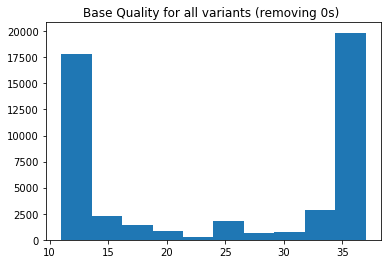

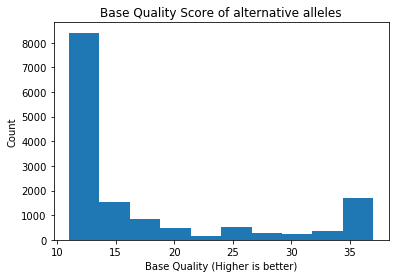

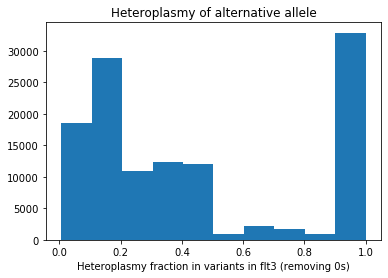

In [15]:
%matplotlib inline
f = plt.figure()
bq_vals = flt3_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "flt3_base_quality.png"))

plt.figure()
plt.hist(flt3_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "flt3_base_quality_altAllele.png"))


f = plt.figure()
af_vals = flt3_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in flt3 (removing 0s)")
plt.savefig(join(outdir, "flt3_heteroplasmy_values.png"))


## Merge the two 

In [16]:
flt3_AF_by_cell.index = flt3_AF_by_cell.index + "_flt3"
wt_AF_by_cell.index = wt_AF_by_cell.index + "_wt"


In [17]:
all_cells = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
all_cells_var_overlap = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


651G  652T  654G  655G  656A  660A  661A  663G  666A  \
GTACGTATCACAACGT-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGGGTCAGAGAACAG-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCCACACGTGCCTGCA-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TGGTTCCAGTAGATGT-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGCATAAGGGAGTAA-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
TGCTGCTAGTCAAGGC-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCTCTAATCGTACCGG-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
CTACACCCAGCTCGAC-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
ACCGTAATCCCACTTG-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GCTTCCAGTACCGAGA-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                         670A  ...  14798G  14799A  14800A  14801C  14802A  \
GTACGTATCACAACGT-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGGGTCAGAGAACAG-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCCACACGTGCCTGCA-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
TGGTTCCAGTAGATGT-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGCATAAGGGAGTAA-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
...                       ...  ...     ...     ...     ...     ...     ...   
TGCTGCTAGTCAAGGC-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCTCTAATCGTACCGG-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CTACACCCAGCTCGAC-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
ACCGTAATCCCACTTG-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GCTTCCAGTACCGAGA-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   

                         14803A  14804T  14805T  14806G  14807A  
GTACGTATCACAACGT-1_wt       0.0     0.0     0.0     0.0     0.0  
GTGGGTCAGAGAACAG-1_wt       0.0     0.0     0.0     0.0     0.0  
TCCACACGTGCCTGCA-1_wt       0.0     0.0     0.0     0.0     0.0  
TGGTTCCAGTAGATGT-1_wt       0.0     0.0     0.0     0.0     0.0  
GTGCATAAGGGAGTAA-1_wt       0.0     0.0     0.0     0.0     0.0  
...                         ...     ...     ...     ...     ...  
TGCTGCTAGTCAAGGC-1_flt3     0.0     0.0     0.0     0.0     0.0  
TCTCTAATCGTACCGG-1_flt3     0.0     0.0     0.0     0.0     0.0  
CTACACCCAGCTCGAC-1_flt3     0.0     0.0     0.0     0.0     0.0  
ACCGTAATCCCACTTG-1_flt3     0.0     0.0     0.0     0.0     0.0  
GCTTCCAGTACCGAGA-1_flt3     0.0     0.0     0.0     0.0     0.0  

[3664 rows x 1305 columns]

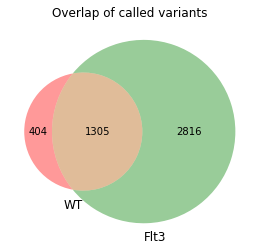

In [19]:
%matplotlib inline
venn2([set(wt_AF_by_cell.columns.values),set(flt3_AF_by_cell.columns.values)],set_labels=["WT","Flt3"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [20]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [21]:

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

Sample
GTACGTATCACAACGT-1_wt       wt
GTGGGTCAGAGAACAG-1_wt       wt
TCCACACGTGCCTGCA-1_wt       wt
TGGTTCCAGTAGATGT-1_wt       wt
GTGCATAAGGGAGTAA-1_wt       wt
...                        ...
TGCTGCTAGTCAAGGC-1_flt3   Flt3
TCTCTAATCGTACCGG-1_flt3   Flt3
CTACACCCAGCTCGAC-1_flt3   Flt3
ACCGTAATCCCACTTG-1_flt3   Flt3
GCTTCCAGTACCGAGA-1_flt3   Flt3

[3664 rows x 1 columns]

In [22]:
all_cells_var_overlap

651G  652T  654G  655G  656A  660A  661A  663G  666A  \
GTACGTATCACAACGT-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGGGTCAGAGAACAG-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCCACACGTGCCTGCA-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TGGTTCCAGTAGATGT-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGCATAAGGGAGTAA-1_wt     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
TGCTGCTAGTCAAGGC-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCTCTAATCGTACCGG-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
CTACACCCAGCTCGAC-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
ACCGTAATCCCACTTG-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GCTTCCAGTACCGAGA-1_flt3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                         670A  ...  14798G  14799A  14800A  14801C  14802A  \
GTACGTATCACAACGT-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGGGTCAGAGAACAG-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCCACACGTGCCTGCA-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
TGGTTCCAGTAGATGT-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGCATAAGGGAGTAA-1_wt     0.0  ...     0.0     0.0     0.0     0.0     0.0   
...                       ...  ...     ...     ...     ...     ...     ...   
TGCTGCTAGTCAAGGC-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCTCTAATCGTACCGG-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CTACACCCAGCTCGAC-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
ACCGTAATCCCACTTG-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GCTTCCAGTACCGAGA-1_flt3   0.0  ...     0.0     0.0     0.0     0.0     0.0   

                         14803A  14804T  14805T  14806G  14807A  
GTACGTATCACAACGT-1_wt       0.0     0.0     0.0     0.0     0.0  
GTGGGTCAGAGAACAG-1_wt       0.0     0.0     0.0     0.0     0.0  
TCCACACGTGCCTGCA-1_wt       0.0     0.0     0.0     0.0     0.0  
TGGTTCCAGTAGATGT-1_wt       0.0     0.0     0.0     0.0     0.0  
GTGCATAAGGGAGTAA-1_wt       0.0     0.0     0.0     0.0     0.0  
...                         ...     ...     ...     ...     ...  
TGCTGCTAGTCAAGGC-1_flt3     0.0     0.0     0.0     0.0     0.0  
TCTCTAATCGTACCGG-1_flt3     0.0     0.0     0.0     0.0     0.0  
CTACACCCAGCTCGAC-1_flt3     0.0     0.0     0.0     0.0     0.0  
ACCGTAATCCCACTTG-1_flt3     0.0     0.0     0.0     0.0     0.0  
GCTTCCAGTACCGAGA-1_flt3     0.0     0.0     0.0     0.0     0.0  

[3664 rows x 1305 columns]

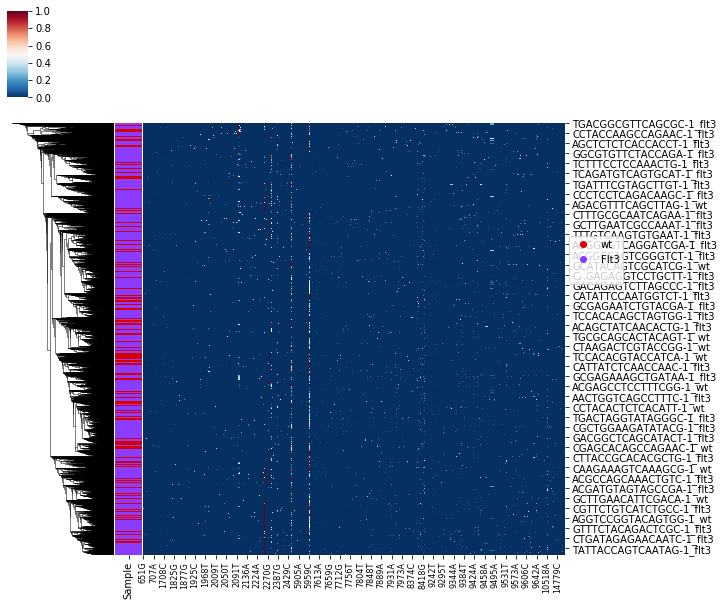

In [23]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

### With all variants

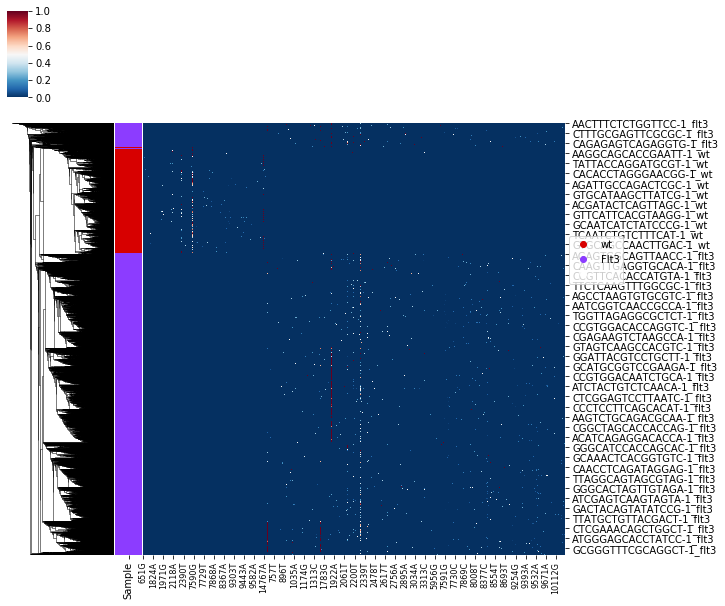

In [24]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=flt3_cell, data={"Sample":["Flt3"]*flt3_cell.shape[0]}),
#            pd.DataFrame(index=wt_cell, data={"Sample":["wt"]*wt_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

## Overlay average heteroplasmy on rows

## Plot number of overlapping positions from Flt3 and without

### Here we compare the rest of sequencing techniques done and see if we see the same variants, this ensuring the differences are consistent across the techniques and not technical noise.

In [29]:
from sklearn.preprocessing import StandardScaler

import numpy as np

In [38]:
z_wt_AF_by_cell

651G  \
GTACGTATCACAACGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGGGTCAGAGAACAG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TCCACACGTGCCTGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TGGTTCCAGTAGATGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGCATAAGGGAGTAA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
...                                                                  ...   
GCCAAATCAAGCCATT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CTGCTGTAGGCTAGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
AGATTGCCAGACTCGC-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GCACATATCACATACG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CACAAACAGAGCTATA-1_wt  StandardScaler(copy=True, with_mean=True, with...   

                                                                    652T  \
GTACGTATCACAACGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGGGTCAGAGAACAG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TCCACACGTGCCTGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TGGTTCCAGTAGATGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGCATAAGGGAGTAA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
...                                                                  ...   
GCCAAATCAAGCCATT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CTGCTGTAGGCTAGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
AGATTGCCAGACTCGC-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GCACATATCACATACG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CACAAACAGAGCTATA-1_wt  StandardScaler(copy=True, with_mean=True, with...   

                                                                    653A  \
GTACGTATCACAACGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGGGTCAGAGAACAG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TCCACACGTGCCTGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TGGTTCCAGTAGATGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGCATAAGGGAGTAA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
...                                                                  ...   
GCCAAATCAAGCCATT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CTGCTGTAGGCTAGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
AGATTGCCAGACTCGC-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GCACATATCACATACG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CACAAACAGAGCTATA-1_wt  StandardScaler(copy=True, with_mean=True, with...   

                                                                    654G  \
GTACGTATCACAACGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGGGTCAGAGAACAG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TCCACACGTGCCTGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TGGTTCCAGTAGATGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGCATAAGGGAGTAA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
...                                                                  ...   
GCCAAATCAAGCCATT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CTGCTGTAGGCTAGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
AGATTGCCAGACTCGC-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GCACATATCACATACG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
CACAAACAGAGCTATA-1_wt  StandardScaler(copy=True, with_mean=True, with...   

                                                                    655G  \
GTACGTATCACAACGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGGGTCAGAGAACAG-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TCCACACGTGCCTGCA-1_wt  StandardScaler(copy=True, with_mean=True, with...   
TGGTTCCAGTAGATGT-1_wt  StandardScaler(copy=True, with_mean=True, with...   
GTGCATAAGGGAGTAA-1_wt  StandardScale

In [45]:
wt_AF_by_cell

651G  652T  653A  654G  655G  656A  657A  658T  659A  \
GTACGTATCACAACGT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGGGTCAGAGAACAG-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCCACACGTGCCTGCA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TGGTTCCAGTAGATGT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGCATAAGGGAGTAA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
GCCAAATCAAGCCATT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
CTGCTGTAGGCTAGCA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
AGATTGCCAGACTCGC-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GCACATATCACATACG-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
CACAAACAGAGCTATA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                       660A  ...  14800A  14801C  14802A  14803A  14804T  \
GTACGTATCACAACGT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGGGTCAGAGAACAG-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCCACACGTGCCTGCA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TGGTTCCAGTAGATGT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGCATAAGGGAGTAA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
...                     ...  ...     ...     ...     ...     ...     ...   
GCCAAATCAAGCCATT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CTGCTGTAGGCTAGCA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
AGATTGCCAGACTCGC-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GCACATATCACATACG-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CACAAACAGAGCTATA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   

                       14805T  14806G  14807A  embedding_1  embedding_2  
GTACGTATCACAACGT-1_wt     0.0     0.0     0.0    -0.570510     0.909794  
GTGGGTCAGAGAACAG-1_wt     0.0     0.0     0.0    -0.765909     0.186388  
TCCACACGTGCCTGCA-1_wt     0.0     0.0     0.0    -0.387535    -0.376945  
TGGTTCCAGTAGATGT-1_wt     0.0     0.0     0.0     1.115647     0.474601  
GTGCATAAGGGAGTAA-1_wt     0.0     0.0     0.0     1.166918    -0.346517  
...                       ...     ...     ...          ...          ...  
GCCAAATCAAGCCATT-1_wt     0.0     0.0     0.0     1.115836     0.379778  
CTGCTGTAGGCTAGCA-1_wt     0.0     0.0     0.0    -0.396055     0.395634  
AGATTGCCAGACTCGC-1_wt     0.0     0.0     0.0     1.034876     0.625972  
GCACATATCACATACG-1_wt     0.0     0.0     0.0    -0.480676     0.389537  
CACAAACAGAGCTATA-1_wt     0.0     0.0     0.0    -0.223817    -0.203197  

[887 rows x 1711 columns]

/data2/mito_lineage/src/utils.py:83: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


(4, 9)
feat 0
0 0
feat 1
0 0
feat 2
1 0
feat 3
1 0
feat 4
2 0
feat 5
2 0
feat 6
3 0
feat 7
3 0
feat 8
4 0


651G      652T      653A      654G      655G  \
GTACGTATCACAACGT-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
GTGGGTCAGAGAACAG-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
TCCACACGTGCCTGCA-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
TGGTTCCAGTAGATGT-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
GTGCATAAGGGAGTAA-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
...                         ...       ...       ...       ...       ...   
GCCAAATCAAGCCATT-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
CTGCTGTAGGCTAGCA-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
AGATTGCCAGACTCGC-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
GCACATATCACATACG-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   
CACAAACAGAGCTATA-1_wt -0.048042 -0.073007 -0.033596 -0.080354 -0.078738   

                           656A      657A      658T      659A      660A  ...  \
GTACGTATCACAACGT-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
GTGGGTCAGAGAACAG-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
TCCACACGTGCCTGCA-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
TGGTTCCAGTAGATGT-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
GTGCATAAGGGAGTAA-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
...                         ...       ...       ...       ...       ...  ...   
GCCAAATCAAGCCATT-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
CTGCTGTAGGCTAGCA-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
AGATTGCCAGACTCGC-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
GCACATATCACATACG-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   
CACAAACAGAGCTATA-1_wt -0.046116 -0.033596 -0.047472 -0.050983 -0.033596  ...   

                         14800A    14801C    14802A    14803A    14804T  \
GTACGTATCACAACGT-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
GTGGGTCAGAGAACAG-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
TCCACACGTGCCTGCA-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
TGGTTCCAGTAGATGT-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
GTGCATAAGGGAGTAA-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
...                         ...       ...       ...       ...       ...   
GCCAAATCAAGCCATT-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
CTGCTGTAGGCTAGCA-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
AGATTGCCAGACTCGC-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
GCACATATCACATACG-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   
CACAAACAGAGCTATA-1_wt -0.071318 -0.045094 -0.078756 -0.069588 -0.069804   

                         14805T    14806G    14807A  embedding_1  embedding_2  
GTACGTATCACAACGT-1_wt -0.100963 -0.075049 -0.033596     2.680357     2.164870  
GTGGGTCAGAGAACAG-1_wt -0.100963 -0.075049 -0.033596    -0.154030    -0.139023  
TCCACACGTGCCTGCA-1_wt -0.100963 -0.075049 -0.033596     2.000884     0.222228  
TGGTTCCAGTAGATGT-1_wt -0.100963 -0.075049 -0.033596     0.089282    -0.931264  
GTGCATAAGGGAGTAA-1_wt -0.100963 -0.075049 -0.033596    -0.499383     0.042983  
...                         ...       ...       ...          ...          ...  
GCCAAATCAAGCCATT-1_wt -0.100963 -0.075049 -0.033596    -0.093157     1.338875  
CTGCTGTAGGCTAGCA-1_wt -0.100963 -0.075049 -0.033596    -1.850730     0.729138  
AGATTGCCAGACTCGC-1_wt -0.100963 -0.075049 -0.033596    -1.254962     0.071022  
GCACATATCACATACG-1_wt -0.100963 -0.075049 -0.033596     7.190850    64.108739  
CACAAACAGAGCTATA-1_wt -0.100963 -0.075049 -0.033596    -0.433112     0.926554  

[887 rows x 1711 columns]

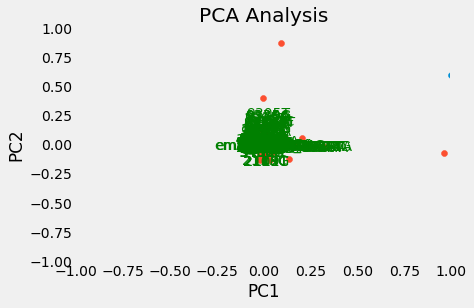

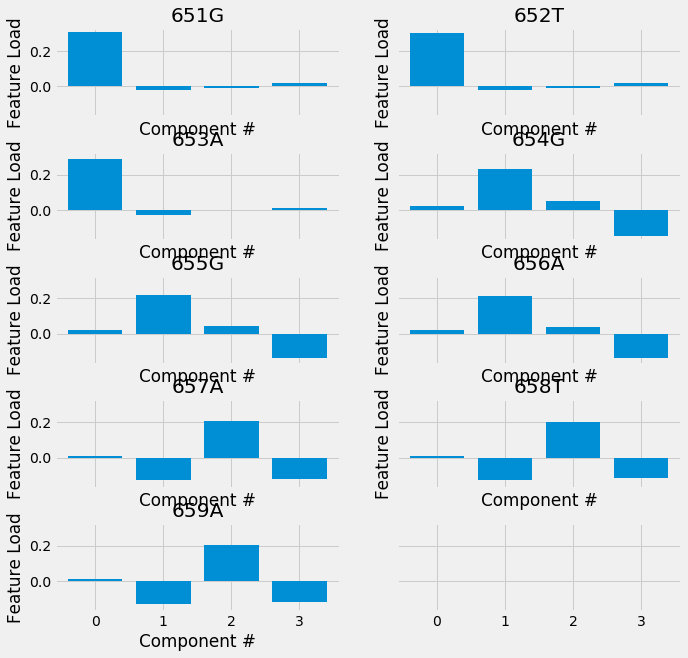

In [40]:
from src.utils import construct_pca

scaler = StandardScaler()
z_wt_AF_by_cell = wt_AF_by_cell.copy()
z_wt_AF_by_cell.iloc[:,:] = scaler.fit_transform(wt_AF_by_cell)
construct_pca(z_wt_AF_by_cell)

(4, 6)
feat 0
0 0
feat 1
0 0
feat 2
1 0
feat 3
1 0
feat 4
2 0
feat 5
2 0


/data2/mito_lineage/src/utils.py:83: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


651G  652T  653A  654G  655G  656A  657A  658T  659A  \
GTACGTATCACAACGT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGGGTCAGAGAACAG-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TCCACACGTGCCTGCA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TGGTTCCAGTAGATGT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GTGCATAAGGGAGTAA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
GCCAAATCAAGCCATT-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
CTGCTGTAGGCTAGCA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
AGATTGCCAGACTCGC-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
GCACATATCACATACG-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
CACAAACAGAGCTATA-1_wt   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                       660A  ...  14800A  14801C  14802A  14803A  14804T  \
GTACGTATCACAACGT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGGGTCAGAGAACAG-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TCCACACGTGCCTGCA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
TGGTTCCAGTAGATGT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GTGCATAAGGGAGTAA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
...                     ...  ...     ...     ...     ...     ...     ...   
GCCAAATCAAGCCATT-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CTGCTGTAGGCTAGCA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
AGATTGCCAGACTCGC-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
GCACATATCACATACG-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   
CACAAACAGAGCTATA-1_wt   0.0  ...     0.0     0.0     0.0     0.0     0.0   

                       14805T  14806G  14807A  embedding_1  embedding_2  
GTACGTATCACAACGT-1_wt     0.0     0.0     0.0    -0.570510     0.909794  
GTGGGTCAGAGAACAG-1_wt     0.0     0.0     0.0    -0.765909     0.186388  
TCCACACGTGCCTGCA-1_wt     0.0     0.0     0.0    -0.387535    -0.376945  
TGGTTCCAGTAGATGT-1_wt     0.0     0.0     0.0     1.115647     0.474601  
GTGCATAAGGGAGTAA-1_wt     0.0     0.0     0.0     1.166918    -0.346517  
...                       ...     ...     ...          ...          ...  
GCCAAATCAAGCCATT-1_wt     0.0     0.0     0.0     1.115836     0.379778  
CTGCTGTAGGCTAGCA-1_wt     0.0     0.0     0.0    -0.396055     0.395634  
AGATTGCCAGACTCGC-1_wt     0.0     0.0     0.0     1.034876     0.625972  
GCACATATCACATACG-1_wt     0.0     0.0     0.0    -0.480676     0.389537  
CACAAACAGAGCTATA-1_wt     0.0     0.0     0.0    -0.223817    -0.203197  

[887 rows x 1711 columns]

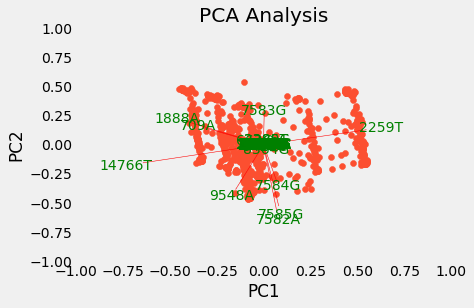

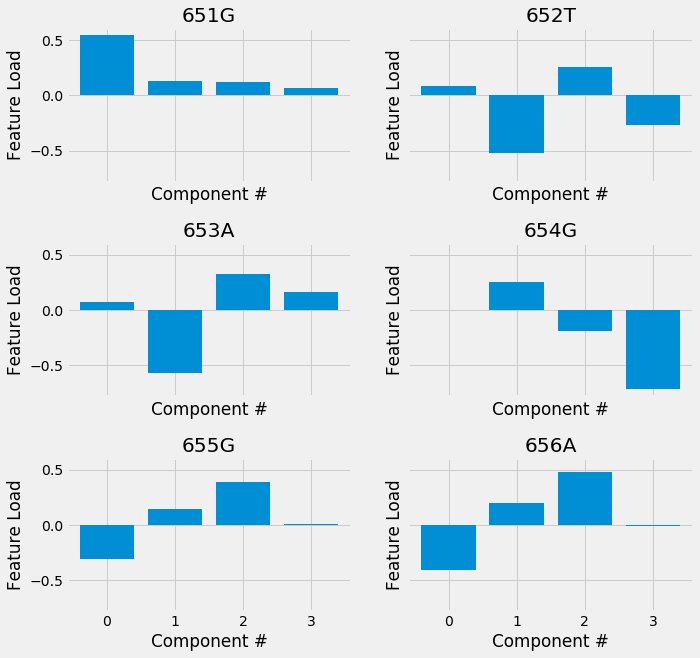

In [28]:
construct_pca(wt_AF_by_cell)

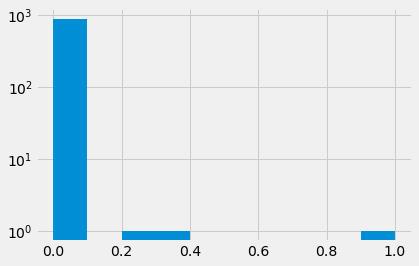

In [60]:
plt.hist(wt_AF_by_cell["651G"])
plt.yscale('log')


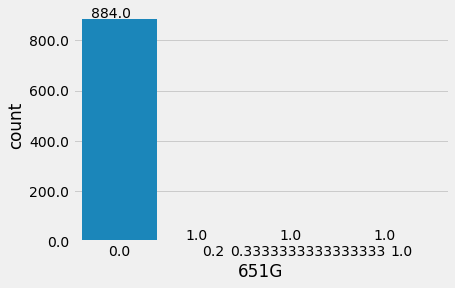

In [69]:
ax = sns.countplot(wt_AF_by_cell["651G"],)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}'.format, ax.yaxis.get_majorticklocs()))

In [73]:
wt_AF_by_cell.groupby("652T").size()

652T
0.000000    882
0.142857      1
0.166667      1
0.200000      1
0.250000      1
0.285714      1
dtype: int64

In [73]:
wt_AF_by_cell.groupby("652T").size()

652T
0.000000    882
0.142857      1
0.166667      1
0.200000      1
0.250000      1
0.285714      1
dtype: int64